Objective 

The goal is to predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine

Instructions

Part1: supervised learning

    Import you data and perform basic data exploration phase
        Display general information about the dataset
        Create a pandas profiling reports to gain insights into the dataset
        Handle Missing and corrupted values
        Remove duplicates, if they exist
        Handle outliers, if they exist
        Encode categorical features
    Prepare your dataset for the modelling phase
    Apply Decision tree, and plot its ROC curve
    Try to improve your model performance by changing the model hyperparameters

Part2: unsupervised learning

    Drop out the target variable
    Apply K means clustering and plot the clusters
    Find the optimal K parameter
    Interpret the results

In [1]:
import pandas as pd

In [2]:
#loading the file to the dataframe 
df = pd.read_csv(r"C:\Users\cex\Desktop\Data sets\Microsoft_malware_dataset_min.csv")

In [3]:
#Exploration of data to understand 
df.head() # displays the first five items 

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18


In [4]:
df.info() #gives the basic information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


Inference
1. Has missing values in colums Wdft_IsGamer,Census_IsVirtualDevice,Firewall,SMode and IsProtected
2. 

In [5]:

df.isnull().sum() # finds the number of missing values per column 

HasDetections                    0
Wdft_IsGamer                  3415
Census_IsVirtualDevice         185
Census_OSEdition                 0
Census_HasOpticalDiskDrive       0
Firewall                      1076
SMode                         5932
IsProtected                    391
OsPlatformSubRelease             0
CountryIdentifier                0
dtype: int64

In [6]:
# Calculate the percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 1000

missing_percentage

HasDetections                  0.00
Wdft_IsGamer                  34.15
Census_IsVirtualDevice         1.85
Census_OSEdition               0.00
Census_HasOpticalDiskDrive     0.00
Firewall                      10.76
SMode                         59.32
IsProtected                    3.91
OsPlatformSubRelease           0.00
CountryIdentifier              0.00
dtype: float64

Key Findings:

    Missing Values:
        Wdft_IsGamer: 3,415 missing values
        Census_IsVirtualDevice: 185 missing values
        Firewall: 1,076 missing values
        SMode: 5,932 missing values
        IsProtected: 391 missing values

    Duplicates:
        79,581 duplicate rows exist.

Summary Statistics:
1. The HasDetections target variable is balanced (approximately 50-50 split).
   Wdft_IsGamer, Firewall, SMode, and IsProtected are mostly binary (0 or 1).
2. CountryIdentifier has a wide range (from 1 to 222), possibly categorical.

In [7]:
#Drop all the duplicated data
df_cleaned=df.drop_duplicates()
df_cleaned 

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18
...,...,...,...,...,...,...,...,...,...,...
99926,0,1.0,0.0,Professional,0,1.0,NaN,0.0,rs4,115
99927,0,1.0,0.0,Core,1,1.0,0.0,1.0,rs4,142
99943,0,1.0,0.0,Core,1,1.0,0.0,1.0,rs4,214
99947,1,NaN,0.0,Professional,0,1.0,0.0,1.0,th2,107


In [8]:
#Next step involves filling the missing values in cleaned data set 
# Fill missing values with appropriate strategies
df_cleaned["Wdft_IsGamer"].fillna(df_cleaned["Wdft_IsGamer"].mode()[0], inplace=True)  # Mode for categorical-like binary data
df_cleaned["Census_IsVirtualDevice"].fillna(df_cleaned["Census_IsVirtualDevice"].mode()[0], inplace=True)
df_cleaned["Firewall"].fillna(df_cleaned["Firewall"].mode()[0], inplace=True)
df_cleaned["SMode"].fillna(df_cleaned["SMode"].mode()[0], inplace=True)
df_cleaned["IsProtected"].fillna(df_cleaned["IsProtected"].mode()[0], inplace=True)

# Verify if there are still missing values
missing_values_after = df_cleaned.isnull().sum()
missing_values_after


C:\Users\cex\AppData\Local\Temp\ipykernel_24364\1417342364.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Wdft_IsGamer"].fillna(df_cleaned["Wdft_IsGamer"].mode()[0], inplace=True)  # Mode for categorical-like binary data
C:\Users\cex\AppData\Local\Temp\ipykernel_24364\1417342364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

HasDetections                 0
Wdft_IsGamer                  0
Census_IsVirtualDevice        0
Census_OSEdition              0
Census_HasOpticalDiskDrive    0
Firewall                      0
SMode                         0
IsProtected                   0
OsPlatformSubRelease          0
CountryIdentifier             0
dtype: int64

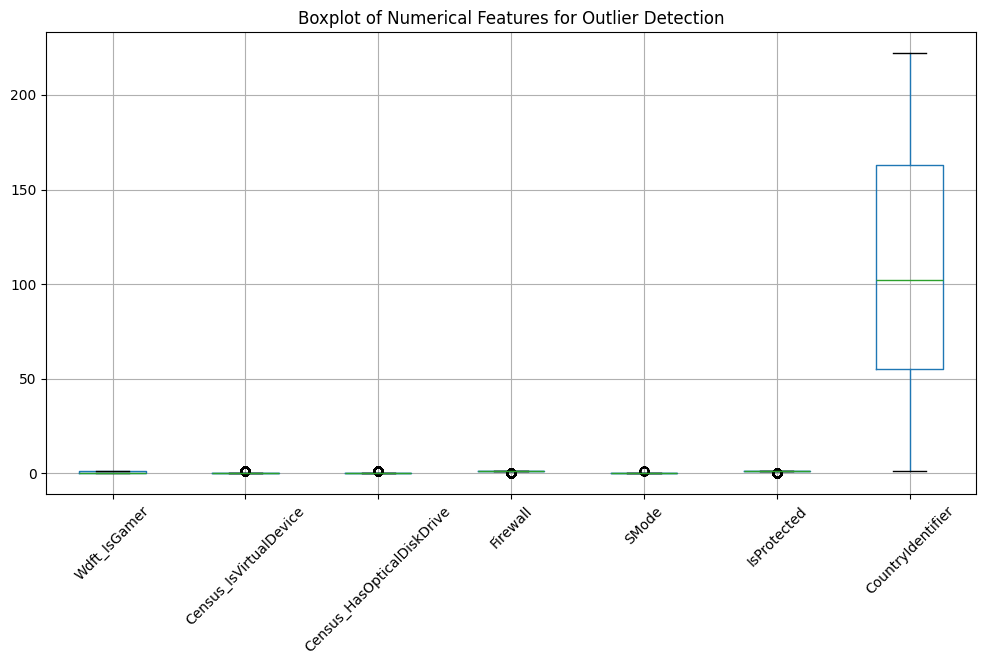

In [9]:
#check for outliers in numerical columns and handle them appropriately
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = ["Wdft_IsGamer", "Census_IsVirtualDevice", "Census_HasOpticalDiskDrive", 
                  "Firewall", "SMode", "IsProtected", "CountryIdentifier"]

# Plot boxplots to detect outliers
plt.figure(figsize=(12, 6))
df_cleaned[numerical_cols].boxplot(rot=45)
plt.title("Boxplot of Numerical Features for Outlier Detection")
plt.show()


The boxplot reveals potential outliers in CountryIdentifier, which has a wide range. However, since it likely represents categorical data (country codes), removing outliers may not be necessary.

For other numerical features, they are mostly binary (0 or 1), so outlier removal isn't required.

In [10]:
#encode categorical features (Census_OSEdition and OsPlatformSubRelease) using label encoding


In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
categorical_cols = ["Census_OSEdition", "OsPlatformSubRelease"]

for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Display the updated dataset
df_cleaned.head()


C:\Users\cex\AppData\Local\Temp\ipykernel_24364\3153293516.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
C:\Users\cex\AppData\Local\Temp\ipykernel_24364\3153293516.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = le.fit_transform(df_cleaned[col])


,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,11,0,1.0,0.0,1.0,4,29
1,0,0.0,0.0,11,0,1.0,0.0,1.0,4,93
2,0,0.0,0.0,1,0,1.0,0.0,1.0,4,86
3,1,0.0,0.0,11,0,1.0,0.0,1.0,4,88
4,1,0.0,0.0,1,0,1.0,0.0,1.0,4,18


Categorical features have been successfully label-encoded. 
Now, I'll proceed with preparing the dataset for modeling by splitting it into training and testing sets

In [12]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_cleaned.drop(columns=["HasDetections"])
y = df_cleaned["HasDetections"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((16335, 9), (4084, 9), (16335,), (4084,))

The dataset has been successfully split:

    Training set: 16,335 samples
    Testing set: 4,084 samples
    Features: 9 columns

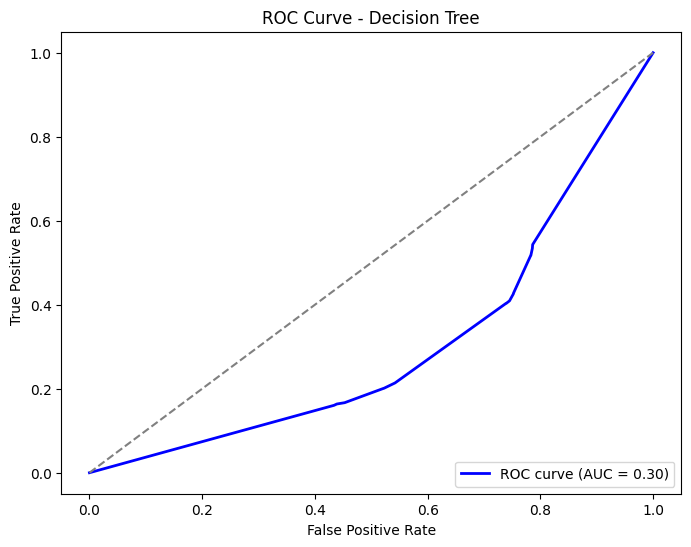

In [13]:
#train a Decision Tree model and plot its ROC curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict probabilities
y_probs = dt_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.show()


ROC curve is plotted, showing the Decision Tree model's performance.
Next, I'll attempt to improve the model by tuning hyperparameters. 

In [14]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "criterion": ["gini", "entropy"]
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
best_params


{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

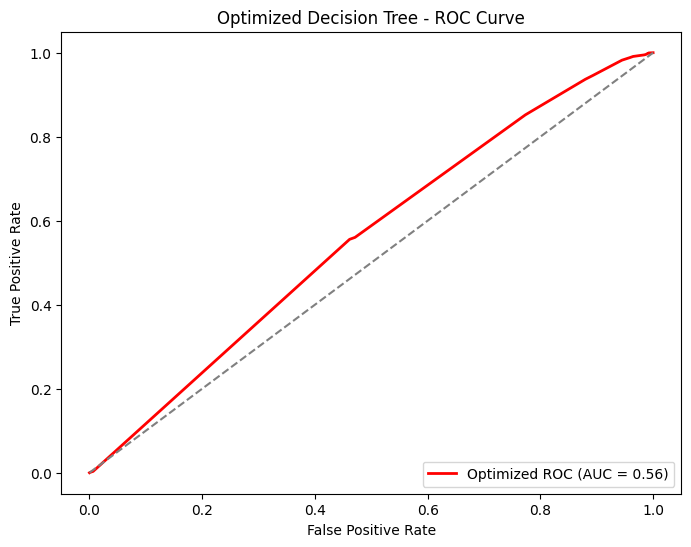

np.float64(0.5582751823146099)

In [15]:
# Re-train the Decision Tree model with the best hyperparameters
optimized_dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=5,
    min_samples_split=2,
    random_state=42
)

optimized_dt_model.fit(X_train, y_train)

# Predict probabilities with the optimized model
y_probs_optimized = optimized_dt_model.predict_proba(X_test)[:, 1]

# Compute ROC curve for the optimized model
fpr_opt, tpr_opt, _ = roc_curve(y_test, y_probs_optimized)
roc_auc_opt = auc(fpr_opt, tpr_opt)

# Plot ROC curve for the optimized model
plt.figure(figsize=(8, 6))
plt.plot(fpr_opt, tpr_opt, color="red", lw=2, label=f"Optimized ROC (AUC = {roc_auc_opt:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Optimized Decision Tree - ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Display AUC score
roc_auc_opt


Feature Importance Analysis to check which features contribute most to predictions.

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Train a basic Random Forest model to check feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Sort and display the top important features
top_features = feature_importances.sort_values(ascending=False)
top_features


CountryIdentifier             0.758701
OsPlatformSubRelease          0.106582
Census_OSEdition              0.072883
Wdft_IsGamer                  0.017279
Census_HasOpticalDiskDrive    0.013750
Census_IsVirtualDevice        0.011542
Firewall                      0.010401
IsProtected                   0.007629
SMode                         0.001233
dtype: float64

In [17]:
# Drop the weakest feature (SMode) from training and testing sets
X_train_filtered = X_train.drop(columns=["SMode"])
X_test_filtered = X_test.drop(columns=["SMode"])

# Define hyperparameter grid for Random Forest
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "criterion": ["gini", "entropy"]
}

# Perform GridSearchCV to find best Random Forest parameters
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), 
                              param_grid_rf, cv=5, scoring="roc_auc", n_jobs=-1)
grid_search_rf.fit(X_train_filtered, y_train)

# Get best parameters for Random Forest
best_rf_params = grid_search_rf.best_params_
best_rf_params


{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

These are the best hyperparameters for the Random Forest model based on GridSearchCV:

    Criterion: entropy (uses information gain for splitting)
    Max Depth: 10 (limits tree depth to prevent overfitting)
    Min Samples Leaf: 2 (at least 2 samples in a leaf node)
    Min Samples Split: 2 (minimum samples to split a node)
    N Estimators: 100 (number of trees in the forest)

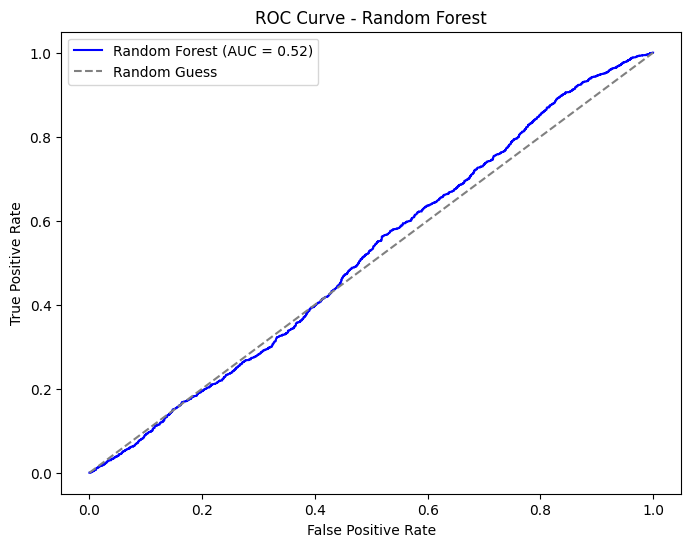

np.float64(0.5160569528039503)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Train the optimized Random Forest model
best_rf_model = RandomForestClassifier(**best_rf_params, random_state=42)
best_rf_model.fit(X_train_filtered, y_train)

# Predict probabilities for the test set
y_probs_rf = best_rf_model.predict_proba(X_test_filtered)[:, 1]

# Compute AUC-ROC score
auc_score_rf = roc_auc_score(y_test, y_probs_rf)

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score_rf:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# Return the AUC score
auc_score_rf


Part2: unsupervised learning

In [19]:
df2 = pd.read_csv(r"C:\Users\cex\Desktop\Data sets\Microsoft_malware_dataset_min.csv")

In [20]:
df.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18


The dataset has been successfully reloaded! Now, we'll proceed with K-Means clustering by following these steps:
Step 1: Drop the Target Variable (HasDetections)

Since clustering is unsupervised, we remove the labels.
Step 2: Encode Categorical Features

We need to convert Census_OSEdition and OsPlatformSubRelease into numerical values.
Step 3: Scale the Features

K-Means is sensitive to different scales, so we apply standardization.
Step 4: Find the Optimal K

We'll use the Elbow Method and Silhouette Score to determine the best number of clusters.
Step 5: Apply K-Means and Visualize

We'll cluster the data and analyze the results.

In [21]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Drop the target variable
df_unsupervised = df.drop(columns=["HasDetections"])

# Encode categorical features
label_encoders = {}
for col in ["Census_OSEdition", "OsPlatformSubRelease"]:
    le = LabelEncoder()
    df_unsupervised[col] = le.fit_transform(df_unsupervised[col])
    label_encoders[col] = le  # Store for later decoding if needed

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_unsupervised)

# Display processed data shape
df_scaled.shape


(100000, 9)

The dataset has been preprocessed:

    Target variable dropped
    Categorical features encoded
    Data standardized

Now, we'll find the optimal number of clusters (K) using:

    Elbow Method (to detect where inertia stops decreasing significantly)
    Silhouette Score (to measure how well-separated the clusters are)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try different values of K
K_range = range(2, 11)
inertia_values = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')

plt.show()

# Best K based on Silhouette Score
best_k = K_range[np.argmax(silhouette_scores)]
best_k


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

The error indicates that the dataset contains missing values (NaN), which K-Means does not support.

In [ ]:
# Check for missing values
missing_values = df_unsupervised.isnull().sum()
missing_values[missing_values > 0]


Several features have missing values:

    SMode (5,932 missing)
    Wdft_IsGamer (3,415 missing)
    Firewall (1,076 missing)
    IsProtected (391 missing)
    Census_IsVirtualDevice (185 missing)

Next Step: Handling Missing Data

We'll fill missing values using appropriate strategies:

    Mode (Most Frequent Value) for binary/categorical features.
    Mean/Median for numerical features.

In [ ]:
# Fill missing values
for col in ["Wdft_IsGamer", "Census_IsVirtualDevice", "Firewall", "SMode", "IsProtected"]:
    df_unsupervised[col].fillna(df_unsupervised[col].mode()[0], inplace=True)  # Use mode for categorical/binary features

# Verify missing values are handled
df_unsupervised.isnull().sum().sum()  # Should be 0 if all NaNs are removed


All missing values have been successfully handled! ✅

Now, I'll re-run K-Means clustering and determine the optimal number of clusters.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define range for K
K_range = range(2, 11)
inertia_values = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')

plt.show()

# Print the best K based on Silhouette Score
best_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {best_k}")


ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [25]:
print(df.isnull().sum())  # Shows the count of NaN values per column


HasDetections                    0
Wdft_IsGamer                  3415
Census_IsVirtualDevice         185
Census_OSEdition                 0
Census_HasOpticalDiskDrive       0
Firewall                      1076
SMode                         5932
IsProtected                    391
OsPlatformSubRelease             0
CountryIdentifier                0
dtype: int64


In [26]:
df_cleaned = df.dropna()


In [ ]:
df_filled = df.fillna(df.mean())  # Replace NaNs with column means


TypeError: Could not convert ['ProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreEnterpriseSProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreEnterpriseSNCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalEducationCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalEducationProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreEnterpriseCoreSingleLanguageCoreProfessionalEducationProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCloudCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreEnterpriseSCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalEnterpriseSProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalNCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreEducationProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalNProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageEducationCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalEducationProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalEducationProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalEducationCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalEducationProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalEducationCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalEducationCoreCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalEducationProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalEducationProfessionalEducationCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageEnterpriseProfessionalEducationProfessionalEducationCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreServerStandardProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalEducationCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCoreCoreSingleLanguageProfessionalEducationCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreEnterpriseSCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageEnterpriseCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreEducationCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalEducationCoreCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCountrySpecificCoreCountrySpecificCoreCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreCoreProfessionalCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCountrySpecificCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalEducationProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCountrySpecificCoreCoreCoreCoreProfessionalCoreCountrySpecificCoreProfessionalCoreServerStandardProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageEducationCoreCountrySpecificProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageEnterpriseProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalNCoreCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalEducationProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCountrySpecificCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalEducationProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreEnterpriseCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificProfessionalEnterpriseProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalNProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreCountrySpecificProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalEnterpriseSCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageEducationCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageEducationCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalEducationCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCloudCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalNProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageServerStandardCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreProfessionalNCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCountrySpecificCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalEducationCoreCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalEducationCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalServerStandardCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalNServerStandardProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalEducationProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalEducationProfessionalProfessionalProfessionalCoreCountrySpecificCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalNCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalEducationProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalEducationProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreEnterpriseCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalNCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreCoreCoreEnterpriseCoreCountrySpecificCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalEducationCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreEducationProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreEducationProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageEnterpriseCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalEducationCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalEducationProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageEnterpriseCoreProfessionalEducationProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalEducationCoreProfessionalNEducationCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalEducationProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageServerStandardCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreNCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalEducationProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreCoreSingleLanguageCoreCoreEducationCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalEducationCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalServerStandardCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalEducationCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreEducationProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalNProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCountrySpecificCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalEducationCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalEducationProfessionalCoreEnterpriseCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreEnterpriseCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalEducationCoreCoreCoreCoreSingleLanguageProfessionalProfessionalEnterpriseSCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalNCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificEnterpriseSCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalEducationCoreProfessionalProfessionalEducationCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalEducationCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCountrySpecificCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCloudCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreEnterpriseProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalEducationCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreEnterpriseCoreCoreCountrySpecificCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCountrySpecificCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreEnterpriseSCoreCoreCountrySpecificProfessionalProfessionalCoreCoreCoreEducationCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreEnterpriseProfessionalProfessionalCoreEnterpriseCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageEducationProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreEnterpriseSCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalEducationProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalProfessionalCoreNProfessionalProfessionalEducationProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageEnterpriseProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalEducationCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageEnterpriseSCoreCountrySpecificCoreCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalEducationCoreCoreCoreCoreCoreCoreCoreProfessionalCoreCountrySpecificCoreProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCountrySpecificProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageEducationProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageEnterpriseEducationCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalServerStandardProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalEducationCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreEducationProfessionalEducationCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalServerStandardEvalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreEnterpriseSCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalEducationProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageEducationCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreCountrySpecificProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreNCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalNCoreCoreCountrySpecificProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreCoreCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreNCoreCoreSingleLanguageProfessionalProfessionalEducationCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalEducationProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalEducationProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalEducationProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageEnterpriseCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalEnterpriseProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCountrySpecificProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCountrySpecificCoreProfessionalEducationProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalServerStandardEvalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageEnterpriseSProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalEnterpriseSCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreEducationCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreEnterpriseProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalEnterpriseSCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreEnterpriseSProfessionalEducationCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageEducationCoreCoreCoreCoreSingleLanguageProfessionalEducationCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalNCoreCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificCoreCoreProfessionalCoreCountrySpecificCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreEducationCoreCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalEducationCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageEducationCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageEducationCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalEducationCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCloudProfessionalCoreCountrySpecificCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreCoreProfessionalProfessionalCoreProfessionalProfessionalEducationCoreCoreCoreCoreCountrySpecificCoreCountrySpecificCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreEducationProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreEducationCoreProfessionalEducationCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalServerStandardProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreServerStandardProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalNProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalEducationProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreServerStandardCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreEnterpriseProfessionalEnterpriseProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCountrySpecificCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageEducationProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalEducationProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalEducationProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalEducationCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageEducationProfessionalCoreCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreEnterpriseCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalEducationCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalEducationProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalEducationCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalEducationCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalEducationCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCountrySpecificCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalEnterpriseCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCountrySpecificCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageEnterpriseSCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageEducationNCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageEnterpriseSCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreEducationProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalEducationCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreEnterpriseSCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCloudCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageServerStandardCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreEducationCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalEnterpriseSCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCloudCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalEducationCoreSingleLanguageProfessionalCloudCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCountrySpecificProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreEnterpriseProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalNCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCountrySpecificCoreCountrySpecificProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalEnterpriseCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalEducationCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreCoreCoreCoreSingleLanguageEducationCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalEducationProfessionalProfessionalCoreEducationCoreProfessionalCoreEnterpriseSCoreSingleLanguageProfessionalProfessionalProfessionalEnterpriseProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalNCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalNProfessionalCoreCoreEnterpriseSCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalNCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageEnterpriseSProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalEducationProfessionalCoreCountrySpecificCoreEnterpriseSCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalEnterpriseProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificCoreCoreCoreCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalEnterpriseCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreEnterpriseCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalEducationProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreCountrySpecificCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalEducationCoreEnterpriseSProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalEducationProfessionalCoreCoreProfessionalEducationCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreEnterpriseSProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreEducationCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalEducationCoreProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalNProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageEducationProfessionalCoreEducationProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCountrySpecificProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageEnterpriseSProfessionalNCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalProfessionalEducationCoreCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalEducationProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreCoreProfessionalCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreEnterpriseSProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalEnterpriseCoreProfessionalCoreSingleLanguageProfessionalEnterpriseCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCountrySpecificProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalEducationCoreSingleLanguageProfessionalCoreProfessionalServerDatacenterEvalCoreSingleLanguageCoreSingleLanguageProfessionalCoreEducationCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalEducationCoreCountrySpecificCoreSingleLanguageCoreCoreEducationNCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCloudCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageEnterpriseSProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreEnterpriseSCoreCoreProfessionalEnterpriseProfessionalProfessionalProfessionalEducationProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageServerStandardCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageEnterpriseSCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalEducationProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCountrySpecificCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCloudProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificEnterpriseProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreProfessionalCoreProfessionalCoreSingleLanguageEnterpriseProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageServerStandardCoreEducationCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalEducationProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageEducationProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalEnterpriseCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalEducationProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCountrySpecificProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreCountrySpecificCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalEducationProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalServerStandardCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalNCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalNCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreEnterpriseProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalEducationProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreEnterpriseSProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalEnterpriseCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalEducationProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalNCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreCountrySpecificCoreProfessionalCoreCoreCoreServerDatacenterEvalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCountrySpecificCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalNCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalEducationCoreEnterpriseCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreEnterpriseProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalEnterpriseSCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageServerStandardCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreEnterpriseCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreNProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalEducationCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreEducationCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalEducationCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalNProfessionalCoreCountrySpecificCoreCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreEducationProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalEducationCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalEnterpriseCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreProfessionalNProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalEnterpriseSCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreEducationCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalNProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalEducationCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalEducationCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalNCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCountrySpecificProfessionalProfessionalEnterpriseProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalNCoreEducationProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageEducationProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalServerDatacenterEvalCoreCountrySpecificProfessionalEnterpriseCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalEnterpriseProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalNCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalEnterpriseSProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalEducationCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreProfessionalCoreCoreProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageEducationProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalEducationProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalEducationCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalNCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalNCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalServerStandardProfessionalCoreSingleLanguageCoreSingleLanguageCoreEducationProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCloudProfessionalProfessionalCoreCoreCoreProfessionalNCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCloudCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalEducationCoreSingleLanguageCoreEducationProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreEnterpriseCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalEnterpriseCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageEnterpriseProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalEducationCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageEnterpriseEnterpriseSCoreCountrySpecificCoreCountrySpecificCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCloudProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreEducationCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalNCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalEducationCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreCoreCoreCoreCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCountrySpecificCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalNProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCountrySpecificCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalNCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreProfessionalEnterpriseEnterpriseSProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageEducationCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreEnterpriseCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageEnterpriseSCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalEnterpriseProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreEducationCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalEducationCoreSingleLanguageEnterpriseSCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalEducationProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalEducationCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalEducationCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCountrySpecificCoreCountrySpecificProfessionalCoreProfessionalNCoreCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalNCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalNProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalEnterpriseSCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalProfessionalEducationCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalEnterpriseSCoreCountrySpecificProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalEducationCoreSingleLanguageCoreCoreProfessionalEnterpriseCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageEducationProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalEducationCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalEducationCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalEducationCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalNCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreEnterpriseCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalNServerStandardProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCountrySpecificCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalNProfessionalProfessionalCoreCountrySpecificCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreCoreSingleLanguageCloudCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreEducationCoreCoreCoreSingleLanguageProfessionalNCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreEducationCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreServerStandardCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalEducationCoreProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalEducationCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreEnterpriseProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreEnterpriseCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalEducationProfessionalCoreSingleLanguageCoreEnterpriseCoreProfessionalEducationCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCountrySpecificProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageEnterpriseSProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreEducationCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageEnterpriseSProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCountrySpecificCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalEnterpriseCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalEducationCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreEnterpriseCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreServerStandardCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalNProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreCountrySpecificCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreEnterpriseCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageEducationCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreEnterpriseSCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalEducationProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalEducationProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCloudCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreEnterpriseSCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalEnterpriseCoreSingleLanguageCoreSingleLanguageCoreEducationProfessionalEducationCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreEducationCoreCoreCoreSingleLanguageServerStandardProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalEducationCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalServerStandardProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageEducationProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageEnterpriseCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalEducationProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalNCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreEducationProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreEnterpriseCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCountrySpecificCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCountrySpecificEnterpriseCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalEducationProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalEnterpriseSProfessionalCoreCoreCoreCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCountrySpecificCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreEnterpriseSProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalServerStandardEvalEducationProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageEnterpriseProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreNCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreEducationProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalEducationCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalEducationCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalEducationProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalEducationProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageEnterpriseCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalNProfessionalEducationProfessionalCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalEducationProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalEducationCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalNCoreCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalEnterpriseSProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalEducationProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreEnterpriseCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCloudCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreEnterpriseSCoreEnterpriseProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageEnterpriseSCoreCoreSingleLanguageCoreProfessionalCoreProfessionalEducationCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCountrySpecificProfessionalEducationEnterpriseSCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageEducationProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalProfessionalCoreCoreProfessionalEnterpriseProfessionalProfessionalProfessionalEducationProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalEnterpriseSCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalEducationCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalEducationProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalEducationCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalEducationCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreProfessionalCoreCoreServerStandardCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCountrySpecificCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageEnterpriseSCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalEnterpriseCoreProfessionalCoreProfessionalCoreCoreProfessionalEnterpriseCoreCoreCoreCountrySpecificCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalEducationProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalEducationProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalEducationCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCountrySpecificProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCloudProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreNCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreEnterpriseSCoreSingleLanguageEnterpriseCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreEnterpriseCoreCoreProfessionalProfessionalNProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalEducationCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalEnterpriseCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreEnterpriseSProfessionalCoreProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreCountrySpecificProfessionalNProfessionalProfessionalProfessionalEducationProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalNProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalNCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreEnterpriseSProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreEnterpriseProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreEducationProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalEducationCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalEnterpriseSCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalEducationProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCountrySpecificCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalEducationProfessionalCoreCoreCoreCoreCountrySpecificCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalEnterpriseProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageEnterpriseProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalNProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageEnterpriseEnterpriseCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalEducationNCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalEducationCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreEducationProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageEnterpriseSProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalEducationProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreEnterpriseCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalNProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageEducationCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageEnterpriseProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreEnterpriseProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreCountrySpecificProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreEnterpriseCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificCoreProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalEnterpriseSCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCountrySpecificProfessionalCoreCoreCoreProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalNCoreSingleLanguageCoreSingleLanguageCoreProfessionalNProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalServerStandardProfessionalCoreSingleLanguageProfessionalNCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalEducationCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificCoreCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreEducationProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalEducationProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreEducationCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalServerStandardCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalNCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalEducationProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCountrySpecificCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageEnterpriseSCoreCoreProfessionalEducationCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalServerDatacenterEvalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalEducationProfessionalCoreCountrySpecificCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageEnterpriseSCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageServerStandardEvalCoreCoreSingleLanguageCoreSingleLanguageCoreEducationCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalEnterpriseProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageEducationCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalEducationProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageEducationCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalEducationProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalEducationCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCountrySpecificCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalEducationCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageEducationProfessionalCoreProfessionalCoreCoreCoreCountrySpecificEducationCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalEducationProfessionalCoreProfessionalCoreSingleLanguageEnterpriseSProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalEducationProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalEducationCoreCoreCoreProfessionalProfessionalEducationCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreEnterpriseSProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalNCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalEnterpriseSCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreEnterpriseSProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalNCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreProfessionalNCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalEducationCoreProfessionalCoreProfessionalCoreProfessionalEducationCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreEnterpriseSProfessionalCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalNProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageEducationProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalNCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalEducationCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalEducationCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalEducationCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageEnterpriseCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCountrySpecificProfessionalCoreCoreCoreProfessionalProfessionalProfessionalNCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageEducationProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreCountrySpecificProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalNProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalEducationCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalNProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreEnterpriseCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreEnterpriseSCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCountrySpecificCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalEducationCoreSingleLanguageEnterpriseSCoreSingleLanguageCoreProfessionalCoreCoreCoreEnterpriseCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalNCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalNProfessionalCoreCoreCoreCoreCoreCountrySpecificCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreEducationCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalNCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalNCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalEducationProfessionalCoreCountrySpecificProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalEducationCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreEducationCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageEducationProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalNCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalEducationCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreEducationCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalEnterpriseProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalEducationCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificCoreProfessionalCoreEnterpriseCoreSingleLanguageCoreServerStandardProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalEducationNCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalEnterpriseProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalNCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalEducationCoreProfessionalCoreProfessionalCoreCountrySpecificCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCloudCoreCoreSingleLanguageCoreProfessionalProfessionalCoreEnterpriseCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalServerStandardProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalNProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageEnterpriseProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalEducationProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalNCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalEducationCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreEnterpriseSProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalNCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificEducationCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreNCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalNProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreEnterpriseCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreProfessionalNCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalEducationCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreNProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreEducationProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalNCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCloudProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalEnterpriseProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalNCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalEducationProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreEnterpriseSCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreEnterpriseCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageServerSolutionCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageEnterpriseProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalEducationCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalEnterpriseSCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCountrySpecificCoreProfessionalCoreProfessionalNCoreProfessionalServerStandardCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreCountrySpecificProfessionalNCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageEducationProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageServerStandardProfessionalProfessionalCoreCoreSingleLanguageProfessionalEducationNCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreEducationCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageEnterpriseSProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCountrySpecificCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreEducationCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalServerStandardCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalNCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreEnterpriseProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalEducationEnterpriseSProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCountrySpecificCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalEducationCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreEducationCoreSingleLanguageCoreSingleLanguageProfessionalEducationProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalEducationProfessionalProfessionalProfessionalNProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalServerStandardCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCloudProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreEducationProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCountrySpecificCoreCoreCoreProfessionalProfessionalCoreEducationCoreCoreSingleLanguageProfessionalCoreProfessionalEducationCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCloudProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreEnterpriseCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreEnterpriseCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalEducationCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreEducationEnterpriseSCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalNCoreCoreSingleLanguageProfessionalProfessionalEducationCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCountrySpecificProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalEnterpriseSCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalEducationCoreProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalEducationCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalEducationCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageEnterpriseCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageEnterpriseSCoreCoreProfessionalEnterpriseSProfessionalProfessionalCoreCoreSingleLanguageProfessionalServerStandardCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalProfessionalEnterpriseCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalEducationCoreSingleLanguageCoreCoreCoreCountrySpecificProfessionalCoreCoreCoreCoreEnterpriseCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageEnterpriseCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalEducationProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCountrySpecificCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreCountrySpecificCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalEducationCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalEnterpriseSCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalEducationCoreCoreCountrySpecificProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreProfessionalProfessionalEducationCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageEnterpriseSCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreCoreCountrySpecificCoreCoreProfessionalProfessionalCoreEnterpriseCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreEducationProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalNCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalNCoreSingleLanguageCloudCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalNCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalEducationCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageEducationCoreSingleLanguageProfessionalNCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalNProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalEducationProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreProfessionalEducationCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageServerStandardCoreCoreCoreEnterpriseSCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCountrySpecificCoreCoreCoreCoreCountrySpecificCoreProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalServerStandardEvalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificProfessionalNProfessionalCoreCountrySpecificProfessionalNCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalNProfessionalCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalEducationCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCountrySpecificCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCountrySpecificCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreCountrySpecificCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageEnterpriseSCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreEnterpriseProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreProfessionalCloudCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalEducationCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalEducationProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificCoreCoreCoreCoreProfessionalCoreCoreCountrySpecificProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalNCoreProfessionalCoreCoreSingleLanguageCoreEducationCoreEnterpriseProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageEnterpriseProfessionalCoreProfessionalProfessionalEducationCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalNCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalEnterpriseCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageEducationProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageServerStandardEvalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCountrySpecificCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreCoreCoreCoreCoreCountrySpecificCoreCoreSingleLanguageProfessionalEducationCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificProfessionalCoreCoreCoreCoreCoreCoreCountrySpecificCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalEducationCoreCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageEducationProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalEducationCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCountrySpecificProfessionalEducationProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageEnterpriseCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCloudProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageServerStandardProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalEducationCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCountrySpecificProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalEnterpriseProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalServerStandardCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCountrySpecificCoreCoreCoreEducationProfessionalProfessionalProfessionalCoreCoreSingleLanguageEducationProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalNProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalEducationProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreEducationProfessionalProfessionalCoreCoreCoreSingleLanguageEnterpriseProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalProfessionalEducationProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageEnterpriseCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalEducationCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalNCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageEducationCoreCoreCoreProfessionalProfessionalProfessionalEducationCoreSingleLanguageProfessionalServerStandardCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalNProfessionalProfessionalProfessionalCoreProfessionalNCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalEducationCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreNCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalEducationCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalEducationProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalEnterpriseProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalNProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreProfessionalNProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalNCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreEnterpriseSNProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageEnterpriseSCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreCoreCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalNCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageEnterpriseSCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalEducationProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageEducationProfessionalCoreCoreEducationProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalEducationProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalEnterpriseCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalEnterpriseSCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageEducationProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalEducationProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreServerStandardCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCountrySpecificProfessionalCoreProfessionalCoreCoreCountrySpecificCoreProfessionalEducationCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalNCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalNProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalEducationCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreCoreCoreCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageEnterpriseSCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalEnterpriseSCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalEnterpriseProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalServerStandardProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalEducationCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreProfessionalProfessionalEducationCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalNCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCountrySpecificCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalEnterpriseProfessionalCoreCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalEducationCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCountrySpecificProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalNCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreNProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalEducationCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreCoreCoreEnterpriseProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreEnterpriseCoreSingleLanguageCoreCoreProfessionalCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageEducationCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreCountrySpecificCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalEnterpriseCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalEnterpriseSCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalServerStandardEvalCoreCoreCountrySpecificCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalEducationCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreCoreCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreCountrySpecificCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageEducationCoreCoreCoreProfessionalCoreCountrySpecificCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreEnterpriseSCoreCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalEducationCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageEducationCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageEnterpriseCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalNProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreProfessionalNCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCountrySpecificCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalEnterpriseSCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCountrySpecificCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalEnterpriseSCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreNProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCountrySpecificProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalEducationCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalNProfessionalProfessionalNCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCountrySpecificCoreCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCountrySpecificCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalNProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalEducationCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalNCoreSingleLanguageCoreCoreCoreCoreCountrySpecificCoreProfessionalCoreCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalEducationProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalEducationCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreCountrySpecificCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCountrySpecificCoreCoreProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalEducationCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCountrySpecificCoreCoreProfessionalProfessionalProfessionalNCoreSingleLanguageCoreCoreCoreSingleLanguageCoreEducationCoreCoreProfessionalProfessionalEducationCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCountrySpecificProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalEnterpriseCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalEducationCoreProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreEducationCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalEducationProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageEducationProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreCoreEnterpriseProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalNProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalEducationCoreCoreCountrySpecificCoreCoreCoreProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalEducationProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreNCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalEducationCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalEducationCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageProfessionalNCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreNCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalNProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreEnterpriseCoreCoreProfessionalEducationProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreProfessionalEducationProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalNCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalNProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalEducationCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreServerStandardCoreCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalEnterpriseSProfessionalCoreCoreCoreCoreCoreProfessionalEducationCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalEducationCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCountrySpecificCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalEducationCoreCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageEnterpriseCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalNCoreCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalEducationCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageEducationCoreCountrySpecificCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalEducationCoreProfessionalCoreCoreEnterpriseProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreNProfessionalCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalServerStandardProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCoreCoreProfessionalProfessionalNCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreEducationCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCountrySpecificCoreProfessionalCoreProfessionalCoreCoreCoreNCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCountrySpecificCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificProfessionalProfessionalNProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageEducationProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalEducationCoreProfessionalNProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalEducationProfessionalCoreCountrySpecificProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalEnterpriseCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreCoreCountrySpecificProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreEnterpriseSProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreNCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalEducationCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalNProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalEnterpriseSProfessionalCoreCoreSingleLanguageProfessionalEnterpriseSProfessionalProfessionalEducationCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalNCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCountrySpecificCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreNCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalEducationProfessionalCoreSingleLanguageCoreEducationCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreEducationCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalEnterpriseCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreCoreCoreEnterpriseSCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreEnterpriseCoreSingleLanguageCoreCoreSingleLanguageEnterpriseSCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalNProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalServerStandardProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalEducationCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalEducationCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalCoreCountrySpecificCoreCountrySpecificCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalEducationCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalNCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreCountrySpecificCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreCountrySpecificCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalEnterpriseSProfessionalProfessionalCoreCoreCoreProfessionalServerStandardEvalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalProfessionalCoreCoreProfessionalProfessionalEducationCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreEducationCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalEnterpriseCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalEducationCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCountrySpecificCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalEnterpriseCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalEducationProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageServerStandardEvalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCloudCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageEnterpriseProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreEnterpriseSCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreEnterpriseSCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageEnterpriseSCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreEnterpriseSCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalEducationCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalEducationCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalNCoreSingleLanguageCoreEnterpriseCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreEnterpriseCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalNCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalEducationCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCloudProfessionalEducationCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalEducationProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalNProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalEnterpriseCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreCountrySpecificProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageEducationCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalEducationCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCountrySpecificEnterpriseSCoreProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreEnterpriseCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalNCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCountrySpecificCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalEducationCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalEnterpriseProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageEducationProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreServerStandardProfessionalEnterpriseCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreEducationCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalEnterpriseCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalEnterpriseProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageEnterpriseCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalServerStandardCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificCoreProfessionalEducationCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalNCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalEducationCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCountrySpecificCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalEnterpriseProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalEducationCoreCoreProfessionalEducationProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreEnterpriseCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCountrySpecificCoreCountrySpecificCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalEducationProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreCountrySpecificCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalEducationCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreEnterpriseCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreEducationCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageProfessionalEducationProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreNCoreSingleLanguageCoreProfessionalProfessionalProfessionalCloudCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalEducationCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreEnterpriseCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreEducationCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageEducationCoreCoreSingleLanguageCoreSingleLanguageProfessionalEnterpriseSCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificCoreEnterpriseEnterpriseCoreSingleLanguageProfessionalEnterpriseProfessionalCoreCoreCountrySpecificCoreProfessionalCoreCoreCountrySpecificProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalEducationCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageEnterpriseProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreCoreCoreProfessionalEducationCoreCoreCountrySpecificCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageEnterpriseCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageEnterpriseSCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCountrySpecificProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageEducationProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalEducationProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageEnterpriseCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalNCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCloudCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalNCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalEducationCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalEducationProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalEnterpriseProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalCloudProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreProfessionalNCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalEducationEducationCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalEducationProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCloudCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalNCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalNCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCountrySpecificProfessionalProfessionalEducationProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalEducationProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageServerStandardCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalNCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalNCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreNCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalEducationCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalNCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalEducationProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificProfessionalEducationCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCountrySpecificProfessionalProfessionalNCoreSingleLanguageCoreCountrySpecificCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalNCoreSingleLanguageProfessionalCoreSingleLanguageCoreEducationCoreProfessionalProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalEnterpriseCoreCountrySpecificCoreCoreProfessionalCoreProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalEnterpriseProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalEnterpriseCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalEducationProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreEnterpriseCoreEnterpriseSProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreEnterpriseCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreProfessionalProfessionalProfessionalEducationCoreProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalEducationCoreCoreCountrySpecificCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageEnterpriseSCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageEducationProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageEducationCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCountrySpecificCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageEducationProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreNProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalNCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalEducationEnterpriseSProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreEnterpriseProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCountrySpecificCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalEducationProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalEducationProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalNCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageEnterpriseEnterpriseCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalNProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalEnterpriseCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalEnterpriseProfessionalCoreCountrySpecificProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalNProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreEnterpriseProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreEnterpriseCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalEducationCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageServerStandardCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalNProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreNCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalEducationProfessionalCoreProfessionalProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalNCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalEducationProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalEnterpriseCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalEducationCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalEducationCoreCoreCoreProfessionalProfessionalNProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageEnterpriseProfessionalProfessionalProfessionalCoreSingleLanguageEducationCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalNCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreEnterpriseProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreEducationProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalEducationNProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalEnterpriseProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreNCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreEducationCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalNCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalServerStandardEvalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalServerStandardProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalEducationProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalEducationCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreEnterpriseProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalEducationCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalNCoreSingleLanguageCoreSingleLanguageEnterpriseCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreEnterpriseCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageEnterpriseSProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalEducationCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageEnterpriseSCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCloudCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreEducationProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageEnterpriseSCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCountrySpecificProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCloudCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalEducationCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCountrySpecificCoreCoreProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreEnterpriseProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCloudCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCountrySpecificCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreEnterpriseSCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalNCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreEnterpriseSProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalEducationProfessionalCoreSingleLanguageCoreProfessionalEducationProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageEducationProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalEnterpriseCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalEducationCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageEnterpriseSProfessionalCoreCoreCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalEnterpriseCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageEducationProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageEnterpriseProfessionalProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalCoreCoreProfessionalEnterpriseSProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreCountrySpecificProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalNProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageEducationCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalEnterpriseProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalEducationCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCountrySpecificCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalNCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreEducationProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalEducationCoreProfessionalCoreSingleLanguageCoreCoreEnterpriseSCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreEnterpriseSCoreCoreSingleLanguageProfessionalEducationProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageEnterpriseSProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalEducationCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreEnterpriseCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalNProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreProfessionalCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalEducationCoreCoreProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageProfessionalEducationCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalEducationProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreEnterpriseCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalEnterpriseSProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalEnterpriseSCoreCoreCoreCountrySpecificCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalEducationProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreEducationProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalEducationCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageEnterpriseSCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreEnterpriseSCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreEnterpriseSCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalEducationCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalServerStandardCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalEducationCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreEducationProfessionalProfessionalEducationCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreNProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalEducationProfessionalProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCountrySpecificCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreCountrySpecificProfessionalNCoreCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCountrySpecificCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalEducationCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreProfessionalEnterpriseProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCloudCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalEnterpriseCoreCoreCoreProfessionalEnterpriseSCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageEnterpriseProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreEnterpriseSCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalEducationCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreProfessionalNProfessionalCoreProfessionalCoreCoreProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalEducationCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalEducationCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalNProfessionalCoreProfessionalProfessionalProfessionalEducationCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreEnterpriseSCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalNCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalEnterpriseSCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalNProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalNEducationProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageEnterpriseCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalEducationCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreNProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificProfessionalEducationProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreEnterpriseCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalNProfessionalProfessionalEducationProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalNCoreCountrySpecificProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCountrySpecificCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalEducationCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCountrySpecificEnterpriseProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalNCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageEducationProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreEnterpriseCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalEducationProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalProfessionalNProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreEducationProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalEducationProfessionalCoreCoreProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageEducationProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalEnterpriseCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalEducationProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalEducationProfessionalCoreCoreProfessionalProfessionalCloudProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageEnterpriseSCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalEducationProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalEnterpriseSCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCountrySpecificCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalEnterpriseCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalEnterpriseCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalNCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreCoreCoreCoreCountrySpecificProfessionalEnterpriseProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreEnterpriseSCoreCountrySpecificProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalNCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalNProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificCoreCoreSingleLanguageEducationCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalNCoreSingleLanguageCoreProfessionalProfessionalEnterpriseCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreEnterpriseProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreCoreCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalEducationProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalServerStandardCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreCoreCountrySpecificCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalEnterpriseSProfessionalCoreCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalEducationCoreSingleLanguageProfessionalEducationProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalEnterpriseCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalServerStandardProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalEducationProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageEnterpriseCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalNProfessionalProfessionalEducationCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreEducationCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreEducationCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreCoreCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCountrySpecificProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCountrySpecificCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalEducationProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalEducationProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalEducationProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCountrySpecificCoreCoreCoreProfessionalNProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalEducationProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalEducationCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreNCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCountrySpecificCoreProfessionalEducationCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalNProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalEducationProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalEducationProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalEducationCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreNProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalEnterpriseProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalServerStandardCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageEducationProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalEducationCoreCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalEducationCoreCountrySpecificCoreSingleLanguageProfessionalCoreProfessionalCoreEnterpriseSCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCountrySpecificCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreCountrySpecificProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageEnterpriseCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalNCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageEnterpriseSCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreCountrySpecificCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalNProfessionalProfessionalCoreCoreSingleLanguageCoreCoreEnterpriseProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalNProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageEnterpriseSProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageEnterpriseSProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalEducationCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreEnterpriseCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreServerStandardCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalNProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificCoreCountrySpecificProfessionalCoreProfessionalCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCountrySpecificCoreCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalEducationCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageEducationProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalEnterpriseSCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalEducationCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalEducationCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificProfessionalNCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreEducationEnterpriseProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalEducationCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageEnterpriseSProfessionalCoreSingleLanguageEducationCoreCoreSingleLanguageCoreNProfessionalCoreSingleLanguageEnterpriseProfessionalProfessionalEnterpriseProfessionalProfessionalCoreProfessionalProfessionalEnterpriseProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalEnterpriseCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreCountrySpecificProfessionalProfessionalEnterpriseProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreEducationCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalEnterpriseProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreEducationCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalEducationProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalProfessionalEnterpriseCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalNProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreEnterpriseCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalNEnterpriseProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCountrySpecificCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalEducationCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCountrySpecificProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCloudCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageServerStandardCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageEnterpriseSProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreEducationCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalEducationProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreCountrySpecificCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCountrySpecificProfessionalServerStandardCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalEducationCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalNProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreEducationCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalEducationProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalEducationProfessionalCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalEducationCoreProfessionalEducationCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageServerStandardCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreNCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreEnterpriseCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificProfessionalProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreEducationProfessionalProfessionalNCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreCoreEducationCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalEducationCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCountrySpecificProfessionalNCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalNProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalServerStandardCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreProfessionalEducationCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreEnterpriseProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalNCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalEnterpriseSProfessionalProfessionalProfessionalCoreCoreProfessionalCloudCoreCoreProfessionalCoreServerStandardCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalEducationProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageEnterpriseCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreServerStandardEvalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreEnterpriseCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalEducationCoreCoreProfessionalCoreCoreProfessionalCoreCountrySpecificProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalNCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalNCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreCountrySpecificCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalEnterpriseSProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalEducationProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageEducationCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreEnterpriseSCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalServerStandardProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalNCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageEnterpriseCoreCoreCoreCoreCoreCoreCoreCountrySpecificProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalEducationProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalEnterpriseCoreCoreProfessionalProfessionalEducationProfessionalProfessionalProfessionalNCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreProfessionalNCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalEducationCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreProfessionalNCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalNCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalEnterpriseSProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalProfessionalEducationCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageEnterpriseCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalNProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalEnterpriseCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCloudCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalNCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalEnterpriseCoreProfessionalEducationCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalEducationProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCountrySpecificCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalNCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalNCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreEnterpriseCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreServerSolutionCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreProfessionalNCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCountrySpecificCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalEducationCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalServerStandardCoreCoreCoreCoreCountrySpecificCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCountrySpecificProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCountrySpecificCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalEnterpriseSNProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalEducationProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalNProfessionalEnterpriseCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalNCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalEducationCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalEducationProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalNCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalNCoreProfessionalCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalServerStandardProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCountrySpecificCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalNProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalEnterpriseCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalProfessionalCoreEnterpriseCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreServerStandardCoreCoreCoreNCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreEnterpriseSCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCountrySpecificCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalNCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalEducationCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageEnterpriseSCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreEducationCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalNProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreEnterpriseSProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalEnterpriseCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalNProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreEnterpriseCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreProfessionalEducationCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalEnterpriseCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreEducationCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalEducationCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalNCoreCoreCoreCoreCoreCoreSingleLanguageCoreEnterpriseProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalEducationProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalEducationCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCloudCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalEnterpriseSCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalNProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalEnterpriseSCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCoreCountrySpecificCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalNProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalEducationProfessionalCoreCoreSingleLanguageProfessionalEducationCoreCoreCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalNCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalEnterpriseCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalEducationProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCountrySpecificCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreEducationProfessionalNProfessionalCoreCoreCoreSingleLanguageCoreNCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreEducationProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageEnterpriseSProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCountrySpecificCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalEnterpriseCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageEnterpriseCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalNProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageEducationProfessionalCoreCoreProfessionalCoreCoreCoreEducationCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageEducationProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreEducationProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageEnterpriseSCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCountrySpecificCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalServerStandardCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalEducationCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalEducationProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageEnterpriseProfessionalCoreSingleLanguageEnterpriseSCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalEducationProfessionalCoreSingleLanguageCoreProfessionalCoreEducationCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreEducationCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreEnterpriseSProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalEducationProfessionalCoreCoreProfessionalProfessionalProfessionalNProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCountrySpecificCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageEducationNCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreEducationProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreEnterpriseSProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCountrySpecificCoreNProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageEnterpriseCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreEnterpriseCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalEducationCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalEducationProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalEnterpriseSProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalEducationProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificProfessionalCoreCoreProfessionalCoreProfessionalEnterpriseProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalNProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalEducationProfessionalCoreSingleLanguageEducationCoreProfessionalProfessionalProfessionalCoreCoreProfessionalEducationCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificProfessionalNCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalNCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreCountrySpecificCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalEducationCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCountrySpecificCoreCountrySpecificCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalEnterpriseSProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalEducationProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalNCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalNProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalEducationCoreProfessionalCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalEducationProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalEducationCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCountrySpecificCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalEducationCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreCoreCountrySpecificCoreProfessionalCoreCountrySpecificProfessionalProfessionalEducationProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalNCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreEnterpriseSCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalEnterpriseProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageEducationCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalEducationCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalEducationProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreEnterpriseEducationProfessionalProfessionalEducationCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalEducationCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalEnterpriseSCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalEnterpriseCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreNProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalEducationCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageServerStandardCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalEducationCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageEnterpriseProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageEnterpriseProfessionalCoreProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalServerStandardCoreCoreCoreCountrySpecificCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCloudCoreCoreEducationCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreEducationCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageServerStandardProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalServerStandardCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreNCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCloudCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageEnterpriseSCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalEducationProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreServerStandardCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalEducationCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalEducationCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCountrySpecificCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCountrySpecificProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalServerStandardProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalEnterpriseProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCountrySpecificCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreCountrySpecificCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCountrySpecificProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalEnterpriseProfessionalProfessionalCoreSingleLanguageProfessionalEnterpriseCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalEducationCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalEducationProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalEducationCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCountrySpecificCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreEducationCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalEducationProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreProfessionalNProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageEnterpriseSCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreCoreEducationCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageEnterpriseSCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageEducationCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalEducationCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalEducationProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalEnterpriseCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalEducationCoreCoreSingleLanguageCoreCoreSingleLanguageCoreServerStandardCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreNCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreEducationCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalEducationProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalEducationProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageEnterpriseCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageEducationCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreEducationCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreEducationProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalEducationProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageServerStandardProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageEnterpriseSProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreProfessionalCoreCoreCoreProfessionalCoreCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalNCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreEnterpriseCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalNProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreEducationCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCloudProfessionalCoreProfessionalEnterpriseProfessionalProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalEducationProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalNCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageServerSolutionCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalEnterpriseSProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreEnterpriseSCoreProfessionalCoreProfessionalCoreCoreCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalNCoreCoreProfessionalProfessionalCoreCoreCountrySpecificCoreCountrySpecificEducationCoreProfessionalEducationProfessionalProfessionalCoreCoreServerStandardProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageEducationCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalCoreCountrySpecificCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageEnterpriseCoreCountrySpecificCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalEducationCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalEducationCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificEducationCoreCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCountrySpecificCoreCoreCountrySpecificProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalEnterpriseProfessionalProfessionalCoreCoreCountrySpecificCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreEducationProfessionalProfessionalCoreCoreProfessionalCoreEducationProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCountrySpecificCoreCoreProfessionalCoreCoreCountrySpecificCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreEducationCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreProfessionalCoreCoreNCoreCountrySpecificCoreProfessionalEducationCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalNEducationProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalEnterpriseSCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCountrySpecificCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreEducationProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalEducationCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCountrySpecificCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreEnterpriseCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalEducationCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalNCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCountrySpecificCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalEducationCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalEnterpriseCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCountrySpecificEnterpriseSCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreEducationProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalServerStandardEvalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalEducationProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageEnterpriseSCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalEnterpriseCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreCoreProfessionalEducationCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalEnterpriseProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCountrySpecificProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreEducationProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCountrySpecificEducationCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalEducationCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalNCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCountrySpecificProfessionalEducationProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalNCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalEnterpriseSCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageEnterpriseSCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreEducationCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageEnterpriseProfessionalNCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalEducationCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageEducationCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageEnterpriseCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreCountrySpecificCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreEducationCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalEducationCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalNCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageEnterpriseCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalEnterpriseSCoreSingleLanguageCoreCoreProfessionalCoreCoreCountrySpecificCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreCountrySpecificEnterpriseProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalProfessionalCoreCoreSingleLanguageEnterpriseProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreEnterpriseCoreSingleLanguageProfessionalEducationCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCloudEnterpriseCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalEducationCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreEnterpriseCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalEnterpriseSProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCloudCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalEducationCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCountrySpecificProfessionalProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalEducationProfessionalCoreCoreCoreCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalEnterpriseSNCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalEducationProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCloudCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCountrySpecificCoreCountrySpecificProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageEducationProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreEducationCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreCountrySpecificProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCountrySpecificCoreCoreCoreCoreCoreProfessionalEducationProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalEducationProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalEnterpriseCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreEducationProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalEducationCoreCountrySpecificCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageEducationCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageProfessionalEducationEducationNProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalNCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalEnterpriseCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreEducationCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalEducationCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageEnterpriseSCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreEducationProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCountrySpecificCoreCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreCountrySpecificCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreEducationProfessionalCoreProfessionalProfessionalProfessionalEducationNProfessionalProfessionalCoreProfessionalProfessionalEducationCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreServerStandardProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCountrySpecificCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalNProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalEducationProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalEducationCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalEnterpriseSCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalEducationCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalEducationProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalServerStandardCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreCoreCountrySpecificCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalNCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCountrySpecificProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreEnterpriseCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalNProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCountrySpecificProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCountrySpecificProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreEducationCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalEnterpriseSProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageEducationCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalEducationCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalEnterpriseEducationNCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalEducationCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreServerStandardCoreCoreCountrySpecificProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalEducationCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalEducationCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageEducationServerStandardCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreEnterpriseCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCloudProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalNProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalEducationCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalEducationProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreEducationProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalEducationCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageEnterpriseSCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreEducationCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalServerStandardProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalServerStandardCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalEducationCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCountrySpecificCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalEducationCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCountrySpecificCoreCountrySpecificCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreEducationProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalEnterpriseCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalServerStandardCoreProfessionalEducationCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCountrySpecificCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalEnterpriseProfessionalCoreSingleLanguageCoreSingleLanguageEnterpriseSCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalNCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreEducationCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreEnterpriseProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalEducationProfessionalProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreEnterpriseSCoreCountrySpecificProfessionalCoreProfessionalEducationCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalEducationCoreProfessionalProfessionalProfessionalEnterpriseCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreEducationCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalEducationCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreEnterpriseCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreEnterpriseCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreCountrySpecificProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalEducationCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalServerStandardEvalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalEnterpriseCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalEducationCoreCloudProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalNCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreSingleLanguageEnterpriseSProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalEducationCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreProfessionalCoreCoreEnterpriseCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalEducationCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCountrySpecificCoreProfessionalCoreCountrySpecificProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalNCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreEnterpriseCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreProfessionalEducationProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalEducationCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreEnterpriseProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreCoreCoreProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreEducationCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreEnterpriseCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalEducationProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageEducationProfessionalProfessionalCoreSingleLanguageCoreCoreEnterpriseProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreNCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreEducationProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalEducationProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCountrySpecificProfessionalCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreEducationProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalEducationCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalEducationProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificEnterpriseCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalEducationProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreEnterpriseCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreProfessionalEducationCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalNCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalEducationCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageEnterpriseEducationCoreCountrySpecificCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCountrySpecificCoreProfessionalProfessionalCoreProfessionalCoreEnterpriseProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalEducationCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalEducationCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalServerStandardCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageEnterpriseCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCountrySpecificCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalEducationCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalEnterpriseProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreCountrySpecificProfessionalNCoreSingleLanguageProfessionalEducationProfessionalProfessionalEnterpriseNCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalNCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalEducationCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalEnterpriseProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreEnterpriseCoreCoreCoreProfessionalCoreSingleLanguageProfessionalEducationCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreCountrySpecificProfessionalProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalServerStandardProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreEnterpriseSProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreEnterpriseProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageEducationCoreCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalEducationCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalEnterpriseProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalNCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreEnterpriseCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreEducationProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreProfessionalEducationProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreEducationNProfessionalCoreProfessionalEducationCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreEducationCoreCountrySpecificProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreEnterpriseCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCountrySpecificCoreCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalNProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreEducationProfessionalCoreSingleLanguageCoreCoreSingleLanguageServerStandardCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreEducationCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalEducationProfessionalProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalServerStandardCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreEducationCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalEducationCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalEducationCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalEducationCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreEnterpriseProfessionalProfessionalProfessionalEducationProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCountrySpecificCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalEducationCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalEducationCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalNCoreSingleLanguageCoreNCoreProfessionalCoreProfessionalCoreCoreCoreNProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalEnterpriseProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalNCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalEducationCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalEducationCoreProfessionalProfessionalCoreCoreCountrySpecificProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalEducationCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalEducationCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalServerStandardCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalEducationProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCountrySpecificCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreServerStandardCoreSingleLanguageEducationCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreServerStandardProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalEducationCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCloudCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreEnterpriseSCoreCoreEducationProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalEnterpriseCoreSingleLanguageProfessionalProfessionalCoreProfessionalEducationCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalNCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalEnterpriseCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalServerSolutionCoreCoreSingleLanguageCoreCoreCoreSingleLanguageEducationProfessionalCoreCoreCoreCoreCountrySpecificCoreCoreSingleLanguageCoreCountrySpecificCoreCoreCoreEnterpriseCoreCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificProfessionalNCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalServerStandardProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalNCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalEducationProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalEducationCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreServerDatacenterEvalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalNProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalEnterpriseProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalEducationCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificProfessionalCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalEducationCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCountrySpecificCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalEducationCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalEnterpriseCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalNCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalEducationCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalEducationProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreEnterpriseProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalEducationCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreEnterpriseCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalEducationProfessionalCoreSingleLanguageProfessionalProfessionalEnterpriseProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreEducationCoreCoreCountrySpecificCoreCountrySpecificEducationCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalEducationCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreEducationProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreCountrySpecificCoreCoreProfessionalEducationCoreProfessionalEducationCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalEducationProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalEnterpriseProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalEducationCoreCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreEnterpriseCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageEnterpriseSCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageEducationCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreCloudCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalEducationCoreSingleLanguageEducationCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalNProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalNProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalEnterpriseSNCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalEducationCoreCoreProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalEducationCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalEducationCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalEducationProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreEnterpriseCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalEducationProfessionalProfessionalCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageEnterpriseProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreEducationNCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalEnterpriseSCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalServerStandardEvalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalEducationCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCountrySpecificProfessionalEducationCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageEnterpriseProfessionalEnterpriseSProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageEducationProfessionalEducationProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalEducationProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageEnterpriseProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageEnterpriseSCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalEducationProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreProfessionalEnterpriseSCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificCoreCoreNProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCountrySpecificCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCountrySpecificCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalEducationCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalNProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalEducationCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreEnterpriseProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreEnterpriseProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalEducationEnterpriseSProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalNCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreEnterpriseSCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalEducationCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalEducationProfessionalCoreCoreProfessionalProfessionalEducationProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCloudProfessionalCoreSingleLanguageCoreEnterpriseCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalNProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalEducationCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalEducationCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreEnterpriseSCoreProfessionalEducationProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalEducationProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalEnterpriseProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalEnterpriseSProfessionalProfessionalCoreEducationCoreSingleLanguageProfessionalEducationCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCountrySpecificCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageEnterpriseCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageEnterpriseProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalEnterpriseCoreProfessionalCoreCountrySpecificCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalEducationCoreProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalEducationCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalEducationCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalEducationCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreEnterpriseCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreProfessionalEducationProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalEnterpriseNCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreEnterpriseSProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalEnterpriseSCoreProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageEnterpriseProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalNCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalEducationCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreEducationCoreCoreCoreSingleLanguageProfessionalEducationProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalEducationCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCountrySpecificCoreCoreSingleLanguageCoreServerStandardCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreEducationProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalEducationCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreEnterpriseProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalEducationCoreSingleLanguageCoreCoreCoreEnterpriseSProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalEducationCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalEnterpriseCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalNCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageEducationCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreEducationCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreEnterpriseCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalEducationCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageEnterpriseProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalNCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreCountrySpecificProfessionalEducationCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalEducationCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreEnterpriseSProfessionalEducationCoreCoreSingleLanguageEnterpriseCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalNCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalNProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreEnterpriseCoreSingleLanguageCoreCoreCoreCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalEducationProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalEducationCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreEducationCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalEducationCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalEducationCoreCoreProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalEducationProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalEducationProfessionalProfessionalCoreCountrySpecificCoreCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalEducationCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreEnterpriseSCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreEnterpriseCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalEducationCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalEnterpriseCoreCountrySpecificCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalEducationCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreEducationCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalEnterpriseCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageEducationProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalNCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalEducationCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalNProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreEnterpriseCoreCountrySpecificCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreEducationProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalNProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalNProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalEducationCoreSingleLanguageCoreCoreCoreProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCountrySpecificCoreProfessionalCoreProfessionalEducationCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCloudProfessionalCoreSingleLanguageCoreEnterpriseProfessionalProfessionalServerSolutionCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalNCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCountrySpecificEducationProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreEducationCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalEducationProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalEnterpriseSNProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalNCoreSingleLanguageProfessionalEducationCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageEducationProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalEnterpriseCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalEducationCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreNCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalEducationCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalEnterpriseCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCountrySpecificCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCountrySpecificCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageEnterpriseSCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreCountrySpecificCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalNCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreEnterpriseSCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalEducationCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCountrySpecificCoreEnterpriseCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalNProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreEducationProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreEducationCoreCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreEnterpriseSCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalEnterpriseSCoreCoreProfessionalCoreProfessionalNCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalEducationProfessionalEnterpriseSProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalEducationCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreServerStandardProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreEnterpriseSProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalEducationCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalEducationCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreCoreEducationProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCountrySpecificProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreEnterpriseSProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalEducationProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreEducationProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCountrySpecificCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalEducationCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalEducationCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalEducationProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreEducationCoreProfessionalProfessionalEnterpriseProfessionalProfessionalProfessionalEnterpriseSCoreSingleLanguageCoreCoreCoreProfessionalProfessionalEducationProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreEducationCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreCoreEnterpriseSCoreSingleLanguageCoreSingleLanguageProfessionalNEnterpriseSCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalEducationCoreCountrySpecificCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalEducationCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalNCoreCoreProfessionalCoreProfessionalCoreCoreCoreEducationProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCountrySpecificCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalNProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalEducationProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalEducationProfessionalProfessionalCoreProfessionalCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreCountrySpecificCoreCoreCoreCoreCoreCountrySpecificCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalEducationCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreNCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalEnterpriseCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreCountrySpecificProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalNCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCountrySpecificCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalEducationCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCountrySpecificCoreProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalEducationProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreEnterpriseProfessionalCoreCoreCountrySpecificProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreServerStandardProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreProfessionalEducationProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalEducationProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreEnterpriseCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalNCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalEducationProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalNCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalEducationProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreEducationCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCountrySpecificCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreNCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalNProfessionalProfessionalProfessionalCoreCoreCoreCoreEnterpriseCoreCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageProfessionalEducationProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageEducationCoreProfessionalProfessionalCoreEducationCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalEducationCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalEducationCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalNCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreServerStandardCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalEducationCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalEducationProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificCoreCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalProfessionalEducationCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageEnterpriseSCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCountrySpecificCoreCoreCountrySpecificCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCountrySpecificProfessionalNCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreNCoreSingleLanguageCoreCoreCoreSingleLanguageCoreEnterpriseCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreEducationProfessionalProfessionalCoreProfessionalProfessionalEducationProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreEducationCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreNCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalEducationProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreEducationProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreServerStandardEvalEnterpriseCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalNCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageEnterpriseSCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalEducationProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalEducationProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreNCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalEducationProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCoreEducationCoreEnterpriseProfessionalCoreEnterpriseSCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalEducationCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageEnterpriseSCoreCountrySpecificCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreCountrySpecificEnterpriseCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalServerStandardCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalEducationCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalEnterpriseProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalEducationProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalServerStandardCoreCountrySpecificCoreProfessionalProfessionalCoreProfessionalEnterpriseSCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCountrySpecificCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreNCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalEducationProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCountrySpecificCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalEducationCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCloudCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCountrySpecificCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCountrySpecificProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageEnterpriseSProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalEducationCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificProfessionalEducationProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalEnterpriseCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalNProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalEnterpriseCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalNCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreProfessionalEnterpriseSCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalEducationProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalCoreCoreProfessionalEducationCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreEnterpriseCoreSingleLanguageProfessionalEnterpriseProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageEducationCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalEducationProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalNCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreEnterpriseSCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalNCoreCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreCoreCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreCountrySpecificCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreEnterpriseProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalCoreNCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreCoreEnterpriseSCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalEnterpriseProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageCoreProfessionalProfessionalEnterpriseCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreEnterpriseSProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreEnterpriseSProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageEducationProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageEnterpriseSCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreEnterpriseProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalEnterpriseCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalEnterpriseCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCloudProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalEducationCoreProfessionalProfessionalCoreProfessionalEducationProfessionalCoreSingleLanguageProfessionalEducationCoreEducationCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalEnterpriseProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalEducationCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalEducationProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCountrySpecificCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreEnterpriseSProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreEnterpriseEducationProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageEnterpriseCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalEnterpriseNCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalNProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreEnterpriseCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalNCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalEducationCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalNCoreEducationCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalEducationCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalNProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalNProfessionalProfessionalProfessionalCoreCountrySpecificCoreProfessionalProfessionalProfessionalCoreEducationCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalEducationProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalEducationProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageEducationNProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageEducationCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreCoreEnterpriseCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalEducationProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalEducationProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalEnterpriseCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalServerStandardProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalEducationCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalNCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalEnterpriseCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreEnterpriseSNCoreCoreSingleLanguageProfessionalEnterpriseSProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalEducationCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreCountrySpecificCoreSingleLanguageCoreCountrySpecificCoreCoreCoreCountrySpecificProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreCountrySpecificCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCountrySpecificCoreProfessionalCoreCountrySpecificCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreNCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCountrySpecificProfessionalCoreProfessionalProfessionalProfessionalNCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreEnterpriseProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalEducationCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreProfessionalCoreEnterpriseProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCountrySpecificProfessionalEducationProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreEducationCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreServerStandardCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalNCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCountrySpecificCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreNProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalEducationProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreCountrySpecificCoreCountrySpecificProfessionalEducationProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageServerDatacenterEvalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageEnterpriseCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalServerStandardCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalEnterpriseCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreEducationProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageEducationProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalNCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalEducationProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalEducationProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCountrySpecificCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalNCoreCountrySpecificCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalEducationProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCountrySpecificCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageEducationCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreEnterpriseSCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalEducationCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalEducationProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalEducationProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCloudCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageEnterpriseCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalEducationProfessionalProfessionalEnterpriseCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalNCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalEducationProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalEducationCoreCountrySpecificCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCountrySpecificCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalEducationCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreEnterpriseCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalNCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalProfessionalEducationProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalEducationProfessionalProfessionalProfessionalCoreProfessionalEducationCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalNProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreCoreProfessionalNProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreNProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalNProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalNProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreEnterpriseSCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalEducationCoreProfessionalCoreSingleLanguageProfessionalNCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCountrySpecificProfessionalCoreSingleLanguageEnterpriseSCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalServerDatacenterEvalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreCoreCountrySpecificCoreCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalEducationCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalEnterpriseSProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageEnterpriseSProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalNCoreCoreCountrySpecificProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreNProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageEducationProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageServerStandardCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalEnterpriseCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalEducationProfessionalProfessionalNProfessionalProfessionalProfessionalProfessionalCoreProfessionalServerStandardCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreEnterpriseProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalNProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalEducationCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCloudCoreProfessionalCoreSingleLanguageCoreSingleLanguageCloudCoreSingleLanguageCoreProfessionalProfessionalEnterpriseProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalEducationProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageEnterpriseSProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalEducationCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreEducationProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCountrySpecificCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageEnterpriseSProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreCoreProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalNCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalEducationCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalEducationProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreEducationProfessionalCoreCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCoreCoreEducationCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreCoreEducationProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreCoreCoreProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalEducationProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalEducationCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreEnterpriseSProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreServerStandardProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCountrySpecificCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCountrySpecificCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCountrySpecificCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageServerStandardCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalEnterpriseSCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCountrySpecificCoreServerStandardEvalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageServerStandardEvalCoreSingleLanguageCoreProfessionalNCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreEnterpriseCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalEducationProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalEducationCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalEducationProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalEducationCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalNProfessionalCoreSingleLanguageProfessionalCoreEducationCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalEducationProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalNProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageEducationProfessionalProfessionalProfessionalEducationCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalNProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCountrySpecificProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalEducationCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageEnterpriseSCoreCoreProfessionalProfessionalProfessionalEducationCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreEnterpriseSCoreEnterpriseCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalEnterpriseSCoreCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreCoreNCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageEnterpriseSCoreCoreSingleLanguageCoreCoreCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCountrySpecificCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalNCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalEducationCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalEducationCoreProfessionalEducationCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalNCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificProfessionalEnterpriseSProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreEducationCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalNCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalEnterpriseCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalServerStandardCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalEducationCoreCoreCoreCoreProfessionalEducationCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCloudCoreCoreCoreCoreEnterpriseProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalEducationCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalEnterpriseCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalNCoreCountrySpecificCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreNCoreCoreProfessionalEnterpriseCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalEducationCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalEducationCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalEducationCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageEnterpriseCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCloudCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalEnterpriseSProfessionalProfessionalCoreCoreCountrySpecificProfessionalCoreCoreCountrySpecificProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreCoreCoreCountrySpecificEnterpriseCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalEnterpriseSProfessionalCoreProfessionalProfessionalEnterpriseProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalEducationProfessionalCoreEnterpriseSCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalEducationCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalEducationCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreProfessionalNCoreCountrySpecificEnterpriseCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreEnterpriseCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageServerStandardCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalProfessionalNProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalNCoreCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalEducationProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalEducationCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreEducationCoreProfessionalCoreSingleLanguageCoreCoreCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalProfessionalEducationCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageEnterpriseSCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalNCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalEducationProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalEducationCoreProfessionalProfessionalEducationProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreEducationCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalProfessionalEnterpriseCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCountrySpecificCoreCoreCoreProfessionalEducationCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageEnterpriseCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreEnterpriseCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreServerDatacenterEvalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageEducationProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificEducationCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageEducationCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalEducationCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCountrySpecificEducationProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalEducationCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageEducationProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageEnterpriseSCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageEnterpriseCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreNCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageServerStandardCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalEnterpriseCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreProfessionalEducationCoreCoreCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalEducationCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificCoreCoreCoreCoreProfessionalNCoreCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalEducationProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalEducationCoreProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreCountrySpecificCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreProfessionalEducationProfessionalCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalNCoreSingleLanguageProfessionalEducationCoreCoreCoreCoreEnterpriseCoreSingleLanguageCoreSingleLanguageEducationProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalEnterpriseProfessionalCoreProfessionalNCoreCoreCoreSingleLanguageProfessionalCoreProfessionalEducationProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalNCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreProfessionalCoreProfessionalEducationCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalEducationEducationProfessionalProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageEducationProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageEnterpriseSProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreServerDatacenterEvalProfessionalEducationProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalEducationCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalEducationProfessionalEducationCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalEnterpriseCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCountrySpecificCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCountrySpecificCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageEnterpriseProfessionalEducationCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreEducationCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreEducationProfessionalCoreCoreCoreProfessionalProfessionalCoreProfessionalCoreCloudCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageEducationCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageEducationCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreEnterpriseNProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalEnterpriseSCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageEducationProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreCountrySpecificEnterpriseCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCountrySpecificCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreEducationCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalEducationCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreEnterpriseSEnterpriseProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageEducationCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalEducationCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalNCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageEducationProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalEnterpriseProfessionalProfessionalProfessionalEducationCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreEnterpriseSCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalEducationCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCountrySpecificCoreCountrySpecificCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreEnterpriseProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreEnterpriseSCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalEducationCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalNCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalEnterpriseSCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreEnterpriseSProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalEnterpriseSProfessionalEducationProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreEnterpriseProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalEducationCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreCoreCountrySpecificProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalEnterpriseSCoreSingleLanguageProfessionalNCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCountrySpecificProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreServerStandardCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalEducationProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreCountrySpecificCoreEnterpriseProfessionalEducationCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificCoreProfessionalProfessionalNCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalEnterpriseSCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreEducationProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreEducationProfessionalCoreCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreProfessionalEducationProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificProfessionalEducationCoreCoreProfessionalProfessionalCoreSingleLanguageEducationProfessionalProfessionalProfessionalEducationCoreCoreSingleLanguageCoreCountrySpecificProfessionalCoreEducationProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageEnterpriseSProfessionalCoreCountrySpecificProfessionalProfessionalCoreProfessionalProfessionalEducationProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreCoreProfessionalCoreCoreCoreCoreEducationCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalNCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalNCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCountrySpecificCoreCountrySpecificCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreProfessionalProfessionalNCoreProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreEducationCoreCoreCoreCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCountrySpecificCoreCoreEnterpriseCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreCountrySpecificProfessionalProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCloudProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageEducationCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCountrySpecificCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreCloudProfessionalCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreNCoreCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCountrySpecificProfessionalCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreEnterpriseCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreEnterpriseSProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreProfessionalCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCountrySpecificCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCloudCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreEnterpriseSCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreEnterpriseSCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalEducationCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreProfessionalProfessionalEducationCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreProfessionalNProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalEducationProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreEducationCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCountrySpecificCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalEducationCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalEnterpriseCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreServerStandardCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalEducationProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalEducationCoreSingleLanguageProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageEducationCoreCountrySpecificProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalEnterpriseSProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalEducationProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalNCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreEnterpriseCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCountrySpecificCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreCoreEnterpriseSProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalEducationProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalServerStandardCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalNProfessionalProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCloudCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalEnterpriseProfessionalProfessionalEducationProfessionalProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageEnterpriseCoreCountrySpecificCoreProfessionalProfessionalProfessionalProfessionalEducationProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreEducationCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCountrySpecificCoreSingleLanguageCoreServerStandardCoreCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalEducationProfessionalCoreCoreEnterpriseProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreSingleLanguageCoreCoreEducationProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalEducationProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCoreSingleLanguageServerStandardEvalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalNCoreProfessionalEducationCoreProfessionalNCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalEnterpriseProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalProfessionalEducationProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageEnterpriseCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalNEducationCoreSingleLanguageCoreCoreProfessionalCoreProfessionalCoreCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreProfessionalCloudProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreCoreCountrySpecificProfessionalCoreCoreSingleLanguageProfessionalEducationProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreCountrySpecificEnterpriseCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalEducationProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageServerStandardCoreCoreProfessionalProfessionalCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalCoreCountrySpecificCoreProfessionalCoreCountrySpecificCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificCoreProfessionalEducationCoreCoreCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreCoreCountrySpecificCoreCoreProfessionalCoreProfessionalCoreCountrySpecificCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCountrySpecificCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalEnterpriseCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalEducationCoreProfessionalProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageEnterpriseNProfessionalCoreCoreCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCountrySpecificCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreCoreProfessionalEducationCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreCountrySpecificCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreCoreCoreCountrySpecificProfessionalProfessionalCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreServerStandardCoreCoreProfessionalProfessionalCoreProfessionalCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageEnterpriseProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalEducationCoreCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreCountrySpecificCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreProfessionalCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreCountrySpecificCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreSingleLanguageEnterpriseProfessionalCoreCoreCoreProfessionalProfessionalProfessionalProfessionalCoreProfessionalCoreCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreEnterpriseSCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageEnterpriseSProfessionalCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreProfessionalProfessionalEducationCoreProfessionalCoreCoreSingleLanguageCoreProfessionalProfessionalCoreCoreProfessionalEducationProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreProfessionalCoreEnterpriseProfessionalCoreProfessionalCoreSingleLanguageCoreCoreProfessionalCoreCoreProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageCoreCoreCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreCoreProfessionalCoreProfessionalCoreProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCountrySpecificProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalCoreCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalEducationProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreProfessionalProfessionalCoreCoreCoreCountrySpecificCoreCoreSingleLanguageCoreCoreProfessionalNProfessionalCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageEnterpriseSCoreSingleLanguageProfessionalCoreProfessionalCoreCoreProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCountrySpecificCoreSingleLanguageCoreCoreProfessionalCoreCoreCoreCoreCoreProfessionalCoreCoreCoreProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreCoreCoreCountrySpecificCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreProfessionalCoreCountrySpecificCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalCoreCoreCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalEducationCoreProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreProfessionalCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCountrySpecificCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreCoreSingleLanguageEnterpriseCoreSingleLanguageCoreProfessionalCoreProfessionalProfessionalCoreCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreCoreCoreCoreProfessionalProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalCoreCoreCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalProfessionalProfessionalCoreCoreProfessionalCoreCoreCoreSingleLanguageCoreProfessionalCoreCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCoreProfessionalCoreSingleLanguageCoreEducationCoreSingleLanguageCoreProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalCoreCoreProfessionalProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreProfessionalCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreCoreCountrySpecificCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalCoreCoreEducationCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreSingleLanguageCoreCountrySpecificCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreCountrySpecificCoreCoreProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreCoreSingleLanguageCoreCoreCoreSingleLanguageProfessionalEducationProfessionalProfessionalCoreProfessionalCoreCoreCoreSingleLanguageCoreSingleLanguageProfessionalCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreCoreCoreSingleLanguageCoreCoreProfessionalEnterpriseCoreCoreCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalCoreProfessionalCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalCoreCoreCoreProfessionalCoreProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalCoreCoreCoreSingleLanguageProfessionalNCoreSingleLanguageProfessionalCoreCoreProfessionalProfessionalProfessionalCoreProfessionalCoreSingleLanguageProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageProfessionalProfessionalProfessionalCoreCoreSingleLanguageCoreSingleLanguageCoreProfessionalCoreCoreSingleLanguageCoreProfessionalEducationCoreCoreCoreSingleLanguageCoreSingleLanguageCoreSingleLanguageCoreProfessionalProfessionalCoreCountrySpecificCoreCoreProfessionalCoreSingleLanguageProfessionalProfessionalProfessionalCoreProfessionalCoreProfessionalCoreCountrySpecificProfessionalCoreCoreCoreSingleLanguageProfessionalProfessionalCoreCoreCloudCoreProfessionalProfessionalCoreCoreCoreSingleLanguageCoreCoreSingleLanguageProfessionalProfessionalCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalCoreSingleLanguageCoreProfessionalCoreCoreProfessionalCoreCoreSingleLanguageProfessionalProfessionalProfessionalProfessionalCoreCoreSingleLanguageProfessionalCoreSingleLanguageCoreCountrySpecificProfessionalProfessionalCoreSingleLanguageCoreSingleLanguageCoreCoreSingleLanguageCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreCountrySpecificProfessionalNProfessionalCoreCoreSingleLanguageProfessionalCoreProfessionalProfessionalProfessionalProfessionalProfessionalCoreProfessionalProfessionalCoreSingleLanguageCore'
 'rs4rs4rs4rs4rs4rs4rs4rs1rs4rs3rs4rs4rs4rs4rs4rs4windows7rs3rs4rs3windows8.1th1rs4rs4rs4rs3rs4rs4rs4rs3rs1rs4rs2rs4rs3rs3rs4rs4rs2rs3rs4windows8.1rs2rs4rs4rs2rs3th2rs4windows8.1rs3rs1rs1rs4rs4rs4rs3rs4windows8.1rs4th2rs4rs2th2rs3rs3rs1rs4rs4rs1rs3rs4rs4rs2rs2rs3rs4rs3rs4rs2rs4rs4th1rs3rs3rs4rs3rs3rs4rs3th1rs2th2rs3rs4rs3rs4rs3rs4rs3rs4rs2rs4rs3rs4rs3rs2rs4rs4rs4rs4rs3rs3rs3rs4rs3rs4rs3rs4rs4th1rs3rs4rs3rs4rs2th2rs1rs3rs4rs3rs3rs3th2rs4rs1rs3rs1rs3rs2rs2rs4th1rs4rs3rs4windows8.1rs4th1rs4rs1rs4rs4rs3rs4rs3rs1rs4rs4th1rs3rs4rs2rs1rs2rs4rs4rs3rs3rs3rs2rs1rs4rs4rs4th1rs4rs3th2rs4rs4th2rs1rs4rs3rs2rs4rs4windows8.1th1rs4rs4rs4rs3rs4rs4rs4rs4rs1rs1rs4th2windows8.1rs4rs4rs3th1rs4rs3rs4rs2rs4rs2rs4rs4rs4rs3rs2rs4rs3rs3rs2rs1rs4rs4rs4rs4rs3rs3rs3rs3rs3rs3rs4th2rs4rs4th2rs3rs3rs3th2rs1rs4rs2rs3rs4rs4rs3rs1rs4rs4rs4rs4rs3rs2rs3rs4rs3rs3rs3rs4rs2th2rs3rs4rs2th2rs4th1rs4rs4rs4rs4rs4rs3rs4rs4rs1rs2rs3rs4rs4rs2rs1rs3rs3rs4th2windows8.1rs4rs4th1th1th1rs1rs2th2rs3rs4rs2rs4rs3rs4rs3rs4rs4rs4rs3rs3rs4rs4rs1rs3rs4rs2rs3rs3th2rs4rs4th2rs4rs2rs4rs3rs4windows7rs4th1rs3rs3rs3rs3rs4th2rs4rs4rs3rs4rs3rs4th2rs4rs4th2rs1rs1rs3rs3th2rs3rs3rs1rs3rs3rs4rs3rs4rs4rs4rs2rs4rs2rs4rs4rs4rs3rs4rs4rs4rs3rs4windows7rs4rs4rs3rs3rs3rs4rs2rs4th2rs4rs3rs3rs3rs3rs3rs4windows8.1rs4rs4rs3rs4rs2rs1rs3rs4rs2rs4rs4rs3rs3th2th2rs4rs3rs1rs3rs3rs4rs2rs3th1windows8.1rs4rs4rs4rs4th1rs2rs4rs4rs2rs2rs3rs3windows8.1rs3rs1rs3rs1rs4rs4rs2rs4rs3rs4rs3rs4rs4rs3rs4rs4th2rs4rs4rs4rs4rs2rs4rs4th2rs3th2rs3rs4th1windows8.1rs4th1rs3th2rs2rs1rs3rs3rs3th1rs3rs1rs4rs4rs3rs3rs4rs1rs4rs4rs4rs1rs3rs3rs3rs3rs4rs4rs4rs4rs4rs4rs2rs2rs2rs3rs2rs4rs4rs3rs4rs4rs4rs4rs4rs3rs3rs4rs3th1rs3th1rs4rs3rs3rs1rs4th1rs3rs4rs4th1rs3rs3rs2rs4rs3rs4rs4rs3rs4rs3rs2rs4rs4windows7th1rs4rs4rs3rs4rs4rs3th1rs4windows7rs3rs4rs3rs1rs2rs4rs4rs3rs4rs4rs3th1rs3rs2rs4rs4rs2th1rs3rs4rs3rs3rs3rs4rs3th1rs4rs4rs4rs4rs2rs4windows8.1rs1rs4rs2windows8.1rs4rs4rs4rs3rs3rs4th1rs2th2rs3windows7rs4rs3rs4rs4rs4rs4rs4rs4rs3rs4rs4rs4rs4rs3rs3rs3rs3rs1rs4rs1rs2rs3th1rs3rs3th1rs2rs3rs2rs1rs4rs3rs3rs4rs4rs4rs4rs4rs4rs4th2rs3rs4rs3rs3rs3rs4rs4rs2rs4rs1th1rs1rs3rs3rs1rs3rs3rs2rs2rs1windows7rs1rs4rs4rs4rs4rs4rs4rs4windows8.1rs3rs4th2rs3rs4rs4rs3rs3rs4rs3rs1rs4windows8.1rs1rs4rs2rs3rs3rs4rs3rs3rs4rs3rs1rs4rs4rs4rs4rs4rs3rs4windows8.1rs2rs4rs2rs4rs4rs4th1rs4rs4rs4rs3rs4rs4rs4rs1rs4rs4rs3rs2rs4rs1rs4rs4rs3rs3rs4rs4rs2th2th2rs3rs4rs4rs1rs4rs4rs4rs2rs3rs4windows8.1rs1rs3th1rs4rs3rs3rs4rs1th2rs2rs3rs4rs4windows8.1rs4rs1rs2rs3th1rs4rs4rs2rs4rs1windows8.1windows8.1rs2rs1rs2rs4rs3rs3rs4rs4rs3rs4rs4rs3rs2rs1rs4rs1rs1rs3rs4rs3rs4rs4rs4rs1rs1rs2rs3rs4th1rs3th2windows8.1rs3rs3rs3th1rs3rs3rs4rs4rs4rs3rs4rs1rs4rs4rs4rs2rs3rs3rs4rs4th1rs3rs4rs4rs1rs4rs4rs3rs4rs4rs4rs4rs3rs4rs4rs4rs2rs4rs4th2rs4rs4rs3rs3rs4rs2th2rs4rs2rs2rs3rs4rs4rs3rs4rs4rs4rs4rs4rs4windows7rs2rs3rs1windows8.1rs4rs3rs4rs4rs4rs4th2windows8.1rs4rs3rs1rs3rs4rs3rs3windows7rs4rs3rs4rs3rs4rs4rs4rs4rs4rs4th2rs3rs4rs2rs2windows8.1rs4rs4rs4rs1rs4rs3rs1rs2rs4rs4rs4rs4rs4rs4rs3rs4rs4rs4rs4rs4rs4rs4rs3rs4rs3rs3th2th1rs4rs4rs4rs4rs3windows7rs4rs3rs3rs3rs3rs4rs2rs3rs3rs4rs1rs2rs2rs4th2rs1rs3rs2rs3rs4rs2rs4rs4rs3rs4rs2rs3rs4rs2rs4rs2rs3rs4rs3rs3rs1rs3rs4rs4rs3rs1rs4rs4rs1rs4rs4rs2rs3rs3rs4rs4rs3rs3rs4rs1th2rs4rs4th2rs4rs2rs3rs4rs3rs4rs4rs3rs4rs4rs4rs3rs3rs4rs4rs4rs4windows8.1rs4rs4rs4rs4rs3rs3th2rs2rs4rs3rs4rs3rs4rs4rs3th2rs4rs4rs4rs3rs3rs3rs4rs3rs4rs4rs4rs1rs4windows8.1rs4rs4rs4rs2rs4rs3rs3rs3rs4rs4rs4rs2th2rs1th2rs3th2rs3th2rs3rs1windows7rs4th2rs4rs3th2rs1rs4rs4rs4rs4rs2rs3rs3rs1rs4rs1rs4rs2rs3rs4rs4rs2th1rs3rs3rs4rs1rs3rs4rs4rs4rs4rs4rs1rs4rs2rs3rs4rs4rs4rs3rs4rs4rs2rs1rs4rs4rs4rs3rs4rs4rs3rs3rs4th2rs3rs2rs4rs4rs1rs4th1rs4rs3rs3rs4rs3rs2rs4th2rs3rs4rs2rs4rs4rs4rs2rs3rs3rs4rs2rs3rs4rs4rs4rs4windows8.1rs4rs4windows8.1rs4rs3rs1rs4rs4rs2rs4rs3rs3th2rs1th2rs4rs1rs4rs3rs4rs4rs4rs4rs2rs4rs4rs4rs4rs2rs1rs3rs4rs3rs2rs2rs3th1rs3rs3rs4rs3th2rs4rs3rs3rs4rs3rs4rs3rs4windows8.1rs4rs2rs3rs4th2rs4rs3rs3rs4rs4rs3th2rs3rs1rs4rs4rs3rs3rs4rs3rs4rs4rs4rs4rs4rs4rs3rs4rs3rs3rs4rs3th2rs3rs4windows8.1rs3rs3rs4rs4rs2rs1rs3rs4th1rs4rs3rs4rs1rs3rs3rs4rs1rs4rs4rs4th1rs4rs4rs3rs2rs4prers5rs4rs4rs3rs3rs4rs1rs1rs4rs2th2rs3rs4rs4rs4rs3th2rs4rs4th2rs4rs4rs4rs4rs3rs3rs3rs3rs3rs3rs3rs4rs4rs3rs4rs3th2rs4rs1rs4rs4rs4rs2rs4rs4rs3rs1th2rs4rs4rs4rs4rs1rs2rs3rs3rs4rs2windows8.1rs3rs4rs4windows7rs3rs4th2rs3rs4rs1rs4rs4rs4rs3rs4rs4th2rs4rs4th2rs3windows8.1rs3rs4windows7rs3rs4rs4rs1rs4th1rs2rs3rs3rs3rs4rs4rs4rs3rs4rs2th2rs4rs1rs3rs4rs4rs4rs4rs4rs4rs4rs3rs3rs4rs3rs4rs3rs4rs1rs1rs3rs4windows7windows8.1rs4rs4rs4rs1rs2th1rs3rs4rs4rs2rs4rs4rs2rs4rs1rs4rs4rs4rs4rs4rs3rs2rs3rs4rs1rs4rs2th2rs4rs3rs4th2rs4rs3rs4rs3rs4rs3rs2rs1rs1rs2rs4rs3rs4rs2rs4rs2rs4rs4rs3rs4rs4th2rs3rs4th2rs3rs2rs4rs4rs4rs1rs3rs4rs4rs3rs2rs3rs2rs4rs2rs3rs4rs3rs3rs4rs4rs3rs1rs4rs3rs4rs4rs1rs3rs4rs4rs4rs3rs1rs2rs1rs3rs3rs4rs1rs3rs3rs4rs4rs3rs4rs3rs4rs3rs4rs3rs4rs4rs4rs4rs4rs4rs1rs4rs4rs4rs3rs3rs4rs3rs4rs1rs3rs4rs3rs4rs1rs3rs3th2rs4rs3rs3rs3rs4rs1rs3rs4rs2rs4rs4rs4rs4th2rs2rs1rs3rs1rs4rs3rs4rs2rs4rs3rs4rs4rs4rs4rs1windows8.1rs1rs4rs3rs4rs3rs2rs3rs3rs4th1rs3rs4th1rs3rs2rs3rs4rs3rs3rs4rs3rs1rs1rs4th1rs4rs4rs4rs3rs1rs4rs4rs4rs3rs4rs4rs3rs3rs1rs3th2rs4rs4rs4rs4windows7rs4rs1rs1rs3rs1rs2th2rs4rs2rs4rs3rs4rs3rs3rs4rs1rs4rs4rs4rs1rs3rs4rs3rs4th2rs4rs3rs4rs3rs1rs4rs4rs3rs3th1rs3rs4rs4rs3windows7rs4rs3rs4rs3rs2rs4rs4rs4rs3th2rs4th2rs3rs2rs4rs4windows7rs4rs4rs4rs1rs4rs4rs4rs4rs3rs4th2rs4rs2th1rs4rs2rs3rs4rs1rs3rs4rs3rs4rs3rs3rs4rs3rs4rs3rs4rs4rs4rs3rs4rs3rs4rs3rs4rs4rs2rs4rs3rs4rs4rs3rs2rs3rs4rs3rs4rs2rs1rs4rs1rs1rs4rs4rs3rs4rs4rs4rs4rs4rs4rs4rs1rs3rs4rs4rs4rs4rs4rs4rs3rs3rs4rs1rs4rs3rs4rs4rs4rs2rs4rs4rs4rs2windows8.1rs3rs1rs4rs3rs3rs4rs3rs4rs4rs4rs3rs4rs2rs4rs3rs4windows8.1prers5rs1rs3th1rs3rs4rs3rs4th1rs4rs4rs4rs3rs3rs3rs4th1th1rs4rs3rs3rs1rs4rs4rs3rs2rs4rs3rs1rs4windows8.1rs1th2rs4rs3rs3rs3rs4rs3rs4rs3rs3rs3rs3rs4rs3rs4rs3rs2th2rs3rs2rs4rs4windows8.1rs3rs2rs3rs4rs4rs4rs3rs1rs4th1rs4th2rs1rs3rs1rs4rs4windows8.1rs4th2rs3rs4rs4rs1rs2rs4th2rs3rs1rs3rs3rs4th1rs4rs4rs3rs4rs3rs1rs3rs1windows8.1rs4rs4rs4rs4rs3rs4rs4rs3rs4rs2rs4rs4rs4rs4rs4rs3rs4th2rs3rs4th1rs4th2rs3rs1rs2windows7rs3rs4rs1rs4rs4rs1rs3rs3rs2rs3rs4rs4rs4rs1rs3rs4rs3rs4rs4rs1rs3rs4rs4rs4rs3rs4rs3rs1rs3rs4rs2rs1rs4rs3rs4windows7rs3rs3rs3rs2rs4rs3rs3rs2rs3rs1rs2th2rs4rs4rs4rs4rs2rs3rs4rs4rs4rs3rs3rs4rs3rs4rs3rs3rs3rs3rs4rs1rs4rs4rs4rs2rs3rs1rs4rs4rs3rs3th2rs4windows8.1rs3rs3rs4rs4rs1rs4rs3rs2rs3rs3rs4rs4windows8.1rs3rs4rs4windows8.1rs3th1rs1rs2rs3rs3rs4rs3rs2windows8.1rs4rs3rs3rs3rs4rs2rs4rs4rs2rs4rs4rs4rs3th2rs4rs3rs4rs2rs2rs3rs3windows7rs4rs4rs4rs3rs4rs4rs1rs4rs4rs3rs4rs4rs3rs3rs4rs3rs4rs4rs3rs3rs3rs4rs2th1rs3rs3rs4rs3rs4rs2th1rs1rs2rs3rs2rs4rs4th2rs4rs4th1rs4rs4rs4rs1rs2rs4windows8.1rs3rs4rs2rs3windows7rs3rs4rs3rs4rs4rs4rs4rs3rs3rs3windows7rs4rs3rs4rs3rs4rs3rs4rs4rs4rs4rs4rs4rs4rs4rs4rs3rs4rs3rs3windows7rs3windows8.1rs4rs4rs4rs4rs3rs4rs4rs3rs4rs3rs3rs3rs2rs1rs4rs3rs2rs4th1rs4rs4rs4rs2rs3th2rs3rs1rs3rs2rs4rs4windows7rs3rs4rs4rs3rs4rs3rs3rs3rs1rs3rs4rs1rs3rs4rs3rs3rs4rs2rs2rs4rs3rs4rs3rs3rs3rs2rs4rs1rs4rs3rs1rs4rs1rs3rs3rs4rs4rs4rs4rs3rs4rs3rs3rs2rs1rs4rs2rs4rs1rs1th1rs4rs3rs3rs3rs3rs4th2rs3rs4rs4rs3rs3rs3rs4rs4rs2rs2rs1rs4rs4rs4rs3rs3rs4rs4rs1rs4rs4rs4rs4windows8.1rs4rs4rs4rs4rs4rs4rs1rs4rs4rs1rs4rs3rs3rs3rs4rs4rs4rs4rs4rs4rs4rs2rs4rs3rs3rs2rs4th2rs4rs4rs4rs1rs4rs3rs3rs4th2rs2rs4rs3rs4rs2rs2th1rs4rs4rs3rs4rs4th1rs4rs4rs2rs4rs3rs3rs3rs4rs1rs2rs2rs4rs4rs3rs3rs4th2rs2rs4rs4rs4rs1rs1rs2th2rs2rs4rs1rs3rs4rs1rs3th1rs3rs4rs4rs4rs3rs4th1rs1rs4rs4rs1rs1rs2rs4rs3rs3rs4rs3th2rs2rs3rs4rs4rs4rs3th2rs4rs4rs3rs3th2rs4rs4rs4rs4rs4rs3rs4rs4rs3rs4rs4rs4rs3rs4rs4rs4rs4rs3rs3rs4rs4rs3rs4rs4rs3rs4rs3rs4rs3rs4rs4rs4rs4rs3rs3rs4rs3rs4rs4rs4rs3rs4rs4rs2rs3rs3rs2rs2rs1rs4rs3rs3rs3rs4rs4rs3rs3th2rs4rs4rs3rs4rs1rs3rs3rs3rs4th2rs4rs4rs3rs4rs4rs4rs1rs4rs4th2rs4rs4rs4rs4th2rs4rs3rs4rs4th2rs4rs4rs4rs3rs3rs4rs2rs3rs3rs3rs1rs4rs4rs4rs4rs4th2windows8.1rs4th1rs3prers5rs4rs1rs3rs3rs4rs3rs3rs3th2rs3rs4rs1rs3rs1rs3rs3rs4rs4rs3rs3rs2rs4rs4rs3rs3rs4rs3th2rs4rs3rs1rs4rs4rs3th2rs3rs3rs4rs3rs4rs2rs4rs4rs4rs2windows8.1rs3rs3rs4rs4rs4rs4rs4rs4rs4rs1rs4rs3rs4rs4rs3rs3rs4windows8.1rs4rs1rs4rs4rs4rs2rs3rs4rs1rs4rs4rs4rs3th1rs4rs1rs3rs2rs4rs4rs1rs4rs3rs3rs1rs3rs3rs3rs4rs2rs3rs4rs4th2th2rs4rs3rs4rs4rs3rs4rs3rs3rs3rs4rs3rs3rs3rs3rs4rs4rs3rs3rs4rs3rs3rs4th1rs3rs3rs3rs3rs3rs3rs4rs3rs4rs4rs4rs1rs1th2th2rs4rs2rs3th2rs3rs4rs2rs1rs3rs4rs3rs3rs4th2rs3rs3rs3rs4rs4windows8.1rs1rs1rs4rs3rs4rs4rs2rs1rs3rs1rs3rs3rs4rs4rs3rs4rs2rs3th2rs4rs4th1rs3rs4rs3th2rs3rs3rs3rs3rs3rs4rs4rs3rs3rs3th1rs4rs3rs4rs3rs4rs2rs4rs4rs4rs3rs4rs4rs4rs3rs4rs3rs3th1rs4rs3rs1rs4rs4rs1rs4rs3rs2rs4rs4th1rs3rs4rs3rs1rs4rs4rs3rs4rs1rs4rs4rs3th2rs2rs4rs4rs4rs4rs3rs2windows7rs4th1rs1windows8.1rs2rs3rs4rs4rs4rs1rs3rs3rs3rs3rs4rs4th1rs3rs2windows7rs4rs3th2rs3rs4rs4rs4rs3rs3rs4rs4rs4rs2rs3rs3rs4rs3rs3rs4rs4rs4rs4rs3rs4rs2rs1rs4rs4rs4rs2rs4th2rs4rs4rs4windows7rs4rs4rs4rs3rs3rs3rs4rs4rs4rs1rs3rs3rs1rs4rs1rs2rs3rs4rs3rs4rs4rs3rs4rs3rs4rs4rs2rs2rs3rs3rs2rs4rs4rs3rs3rs4rs4rs4rs2rs3rs4rs3rs4rs3rs4rs4rs4rs4rs1rs4windows7rs4rs2rs3rs1windows7rs4rs2rs4rs4rs4rs3rs4rs4rs4rs4rs1rs4rs4rs4rs4rs3rs1th1rs2rs3rs3th2rs3rs1rs4rs3rs4rs3rs3th2rs2rs1rs4rs4rs1th2rs4rs3rs4rs3windows7rs4rs3rs4rs3rs4rs4rs4rs4rs3rs1windows8.1rs4rs4rs4rs4rs3rs3rs4rs3rs3rs4rs3rs4windows7rs3rs4rs3rs1rs4rs3rs3rs4rs3rs3rs4rs3rs3rs3rs3rs3windows7windows8.1rs1rs2rs3rs4rs1rs1rs4rs4rs3rs1rs4rs3rs3rs4rs2rs4rs3rs4rs3rs4rs1rs3rs4rs3th2rs4rs3rs1rs4th2rs3rs4rs3rs4rs1rs2rs4rs4rs4rs1rs3rs4rs2rs4rs1rs4rs4rs4rs4rs4rs4windows8.1rs3rs4rs3rs3windows8.1rs4rs3rs4th2rs1rs3rs4rs1rs4rs4rs3th2rs3rs3rs4rs4rs4rs3th2rs4rs4rs4rs4rs2rs4prers5rs4rs3rs3rs4rs4rs4rs4rs3rs2rs3th2rs4prers5rs3th2rs4rs4rs3rs4rs2rs4rs2rs3rs3windows8.1rs4rs3rs4rs3rs4rs4rs4rs4rs2rs3rs2windows8.1rs3windows8.1rs3rs3rs3rs2rs4rs4rs4rs3rs4rs4rs1rs4th2rs3rs4rs2rs3rs3rs3rs4rs3rs1rs1rs3rs4rs2th1rs1rs4rs3rs3rs2rs3rs1rs4rs2th1rs3rs4rs4rs3th1rs1rs4th1rs4prers5rs4th1rs4rs3rs4rs3th1rs3rs3rs3rs2rs4th1rs3rs4rs3rs3rs4rs4th1rs2rs3rs4rs1rs3rs4rs4rs3rs4rs4rs4rs1rs4rs3rs4rs4rs2th2rs4rs4rs4rs3rs2rs4rs3rs3rs1rs4rs4rs3rs4th2rs4rs4rs3rs3rs3rs4rs1rs3th2rs4rs3rs4th2rs2th1rs4rs3rs4th2rs1rs4rs4rs4rs3rs3rs4rs3rs4th2rs1rs3rs3rs1rs4windows8.1th2windows7rs4rs4windows7rs4rs4rs3rs4rs1rs2rs2rs1rs4rs3rs2rs1prers5rs4rs4th2rs1rs2rs4rs1rs3rs3rs3rs4rs4windows8.1rs4rs4th1rs4rs1rs4rs4rs4rs3rs4rs4th2rs4rs3rs4rs4rs4rs3rs3rs4rs3rs4rs4rs4rs3rs1rs3rs4rs4rs3rs4rs4rs4rs3rs4rs3rs3rs4rs3rs4rs4th2rs1rs3rs1rs4th2rs3rs3rs3rs3rs3rs4rs3rs1rs4th1rs3windows8.1rs4rs3rs1rs4rs4rs3rs3th1rs3rs1rs1rs4rs3rs2rs4th2rs3rs3windows7rs4rs1rs2rs2rs3rs3th1rs4rs4th2rs1rs2rs2rs3rs4rs4rs4rs4rs3rs3rs2rs2windows8.1rs4th2rs4rs4rs3rs4th2rs4rs3windows8.1rs4rs2rs4rs3rs4rs4rs4rs4rs2th1rs4rs3rs1th2rs4rs4rs3rs3rs4rs4rs4rs4rs2rs2rs1windows7rs3rs3rs1rs4rs4rs4rs3rs4rs3rs1rs4rs3rs3rs4rs4rs4rs3rs4rs3rs4rs2rs3rs4th1rs3rs3rs4rs4rs4windows8.1rs2rs1rs3rs1th2rs3rs4rs4rs3rs3rs4rs4rs3rs4rs4rs4rs4rs4rs1rs4rs4th2rs4rs1rs4rs2rs1windows8.1rs3rs2rs2rs2rs4rs1rs1rs4rs3rs3windows7rs4rs4rs1rs4rs3th2th2rs4rs3th2rs4th1rs4rs4rs2rs3rs2rs3th2rs4th2rs4rs4rs3rs4rs3rs4rs4rs4rs1rs4rs3rs3rs3windows7rs4rs2rs2rs4windows8.1rs4prers5rs3rs4rs3rs1rs4rs4rs4rs3rs3rs4rs4th1rs4rs4rs4rs3rs4rs4rs4rs2rs4rs3rs4rs3rs3rs3rs3rs3rs3rs3rs4windows8.1rs4rs4rs3rs4th1rs3windows7rs4rs3rs4rs4rs3rs3rs2rs3rs1rs4rs4rs3rs3th1rs3rs4rs4rs4rs2th2rs2rs3rs4th2rs4rs4rs1th1rs1rs3rs4rs4rs1rs4rs4rs2rs4th2rs4rs4rs4rs1rs4rs4rs3rs4rs3rs4rs4rs4rs4rs4th2rs4rs4rs4rs4rs3rs4rs3rs1rs3th1rs4rs4rs3rs4rs3rs2rs4th2rs3rs4rs3rs1rs4rs4rs4rs3rs3rs1rs4rs3rs4rs4rs3rs3rs4rs4rs4rs4rs4rs4rs4rs3rs4rs2rs4rs3rs3rs3rs2rs3rs3rs3rs4th2rs4rs3rs4rs1rs3rs1rs3rs4rs1rs4rs4rs3rs4rs4rs4rs1rs4rs1rs3rs4th2rs4rs3rs2rs4rs4rs4rs1rs3rs3rs4rs3rs4rs3rs2rs4rs4rs3rs3rs4rs3rs4rs4rs4rs2rs4windows8.1rs4rs4rs3rs3rs4rs3rs4rs1rs4rs4windows8.1rs3rs3rs4rs1rs3rs2rs3rs3rs3rs2rs3rs4rs1th1rs1rs3rs3rs3rs2rs4rs4rs3rs4rs2rs4rs4rs2rs4rs4rs3rs4rs3rs4rs3rs4th2rs4rs4rs1rs4rs3rs4rs4rs4rs4rs3th2windows8.1rs2th2rs4rs4rs3rs3rs4rs4rs3th1rs4rs4rs3th2rs4th2rs3rs3rs3rs4rs3rs4rs3rs4rs4rs4rs1rs4rs3windows8.1rs3rs4rs4rs4rs3rs3rs4rs4rs2rs3rs1rs2rs4rs4rs4rs4rs2rs4rs3rs3rs1th1rs4rs4rs4rs3rs4rs4rs4rs1rs4rs3rs1rs4rs3rs3th1rs4rs1rs3rs3rs3rs3rs3rs4rs3rs4rs4rs2rs3rs3rs1rs2rs4rs2th2rs3rs3th2rs2rs1th2rs3rs3rs4rs4rs4rs3rs4rs2rs3rs2rs4th1rs2rs4rs4rs4rs4rs4th2rs4rs1rs1rs4rs4rs4rs4rs2rs3rs4rs4rs4rs3rs3rs3rs1rs3rs4rs3rs4rs4windows7rs4rs3rs4rs4th2rs4rs1rs3rs3rs1rs4rs3rs4rs2rs4rs4rs4rs4rs2rs2rs2rs4rs4rs4rs4rs3rs3rs4rs4rs4rs4rs3rs4windows7rs4rs3rs4rs3th2rs4rs1rs1rs4rs4rs4rs4rs1rs4rs4rs4rs3rs4rs4rs4rs4rs3th2rs4rs3rs4rs4rs4rs4rs4rs3rs4rs4rs4rs4rs4rs3rs4rs3rs3rs3th2windows8.1rs4rs2rs4rs4rs3rs4rs2rs3rs3rs4rs4rs3rs4rs3rs2rs4rs2rs4rs4rs3rs4rs4rs1th1rs4rs4rs4rs3rs4rs4rs2rs3rs4rs4rs3rs4rs4rs2rs2rs1rs4rs1rs4rs3rs1rs3rs4rs3rs4rs4rs3rs4rs4rs4rs4rs4rs3rs4rs3th2rs4rs4rs4rs4rs4rs4rs2rs4rs3rs4rs1rs3rs3rs4rs2rs3rs4rs1rs4rs4rs3rs4rs3rs4rs3rs1rs3rs3rs3rs3rs4rs4rs1rs4rs2rs4rs4rs3rs2th1rs4rs3rs4rs4rs3rs3rs4rs3rs4rs4rs4th1rs4rs3rs3rs3rs3rs4rs2rs3rs4rs4rs3rs2rs4th2rs4rs4rs3rs4rs4rs4rs2rs4rs4th1rs4rs4rs2rs4rs4rs4rs2th2rs4rs2rs4rs4rs4rs1rs4rs3rs1rs1rs2rs4rs4rs1rs3rs4rs2rs2rs3rs3rs3rs4rs4rs4rs3rs3rs4rs4windows7rs3rs3rs4rs4rs4rs4rs4rs4windows8.1rs4rs4rs4rs4th1rs4rs4rs3rs4rs3rs3rs2rs3rs2rs3rs4rs4rs3rs3rs3rs4rs4rs2rs1rs3rs4rs4rs2rs4rs4rs3rs3rs1rs4rs3rs4rs1rs4rs4windows8.1rs4rs4rs4rs1rs3rs4rs4rs4rs3rs3rs3rs3rs4rs3rs4rs1rs1windows8.1rs1th2rs4rs3rs4windows8.1rs3rs4rs4rs4rs3rs4rs4rs4rs1rs3rs3rs3windows8.1rs3rs2rs1rs1rs4rs3rs1rs3rs4rs2rs2rs4rs4rs3rs3rs4rs3rs4rs3th1rs4rs2rs4rs2rs3rs4rs4rs3rs2rs3rs1th2rs4rs4rs3th2rs4rs4rs4rs4rs4rs3rs4rs4rs1rs3th1rs4rs4rs4windows8.1rs3rs1rs3rs4rs2rs3rs4rs3rs4rs3rs2rs3rs3rs4th1rs4rs4rs4rs3rs3rs4rs4th2rs4rs3rs3rs3rs3rs3rs3rs4rs3rs2rs4rs4rs4rs4rs4rs4rs1rs3rs3rs4rs1rs1rs1rs1rs4rs4rs3rs4rs4rs2rs3rs4rs3rs4th2rs4rs4rs4rs3rs3windows8.1rs3th1rs4rs2rs1rs3rs4rs4rs3th1rs3rs3rs2th1rs3rs2rs4th2rs3rs3rs3rs4rs3windows7rs3rs3rs4rs2rs4rs2rs4rs1rs4rs3rs4rs4rs4rs4rs4rs4rs3rs4rs4rs4rs4rs4rs3rs3windows8.1rs4th1rs3rs4rs4rs4rs2rs3th2th2windows8.1rs3rs1rs2rs4rs3rs4rs3rs4rs1rs1rs3rs1rs1rs2rs4rs4rs4rs3rs2rs4rs2rs4th2rs4rs2rs4rs1rs3rs4th2windows7rs4rs2rs4rs4rs4rs4rs4prers5rs3th1rs1windows8.1rs3th1rs2rs4rs4rs2rs4rs3windows8.1rs4rs4rs4rs4rs2rs4th1rs1rs4rs1rs4rs3rs4prers5rs1rs2rs4rs1rs4rs4rs1rs4rs2rs1rs2th1rs4rs3rs4rs3rs4rs3th1rs3rs4rs4th2rs4rs3rs4rs3th1rs4rs2rs4rs4rs2rs4th2rs1rs4rs4rs2rs4windows8.1rs4rs3rs2rs2rs1rs1rs3rs3rs4rs3rs4rs1th2rs3rs1rs4rs3rs4rs3rs4rs3rs4rs4rs4rs2rs3th2th2rs1th1th2rs4rs4rs3rs4rs3rs3rs1rs1rs4rs4rs4rs4rs4rs4rs3rs4rs3rs4rs4th1rs3rs2th2rs4windows7rs3rs3rs4rs4rs4rs2rs4rs3rs3rs4rs3th1rs3rs3rs3th1rs3th1rs3rs3rs4rs1rs3rs2rs4rs3rs3windows8.1th2rs1rs3rs2rs3rs2rs4rs4rs1rs3rs3rs2rs4rs1rs4rs4rs3rs4rs4rs4rs2rs4rs3rs2rs4rs4rs1rs4rs4rs1rs4rs4rs4rs4rs4rs3rs1rs3rs4rs3rs2rs1th1rs4rs1rs4th2rs4th2th1rs3rs3th1rs3rs4rs2th1rs1rs4rs3rs1rs3rs4windows7rs1windows8.1rs1th1rs3rs4rs4rs4th1rs4rs3rs4rs4rs3rs3rs2rs3rs3rs1rs4rs1rs2rs2rs4rs4rs2rs3rs4rs2rs4rs4rs4rs4rs4rs3rs4rs4rs4rs3rs4rs4rs3th1rs4rs1rs2windows7rs4rs4rs4rs1rs3rs2rs3rs4rs4th2rs1windows8.1rs3rs4rs4rs2rs3rs4rs1th2rs4rs2rs3rs3rs3th1rs3rs4rs3rs4rs4rs2rs3rs4rs3rs3rs4rs4rs4rs4rs1rs1rs4rs3rs4rs3rs1rs4rs1rs3th2rs4rs4rs3rs4rs3rs4rs4rs4rs4rs1rs4rs4th2rs3rs4rs4rs1rs4rs3rs3rs3th1rs3rs4th2rs4rs2th2rs4rs4rs4rs4rs4rs3rs2rs3th1rs4rs3rs4rs3rs4rs4rs3rs4rs4rs4rs4th1rs4rs3rs3th1rs3rs3rs3rs1rs4rs2rs4rs4rs4rs4rs1rs4rs3rs3rs3rs4rs4rs4rs4rs3rs4rs4rs3rs4rs4rs2rs3rs4rs4rs1rs4rs3rs4rs3rs1th2rs3rs4rs4rs4rs4rs3rs4rs4rs4rs4rs4rs3rs3rs4rs4rs4rs4rs4rs1rs2rs4rs4rs3th2rs3rs4rs2th2rs4rs4rs3rs4th1rs4rs4rs4rs4windows8.1rs2rs3rs4rs4rs2windows8.1rs4rs3rs3rs4rs3rs3rs4rs4rs1rs3rs4rs4rs1rs3th1rs4rs3rs3rs3th2rs4rs3rs3rs4rs4rs2rs4windows8.1rs3rs3rs4rs4rs1rs1rs4rs4rs3rs3rs3th2rs4rs4rs3rs3rs3rs4rs2rs3windows7rs1rs4rs4rs3rs3rs3th2rs2rs3rs3rs3windows7rs2rs4rs4rs4rs4rs3th1rs3rs4rs4rs4rs3rs4rs2rs3rs3rs4rs3rs4prers5rs2rs4rs4rs2rs4rs4rs4rs3rs1rs3rs3rs3rs3rs4th1rs1th1rs3rs4rs4rs3rs2rs4rs3rs1rs4rs4rs2th2rs4rs3rs3rs2rs4rs3rs4rs4rs3rs3rs4rs1th2rs4rs4rs2rs3rs4rs4rs1rs2rs3rs4rs3rs1rs3rs2rs3rs3rs2rs1rs4rs3rs4rs1rs3rs4rs4rs3rs4th2rs3rs4rs4rs1rs4rs3th2rs3rs4rs3rs4windows7th2rs3rs4rs3rs4rs4rs4rs4rs3rs3rs4rs4rs3rs4rs3windows8.1rs4rs4rs4rs2rs4rs4rs3rs4rs4rs4rs1rs3th2th1rs3rs3rs4rs2rs4rs4th2rs1rs3rs4rs3rs2rs4rs1windows8.1th2rs4rs4rs3rs4rs4rs2rs4rs4rs3rs3rs3rs4rs4rs4windows7rs4rs3rs2rs4rs3rs3rs1th2rs4rs4rs4rs1rs4rs2rs4rs4th2rs4rs2rs1th1rs3rs4rs3rs4rs3rs4th2rs4rs3rs3rs4rs3rs4rs4rs4rs4rs4rs3rs2th2rs3rs4th1rs3rs4rs3rs3rs2rs4windows8.1rs1rs4rs3rs2rs4rs4windows8.1rs2rs3rs1rs4th2th1rs4rs4rs1rs3rs4rs4rs4th1th2rs4th2rs4rs4rs4rs4rs4rs4rs4rs1rs3rs4windows7rs4rs3rs4rs3rs4rs2th2rs2rs4rs4rs2rs3rs2rs4rs4windows8.1rs4rs3rs3rs3rs4windows7rs3rs1rs3rs3rs2rs3rs4rs1rs4windows8.1rs1rs3rs4rs4rs4windows8.1rs3rs3rs1rs3rs2th1rs4rs3rs4rs1rs4rs3rs1rs4rs1th2rs4rs4rs2th1rs1rs4rs2rs4rs4rs4rs4rs4rs4rs3rs2rs4rs3rs1rs4rs4rs1th1rs1th2rs4th1rs2rs4rs4rs4rs4rs4rs4rs4rs4rs4rs2rs3rs4rs2rs3th2rs4th2rs4rs3rs1rs4rs3rs4rs3rs4rs3rs2rs3rs4rs3rs4rs3rs3rs4rs3rs1rs4rs4rs4rs1rs4rs3rs3rs3th2rs4rs3rs3rs2rs4th2rs3rs2rs3rs4rs4rs1rs3rs2rs3rs3rs3rs4rs4rs3rs1rs4rs4rs4rs3th1rs3rs3rs3rs4th2rs4th2rs2rs3rs4rs4rs4rs4rs4rs3rs4rs4rs1rs4rs4rs4rs4rs3rs3rs3rs3rs4rs4rs2rs4rs3th2rs3rs4rs4rs1rs4rs3th1rs2rs3rs3th1rs4rs3rs4rs3rs4rs3rs3rs3rs2rs3th2rs4rs4rs4rs3rs3rs3rs4th2rs4rs4rs3rs4rs1rs1rs4windows7rs4rs4rs4rs3rs2rs1rs4rs3rs3rs2rs2rs3rs3rs3rs3rs4rs4rs4th1rs4rs4rs3rs4rs4rs4rs3rs3rs4rs2th2rs3th2rs4rs3rs2rs4rs4rs3rs4rs3rs4rs4rs2rs3rs4rs3rs4rs3rs4rs3rs2rs1th2th1rs4rs1windows8.1rs3rs2rs2prers5th2rs2rs3windows8.1rs2th1rs3rs4rs4rs2rs4rs4rs4rs2rs3rs4rs4rs2rs4rs4rs4rs4rs3rs2rs1rs4rs4rs1rs4rs4th1rs4rs3rs4rs4rs4rs1rs3rs1rs4rs3rs3rs4rs4rs4rs4th2rs4rs4rs3rs4rs4th2rs4rs3rs1rs3rs1rs3rs4rs4rs2rs4rs3rs2rs2rs4rs2rs1rs2rs3windows8.1rs2rs1rs1rs4rs3th2rs4rs1rs3rs3rs4rs2rs4rs1th1rs3rs2rs4rs4rs3rs4rs3rs1rs1rs4rs2rs3rs3rs3rs2rs3rs3rs4rs4rs4rs4rs4rs4rs4rs3rs1rs3rs1rs4rs4rs3windows7rs4rs4rs3rs4rs3rs4th2rs4rs4th2rs4rs3rs4rs3rs4th1rs4rs4rs4rs4rs3rs4rs3rs1rs4rs2rs4rs1rs3th2rs4rs3rs4rs3rs4rs4windows8.1rs3rs4rs4rs2windows8.1rs4th2rs1rs1rs2rs1rs3rs4rs4windows8.1rs3th1rs3rs4rs2rs3rs4rs3rs4rs3rs4rs4rs3rs4rs4rs4rs4rs4rs4th2rs4rs4rs3rs3rs3rs4rs3rs4rs4th1rs4rs3rs3rs4rs4rs4rs3rs4rs2rs1rs4rs3rs2rs1rs3rs1rs4rs1rs4th1rs4rs4rs2rs4rs3rs2rs3rs4rs4rs4rs4rs4rs4rs1rs4rs4rs4rs4rs4rs4rs2th1th2rs4rs4rs1rs4rs4rs1th1rs4rs3rs3rs4rs2rs3rs4th1rs3rs3rs2rs4rs3rs1rs4rs4rs3rs3rs1th2rs4rs4rs4rs4rs3th2rs4rs3rs4rs4rs4rs4rs4rs1rs3th1rs4rs3rs3rs3rs3rs3rs4rs4rs2rs3rs4rs1rs3rs3rs3rs4rs3rs2rs4rs2rs3rs3th2th1rs3rs4rs3rs4rs4rs4rs3rs4rs4windows8.1rs4rs4th2rs4rs3rs4rs2rs3rs4rs3rs4rs1rs3rs2rs4rs4rs4rs3rs4rs4th1rs3rs3rs1th2rs1rs2rs3rs3rs3rs4rs4rs4rs3rs1rs2rs4rs4rs4rs4rs2rs4rs4windows7windows8.1rs4rs3rs2rs4rs2rs4th1rs4rs4rs3rs4rs3rs4rs4rs1rs2rs4rs1rs3rs3th2rs3rs3rs4rs2rs4rs4rs4rs1th2rs3rs3rs4rs2rs4rs4rs4rs4rs4th2rs4rs4rs4rs4rs3rs2th2rs3rs4rs3rs4rs4rs4rs1rs4rs2rs4rs4rs2rs4rs1rs2rs4rs4rs3rs4windows7rs3rs1rs4rs3rs1rs4rs4rs4rs4rs1rs4rs4th2rs3rs4rs3windows8.1rs1th2rs4windows7rs4rs4rs4th2th2rs4rs1rs4rs4rs3rs3rs4rs3rs3rs4rs4rs4rs3th2rs2rs4rs3th2rs3windows8.1rs3rs3rs1rs3rs1rs2rs1th2rs4rs4rs1rs4rs2rs4th1rs4rs4rs4rs3rs4th1rs4rs2rs1rs4rs4rs4rs4rs1th2rs1rs3rs3rs3th1rs4rs1rs1rs4rs3rs3rs1rs4th1rs3rs3rs4rs3rs3rs4rs4windows8.1rs3rs3rs4rs2rs3th2th1rs3rs3rs4rs3rs3rs1rs3rs4rs4th2rs1rs3rs1rs4rs2rs4rs4rs3rs3rs4rs4rs4rs3rs4rs4rs4rs4rs4rs4rs4rs2rs3rs4rs3rs3rs4th2rs3rs3rs4th1rs3rs4rs2rs4rs3rs4rs2th1rs1rs3rs2rs3th2rs4rs4rs4rs4rs4windows8.1rs1rs3rs1rs4th2rs4rs3rs4rs3rs4rs3rs4rs3rs1rs3rs4rs4rs2rs4rs4rs4th2rs3rs2rs4rs4rs3rs4th1rs4rs2rs2rs3rs3rs2th2rs3rs2rs4rs4rs4rs2windows8.1rs4rs2rs4rs3rs2rs4rs4rs4rs4rs4rs1rs4rs3rs4rs4rs4rs3rs4rs4rs4rs3rs3rs3th2rs3rs4rs1rs4rs3rs4rs2rs2rs3rs4rs4rs2rs3rs1rs2rs3rs3rs4rs4th1rs4rs3rs3th1rs3rs4rs3rs3rs4rs4rs4rs3rs4rs3rs4rs4rs4rs1rs4rs4rs4rs2rs3rs4rs4rs4rs3rs3rs2rs2rs1th1rs4windows7rs3rs3rs1rs4rs3rs4rs3rs4rs3rs4rs4windows8.1rs4rs3rs3rs3rs4rs1rs4rs4rs4rs4rs4rs2rs4rs4th1th2prers5rs4rs3rs4windows8.1rs4rs4rs4rs3rs3rs1rs4rs3rs4rs4rs3rs4rs4rs4rs3rs1rs4rs3rs4rs3rs3windows7rs2rs1rs4rs3rs4rs1rs3rs4rs2rs3rs3rs3rs4rs3rs3rs3rs4rs1rs2rs1th2rs2rs3rs1rs1rs4rs3rs4rs4rs2rs3rs4rs3windows8.1rs3rs4rs4rs2rs4th2rs3th2rs2rs4rs3rs1rs4rs3rs4rs3rs3rs3rs3rs4rs2th2rs3th2th2rs4rs4rs4rs3th1rs1rs4rs4rs4rs1rs3rs4rs3rs2rs1rs1windows8.1th2rs4rs4rs3rs4rs3rs2rs2th2rs4rs4windows8.1th1th2rs4rs2rs3rs4rs4rs4rs4rs4rs4rs3rs3rs4rs4windows8.1rs4rs3rs3rs4rs2rs2rs1rs4rs3rs3rs4rs2rs3rs4rs3rs4rs4rs4rs2rs3rs4rs4rs2rs3rs2rs3rs4rs3rs1rs3rs4th2rs4rs4rs4rs3rs4rs3rs4rs4rs3th2rs1rs3rs4rs1rs4rs1rs4rs3rs3rs2rs1th1rs4th2rs3rs4rs2th2rs3th2rs3rs4rs4rs4rs1rs4rs3rs3rs4th2rs3th1rs4rs1rs4rs1rs4rs4rs3rs4rs3rs2rs4rs4rs4rs1rs3rs2rs4rs3rs3rs1rs2th2rs4rs3rs3rs4rs2rs4windows7rs4rs2rs1rs4rs4rs1rs4rs4rs4rs2rs3rs4rs2rs1rs3rs4rs4rs3rs3rs4rs4rs2rs3th2windows7rs4rs3rs4rs4rs3rs1rs2rs4rs3rs3windows8.1rs4rs3rs4windows8.1rs4rs1th2rs3windows8.1rs4rs4rs3windows8.1rs4rs1rs4th2rs2rs3rs4rs4rs4rs4rs4rs4rs2rs2th2rs1rs3rs4rs4rs2rs1rs4rs1rs1rs3rs3rs1th2rs3rs4rs4rs4rs4rs4rs4rs3rs4rs3rs2rs3rs4rs3rs3th2rs3rs4rs3rs3rs3rs4th2rs4rs4rs3rs3rs4rs4rs4th1rs4rs4rs1th1rs4rs1windows8.1th1rs4th1rs4th2rs4rs2rs4rs4rs4rs4rs2rs1rs4rs4rs3rs4windows8.1th2rs3th2rs4rs2rs2rs3rs2rs4rs4rs1rs4rs4rs3rs1rs4rs3rs3rs2rs4rs1rs1rs4rs4rs3rs3rs2rs4rs4rs2rs2rs3rs2rs3rs3rs4rs2rs4rs3th1rs4rs4rs3rs3rs3rs4rs4rs4rs4rs4rs3rs3rs1rs4th2rs4th2rs1rs3windows8.1rs3rs3rs3rs1rs4rs4rs4rs4rs4rs4rs4rs3rs1windows8.1rs4rs4rs4rs4rs3rs4th1rs4rs2windows8.1rs3rs4rs3rs2rs4rs3rs4rs1rs4rs1rs3rs4rs1rs3rs4rs3rs2th1rs4rs3rs3th2rs4rs2rs4rs3rs3rs4rs3rs3rs4rs4rs3rs1th1rs4rs2rs3rs4rs1rs4rs4rs3rs4th2rs3rs3rs3rs4rs3rs4rs3rs4rs4rs4rs4rs3rs4rs4rs3rs4rs3rs4rs3rs2rs3rs3rs4rs4th1rs1rs3rs3rs4rs4rs4rs4rs3rs3rs3rs3rs4rs3rs4rs2rs4rs3rs4th1rs1rs3rs4rs3rs4rs3rs4rs2rs4rs3th2rs3th2rs4rs4rs4rs4th2rs4rs3windows7rs4rs3rs3rs3rs4rs4rs3rs4rs1th2rs4rs1rs4th1rs1rs2rs3rs1th1rs1th1rs2rs4windows8.1th2th2rs3rs4th2rs3rs3rs4rs3rs4rs2rs4rs4rs4rs1th1rs4rs3rs2rs3rs4rs4rs4rs4th2rs4rs3rs4rs4rs4rs3th2windows8.1rs4rs4rs2rs2rs3rs3rs2rs3rs4th2rs3rs4windows8.1rs4rs1rs3rs4rs4rs2rs3rs3rs3rs3rs4rs3rs3rs4rs4rs1rs1rs1th2rs4rs4rs4rs4rs3rs4rs4rs4rs4rs4rs4rs3rs3rs4rs4rs4rs3rs4rs1rs4rs4rs4rs4rs4rs4rs4th2rs4rs2rs4rs4rs3rs4rs4rs4rs3rs4rs4rs3rs3rs3rs1th2th1rs3rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs2rs4rs4rs4rs3rs4rs1rs4rs4rs2rs3rs3rs3rs4rs4rs3rs4rs4rs4rs4rs2rs4rs3rs4rs4rs3rs3rs4th1windows8.1rs4rs4rs3rs4windows8.1rs3rs4rs3rs2rs4rs4rs3rs3rs4rs3rs3rs4rs4rs2th2rs3th1rs2rs4rs2rs3rs4rs3rs3rs4rs4rs3rs4rs2th2rs4rs3rs4rs3rs4rs4rs4rs4rs4rs3rs3rs4rs3rs4rs4rs4rs1rs1rs2rs2rs4rs3rs4rs4rs4th2rs4rs4rs1rs4rs2rs3rs3rs4rs4rs4rs4rs3th1rs3rs4th2rs4rs3rs3rs3rs4rs4rs4th1th1rs4rs2rs3windows8.1th2th1rs3rs4rs4th2rs4prers5rs1rs4windows8.1rs4rs4rs3rs3rs4rs3rs3rs4rs1rs4rs4rs4rs4rs4rs4rs4rs4rs3rs3rs4rs3rs4th2rs4rs4rs2rs4th1rs4rs4rs3rs4rs4rs4rs3rs3rs4rs2rs4rs4rs2th2rs4rs4rs4rs4rs4rs1rs4rs3rs4rs3th2rs2rs3rs1rs3rs3rs4th2rs3rs4rs1rs4rs3rs3rs3rs2rs4rs3rs4rs4rs4rs4th1rs3rs1th1rs3rs1rs4rs4rs4rs2rs4th2rs4rs1th2rs4rs4rs4rs4rs3rs4rs3rs2rs4rs4rs4rs1rs1rs3rs4rs4rs3rs4rs4rs4rs4windows8.1rs2rs3rs3rs2rs1rs3rs4rs4rs4th1rs3rs4rs3rs4rs3rs2rs3rs3rs4rs4rs3th2rs2rs4rs3rs2rs3rs4rs4prers5rs3rs4rs4rs4rs3rs4rs4rs2rs4rs4rs4rs4rs3rs3rs4rs4windows8.1rs1windows8.1rs4rs3rs3rs2windows8.1rs4rs3rs4rs4rs4rs4rs4rs4rs3rs3rs4rs4rs1rs1rs4rs4rs3rs3rs4rs3rs1rs4rs3rs3rs3rs3rs4rs3rs3rs4th2rs4rs2windows8.1rs3rs3rs4rs3rs3rs4rs4rs4rs4th2rs4rs3rs4rs3rs4rs4rs2rs1rs3rs4rs3rs3rs2rs3rs4rs3rs3rs4rs4windows8.1rs4th2rs4rs1rs4rs3rs4th2rs4rs3th2rs4rs4rs3rs4th1rs3rs4rs2rs4rs4rs3rs2rs2th1rs3th2rs3th2rs3rs1rs1windows7rs3rs4rs4rs3rs4rs4rs4rs4th1rs4rs3rs4rs4rs4rs4rs3rs4rs4rs1rs4rs4rs4rs2rs4rs1rs3rs3rs4rs4rs4th1rs4windows8.1rs4rs2rs4th2th2rs3rs1rs4rs3th1rs4rs4rs4rs3rs2th2rs4rs3rs1rs4rs4th1windows7rs3rs1rs1rs3rs3th1rs4rs4rs3rs3rs4th1rs3rs4rs4rs3rs4rs4rs4rs2rs1rs1rs2rs4rs3rs1rs3rs2rs4rs4rs3windows8.1rs4th2rs4rs1rs4rs4rs1rs4rs3rs2rs4rs4rs2rs4rs3rs4rs3rs3rs4rs4rs3rs4th2th2rs4rs4rs4rs3rs4rs4rs3rs2th1rs4th1th1rs4th1rs4prers5rs4windows7rs4rs4rs3rs4rs4rs3rs1rs4rs4rs3rs4rs4rs4rs3rs4th2rs1windows8.1rs4rs3rs3rs3th2rs4th1windows7rs3rs3rs3rs3rs1rs4rs3rs4rs4rs3rs4rs4th2rs2rs4rs4rs3rs4rs3rs4rs3rs3rs3rs3rs4rs4rs4rs3rs4rs4rs4rs4rs4rs1rs4rs2rs1rs4rs4rs4rs3rs2th1rs4rs4rs1rs4rs4rs3rs4rs4rs4rs4rs3rs2rs3rs4rs4windows7rs4windows7rs4rs4rs3rs4rs2th1windows8.1rs2rs4rs1rs4rs4rs3windows7rs2windows8.1rs4rs3rs4rs2th1rs3rs4rs4th2rs4rs3rs4rs4rs1rs3rs4rs2rs3rs4rs1rs4rs4rs4rs3rs1rs3rs3rs3th2windows7rs3rs4rs2rs4rs3rs3rs4rs3th2th2rs3rs3rs3rs4rs4rs1rs3rs3rs3rs4rs2rs2rs4rs2rs4rs2rs4rs4rs4rs4rs4rs4rs3rs3rs2rs3rs4rs4rs4windows7th2rs3rs3rs2th1rs3rs4rs4rs4rs2rs2th1rs3rs3rs4rs3rs3rs1rs2rs2rs3rs4rs3rs4rs4rs4rs4rs4rs4rs3rs3rs3rs3rs4rs4rs3rs4rs3rs4rs3rs2windows8.1th2rs3rs4windows7rs2th1rs4rs4rs2th1rs4rs4rs4rs4rs4rs4rs4rs3rs3rs3rs3th1rs4rs2rs3rs4rs3rs4rs4rs4rs3rs4windows7windows7rs4rs1rs4rs4rs4rs3th2rs4rs4rs4rs3rs1rs4rs3rs4rs4rs4rs1rs4rs4rs4rs3rs4rs1th2rs3rs1rs4rs3windows7rs3rs4rs4rs4rs4rs3rs1rs3rs4th2rs4rs4rs1rs3rs1rs2th2rs4rs3rs4rs3th1rs3rs3rs4rs3rs3th2windows8.1rs4rs4rs4th2rs3rs4rs3rs3rs4rs3rs4rs1rs1rs1rs4rs4rs4rs3rs4rs4rs4rs3rs3rs4windows8.1rs4rs3th2rs1rs2rs4rs3rs1windows8.1rs4rs4rs4rs3rs4rs4rs2rs3rs4rs4rs3rs3rs4rs1rs4rs3rs4rs1rs3rs1th2rs3rs1rs3rs4rs1rs4rs4rs4rs2rs3rs3rs4rs3rs4rs4rs3rs4rs4rs4rs4rs4rs4rs4rs4rs3rs3rs4rs4rs4rs2rs4rs1rs4rs3rs3rs4rs4rs3rs3th1rs4rs4rs3rs3rs4rs1rs4rs4rs4rs3rs4rs4rs3rs4rs3rs3rs3rs4rs3rs3rs1rs3rs4rs2rs3rs4rs4rs3rs1rs3rs4rs4rs3rs1rs4rs3windows8.1rs4rs4rs4rs4windows7rs1rs4rs4rs3th1rs3rs4rs3rs4rs3rs4rs4rs4rs4rs3rs2rs4rs4rs1rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4rs3rs3rs4rs3rs3rs4rs2th1rs3windows8.1rs3rs3rs2rs4rs2rs4rs4rs3rs3rs3rs4windows8.1rs3rs3rs3rs1rs4rs3rs2rs4rs1rs4rs2rs2rs1rs4rs1rs4th1rs4th2th2rs3rs3rs3rs1rs1rs4rs4windows8.1rs4rs4rs4rs4rs2rs3rs4th1rs4rs2rs1rs3rs4rs2rs4th1rs3rs3rs4rs4rs2rs2rs3rs4rs4rs1rs3rs4windows7rs2rs3rs4windows7rs3rs1rs4rs1windows8.1rs3rs4rs4rs1rs4rs3th2rs3rs1rs3rs1rs3th1rs4rs4rs2rs3rs2rs1rs4rs4rs4rs3rs4rs3rs4rs4rs2rs4rs3rs4th1rs3rs4th2rs4rs2rs2rs4rs4windows7rs4rs4rs2rs4rs4th2rs3rs3rs4rs3rs3th2rs4rs4rs4rs2rs4rs4rs3rs4rs4rs4rs1rs4rs3th2rs3rs4rs4rs3rs3rs4rs4rs2rs2rs3rs4rs3rs4rs4rs1rs3rs4rs3rs3rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs3rs2windows7rs3rs4rs4windows8.1rs3rs4rs4rs1rs3rs3rs2rs4rs4rs3rs3rs3rs2rs3rs3rs4rs4rs4rs4rs1rs4rs3rs1rs3rs4rs3rs4rs3rs2rs4rs4rs2rs4rs4rs4rs3rs4rs4rs4rs4rs4rs4rs2rs3rs3rs1rs1rs3rs4th1rs3rs1rs4rs3rs4rs3rs4rs3rs4rs4rs3rs4rs3rs4rs2rs3rs4rs2rs4rs4rs4rs4rs4rs3rs4rs2rs3rs4rs2rs4windows7rs4windows8.1rs4th1rs4windows7rs4rs3rs2rs3rs3rs4rs4rs3rs3rs2rs4rs4rs4th2rs4rs4rs3th2rs3rs4rs4rs4rs4th1rs3rs4rs1rs3rs3rs1rs3rs4rs4rs3rs4rs3rs3rs4rs2rs3rs4rs3rs4rs2th1rs4rs3rs3rs4rs4rs4rs4rs4rs4rs4rs3rs3rs4rs4rs4rs3rs4rs1rs4th1rs3rs1rs4rs1rs4rs3windows7rs1rs2rs3rs3rs3rs4rs4rs4rs4rs4rs2rs3rs4rs3rs1rs4rs3rs4rs3rs3rs4rs4rs4rs4th1rs4rs4rs3rs3rs4rs4rs4rs2rs3rs1rs4rs4rs4rs3th2rs4rs4rs3rs4rs3rs3rs3rs4rs3rs4rs3rs4rs4rs2rs4rs4rs4rs2rs4rs4rs4rs4rs3rs4rs4rs3rs4rs4rs4rs3rs4rs2rs4rs1rs4rs2rs3rs3rs4rs4rs4rs3rs1rs4rs3rs3rs2rs2rs3rs4rs4rs1rs3th2rs4rs4th2th2rs2rs3rs2rs4rs4rs4rs4rs4rs4rs3rs4rs4rs1rs4rs4rs4rs4rs3rs3rs4rs4windows8.1rs3th1rs4rs4rs3rs4rs4rs4rs4th2rs4th1rs2rs2rs4rs4rs4rs4rs3rs4rs3rs3rs3windows8.1rs4rs1rs3rs4rs4rs4rs4th1rs1th2rs1rs4rs4rs3windows8.1rs2rs3rs3rs2prers5rs2rs4rs3rs4th2th2rs4rs4rs4rs4rs4rs3rs4rs1rs4rs4rs4rs4rs4rs4rs3rs3rs3rs4rs2rs2th1rs4rs4rs1rs4rs4rs3rs3th2rs3rs1rs4rs4rs2rs3rs1rs1rs1rs2rs3rs1rs4rs3rs4rs3rs4rs4rs1rs3rs3rs3rs3rs3rs3rs3rs3rs1rs3th2rs3rs3rs4rs4rs3rs3rs4rs4windows8.1rs4rs1rs4rs4rs1th2rs4rs4rs4rs3rs3th1rs4rs3rs4rs4rs4rs4rs3rs4rs3rs4th2rs4rs1rs3rs4rs3rs2rs1rs3rs3rs3rs3rs3rs4th2rs3rs4rs1rs4rs4rs4rs3rs3rs3rs2rs3th1rs4rs4rs4rs4rs4rs4rs3th2rs4rs4rs4rs4rs3rs4rs4rs1rs4rs4windows8.1rs4rs3rs1rs4rs1th2rs4rs4windows8.1rs4rs3rs3rs3rs4rs4rs3rs4rs4rs4th2rs4rs4rs3rs4rs3rs3windows7rs3rs4rs3rs4prers5rs2rs4rs3windows8.1rs4rs1rs3rs4rs3rs4rs4rs4rs2rs3rs4rs2th2rs4rs4th1rs4th1windows8.1rs3rs4rs4rs4rs4rs2rs4rs4rs1rs1rs3rs4rs4rs3rs2rs3rs2rs4rs3rs4rs1rs4rs3rs4rs4rs4rs4rs4rs3rs3rs4rs4rs2rs3rs4th2windows7th2rs3rs4rs4rs4th2rs3rs2rs4th2rs1rs4rs2rs4th1rs4rs1rs4th1rs4rs3rs4rs4rs4rs3rs4rs1windows8.1rs3rs4rs3rs4rs4rs4rs4rs4rs4windows7rs3rs4windows8.1rs3rs4rs4rs3rs4rs4rs4rs4rs4rs3rs4rs4rs3rs4rs4rs3th2th1rs4rs1rs3rs2rs4rs3rs4rs2rs4rs4rs3rs4rs2rs3rs3rs4rs3rs2rs4rs4rs4rs4rs3rs4rs1rs1rs4rs3rs1rs4rs4rs4rs4rs1rs2rs4th2th2th2rs3rs3rs3rs4windows7rs1rs2rs3rs2windows8.1rs3rs2rs2rs4th1rs3rs3rs4rs4rs4rs4rs2rs3rs3rs3rs4rs1rs3th1rs4rs4rs4rs2rs4rs1rs4rs3rs4th1rs4rs3rs4rs3rs4th2windows8.1rs3rs4th2rs2rs1rs4prers5rs3rs4rs4rs2rs3rs4rs1rs3rs2rs4rs4th1th1rs4rs4rs4rs4rs3rs4rs3rs1rs4rs2rs4rs4rs4rs3rs2rs3rs3rs4rs1windows8.1rs3rs4rs3rs3th2rs4windows8.1rs3rs3rs3rs4rs4rs4rs4th2rs3rs1rs2rs1rs3rs4rs3rs4rs4th2rs4rs1rs4th1rs4rs3rs3rs4rs1rs4windows8.1rs1rs1rs4rs1rs4rs4rs3rs3rs4rs4rs3th1rs2rs4rs3rs4th2rs4th2rs3th1rs3rs2rs4rs3rs4rs3rs4windows8.1rs3rs2rs3rs4rs3rs3rs4rs4rs4th2rs3rs4rs3rs2rs3rs4rs4rs4rs4rs4rs4rs3rs3rs4rs4rs3rs4rs4rs2rs1windows7rs4rs1rs3rs4rs3rs3th2rs3rs3rs3rs4rs2rs4rs4rs4rs3rs3rs4rs3rs4rs3rs3rs3rs2th1rs4rs4rs2rs4rs2rs4rs3rs3rs2rs4rs4rs3rs4rs3rs4rs1rs1th1rs4rs4th2rs4rs3rs4rs4rs2rs3rs4rs4th2rs4th2rs4rs4rs4rs4rs4rs4rs3th1rs3rs4rs2rs4th2rs3rs4rs2rs4rs3rs3rs3rs3windows7rs3rs3rs2rs4rs2rs2rs4th1rs3rs4rs3rs3rs1rs4rs3rs4rs4rs2rs4rs3windows8.1rs1rs4rs2rs4rs4rs4rs4rs4rs3rs4rs3rs3windows8.1rs4rs3rs4rs1rs3rs2rs4rs4rs3rs3rs4rs4rs3rs4rs4th1rs2rs2prers5prers5rs2rs3rs4th2rs4rs3rs3th2rs1rs3rs4rs2rs1rs3rs3rs4rs3rs4rs4th2rs2th1th1rs4rs4rs4rs4rs2rs4rs4rs3rs3rs4th2rs3rs4rs1rs4windows8.1rs3rs4rs3rs3rs3rs4rs4rs4rs4rs4rs2rs4rs4rs2rs4rs3rs2rs4th1windows8.1rs1rs3rs3windows8.1rs4rs2rs4rs3rs4rs3rs3rs3rs2rs4th2rs4rs4rs2rs3rs3rs4rs4rs4rs2rs4rs3rs2rs3rs4rs4rs3rs4rs4rs1rs4rs4rs3rs2th2rs4rs1rs4rs4rs4rs2rs3rs3rs4rs4rs2rs2rs3rs4rs4rs4rs3th2rs3rs1rs3rs1rs4rs4rs4rs2th2windows8.1rs2rs4rs4rs1rs4rs4th1rs3rs4rs2rs1rs3rs3rs2rs1rs4rs3rs4rs4rs2rs3rs2windows8.1rs4rs4rs4rs3rs1rs4rs3rs2rs1rs4rs4rs3rs1rs4rs2rs4rs4rs4rs4rs2rs4rs2rs4rs4rs3rs4rs4rs4rs1th2rs4rs4rs1rs3rs4rs1rs1th2rs3rs3th2rs3rs4rs3rs3rs4rs4rs4rs2rs4rs3rs3rs2rs3rs4rs4rs4rs3rs3rs4th2rs4windows8.1rs3rs2rs4rs4rs3rs4th2rs1rs3rs4rs3rs4rs2rs4rs2rs4rs4th2rs4rs3rs4rs4windows8.1rs1rs4th2rs1rs2rs2windows7rs4rs4th2rs3rs4rs3rs4rs4rs4rs4rs3rs3rs4rs4rs3rs3rs3rs4rs2rs3windows8.1rs4rs4th2rs3th1rs4rs2rs4rs4rs4rs4rs3rs3rs4rs4rs2rs3rs2rs4rs4rs1rs4windows8.1rs4rs4rs4rs3windows8.1rs4rs4rs3rs4rs4rs4rs3rs2rs3rs4rs3rs3rs4rs4th1rs2rs1th2rs1rs4th2rs3rs4rs4rs3rs4rs2rs1th2windows8.1rs4rs3rs4rs4rs3th1rs2rs4prers5rs4rs4rs4rs4rs4th2rs2th2rs4rs4rs3rs3rs4rs2rs3th2rs3rs2rs3rs4rs2rs3rs3rs4rs3rs4rs4rs2rs4rs4windows7rs3rs1rs3rs4rs2rs4rs3rs1rs4rs4rs3rs4rs4rs4rs2rs1windows8.1th2rs4rs4rs3th2rs3rs4th2rs3rs4rs3rs3rs4th2rs4rs4rs4rs4rs3rs3rs4rs3rs1rs4rs2rs3rs3rs3rs4rs4rs4prers5rs4rs3rs3rs1rs3rs4rs4th2th1rs4rs4rs4rs3rs4rs3rs3th2rs4rs3rs2rs3rs4rs4rs3rs4rs4rs4rs2rs4windows8.1rs4rs3rs4rs4windows7rs3rs4rs4rs4rs3rs4rs3rs4rs4rs4rs3rs4rs3windows8.1windows8.1rs2rs4rs3th2rs4rs4rs3rs1rs3rs4rs1rs1rs4rs1rs4rs4rs3rs3rs1rs4rs4rs3rs1rs4rs4rs4rs4rs1th1rs3rs4rs3rs4rs4windows8.1rs3rs4rs4rs1windows8.1rs4rs4rs2rs1rs4windows8.1rs2rs4rs4rs3rs3th2rs4rs1rs1rs4rs4rs4rs4th2rs4rs4rs4rs4rs3rs4rs2windows7rs4rs4windows8.1windows8.1rs4rs4rs4prers5windows7rs4rs4rs4rs4th1rs4rs4rs2rs4rs4rs4rs2rs4th2rs3rs4th1rs4rs3rs4rs3rs3windows8.1rs2rs3rs3rs3rs4rs3rs4rs4rs4rs3rs2rs3rs4th2rs3rs4rs3rs3rs3rs4rs4rs4rs4rs4rs1rs4th1rs4rs2rs1rs3rs1rs1rs4rs3rs4rs2rs4rs4rs3rs1rs1rs3rs4rs4rs3rs3rs4rs4rs4rs4rs4rs4rs3rs4rs4th1rs3rs4rs2rs2rs3rs4rs3rs3th2rs1rs4rs3rs4rs3rs3rs4rs2rs2th1rs4rs3rs2rs4th2rs3rs3rs4th1rs4rs2rs2rs3rs4rs4rs4rs3th1rs4rs3rs4rs3rs3th2rs4rs3rs4windows8.1rs3rs4rs2rs3rs3rs4rs4rs4th1rs4rs3rs4rs4rs4rs4rs4rs2rs4rs4rs4rs4rs3windows7th1rs4rs3rs3rs2windows7rs1rs3rs2rs4rs4rs3rs3rs3rs3rs4rs3rs4rs3rs4rs1rs2rs4rs3prers5rs1rs3rs2rs3rs4rs4rs1rs4rs2rs4rs3windows7rs4rs4rs4rs3rs4rs3rs4rs3rs4th1rs4rs3rs3rs4rs3rs4th2rs3rs3rs3rs4rs4rs4rs1rs4windows8.1rs4rs4th2rs1rs4rs4rs4rs3rs4rs4rs3rs4rs4th2rs3rs4rs3rs4rs2th2rs1rs2rs4rs4rs3rs3rs4rs3rs4rs1rs1rs4rs3rs3rs4windows8.1rs4rs4rs3rs3rs4th2rs4rs1rs4rs2rs3rs4rs2rs3rs2rs1rs1th2th2rs4rs4rs4rs4rs1rs2rs4rs4rs4rs3rs4rs4rs1th2rs4rs4rs4rs4rs4rs4rs1rs1th2rs3rs4rs3rs4rs4rs4th2rs4rs3rs3rs4th2rs3rs4rs4rs4rs4rs4rs3rs3rs2rs3rs4rs4rs3rs3rs3rs1rs3rs1rs3th2rs3windows8.1prers5rs1rs4rs2rs3rs4rs3th2rs3rs4rs4rs4rs4rs3th2rs4rs3rs3rs3rs4rs4rs4rs4rs1rs3rs3th2rs2th2windows8.1rs1rs4rs3rs3rs3rs3rs3rs3rs3rs4rs4rs4windows8.1rs3th2rs4rs4th2th2rs3rs1rs4rs4rs4rs4rs3rs4rs4rs4rs2rs3rs3rs3rs1rs1rs4rs4rs3rs4rs2rs4rs3rs4rs4windows8.1rs4rs3rs3rs4rs4rs3windows8.1rs4rs4rs3rs3rs3th1rs4rs1rs1rs1rs4rs3rs4rs4rs2rs3rs3rs3rs3rs4rs2prers5rs1rs3rs4rs4rs4rs4windows7rs4rs4th1rs4rs4th1rs4rs3th2rs4rs1rs4rs4rs2rs3rs2rs4rs4rs4rs4rs2th1rs2rs3rs3rs3rs1rs1rs4rs2rs4rs4rs2rs4rs4rs1rs2rs4rs3rs4rs3rs4rs3rs4rs3rs4rs4rs4rs4rs3rs2rs4windows7rs3rs4rs4rs4rs4th2rs3rs4rs1rs4rs4rs4rs4th1rs3rs4rs3rs1rs4rs4rs4rs2rs4rs2rs3rs1rs4rs4rs4rs4rs4rs3rs4rs4rs4rs4rs4rs4rs2th2rs4rs4rs4rs1rs2rs4windows7rs4rs4rs4th2rs4windows8.1rs3rs3rs4rs3rs3rs3rs4th1rs3rs1rs4windows8.1th1rs4rs3rs1rs4th1rs1rs1rs4rs1rs3rs3rs2rs4th2rs3rs4th1rs4rs4rs4rs3rs4rs4rs3windows7rs4th1rs4th2rs4rs3rs2rs3rs4rs3rs2rs2rs1th2rs3rs4rs3rs4rs3rs4rs4rs3rs4rs2rs4rs2rs3rs4rs3rs3rs4rs3rs1rs4rs3rs3th2windows7rs3rs4rs4rs3th1windows8.1rs2rs3rs4th2th2rs4prers5th2rs4windows7rs3rs1windows8.1rs4rs3rs3rs4rs2rs4rs3rs3rs3rs4rs4rs3rs4rs3rs3rs4rs4rs3rs3rs2rs4rs2rs4rs3rs4rs3rs4rs2rs4th1rs1rs3rs4rs2rs4rs4th1rs4rs4rs4rs4rs4rs4rs1rs3rs3rs4rs4rs4rs2rs3rs3rs4rs3rs3rs4rs4rs2rs4rs4rs4rs4rs4rs1rs4rs4rs4rs4rs2rs3rs4rs3rs4rs3rs3rs4rs3rs4rs3rs1rs4th1rs2rs4rs4rs4rs3rs4rs1rs3rs3rs4rs4rs4rs3rs4rs4rs4rs4rs3rs3th1th2rs4rs3rs2rs4rs4rs4rs4rs3th2rs4rs4rs3rs4rs1rs3rs4th2rs3windows8.1rs3rs4th1rs4rs4rs4th2rs4windows8.1th2th2rs3rs4rs4rs4rs3rs3rs4rs3rs4rs3rs4rs1th2rs2rs2rs4rs3rs3rs3rs4rs2rs4rs3rs4rs4rs4th1rs4rs4rs3rs4rs3rs4rs4rs3rs4rs4rs2rs2rs1rs4rs2th2th1rs4th2rs3rs4rs1rs4rs4rs3rs1rs4rs4rs1rs4rs3rs4rs3rs3rs1th2rs4rs4rs3rs3rs2rs2windows7rs4rs3rs3rs4rs3rs4rs4rs3rs3rs2rs1rs4windows8.1prers5rs3rs4rs4rs4rs4rs4rs3rs3rs4rs2rs4rs4rs4rs2rs1rs1rs1rs4rs4rs3rs3rs3rs3rs1rs2rs4rs4rs3rs4rs4rs4rs3rs4rs3rs3th1rs4rs3rs2rs4rs1rs1th2rs3rs4rs2rs2rs4th2rs2rs4rs3rs3rs4windows8.1rs4rs4rs4rs3rs3rs4th1rs4rs3rs4rs4rs4rs4th1rs3rs4rs3rs4rs4rs3rs3rs1rs4rs4rs4rs4rs3rs1rs4rs4th2rs3rs1rs4rs1th2rs4rs4rs4rs2rs2rs2rs4th1rs3rs3th1windows7rs3rs4rs3rs4rs1rs4windows8.1rs4rs4rs3rs4rs4rs3th1rs4rs4rs4rs4rs4rs3rs4th2rs2rs3rs4rs4rs4rs2rs3rs4rs3rs4rs3rs4rs4rs4rs4rs4rs4rs2rs3rs3rs4rs4rs1rs2rs4rs4rs4rs3windows8.1rs4windows8.1rs4rs1rs3rs3rs3rs3rs3rs4rs4rs4rs4rs4rs1rs2rs1windows8.1rs3rs4rs3rs3rs3windows7rs3rs3rs4rs4rs4rs1rs3rs4rs3rs3rs3rs3rs2rs4rs3windows7rs2rs4rs1th2rs2rs4rs1rs4rs2rs4rs3rs2th1rs3rs4rs4windows8.1th2rs4rs4rs4rs3th2rs2rs4rs3rs4rs1rs1rs4th2th2th2rs3rs3rs4rs3rs3rs4th2rs4rs4rs3rs3rs2rs2th2rs4rs2rs2rs4rs4rs3rs3rs3rs3rs3th2rs2rs3rs4rs4rs4rs4rs4rs4rs4rs4rs3rs4rs3rs1th1rs1th2rs4rs4rs1rs1rs1rs4rs3rs4rs4rs2rs4rs3rs4rs4rs4rs4th1windows8.1rs4rs3rs2th1rs4rs2rs3rs4rs2windows8.1rs3rs4rs3rs4rs4rs1rs4th2rs3rs3rs1rs3rs4rs4rs4rs2rs4rs3rs4windows7rs3rs3rs3th1rs4th2rs3rs3rs4rs4rs4rs3windows8.1rs4rs1rs2rs4rs4rs4rs2th2rs4rs3rs3rs4rs4rs4rs4rs2rs3rs3rs3rs4rs4rs1rs4th2rs3rs4windows8.1rs4rs4th2rs3rs4rs1rs4rs4rs3rs1rs4rs4rs4rs4rs4rs4windows7rs4rs4rs4rs4rs4rs2rs4rs3rs3rs3th1rs4rs1rs3th2windows8.1th1th2rs4th2rs3rs3rs4rs3rs4rs2th2rs1th2rs2rs4th1rs3rs4rs3rs4rs4rs1rs4rs2windows7rs4rs4th1rs3rs4rs4rs4rs3th2rs4rs4rs2rs2rs1rs3rs4th1rs3rs3rs1rs3rs3rs3rs3rs3rs1rs3rs2rs4rs4rs4rs3rs1rs4th1rs3rs4rs1rs2rs1rs3th2rs4rs3rs3rs4rs2rs4rs4rs2rs4rs3rs4rs3windows8.1rs3windows8.1rs3rs3rs4rs4rs4rs2rs4rs3rs4windows8.1rs1th2rs4rs4rs4rs2rs4rs4rs3rs4rs4rs3rs4rs2rs3rs3rs4th2rs2rs4rs3rs2rs3rs1rs3th2rs4rs3rs4th2rs3rs2rs4rs4rs4rs2rs3rs4rs4rs4rs1rs4rs4rs4rs4rs3th2rs1rs4rs1rs4rs4windows8.1rs4rs3rs3rs4th1rs3rs4rs3rs1rs3rs3rs3rs3rs1th2rs4rs2rs3rs4rs3rs4rs4rs4rs4rs3rs4rs4rs4th2rs4rs3windows8.1rs3rs1rs3rs4rs3rs2th2rs4rs2rs4rs4rs2rs4rs2rs4rs4rs3rs2rs2rs4rs4rs3rs4rs3rs4rs3rs3rs3rs1rs1rs3rs3rs3rs3rs4th2rs4rs4rs4rs3rs3rs2rs4rs4windows8.1rs3rs1rs4rs4rs1rs4rs4rs3prers5rs3rs1rs3rs3rs3th2rs4rs4rs2rs3rs2rs2rs4rs3rs3rs4rs4rs4rs2rs4th1rs3rs4windows8.1rs3rs3rs3rs4rs3rs3rs4rs3rs3th2rs4rs4rs3rs3rs3rs4rs4rs3rs4rs3rs4windows7rs4rs2rs2rs4rs4rs4rs3rs3rs3rs4rs4rs3rs4rs4rs4rs3rs4rs2rs3rs3windows8.1rs3rs3rs1rs4rs4rs3rs4rs4rs3rs4windows8.1rs1rs4rs4rs3rs4rs4rs3rs4rs2rs4rs4rs4rs1rs3rs3rs4rs4rs4rs4rs1rs4rs3rs3th2rs4th2rs4rs4rs3rs3rs4rs4rs2rs4th2rs4windows8.1rs1rs3rs4rs4rs3rs4rs3rs3rs4rs4rs4rs3rs4rs2rs3rs4rs3rs3rs4rs4rs4rs4rs2rs4rs3rs3rs1rs4rs3th2windows8.1rs3rs3rs1rs1rs4rs4rs4rs3rs4rs3rs3rs4rs3rs4rs3rs4rs2rs4rs1rs4rs4rs4rs3windows8.1rs2rs4rs4rs3rs4rs4th1rs4rs2rs4windows8.1rs4rs4rs4rs4rs3rs4rs2rs4th1rs4rs3rs3rs3rs3rs3rs4rs4rs4rs4rs4rs4rs3rs4th2rs4rs2th2rs4windows7rs2rs4rs4windows7rs3rs4rs3rs4rs4rs3rs4rs3rs4rs3rs4rs1rs3rs4rs3rs3rs4rs3rs4rs3rs4rs4rs4rs2rs4rs4rs1rs2windows7rs4rs4windows8.1rs3rs4rs2rs3rs4rs3rs3rs3rs4rs4rs4rs3windows7rs3rs3rs3rs3windows8.1rs3rs4rs3th2rs4rs4rs3rs3rs4th2rs4windows8.1rs3th2rs4rs3rs3windows7rs4rs4rs4rs4rs4rs4rs3rs4rs1rs4rs2rs3rs4windows8.1rs2rs2rs4rs3rs4rs4rs3rs3rs3rs4rs3rs3rs3rs4rs4rs3windows8.1rs1rs4rs3rs4rs4rs4rs2rs4rs3rs2rs4rs1rs3rs4rs3rs3rs4windows8.1rs3rs1rs2th2rs4rs4windows8.1rs3rs4th2rs4th2rs4rs4rs3rs4rs3rs4rs4rs1rs4rs4rs4rs2rs4rs4rs4rs3rs4rs4rs4rs3rs3rs4rs2rs3rs4rs4rs3rs4rs1rs4rs4rs2th2rs4rs4th2th2rs4rs4rs3rs4rs4rs3prers5rs4rs2rs3rs2th1rs4rs4windows8.1rs4rs2rs4rs4rs4rs4rs4windows7rs3rs3rs4rs4rs4rs4rs3rs4rs3rs4rs2windows8.1rs4rs4rs3rs4rs4windows8.1rs3rs1rs3rs3rs2rs4rs4rs3rs4rs3rs2windows8.1th2th1rs3rs3rs4rs4th2rs3rs3rs3rs4windows7rs4th2rs4rs4rs2rs4rs4rs4rs4th2rs3th1th1rs2rs1rs3rs3rs3rs4rs4rs3rs3rs4rs4rs1rs1rs3rs3rs4rs3rs3rs4rs4rs4rs1rs4th2rs3rs2windows8.1rs4rs4rs4rs3rs1rs4rs1windows8.1rs4rs1rs3rs4rs4rs4windows8.1rs2rs4windows7rs4rs3th1rs4rs4rs3th2rs3windows8.1rs4rs3rs3th2rs4rs3rs4rs4rs4rs4th2rs4th1rs3rs4rs2rs4rs4rs2rs3rs3rs4rs4rs4rs3rs4rs4rs3rs4rs2rs1windows7rs4rs4rs3rs3rs4th1rs3rs4rs2rs4rs4rs4rs3rs4rs3rs4rs3rs4th2rs1rs4rs4rs3rs2rs4rs2rs4rs4rs3th1rs2rs4rs4rs3rs4rs3th1rs1rs1rs3rs3rs3rs4rs3rs4rs4rs3rs3rs4rs4rs3rs4rs3rs4th1rs3rs3rs3rs1rs1windows8.1rs3rs4rs4rs4rs3rs4rs4rs4rs4rs4rs3rs4rs3rs4rs4rs3rs4rs3rs2rs3rs4rs2rs4rs4rs4rs3rs4rs3rs2rs3th1rs3rs4rs3th2rs4rs4rs4rs3rs4rs3th2rs4th1rs4rs3rs3rs4rs3rs3rs4rs4rs4th2th2rs4rs3rs2rs2th2rs3rs3windows8.1th2rs3rs4rs4rs4th2rs3rs2rs4rs2rs4rs4rs3rs4th2rs4rs3th1rs3rs3rs4rs4rs3rs3windows8.1rs4windows7rs3rs4rs4rs4rs4rs4rs4rs3rs3rs1rs4rs4th2rs1rs2rs2rs3rs2rs4rs4rs4rs4rs1rs4rs3rs3rs3rs3rs4rs3rs4rs4rs4rs4rs1rs3rs3rs4rs3rs4rs1rs4rs4rs4rs3rs3rs4rs4th1rs1rs3rs4windows8.1rs4rs3rs4rs4rs3rs4rs2rs4rs4rs2rs1rs3rs4rs1rs4rs3rs2rs4th1rs4rs4rs3rs1rs1windows7rs2rs4rs3rs2rs4rs4rs4rs4rs3rs4rs3rs2rs4rs4rs4rs4th2rs1th1rs3rs2rs3rs4rs4rs4rs3rs3rs4rs3rs1rs2rs4th2rs3rs4rs3rs3th1rs4windows7rs1rs3rs3rs4rs1rs3rs3rs4rs3rs4rs4rs3rs4rs4rs3rs4rs4th2rs4rs4rs4rs4rs3rs2rs1rs4rs3rs3rs4rs4rs4rs3th1rs4th2rs4rs4rs3rs3rs4rs1rs4rs1rs4rs3rs3rs4rs2rs4rs3rs4rs4rs4rs3th2rs2rs4rs4th1rs3rs4rs3rs1rs3rs4rs3rs3rs4rs1rs2rs3rs3rs4rs3rs1rs4rs3rs3rs3rs3rs4rs3rs4rs3rs4rs3rs4rs3rs2rs1rs4rs4rs3rs1rs4rs2rs2th1rs4rs4th2th2rs2windows7rs4rs4rs3rs1th2rs4rs3rs4rs4rs4rs1rs4rs4windows7rs3rs4rs2rs4rs3rs2rs3rs4rs4rs2th2rs4rs4rs4rs3rs4rs4rs4rs4rs2rs2rs3rs4rs3rs3rs3rs3rs2rs3rs4rs3rs1th1rs3rs3rs4rs3rs3rs3rs4th2rs4rs4rs4rs3rs3rs3rs1rs3rs4rs1rs4rs2rs2rs4rs2rs4rs4rs4rs2rs1rs2rs4rs3rs3rs3th2rs4rs3rs3th2rs1rs4rs3rs4rs3rs4rs3rs4rs1rs1rs4rs4rs3rs4rs3rs4rs3rs3rs4rs3th1rs4rs3rs3rs4rs4rs1rs1rs2rs3rs2rs3rs4rs3rs2rs1th2rs4th2rs3rs2rs1rs4rs4rs3rs2rs2rs1rs4rs3rs3rs3rs3rs3rs4rs3rs3windows7rs2rs4rs3rs3rs3rs4rs3th2rs1rs3rs4rs4rs4windows8.1rs4rs4rs1rs4rs4rs4rs4rs3rs4rs4rs3th2rs1rs4th1rs3th2rs3th1th1rs3rs4rs4rs4rs4windows7rs3rs4windows7rs3rs2rs4rs1rs3rs4rs4rs4rs3rs4rs1rs4rs2rs3rs4rs1rs4rs4rs4th2rs3th1rs1rs3rs3rs4th2rs3rs3rs2rs4rs4rs3rs4rs4windows7rs1rs3rs3rs3rs4rs4rs1rs4rs3rs4rs4rs2rs3rs4rs2rs4rs3rs4rs2windows7rs1rs4th2rs4th2rs3rs4rs4rs4rs2rs3rs3rs4rs4rs4rs2rs1th2rs2rs4rs4windows8.1rs3rs4rs3windows8.1rs4rs4th1rs4rs4rs2rs3rs4rs4rs4rs4rs3rs3rs3rs3windows7rs4rs4rs4rs3rs3rs4rs4rs4rs1rs3rs4th1rs3th2rs3rs4rs4rs3rs3rs3rs4rs3rs1th2rs4rs4rs4rs4rs4rs3rs3rs3rs3rs3rs3th2rs1rs4rs1th1rs3rs3rs4windows8.1rs4rs4windows7rs3rs3rs3rs3rs3rs4rs4windows8.1windows8.1rs4rs4rs4rs3rs4rs4rs4rs4rs4rs1rs4rs4rs3rs3rs4rs2rs4th2windows8.1rs3rs3th2rs4th1rs2rs2rs4rs3rs3rs4rs4rs4rs3rs4windows7rs3th1rs4rs3rs3rs4rs4rs3rs3windows8.1rs4rs4rs4rs2windows8.1rs3rs4rs4rs4rs4rs3th2rs1rs4windows8.1rs3rs4rs1rs4rs4rs4rs4rs3rs2rs4rs4rs1th2rs3rs4rs1rs4rs4rs4rs3rs3rs4rs3rs1rs2rs3rs4rs2rs1rs3rs4rs4rs4rs4rs1rs4rs4rs3rs4rs4rs3rs4th2rs4rs4rs3rs3th2rs4rs4rs3rs3rs3rs4rs3th2rs2rs4rs4rs2rs4rs3rs3rs1rs2rs4rs4th1rs4rs1rs3rs4rs3rs3rs4rs3th1rs2rs1rs4rs3rs3rs4rs4rs3rs4rs2rs3rs4rs4rs4rs1rs1rs2rs4rs3rs1rs3th2rs4rs3rs3rs3rs2rs3rs1rs1th1rs3rs4rs3rs2rs2rs4rs3rs4rs3rs4rs3th1rs3rs4rs1rs3rs3rs4rs3rs4rs1rs3rs1rs1rs4rs3rs4rs4rs4rs4rs4rs4rs2rs4rs3rs2rs2rs4rs4rs4windows8.1rs4rs4rs4rs4rs3rs4rs4rs3rs3rs3rs1rs2rs4rs3rs4rs3th1rs3rs1rs4rs1rs3rs1rs4rs4th2rs3rs3rs1rs3rs3rs2rs4windows7rs3rs4rs4rs4rs3rs4rs1rs4rs4rs4rs3rs4windows7rs3th2rs3rs4rs4rs4rs1rs3rs4rs4rs4rs3rs4rs4rs4rs4rs4rs4rs3rs4rs4rs4rs2th1rs4rs4rs3rs3rs3rs1th2rs2rs1rs3rs1rs3rs4rs4th1rs2rs4rs4rs4rs1rs1rs3rs3rs3rs4rs4th2rs3rs1rs2th2th1rs2rs3rs3rs3rs4rs4th2windows8.1rs3rs4rs2rs1th1rs4rs2rs4rs4rs4rs1rs3th1rs3th2rs3rs4rs3rs3prers5rs4rs4rs3rs4rs2rs2rs2rs4rs3rs4rs2rs4rs3rs4rs3rs2rs3rs3rs3rs4th2rs4rs2rs3rs2rs4rs3rs4rs3rs1th1rs3rs4rs4rs3rs4rs4rs2rs4rs1rs3th1th1rs3rs3rs4th2rs4rs4windows8.1rs4rs4rs3th2rs4th1rs3rs3rs3windows7th2rs3windows8.1rs4rs2rs4rs4rs4rs4rs3th2rs3rs1rs3rs4rs4rs2rs4rs4rs2rs3rs3rs4rs4rs2rs4rs3rs4rs4rs4rs4rs3rs4rs3rs4rs4rs4rs4rs1rs3rs4rs2rs4rs4rs4th1rs3rs4rs4rs2windows7rs4rs2th1rs4rs4rs2rs2rs3rs3rs2rs2rs3th2rs3rs4rs4th2rs4rs2rs3rs4th2rs3rs4rs3rs4rs4rs2rs3th2rs3rs4rs4rs4rs2rs4rs1rs4rs4rs4rs4rs4th1th1rs4rs3rs3rs3rs3rs2rs4rs4rs2rs4rs4rs4rs4windows8.1rs3rs1th2rs2th2rs4rs2rs3rs3rs4rs4rs4rs4rs1rs4rs2rs3rs2rs4rs2rs3th2rs4rs3rs4rs3th2th2rs4rs2rs1rs3rs3rs3rs4rs3rs3rs4rs4th1rs4rs4rs3rs4rs3rs4rs3rs1rs4windows8.1rs4rs4rs4rs3rs3rs1rs3rs3rs3rs3rs3rs2rs3rs3rs2rs2rs3rs4th1rs4rs1th1rs4windows8.1rs4th1rs4rs3rs4rs4rs4rs4rs3rs3rs2rs1rs4rs3rs3rs1rs3rs4rs1rs2rs4rs3rs3rs1th2rs3rs3rs4rs3rs1rs4rs4th2rs4rs4rs3rs2rs1rs1th2rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4rs4rs4rs3rs4th2rs3rs4windows8.1rs3th2rs3rs3rs4rs1rs1rs4rs4rs4rs4rs4windows8.1rs3rs3th1rs4rs4rs4rs4rs4rs3rs3rs2th2rs4rs3rs3rs4rs3rs4rs3rs4rs3th2rs4rs1rs4rs4rs4rs4rs4rs4rs4rs4rs1rs4rs4rs3rs4th2rs3windows8.1windows7rs4rs2rs4rs4rs3rs1rs4rs4th1rs4rs3rs3rs4th2rs3rs1rs4rs3rs3rs3rs4rs3th2rs3rs4rs1rs4rs4rs2rs3rs4rs4rs4rs4th2rs4rs3rs4th2rs4rs3rs3rs3rs3rs4rs4rs4rs2rs3rs4th1rs4rs4rs3rs2rs3rs3rs4rs4rs4rs4rs1rs4rs4th1rs4prers5rs4rs2rs3rs4rs3rs4windows8.1rs4th1rs4rs4rs4rs4rs3rs4rs3th2rs3windows8.1rs3rs4rs3rs4rs1rs4rs2rs3rs4rs4rs4rs3rs3rs4rs4rs3rs4rs4th2rs2rs4rs4rs2rs2rs3rs1rs3rs3rs3rs2rs4rs2th2rs3rs4rs2rs3rs3rs4rs3rs2rs4windows8.1rs3rs1rs2rs2rs3rs3rs4rs4rs4rs4rs4rs4rs3rs4rs3rs4th1rs3th1rs4rs4rs4rs4rs3th2rs4rs3rs1rs4rs2rs4rs4rs4rs3rs3rs4rs1rs1th2rs4rs4th2rs4rs4rs2rs3rs3rs3rs4rs4rs2rs3rs4windows8.1rs3rs4th1rs4rs4rs2rs4th1rs4rs4rs3windows8.1rs3rs1rs3rs4rs4rs4rs4rs4rs2rs4rs4rs4rs4th2rs4rs2rs2rs4rs4rs4rs4rs2rs3rs4rs4rs4rs3rs3rs4rs3rs4rs4rs4rs4th1rs4rs4rs3rs3rs2rs3rs4rs3rs4rs3rs2th1rs3rs3rs4rs2rs4rs1rs3rs4rs2rs1rs3rs4rs3rs2rs4rs4th2rs3prers5rs4rs4th1rs1rs4rs4rs4rs4th1rs4rs3rs3rs3rs3windows8.1th2rs4rs4rs3rs3rs3rs3rs3rs4rs3rs4rs3rs4rs3rs3rs4windows8.1rs4rs3rs3rs3rs3rs3rs4th2rs3rs4rs4rs4rs4rs4rs4windows8.1rs4rs4rs3rs1th1rs1rs3th2rs3rs4rs4rs4rs3rs3windows8.1th1rs3rs2rs4rs4rs4rs3rs4rs3rs2rs4rs4rs1rs4rs1rs3rs3rs3rs3rs4rs3rs4rs2rs4rs4windows8.1windows8.1rs2th2rs2rs3rs4rs4rs4rs4rs3rs3rs3th2rs3rs4rs1rs3windows8.1rs4rs4rs4rs3rs2rs3windows8.1rs3th2rs4rs3rs4th1rs4rs4rs4rs4rs4rs2rs4rs4rs3rs4rs4rs1th2rs4rs2rs4rs4rs4rs3rs1rs4rs3rs3rs3rs4rs3rs4rs4rs4rs4rs3rs4windows7rs4rs4rs3rs3rs3rs1rs4rs3rs3rs2rs4rs2rs3rs3rs4rs3th1rs3rs4rs3rs1rs4rs3th2rs2rs2rs4rs1rs4rs4rs4rs4rs4rs4rs3rs4rs3rs4rs4rs3rs4rs2th2rs3rs4rs3rs4rs4rs2rs3rs4rs4rs4rs4rs4rs3th1rs3th2windows7rs4rs1rs3rs3rs2rs2rs3rs4rs3rs2rs1rs4rs4rs3rs1rs3rs4rs4th2rs3rs4rs3rs3rs3rs1rs4rs3rs1rs4rs3rs4rs3rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs1windows7rs4rs3rs4rs2rs1rs4rs3rs4rs4rs4rs2windows8.1rs3rs2rs4th2rs4rs3rs3rs3rs4rs3rs1rs4rs3rs4rs1rs4th2rs2rs3rs3rs3rs4windows8.1th2rs4rs4rs1rs2th1rs3rs3rs4rs1rs3rs2rs3rs4rs3windows8.1rs1rs2rs4rs3rs4rs4rs4rs4rs3windows7th2rs4rs4rs4windows8.1rs3th2rs4th1th2rs4rs3rs3rs3windows8.1rs3rs1rs3windows8.1rs3rs4rs3rs4rs1rs4rs3rs3rs3rs1rs3rs1windows8.1rs4rs3rs4rs4rs1rs3rs4rs4rs4windows7rs4rs4rs4windows8.1rs4rs4rs1rs4rs4rs2rs4rs4rs3rs4rs4rs4rs1rs3rs3rs4th2rs1windows8.1rs1rs2th1rs4rs3th2rs4rs3rs4rs4rs4rs1rs3rs4rs4rs4rs1rs4rs2rs4rs2windows8.1rs4rs2rs4rs4th2rs4rs4rs3rs4rs4rs3rs3rs4rs4rs3rs2rs3rs4rs3windows8.1rs1rs1th2rs3rs1rs4rs4rs3rs4rs4rs3th1rs1rs3rs4th2rs3rs4rs2windows7rs1rs4rs4rs4rs4rs4rs4rs1prers5rs4windows7rs4rs4th2windows8.1rs3rs4windows7th1rs4rs3rs4th2rs4rs4rs1rs3windows7rs4rs1rs3rs2rs4rs1rs4rs3rs3rs4rs4rs4rs4rs3rs3rs4rs4rs4rs4rs2rs1rs3th1rs1th2rs4rs3rs3rs3rs3rs2rs3rs3rs4rs1windows8.1rs4rs3rs2rs4rs2rs4rs3rs3rs4windows8.1rs4rs3rs4rs4rs3rs3rs1rs4rs4rs3rs2rs3rs4rs3th1rs4rs3rs3rs4rs2rs3rs2rs4rs2rs4rs4rs4rs4rs1rs4rs4rs3th2rs1rs2rs3rs4rs1rs2rs1rs3rs2rs3rs3rs3rs3rs1rs2rs4rs3rs3rs2rs4rs4rs4rs1rs4rs4rs2rs4rs4rs4rs4rs1rs3rs3rs4rs2rs4rs2rs4rs1rs4rs4rs2rs3rs3windows8.1rs4rs3rs3rs4rs4rs3rs2rs2rs4th1rs4rs3rs4rs3rs4rs2rs4rs4rs3rs4rs3rs4rs4rs3rs4rs4rs1rs4rs4rs4rs4rs4rs3rs4th1th2rs4th1rs4rs4rs4rs3rs4rs2rs4windows7rs4rs3rs4rs2th1rs3rs1rs4rs1rs4rs4rs2rs3rs2rs3rs1rs2rs4rs3rs3rs1rs3prers5rs4rs1rs2windows7rs4rs3rs3rs2th1th1rs3rs4rs2rs4rs4rs4rs2th2rs3rs4rs2rs4rs4th1th1rs4rs4rs2rs1rs4th2rs3rs1rs4rs4rs3windows8.1th1rs4th1rs3rs2rs3rs1rs4rs1rs3rs4rs2windows8.1rs4rs3windows7rs3rs4rs2rs4rs3rs4rs4windows8.1rs3rs4rs4rs4rs4rs3rs4rs4rs3th1rs3rs4rs3rs4rs3rs4rs2rs3rs1rs4rs3th2rs4rs1rs4rs4rs4rs4rs4rs4rs4rs4windows8.1rs4rs3rs4rs4th1th1windows8.1rs4rs2rs4rs4rs3rs4rs4rs3rs4rs2rs2rs3rs4rs3rs4rs3rs4rs3rs1rs3rs4rs4rs3rs2rs3rs4rs3rs3rs4rs3rs4rs1rs4rs3rs2rs3th2rs3rs4rs4rs2rs3rs3th1rs4rs2windows8.1rs3th2rs2rs3windows8.1rs4rs4rs4rs4rs2th1rs3windows8.1rs2rs4th1rs4rs2rs3rs2rs4rs3rs3rs3rs3rs2rs3rs3rs2rs4th2rs3rs1rs4rs4rs4rs4rs1rs4rs3rs3rs4rs4rs4rs4rs3rs4rs4rs3rs4rs3rs1rs3rs1rs4rs3rs3rs4th2rs4rs4rs1rs3rs2th2rs4rs4rs2rs4rs4rs4rs3rs2rs2windows7rs1rs3rs3rs3rs4rs4rs3rs4rs3rs3rs3rs4th2rs4rs3rs2rs4rs3rs4rs3rs3rs3rs3rs3th1th2rs4rs4rs3rs1rs3rs3rs4rs2rs2th2rs4rs3rs4rs4rs4rs4rs4rs1rs4rs4rs4rs4rs3rs3rs4rs1rs4rs3rs3rs2rs4rs3rs1rs1rs3rs4rs4th1rs3rs2rs3rs4rs4rs4rs3rs4rs3rs4rs4th2rs3rs3th1rs4rs3rs1rs4rs4rs1rs2rs3rs3rs4rs4rs3rs4rs3rs4th2rs4rs3rs4rs4rs3rs3rs4rs4rs4rs3th2rs4rs1rs2rs4rs4rs4rs4th1rs1rs4rs4rs3rs3rs4rs2rs4rs1rs3rs3rs4rs2rs4rs3rs3rs4rs2th1rs3rs1rs3rs3rs4rs3rs3rs3rs4th2rs3rs4rs3rs3rs4rs4rs4rs1rs3rs3rs4rs1windows7rs4rs3rs4rs3rs2rs3rs2rs3rs1rs1rs3rs1rs4rs1rs4th1rs2rs3rs1rs4rs4rs4rs3rs4rs4rs4rs3rs3rs3rs4rs4rs4rs2rs4rs3rs4rs1rs3rs3rs4rs4rs3rs4rs3rs3rs1rs3rs4rs4th2rs3rs4rs4th1rs3rs3rs2rs3rs3rs4rs4rs3rs4rs4rs3rs2rs3rs4rs1rs3th1rs3rs4rs3rs4rs4rs3th2rs3rs3rs3rs4rs4rs4rs4rs3rs3rs3rs4rs4windows8.1rs4rs3rs3windows8.1rs4rs2rs3rs4windows7windows8.1rs3rs4rs4rs4rs1rs4rs4prers5rs4rs3rs1rs3rs3rs1th1rs4rs4rs1rs3rs4rs3rs4rs3rs4windows8.1rs1rs4rs3rs4rs4rs4rs1rs2rs3rs3rs4rs3rs4th2rs4rs4rs4rs1rs3th2rs3rs2rs4rs3rs3th2rs4rs4rs4rs2rs4rs4windows7rs4rs3rs3rs3rs4rs4rs4th1rs4rs3rs4windows8.1rs1rs4rs4rs3th2rs3rs1rs4rs3th1windows7rs4rs4rs3rs4rs4rs3rs3rs2rs4rs2rs1rs4rs4rs4rs1rs4rs4rs3rs4rs3rs4rs2rs3rs4rs3rs4rs3rs3rs1rs3rs1prers5rs4rs4rs3th2rs4rs4rs4rs3rs1rs4rs3rs1rs4windows7rs3rs3rs4rs4rs4rs1rs4rs4rs3th1rs4rs4rs4rs4rs3rs3rs4rs4rs3rs4rs1rs4rs2rs3prers5rs3rs3rs2rs4rs2rs4rs4th1prers5rs4rs4rs3rs4rs3rs4rs3rs4rs4rs4rs4rs3rs1rs4rs1rs3rs4rs3rs4rs3rs1rs3rs4rs2windows8.1rs3windows8.1rs4rs4rs4rs4rs3rs3th1rs3rs1rs3rs2rs4rs4rs4rs4rs4rs4rs4rs4rs2rs2rs1rs1rs1rs4rs3rs4rs4rs3rs4windows8.1rs3rs4rs2rs2rs4rs4rs4rs1rs4rs2rs4rs4rs4rs4rs4rs1rs4rs3rs4rs3rs4rs4rs4rs1rs2rs4rs4rs4rs4rs3rs2th2rs4rs4rs4rs4rs4rs1rs4rs1rs4th2rs3rs4rs4rs4rs2rs3rs4th1rs4rs4windows7rs3th1rs3th1rs4rs3rs2rs4th1rs4rs4rs4rs3rs3th1rs3rs4rs4rs3rs4rs3rs2rs4rs4rs4rs2rs3th1rs4rs1rs3rs2rs4rs4rs3rs4rs2rs4rs1rs4rs4rs4rs4rs3rs2rs4th2th2rs2rs4rs1rs3rs4rs4windows8.1rs3rs4rs4th2th1th2rs4rs2rs4rs4windows8.1rs3rs3rs4rs3th1th2rs3rs4th1rs3rs2th1rs3rs4rs4rs2rs3rs4rs4rs4rs3rs4rs4rs4rs2rs3rs3rs2rs3rs1rs4rs1rs3rs2rs4rs4rs4rs3rs2windows7rs3rs4rs1rs1rs3rs4rs1rs3rs4rs4rs3rs4rs4rs4rs4rs3rs3rs3rs4th1rs3rs2rs3rs3rs3rs4rs1rs4rs3rs4rs3th1rs3rs4rs4rs2rs3rs2rs4rs4rs4rs3rs4th1rs3rs1rs4rs3rs4rs4rs4rs1rs3rs4rs3rs4rs1th2rs4rs3rs4rs1rs4rs4th2rs4rs1rs4rs3rs3rs4rs4rs2rs4rs1rs4rs1rs4rs4rs3rs1rs3th1rs3rs3rs3rs2rs4rs4rs3rs3rs4windows8.1rs3rs2rs4rs3rs3windows8.1rs3rs3rs4rs3rs4rs3rs1rs4rs4rs3rs1rs4rs3rs4rs4rs3rs3rs4rs4rs3th1rs3rs4rs4rs4rs4windows8.1windows8.1windows8.1th2rs1rs3rs4rs4rs4rs3rs2th2rs4rs3rs4rs4th1rs3rs4rs4rs4rs1rs2rs3rs1rs4rs4rs3rs3rs3rs2rs4rs4rs1rs4rs4rs4rs4rs3prers5rs4rs3windows7th2rs2th2rs3rs2rs3rs1th2rs4rs3rs4rs4rs4rs4rs1rs4windows8.1rs3rs1rs1rs4rs4rs3rs2rs2rs4rs4rs1rs3th1rs4rs4rs3th2rs4rs3rs3rs2rs3rs4rs4rs4rs3th1rs2rs3rs4rs4rs4rs1rs4rs1th1rs2th2rs3rs3rs4th2rs4rs3rs3windows7rs4windows8.1rs4rs4rs4rs4rs4rs4rs3rs4rs4rs2rs3rs1rs2rs4rs4rs4rs2rs4rs4rs2rs4rs3rs4rs4rs4rs4rs2rs3rs2rs3rs4rs2rs3rs4th1rs3th2rs2rs3th1rs4th1rs3rs3rs3rs3rs4rs3rs3rs4rs4windows8.1rs4rs3rs4rs3rs2th2rs3rs3rs4rs4rs3rs3rs4rs3rs3rs3rs2rs3rs3rs3rs4rs4rs3rs3rs3rs3rs4rs4rs3rs4rs4rs4rs4rs1rs3rs4rs3rs3rs2rs3rs3rs3rs3rs1rs3rs4rs2th2th2rs4rs3rs2rs3rs2rs3rs3rs3rs2rs4rs4rs4rs3rs3rs1rs3rs4rs4rs3rs4rs4rs4rs4rs3rs4windows8.1rs2rs2rs1rs3th2windows8.1rs1rs3rs4rs4rs1rs1rs3rs4rs3th1rs4rs4th1rs4windows8.1th1rs4rs3rs4rs4rs4rs2th2rs3rs3rs4rs3rs3th2rs2rs3rs1rs4rs4rs3rs3rs3rs2rs4rs2rs4prers5rs2rs3rs4rs2rs4rs4rs4rs4rs3rs2rs4rs4rs1rs1rs2rs3rs4rs1rs4rs4rs4rs4rs4rs4rs3th2rs4rs2rs3rs4rs4rs1rs3rs4rs3rs2th2rs3rs1rs4rs4rs4rs4rs2rs3rs4rs3rs2rs3rs3rs4rs2rs3rs4rs2rs4rs4rs3rs3rs3rs1rs3rs4rs4rs3rs4th2rs4rs1th2rs4rs4rs4rs3windows8.1rs4rs4rs4rs4rs3rs4rs3windows7rs4rs2rs4windows8.1rs2rs3rs4rs4rs2rs4rs3rs3rs4rs3rs4rs4rs3rs4rs4rs1rs4rs1rs4rs4rs3rs4rs4th2rs4rs4rs2rs3rs4rs1rs4th2rs4rs3rs4rs4rs1rs4rs3th2rs1rs3rs4rs3rs4rs3th1windows8.1rs1rs1rs1rs4rs1rs1rs4rs4rs4rs3rs3rs4rs4rs4rs2th1rs1rs2rs3rs4rs1rs4rs4rs1rs3rs4rs4rs3rs4rs4rs4th2rs4rs3rs3rs4rs3rs4windows7rs4rs4rs4rs3rs4rs4rs4rs2rs3rs4rs4rs3th1rs3rs3rs4rs4rs4rs4rs4rs1rs2rs1rs4rs1th2th1rs4th2rs4rs4rs1rs4rs4th2th2rs4rs2rs4rs4rs4th1rs4rs3rs4rs3rs3rs4rs1rs4rs3rs1th2rs4rs4rs2rs4rs4rs3rs3th2rs4rs4rs4rs4rs3rs4rs4rs4rs3rs4rs4rs4rs2rs4th1rs1rs4rs4th1windows8.1rs4rs3rs3th2th2rs3rs3rs4rs3rs4rs4rs4rs3rs4rs3rs4rs3rs4rs3rs4rs4rs3rs4rs4rs3rs3th2rs3rs4rs4rs3rs4rs1th2rs2rs3rs4rs4rs4rs4rs4rs4rs4rs4rs4rs3th2th2rs4th2rs1rs4rs4rs4rs4rs2rs4rs1rs4rs4rs3rs4prers5rs4rs4rs4rs4rs3rs4rs3rs4rs4rs4rs4rs3rs4rs4rs2rs4rs3rs3windows8.1rs4rs4rs2rs4th2rs3rs2rs4rs4rs1rs4rs1rs4rs3rs3rs4rs3windows8.1rs1rs4th1rs3rs4rs2rs4th2rs3rs4rs4rs2windows7rs4rs4rs4rs4rs2rs4rs3rs4rs3rs4prers5rs4rs2rs4rs4rs3th2rs4rs1rs3rs2rs1rs4rs3rs3windows8.1rs4rs4rs4rs3th2rs4rs4rs4rs4rs4rs4rs4rs4rs1rs3th1rs4rs3rs4rs2rs3rs1rs4rs4rs4rs4windows8.1rs4rs4rs1rs3rs3rs4rs4rs3th2rs3th1rs4rs1rs1rs3rs4windows8.1rs4rs4rs4rs3rs4rs4rs3rs1rs4rs3windows8.1rs4rs3rs4rs2rs4rs3rs2rs4rs2th2rs1rs3rs2rs3rs1rs2rs3rs3rs3th2rs3rs4rs3th1rs4rs4rs4rs4rs4rs4rs2rs1rs4rs3rs2rs4rs4rs4rs4rs4rs4rs4th2rs4rs2rs4rs4rs3rs4rs4rs3th2rs4windows8.1th1rs3rs3rs4rs1rs3rs4rs4rs3rs4rs3rs1rs2rs3th2rs4rs4rs4rs3rs3windows7rs3rs3rs4rs4rs1rs4rs4rs4rs1th1rs4rs3rs1rs4rs1rs4rs4rs4rs3rs4rs4rs3rs4rs2rs4windows7windows7rs4rs4rs3rs4rs3rs4rs4rs4th1rs1rs4rs1rs4rs3rs4rs4rs4rs3rs4th2rs3rs1rs4rs4rs4rs4rs4rs2rs4rs4rs4rs4rs4rs4rs3th2rs3rs3rs4rs3rs1rs3rs3rs4rs3rs4rs2rs3th2rs4rs4rs4rs3rs3rs4rs3rs1rs4rs3rs4rs4rs4rs3rs2rs3rs4rs3rs4windows7rs2rs4th2rs4rs3rs4rs4rs4rs4rs3rs4rs4rs1rs4rs4rs3rs4rs3rs4rs3rs3rs4rs3rs3rs4rs4rs4rs4rs3rs3rs4rs2rs2rs2rs1rs4rs3rs4rs4rs1th2rs3rs3rs2th2rs1rs3rs3rs3rs3rs4rs4rs3rs3th2rs3rs4rs2rs4rs1windows8.1th2rs3rs4rs2rs3rs3rs4rs1rs4rs4rs3rs2rs1th1rs1th2rs4rs3rs4rs4windows7rs3rs3windows8.1rs4rs3rs4rs3rs4rs4rs2rs3rs3rs4rs3rs1rs3rs4rs2rs4rs3rs4windows7rs2rs4rs1rs4rs3rs4rs3rs4rs2rs2rs4rs4rs1rs4rs4rs4windows8.1rs1rs3rs4rs4rs3rs2rs3rs4rs4rs2rs3rs1rs1rs4rs1rs1rs4rs4rs2th2rs4rs3rs1rs3rs3rs2th2rs4windows7rs2rs4rs4rs3rs4rs4rs1rs4rs3th2rs4rs1rs2rs4rs3rs3rs4rs4th2th2rs3rs4rs4rs4windows8.1rs3rs4rs3rs4rs3rs3windows8.1rs3rs4rs2rs2rs4rs3rs4rs3windows8.1rs4th2rs3rs4rs4windows8.1rs2rs4rs4rs4rs1rs2rs1rs2th1rs3rs3rs3rs2rs1rs4windows8.1rs4rs4rs4rs3rs4rs3rs3rs3windows7rs4rs4rs3rs3rs3rs4rs3rs4rs1windows8.1rs4rs4rs4rs3rs1th2rs4rs3th1rs3rs3rs2rs4rs4rs4rs4rs3windows8.1windows7rs2rs4rs4rs1rs4rs4rs1rs4rs3windows7rs1rs4rs3rs4rs3rs3rs3rs4rs4rs3rs1rs3th2windows8.1rs4rs2rs4rs3rs3rs4rs2rs4rs4rs2rs4rs3rs4rs3rs1rs3rs4rs4rs4rs4th2th2rs4rs3rs3rs4rs3rs4rs3rs4rs4rs3rs4rs4rs4rs3rs4rs3rs4th2rs4rs4rs2rs2rs1rs4rs4rs3rs3rs3rs1rs3th2rs3rs4rs4rs2rs4rs4rs4rs3rs4th1rs4windows8.1rs4rs4rs4rs3rs4rs4rs4rs3rs4rs4th1rs1th2rs3rs3rs4rs3th1rs4rs3rs3rs4rs4rs4rs1th2rs3prers5rs3rs1rs3rs3rs4windows7rs4rs4rs4th1rs4rs4rs3rs4rs4rs3rs4rs1rs2rs3rs4rs3rs2rs2rs4rs4rs1th2rs4rs4rs3rs4rs4rs2rs4rs4rs1rs4rs3rs3rs1rs4rs4rs4rs3rs2rs4rs3rs4rs4rs4rs4rs4rs3rs3rs2windows7rs3rs4rs4rs3rs1rs4rs4rs4rs1rs1rs4rs3rs2windows8.1rs4rs4rs4rs3rs3rs4rs4rs4rs3th2rs4rs3rs4rs4rs4rs3rs4rs4rs3th1rs4rs4rs4rs3rs4rs4rs3rs4rs4rs4th1rs3rs4rs2rs3rs4rs4rs3rs4rs4th2rs4rs4rs3rs4rs4rs4rs3rs4rs4rs2rs4rs4th2rs2rs4rs3rs3rs4th1rs4rs4rs1rs4rs4rs3rs3rs4rs4rs4rs4rs4rs4rs4th1rs4rs2rs3rs3rs3rs4rs4rs1rs1rs3rs4rs3rs1rs4rs4rs4rs3rs1rs4rs4rs3rs3rs4rs4rs1rs4rs4rs4rs4rs4rs3rs4rs4rs4rs3rs4rs2rs3th2rs4rs3rs3rs3rs4rs2th1rs4rs2rs3rs1rs4rs3rs4rs3rs3rs3rs4rs3rs4rs3rs4rs3rs1th2rs4rs4rs3rs4rs4rs4rs3rs1rs4rs4windows7rs4windows8.1rs4rs4rs4rs4rs4th1rs4rs4rs4rs3rs4rs4rs3rs3rs4rs3rs4rs4rs4rs1rs3rs4rs4rs3rs4rs3rs4rs4rs4rs4rs4rs4rs2rs1rs4rs4rs4rs4rs1rs3rs3rs3rs4rs4rs1rs3rs3rs3th2windows8.1rs4rs4th2rs4rs3rs1rs4rs4rs4rs3rs4rs4rs4rs4rs4rs4rs2th1rs4rs4rs3rs4rs4rs3rs4rs4rs2rs4th1rs3th1th2rs4rs4rs4rs4windows8.1rs1rs1rs3rs4rs3rs3rs3rs4rs4rs2windows7th2rs4rs3rs3th2rs4rs4rs4rs4rs3rs3rs4rs4rs3rs3rs3rs2rs4rs4th2th1windows8.1rs4rs4rs1rs2rs2rs3rs4rs4rs1rs4rs4rs4rs4th2rs3prers5rs4rs4rs4rs3rs4th2rs3rs4rs3rs4rs2rs4rs4rs3rs1rs3rs3rs4rs4rs2rs4th1th2rs2rs4rs1rs2rs3rs3rs4rs3rs4rs4rs3rs3rs2rs4rs2rs4rs3windows8.1rs4rs1rs3rs4rs3rs3rs1rs1rs4rs2th2th1rs4rs3rs3rs4rs3rs3th1rs3rs3rs4rs2rs3rs3rs3windows8.1th1rs2rs4rs3rs4rs1rs4rs4rs3rs4rs4rs4rs1rs4rs4rs1rs4rs3rs4rs4rs3rs2rs4rs4rs4rs3rs2rs4rs3rs2rs3rs4th1rs4rs4rs4rs3rs1rs3rs3rs3rs2rs3rs4rs2rs4rs1rs4rs3rs3rs4rs4rs3rs4rs4rs4rs4th2rs3rs3rs4rs3rs1rs4rs4rs1rs3rs1rs3rs4rs4rs3th2rs4rs4rs4rs1rs4th2rs1rs4rs4windows8.1rs2rs3rs2rs4rs4rs3rs4rs4rs3rs4rs2rs1th1rs4rs3rs3rs3rs2rs4rs4rs4windows8.1rs3windows8.1rs2rs3rs4rs4rs4windows8.1rs4rs4rs1rs4rs4rs1rs3rs4rs4rs3rs3rs3rs1rs3rs3rs4rs3rs4rs4rs4rs4rs3rs3rs4rs4rs1rs4rs4rs4rs2rs4rs4rs4rs1rs3rs4rs3rs3rs4rs4rs3rs4rs3rs1rs1rs1rs4rs1rs4th2rs4th2rs3rs3rs4rs4rs2rs3th2rs3rs3rs2rs4rs4rs3rs4rs4th2rs4rs4rs3rs3rs3rs3rs4rs4rs1th2rs3rs4rs3rs4rs4rs2rs4rs3rs4rs3th1rs4rs3rs4rs4rs3rs2rs4th2rs4rs4rs4rs1rs4rs3rs4rs4rs4rs4rs3rs3rs2prers5rs4rs4rs4rs2rs4rs4rs4th2rs3windows7rs4rs4rs3rs2rs4th1rs4rs3th2rs2rs4rs4rs4rs4rs4rs4rs1rs4rs3rs1rs4rs2rs1rs4rs2rs4rs3rs3rs4rs4rs2windows7rs3rs4rs2rs3windows7rs3rs3rs4rs3rs1rs3rs4rs4rs3rs4rs1rs3rs4rs3rs3rs2rs2th1rs1rs1rs4th2rs4rs4rs4rs2th2windows8.1th1rs4rs2rs4rs3rs3rs4rs2rs4th2rs4rs2rs4rs3rs1rs2rs3rs3rs4rs4rs4rs4rs3rs3rs4th2rs3rs4rs2rs3rs4rs4rs1rs3rs3rs4rs4th2rs4rs4rs4rs4rs3rs3rs4rs1rs4rs4rs4rs4th1rs4rs4rs4rs3rs4rs4rs4windows7rs3rs4rs4rs2rs4rs4rs3rs4rs4rs4rs2rs1windows8.1rs3th1windows8.1rs3rs2rs4rs3rs4rs3rs1rs4rs3rs3rs4rs3rs1rs3rs2rs3rs3th2rs4rs3rs2rs4rs3rs4rs3rs4rs4windows7rs2rs2rs4rs1rs2rs3rs3rs4rs2rs2rs2rs4rs4th2rs1th2th2rs4rs3rs4rs4rs4rs3rs3rs3rs4rs3rs1rs4rs4rs4rs2rs4rs3rs4rs4rs3rs4rs4rs3rs3rs3rs4rs1rs3rs4rs3rs4rs1rs4rs1rs3rs3rs4rs3rs1rs3rs4th2rs4rs3rs3rs3rs4rs3rs4rs3rs2rs4rs4rs4rs4rs3rs3th2rs2rs1rs1windows8.1rs4rs3rs3rs2rs4rs3rs3rs4rs3rs4rs4rs2rs1rs4rs4rs4rs1rs4rs3th1rs3rs3rs4rs4windows7rs3rs4rs2rs1rs4rs3rs3rs3rs2rs4rs3rs3rs3rs4rs3rs2rs4th2rs4rs4rs4rs2rs4rs3rs1rs1rs4rs4rs4rs4rs3th2rs3th2rs4rs4rs2rs4rs3rs1rs2th1rs2rs4rs3rs4rs2rs4rs4rs1rs4rs4rs4th2rs4rs4rs3rs4rs4rs3prers5rs4rs4rs3rs3rs3rs3rs4rs2rs4rs3rs4rs4rs3rs2rs3rs3windows8.1rs3rs4th2rs4th2rs4windows8.1rs4th2rs1rs4rs3rs4rs3rs4rs4rs1rs3rs4rs4rs4rs4rs3rs4rs4rs4rs3rs1windows8.1rs4rs4rs1rs3rs4rs1rs3rs4rs4rs3rs4rs4rs4windows7rs1rs2rs3rs4rs3rs4rs4rs3rs3rs4rs4rs4rs4rs3th1rs4rs3rs3th2rs3rs4rs4rs4rs4rs4rs2rs4th2rs4rs3rs4rs4rs3rs4rs4rs4rs4rs3rs4rs4rs3rs4rs4rs1rs4rs3rs1rs4rs3rs2rs3rs4rs4th1rs2rs4rs4rs3rs3rs3rs3rs4rs3rs4rs3rs4rs4rs1th2rs1rs4rs4rs4rs4rs1rs2rs3rs4rs4rs1rs4rs3rs4rs4windows8.1rs1rs3th2rs4rs2rs3rs4rs4th2rs1th1th2rs3rs3rs4th1rs4rs3rs3rs4rs3rs4th2rs4rs3rs4rs4rs4rs3rs3rs4rs3rs3rs2rs4th1th1rs1rs4rs4rs3rs4rs4rs3rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs3rs2th1rs4rs3rs4rs3th2rs3windows7rs3rs4th2rs1rs2rs4th2rs4rs4th1rs4th2rs2rs3rs1rs3rs4rs3rs1rs2rs4rs3rs3windows7rs4rs4rs3rs1rs4rs4windows8.1rs4rs3rs3rs3rs4rs4rs4rs4rs1rs4th1windows7rs2rs4rs4rs3rs2rs3rs3rs4rs4rs4rs1rs3rs4th1rs3rs3rs3th2rs4th1rs4rs2rs4rs3rs3th2rs3th1rs4rs4rs1rs4rs4rs3rs3rs4rs3rs4rs4windows8.1windows8.1rs4rs3rs3rs3rs3rs4rs3rs2rs3th2rs3rs4rs4rs3th1rs4th2rs4rs4rs4rs3rs3rs4rs3rs4rs3rs4rs3rs3rs4rs4rs4th2rs4rs3rs4rs1rs4rs3rs2rs3rs4th1rs4rs4th2rs3rs2rs4th1rs4th2rs3th2rs4rs4rs3rs1rs4rs2rs4rs4rs4rs2rs4rs4windows8.1rs3rs3rs3rs3rs3rs4th2rs4rs3rs4rs3windows8.1rs4rs2rs4rs4rs3rs4rs4rs4rs3rs4rs4rs3rs4rs1rs3th1th1rs4rs4rs4rs3windows8.1rs4rs3rs2rs3rs3th1rs1th1rs2rs4rs1rs1rs4rs2rs4rs4rs1rs3rs1rs3th1rs4rs3rs3rs4rs2rs3th1rs1rs3th1rs1rs4rs4rs2rs4rs4rs4rs4th2rs2rs2rs1rs4rs4rs4rs2th2rs4rs4rs1rs4windows8.1th2rs3th2rs3rs2rs4rs1rs3rs4rs4rs4rs4th2rs3rs3rs4rs4rs3rs4rs1rs2rs4rs4rs4th1rs3rs4rs3windows7rs2rs4rs4rs3rs4rs4rs3rs3rs3rs4rs1rs4rs3rs4rs4rs4rs4rs2rs4windows8.1th1rs3rs4rs3rs4rs4rs2rs2rs3rs4th1rs4rs2rs2rs4rs2rs3rs4rs4rs1rs4rs4rs3rs4th2rs4th1rs3rs4rs3rs2rs4windows8.1rs1rs1rs4rs4rs4rs4rs4rs1windows8.1rs3rs3rs3rs3rs3rs4rs3rs4th2rs3th1rs3rs3rs4th1rs4rs3rs4rs3rs4rs1rs4rs1rs3rs3rs3rs4rs2rs3rs3rs3rs3rs4rs4rs3rs4rs1rs1rs4rs3rs4rs2rs1rs1th1rs3rs2rs1rs2rs1rs4rs4windows8.1rs4rs3rs4rs3rs1rs4windows8.1rs3rs4rs3rs3rs1rs3rs2rs4rs4rs3rs4rs3rs4rs4rs4rs2rs3rs4rs3rs2rs4rs2rs4rs3rs4rs3rs4rs3rs3rs2th2rs3rs3rs4rs3rs4th2rs4rs3rs4rs3rs3rs4rs4rs3rs3rs3rs3rs2rs2rs2windows8.1rs4rs4rs4rs4rs4rs4rs2rs3rs3rs3rs4rs3rs1rs4rs4rs4rs3rs2rs2rs4rs4rs4rs4th2rs4rs3rs3rs4rs4rs4rs4rs3rs4rs4rs4rs1rs4rs4th2rs4rs4rs4rs3rs3rs3rs1rs3rs4rs3rs3rs4rs4rs4rs4windows8.1rs3rs4th1rs4rs4rs3rs4rs4rs4rs2rs3rs3rs1rs3rs3rs4rs3rs3rs4rs2rs3rs3rs3rs4rs1rs3rs4rs4rs4rs3rs1rs4rs4rs3rs2rs3rs4rs2rs2rs2rs4rs4rs4rs2rs4rs3rs4rs3rs4th2rs3rs3rs4th2rs4rs3th2rs1rs4rs4rs4windows7rs4rs4rs4rs2rs4rs3rs4rs3rs3rs4rs4rs4rs2rs2rs3rs4windows7rs3rs4rs4rs1rs4rs1rs4rs1rs4rs3rs3rs4th1rs3rs4rs2rs3rs3rs3rs2rs4rs2rs4rs4rs1rs4rs3rs4rs4rs3rs3rs4rs1rs1rs3rs3rs4rs3rs4rs3th1rs2th1rs3rs2rs3rs3rs4rs1rs1rs4rs4rs4rs4rs3rs4rs4rs3windows8.1rs3rs4rs2rs4windows8.1rs4rs4rs3rs4rs1th2rs4rs3rs2th1rs1rs4rs4rs1rs3rs4rs4rs4th1rs3rs4rs4rs4th1th1rs4rs2rs1th1rs4rs3rs3rs3rs2rs1rs4rs4rs4rs3rs4th2rs4rs3rs4th2rs3rs3rs3rs1rs4rs3rs4rs3rs3rs3rs4rs1rs4rs4rs3prers5rs4rs2rs3rs1rs3rs4rs1rs4rs4rs4rs4rs2rs4rs4rs4rs4rs3th1rs4rs3rs3rs2windows8.1rs3rs2rs4rs4rs2rs1rs2rs3rs4rs1rs2rs3rs2rs3rs1rs2rs4rs4rs3rs3rs4rs4rs4rs3th1rs3rs3rs4rs1rs4rs4rs4rs4rs4rs3rs4rs1rs4rs4rs3rs4rs4th2rs4rs3rs3rs4rs3rs4rs3rs4rs4rs3rs1rs3rs4rs1rs4rs4rs4rs3rs2rs4th2rs4rs3windows7rs2rs1rs4rs4rs4rs4rs3rs4rs4rs3rs3th1rs3windows8.1th1rs4rs3rs4rs4rs4rs3rs3rs4rs3rs2rs2th2rs2rs4rs4rs4rs3th1rs4rs3rs4rs4rs3rs3rs2rs4rs4rs2th2rs3rs4rs4rs4rs3rs2rs1rs4rs2rs3rs4rs1rs3rs1rs4rs2rs3rs4rs4windows8.1rs4rs4rs4th2rs2rs1rs4rs4rs3rs3rs2rs4rs4rs4rs3rs4rs3rs4rs3rs4windows7rs3rs4rs1rs3rs4rs4rs3rs3windows7rs4rs4rs4rs3rs4rs4rs4rs1rs4rs4rs4rs4rs4rs3rs4rs3rs3rs3rs4rs3rs3rs1rs3rs4rs4rs3th1rs2rs4rs1rs3windows7rs3rs2rs4rs4rs2rs3rs3rs4rs4th2rs4rs1rs4rs4rs4rs4rs4th1rs4rs3rs1rs4rs4windows8.1rs2rs1rs3rs1rs1rs4rs3rs4rs4rs3rs4windows8.1rs3rs3rs3rs1rs4rs2rs4rs4rs3rs3th1rs1rs4rs3rs4rs4rs4windows8.1rs4rs4rs4rs4rs4rs4rs4rs1rs4rs4rs4windows8.1rs3rs2rs4rs3rs1rs4rs4rs3rs2rs4rs2rs4rs3rs4rs4rs4rs3rs1rs4rs4rs1th2rs4rs1rs3th1rs4rs3rs3rs4rs4rs2rs3rs2th1th1th2rs3th1rs3th2rs4rs2rs3rs3rs3rs4th1windows8.1rs4rs1rs3rs4rs3th2rs4rs3rs1rs4rs2th1rs3rs1rs4rs4rs4rs1rs3th1rs1rs4rs2windows8.1rs2rs4rs4rs4th1rs2rs3rs3windows8.1rs4rs4rs4rs3rs4th2rs4rs4rs4rs4rs4rs4th1th2rs4rs4rs4rs3rs4th1rs4rs4rs3rs4rs2rs3rs3rs3rs3rs3rs1rs4rs4rs1th2rs4rs1rs3rs4rs4rs4rs4rs3rs4rs1rs4rs4rs3rs4rs1rs4rs4rs4windows7rs4rs4windows7rs3rs4rs2rs3rs4rs2rs4rs4rs4rs3rs4rs4rs3rs1rs4rs3rs4rs4rs3rs4rs3rs4rs3rs4rs4windows7rs3rs1rs4rs4rs3rs3rs2rs3rs4rs4rs3rs4rs4rs3windows8.1rs1rs4rs1rs3rs4rs4rs3rs4rs4rs1th1windows8.1rs3rs3rs3rs3rs3rs1rs4rs4rs3rs2rs4rs4rs3rs4rs4rs3rs3rs3rs4rs4rs4rs4rs3rs1rs4rs4windows8.1rs4rs2rs3rs4rs4rs4prers5rs4rs4rs4rs3rs2rs3rs4rs4rs4th1rs4rs4rs4rs3rs4rs2th2rs4rs3rs3rs4rs3rs4rs3rs3rs3rs3rs3rs4rs3rs3rs4rs2windows7rs4rs1rs4rs4rs3rs3windows8.1rs3rs3rs3rs4th2rs3rs2th1rs3th2rs4rs4rs4rs2rs4rs4rs3rs3rs4rs4rs4rs3th2rs4rs3rs4rs1rs1rs1rs2rs3rs3rs4rs4rs1rs3th1rs3rs4rs2rs3rs4rs3rs3rs3rs3th2rs4th1rs3rs1rs1rs1rs1rs4rs3rs1rs4rs4rs1rs3rs3rs3rs3rs4rs2rs3rs4rs3rs3rs4rs2rs3rs3rs3rs1th1rs4rs4rs3rs2rs1rs4rs3rs3rs4rs4th2rs2rs4rs3rs4rs4rs3rs4rs4rs3rs4rs3rs3rs3rs4rs1rs4rs4rs3windows8.1th2rs4rs3rs1rs3rs4th1rs3rs4rs4windows7rs4rs4rs4rs3rs4rs4rs4windows8.1rs3rs4th2rs3rs2rs4rs4th1rs3th2rs4rs2rs4rs4rs3rs3windows8.1rs4rs4rs4rs4rs4rs4rs1rs3rs3rs4rs2th2rs4rs4rs3rs4rs3rs4rs3windows8.1rs4rs3rs2rs4rs4rs4th1rs3rs3rs3rs3rs3rs3rs4rs2rs2rs3rs4rs4rs3rs3rs4rs4rs2rs4rs3rs2rs3rs4rs3rs4rs3rs4windows8.1rs4rs3rs4th1th1rs3rs3rs4rs1rs3rs4rs3rs4rs1th2rs4rs4rs4rs1rs3th2rs3rs3windows7rs2rs4rs4rs4rs4rs3rs1rs4rs4rs3rs3windows8.1rs3rs3rs4rs2rs3rs4rs2rs4th2rs4rs4rs1rs3rs4rs4rs3rs4rs4rs3rs2rs4rs3rs4rs2rs4rs4rs3rs4rs4windows8.1rs4rs3rs3rs3rs4rs4rs4rs3rs1rs4rs4rs2rs4rs4rs2rs3rs1rs4rs4rs4rs3rs4rs2rs2rs3rs4rs4rs4rs3rs1rs1rs2windows7rs4rs4rs3rs4rs1rs4rs3rs4rs3rs1rs3rs3rs4rs3rs4rs4rs4rs3rs2rs1rs4th1rs1rs3rs3th1rs3rs2rs4rs3rs3th2rs3rs3rs3rs1rs4rs1rs3rs4rs2rs1rs4rs4rs3rs4rs2rs4th1rs3rs4th2rs3rs4rs3windows7rs2rs1rs4rs3rs3rs3rs4th1rs3rs4rs4rs2rs4rs3rs3rs4th1rs4rs4windows8.1rs3rs3rs3rs3rs4rs1th2rs1rs4rs3rs4rs4th1rs4rs2rs1rs4rs3rs3rs3rs4rs3rs4rs4rs2rs3rs4rs4rs4rs4rs4rs2windows7rs4th2rs2rs1rs3rs4rs3windows7th1rs3rs4rs3rs4rs3rs4rs3rs4rs4rs3rs3th2rs4rs2rs4windows7rs3rs1rs4rs1rs1rs4rs3rs3rs1rs3rs4rs4rs3rs4rs4rs2rs2rs3rs3rs3rs3th1rs3rs2rs4rs4rs1rs4rs3rs4rs4rs3th2rs3rs2rs4rs4rs3rs4rs4rs3rs2windows7rs4rs3rs1rs3rs1rs3rs4rs4rs1rs4rs4rs3rs3rs4rs4rs4rs4rs3rs2rs2rs1rs1th2rs3rs4windows7windows8.1rs1th2rs2rs1rs4rs1rs4rs3th2rs1rs3rs4rs4rs2rs1rs3rs3rs3rs3rs2rs3rs4rs3rs4rs4rs2th2rs4rs2rs3rs4rs3rs4th2rs3rs3rs2rs4rs4rs4rs4windows8.1rs3th2rs4rs4rs4th2rs2rs4th1th1rs4rs4rs4rs4rs2rs3rs4th2rs3rs4rs3rs3windows8.1rs3rs4rs4rs4rs1rs4rs3rs3rs4rs2rs2th2rs4rs4rs4rs2rs4rs2rs3rs3rs1rs3rs3th2th2rs1rs4rs4rs4rs1th1rs4rs1rs3rs3rs2rs2rs1windows7rs3rs4th2rs4rs3rs4rs3rs4rs4th2rs2rs4rs4rs3rs4rs3rs4rs4rs3th2rs4rs4rs4rs4rs3th1rs3rs3rs4rs4rs4rs4rs4rs4th2rs4rs3rs4rs3rs4rs1rs1rs4rs4rs3rs2windows8.1rs2rs4rs4rs2rs4rs4rs4rs4rs4rs4rs4rs4rs3rs3rs3rs4rs4rs4rs1rs3rs4rs1windows8.1rs4rs4rs4rs1rs3rs3rs3rs4rs1windows7rs2rs4rs3rs1rs1rs1rs4rs3th2rs4windows8.1rs4rs2rs3rs2rs4th2rs3rs4rs2rs4rs4rs3rs4th1rs4rs3rs1rs2rs4rs4rs4rs4rs3rs4windows8.1rs4rs3rs4rs4windows7rs4rs4rs4rs4rs3rs4rs4rs3rs3th1th1rs3rs4rs3rs4rs4rs1rs2rs3rs4rs3rs3rs1rs3rs4th2rs4rs4rs2rs4rs4rs2rs3rs3windows8.1rs4rs4rs4rs1rs4rs4rs3rs3rs3rs4rs4rs3rs4rs4rs4rs4rs4windows8.1rs3rs1windows8.1rs4rs4rs3windows8.1rs3rs3rs3rs3rs4rs3rs3rs4rs4rs3rs3rs4rs4rs4th2rs3rs3th2rs4rs1rs4rs3rs4rs3rs1rs2rs4rs4rs4rs4rs4rs4rs1rs4rs2rs4rs4rs4rs4rs3rs4rs3rs4rs4rs4rs3rs4rs2rs3windows7rs4rs4rs1rs3rs4rs4rs4rs3rs3rs4windows7rs4rs4rs4rs4rs4rs1rs4rs4rs3rs3rs4rs1rs3rs4rs4rs4rs2rs1rs1rs3rs3rs4rs4rs2rs1th2rs4rs4rs1th1rs4rs4rs4windows8.1rs4rs2rs1rs4rs4rs3rs3th1rs2rs2rs3rs4rs4rs3rs2rs4rs4rs3rs3rs4rs3rs3rs4rs4rs1rs4th2rs4th2rs1rs4rs4rs3rs3th1rs1windows8.1rs4rs2rs3rs3rs4rs4th1th1rs4rs4rs4rs3rs2rs2rs3rs4rs4rs3th1rs4rs4rs4rs4rs3rs3rs4rs4rs4th1rs4rs3th2rs4rs4rs3rs4rs3rs4rs4rs4rs3rs4th1rs3windows8.1rs3rs4rs4rs1th2th1rs4rs3th1rs4rs4rs3rs1rs4rs3rs2rs4rs4windows8.1rs4rs1rs4rs1rs4rs4rs4rs4rs3rs4windows8.1rs3rs4rs1rs4rs3rs2rs4rs4rs1rs4prers5rs4rs3rs3rs4rs4rs1rs4rs3rs4rs4rs4th2rs4rs4rs3rs4rs4rs4rs4rs3rs4rs4rs3th2rs4rs3rs3th2rs1rs1rs4rs3rs3rs3rs4rs4rs3rs4rs3rs4rs3rs4rs4rs3rs3rs3rs4th1th2rs3rs2rs4rs3rs4rs1rs4rs3rs4rs4rs4rs4th1rs3th1rs4rs3rs3rs4th2rs3rs4rs4rs3rs4rs3rs4rs1rs2rs4rs4rs4rs3th1rs4rs3rs1rs4rs4windows8.1rs4rs4rs2rs1rs2rs4rs3rs4rs1th1rs4rs3rs2rs2rs2rs3rs2rs4rs4rs4rs4rs3rs1rs3rs3rs4rs4rs3rs3rs4rs4rs4rs2rs3rs4rs1rs4rs3th2rs3rs4rs3rs3rs1rs2rs4th1rs3rs4rs4rs4rs1rs4th2rs3rs4rs3prers5rs2rs3rs3rs4rs3rs1rs2rs2rs1prers5rs4rs4th1rs3rs4rs2rs1th2rs3rs4rs4rs4rs2rs4rs4rs3rs3rs2rs4th1th2rs4rs4rs4rs1rs4rs3rs1rs4rs3rs4th1rs3rs4rs3rs2rs3rs3rs2rs3rs3rs4rs3rs3rs3windows7th1rs4rs4th2rs4rs4rs4rs1rs4rs4rs4rs4rs4rs1rs3rs4rs4rs4rs4th1rs4th1rs4rs3rs3rs4th1rs2rs4rs4rs1rs2rs4rs4rs4rs3rs4rs3rs3rs3rs4th1rs4rs4rs4rs3rs4rs4rs2rs2rs4rs4th1rs3th1rs2rs3rs3rs4rs4rs4rs4rs3rs1th2rs2rs3rs4rs2rs4rs3rs4rs3rs4rs4rs3rs4rs3windows8.1rs3rs4rs2rs4rs4rs2rs3rs1rs4rs3rs1th2rs4rs4rs4rs3rs3rs3rs4rs3th1rs4rs3rs2rs3rs4rs3rs4rs4windows7rs2th2rs1rs3rs4rs1rs4rs4rs2rs4rs4rs3rs4rs4rs4rs2rs2rs1rs4rs4rs4rs4rs4rs3rs3rs4rs4rs2rs4rs3rs3rs4rs3rs1rs2rs4rs2rs4rs4rs3rs3rs4rs2rs1rs3rs1rs4th2rs3rs3rs4rs3rs4rs4rs2th1rs4rs3th2rs3rs4rs3rs4rs3rs4rs4rs3rs4rs2rs4rs3rs4rs4rs3rs4rs3rs4rs3th2rs4rs1rs4rs3rs4rs3rs3rs4rs4rs4rs3rs4th1rs4th2rs1rs4rs3rs3th1rs3rs4rs3rs3rs3rs3rs3th2rs4rs3rs4rs2rs2rs3rs4th1windows7rs3rs4rs4rs4rs3rs3th2rs4rs4rs4rs2rs4rs3rs2rs2windows8.1rs4rs4rs4rs3rs4rs3rs4rs4th2rs4rs4rs4rs3rs4rs4rs4rs3rs4th1rs4rs4rs3rs4rs4rs3rs2rs3rs3rs3rs4rs1rs3rs2rs4rs3rs3rs4rs4rs4rs1rs3rs2rs4rs3rs2rs3rs1rs4rs4rs3rs3rs4rs1rs4rs1rs3rs4rs4rs4rs4rs4rs4rs4rs1rs4rs4rs3rs1rs3rs3rs4rs3rs3rs3rs1rs3rs3rs4rs3rs4rs1rs4rs3rs3windows8.1rs4rs2rs4rs1rs4rs4rs2rs3rs4rs1rs3rs3rs4rs4rs3rs1rs3rs4rs3rs3rs1rs2rs3rs3rs3rs1windows8.1rs4th1rs3rs4rs4rs4rs1rs1rs4rs4rs4rs1rs4rs4rs1rs4rs4rs4rs3rs3rs4windows8.1rs4rs4rs2windows8.1rs3rs3rs3rs4rs3rs4rs1rs3rs4rs4rs4rs4rs4rs4rs2rs4rs4rs4rs4rs3rs3rs4rs4rs2th2rs4th1th1rs1rs4rs4rs4rs4rs3rs3rs3rs1rs4rs2rs4rs4rs4rs4rs1rs3rs4rs4rs4rs3rs3rs1rs4th2rs4rs3rs3rs4rs2th2rs4rs1rs3rs1rs4rs1rs1rs3th2rs3rs1rs4rs2th2rs1rs4rs4rs4rs4rs4rs4rs4rs3rs3rs3rs3rs2rs4th1th1rs3rs3rs1rs4rs3rs4rs4rs4rs3rs4rs3rs3rs3rs4rs2windows8.1rs4rs3rs3th1rs4rs4th1rs1rs2rs4rs1rs2rs4rs4rs3rs3rs4rs3rs4rs4rs1rs4rs2rs3rs4rs4rs3rs4rs2th2th2rs4rs4rs4rs3rs4rs4windows7rs3rs4rs4rs4rs4rs4rs4rs3rs4rs4rs2rs3rs3rs1rs4rs4rs4rs4rs4rs1rs3rs4rs1rs3rs4rs4rs2rs3rs3rs3rs2rs4rs1rs3rs4rs3rs3rs4rs4rs4rs4rs1rs4rs3rs3rs3rs3rs4rs4rs3rs4rs3rs4rs4th2rs4th2rs4rs4rs3rs2rs3rs4rs4rs3rs4rs3rs3rs4rs2rs4rs4rs4rs4rs4rs4rs3th2rs4rs4rs4rs4rs4rs3rs3rs4rs3rs3rs3rs3rs2th2windows7rs4rs4rs4th2rs4rs2rs3rs3rs4rs4rs4rs4rs3rs3rs4th2windows7rs3rs4rs4th1rs3rs4rs4rs3rs4rs4th2rs3rs3rs1rs2th2rs4th2rs1rs4rs4rs4rs4rs3rs4rs3rs3rs3rs4th1rs4rs4rs3th2rs1rs4rs4rs3rs2rs3rs4rs4rs4rs2rs2th1rs4rs2rs3rs4rs2rs1rs4rs3th2rs4rs2prers5rs4rs4rs1rs3rs3rs4rs4rs2rs4rs1rs3rs3rs4rs3rs3rs3rs4rs1rs2rs4rs4rs3rs4rs3rs3rs1rs4rs3windows8.1rs4rs2rs4rs4rs3rs1rs3rs4rs4rs3rs3rs4rs4rs4rs1rs4rs2rs4rs4rs2rs3rs4rs3rs1th2rs3rs4rs4rs3th1rs3windows8.1rs3rs3rs4rs3th1th2rs1rs3rs3rs4rs4rs3rs3rs2rs4rs4rs3rs4rs2windows7th1rs4windows7rs3rs3rs4rs4rs2windows8.1rs4rs1rs4rs4rs3rs4rs4rs2rs3rs4rs3rs4rs3rs4rs4rs3rs4rs4rs4rs4rs4rs3rs2rs3rs2rs3rs3rs3rs4th2th2rs2rs4rs2rs2rs4rs3rs4rs1rs3windows7rs3rs4rs3rs4rs2rs3rs1rs1rs4rs3rs4rs4rs4rs4rs3rs2rs3rs4rs3rs3rs3rs3rs4rs4rs1rs4rs2rs3rs3rs4rs4rs4rs4rs4th2rs3rs3rs4rs3rs2rs4rs4rs3rs4rs4rs2rs4rs2rs2rs3rs3rs2rs1rs3rs4rs4rs3rs4rs4rs3rs3rs1rs3rs4rs3rs4rs3rs4rs3rs4rs1rs3rs4rs4rs2rs3rs4rs4rs3rs4rs4rs2rs4rs4rs4rs3rs4rs2rs4rs2th2rs3rs4rs4rs3rs4rs3windows7rs4rs3rs4rs4rs4rs4rs3rs3rs1rs3rs4rs4rs4rs3rs3rs4rs2rs4rs3rs4rs3windows8.1rs1rs4rs1rs4rs4rs2rs4rs4rs4rs3rs1rs3rs4rs3rs4rs3rs4rs3rs1rs4rs3rs3rs4rs3rs4rs4rs4rs3rs4rs1rs2rs4rs3windows7rs3rs4rs4rs4rs3rs4rs3rs2rs4th2rs4rs4rs4rs1rs4rs4rs4rs4rs1rs3rs3rs4rs4rs3rs2rs3rs1th2rs2th2rs4rs2rs4rs3rs3rs4rs1rs4rs4rs4rs4rs4th2rs1rs4rs4rs4rs4th2rs3rs4rs2rs4rs4rs4rs2rs1rs3rs3rs4rs4rs4rs4rs4rs4rs3rs4rs3rs4rs4rs3rs4rs3rs2rs4rs3th1rs4rs3th1rs3rs4th1rs3rs4th2rs4rs3rs4rs4rs4th1rs4rs1rs3rs1rs3rs4rs4rs4rs2rs4rs4rs4th1rs1rs3rs4rs1rs4rs3rs4rs3rs4rs4rs4rs4rs4rs4rs4rs3rs3rs1rs4rs1windows7rs4windows7rs3rs3rs1rs3rs4rs4rs3rs3rs2rs4rs3rs3rs3rs4rs3th2rs4rs3rs3rs3rs4rs4rs3rs4rs2rs3th1rs4rs1rs1rs1rs2rs2rs4rs4rs4rs4rs2rs3rs3rs4rs1rs1rs4rs4rs4rs4rs4th1rs4rs4rs3rs3rs4rs4rs4rs3windows8.1rs4rs3rs4rs4rs3rs3rs3rs3rs4rs4rs3rs4rs4rs3rs4th1rs3rs3th2rs1rs4rs4th2rs4rs2rs4rs3rs2windows8.1rs1rs4rs4rs4rs4rs3rs3rs3rs4rs3rs2rs4rs4rs3rs3rs3windows7rs3rs4rs3rs4rs4rs4rs4rs1rs3rs2th2th2rs1th2rs4th2rs4rs3rs4rs1rs3rs4rs3rs4rs3rs4rs4rs3rs4rs1rs3rs3rs4rs1rs1rs4rs4rs4rs4rs3rs4th2rs4rs4rs4rs4rs4rs3rs3rs4rs3rs4rs4prers5rs3rs3rs1rs4rs4rs3rs4rs1rs4rs4rs1rs4rs4rs4rs3rs4rs4rs3rs4rs2rs4rs4rs3rs4rs4rs3rs3rs4rs3rs4rs3th2rs4rs3rs3rs3rs4th1rs4th2rs4rs4th2rs3rs4rs3rs4rs3rs3rs4rs3rs2rs3rs4rs1rs4rs3rs4rs3rs4th2rs4rs3rs4rs4rs3rs4rs4rs4th2rs4rs3rs3rs3rs2rs4rs3rs3rs3th2th2rs4rs4rs4rs3windows8.1rs3rs3rs3rs3rs4rs3rs4rs3th1windows8.1th1rs3th1th1rs2rs4rs4rs4rs4th1rs4rs3rs4rs4rs4rs3rs4rs3rs3rs4rs1rs4rs3rs4rs3rs3rs3rs4rs3rs4rs4rs2rs3rs3rs1rs4rs4rs4rs3rs3rs2rs4rs3rs2rs4rs4rs4rs4rs2rs3rs4th2rs4rs1rs2th2rs4rs4rs4rs4th2rs4rs4rs4windows8.1rs4rs4rs4rs2windows7rs3rs4rs2rs2rs4rs4rs3rs2rs4rs4rs2rs4rs4rs3rs3rs4th1rs4th1rs4rs4rs4th1rs4rs4rs4rs4rs1th1rs4windows7rs4rs4rs4rs4rs1rs4rs2rs2rs3windows7rs4rs4rs3th1th2rs4rs4rs1rs2rs1rs4rs4rs2windows8.1windows7rs4rs3rs1rs3rs2rs4rs3rs3rs4rs1rs4rs4rs2th1th1rs3rs2rs4rs3rs3rs2rs4th2rs3windows8.1rs3rs4rs4rs4rs1rs3th1th1rs3rs4rs4rs3rs4rs4rs4rs4rs3rs4rs3rs4rs4rs4rs4rs4rs4rs4th2rs4rs4rs1th1rs1rs4th2rs4rs2rs4rs4rs3rs4rs3rs4rs4rs4rs4windows7rs4rs2rs2rs1rs4rs2rs3rs3th2rs1rs4rs4rs1rs4rs4rs3rs4rs4rs3rs1rs3rs3rs2windows8.1rs4rs4rs2rs2rs4rs4rs3rs2windows8.1rs2th2rs3rs4rs3rs4th2rs4rs4rs3rs4rs4rs1rs3rs3rs3rs4rs3rs4rs2th2rs4rs3rs1th2rs3rs3rs4rs4th2rs3rs4rs4rs4rs3rs4rs4rs4rs4rs4rs3rs2rs4rs3rs2rs3rs3rs1rs4rs3rs3rs3rs2windows8.1rs4rs4rs4rs3th2rs3rs4rs4rs3rs4rs4rs3windows8.1rs3rs2rs2th2rs2rs4rs1rs4rs3rs3rs4rs4rs3rs3rs3rs4rs3rs3rs1windows8.1rs4rs4rs3rs4rs4rs1rs4rs3rs3rs2rs4th1rs3rs4rs4rs4rs2rs3rs4rs4windows7rs3rs3rs4rs3rs4rs4rs4th2rs4rs1rs3rs4windows7th2rs3rs4rs4rs3rs1rs4rs2rs1rs4rs4th1rs4rs3rs4rs3rs1rs4rs4rs4rs4windows8.1th2rs4rs3rs4rs4rs4rs3rs4rs3rs3rs4rs1rs2rs4rs4rs3rs2rs4rs4rs4rs1rs4rs4rs3th2rs2rs2rs4rs3th2rs4rs3rs3rs2rs3windows7rs4rs2rs2rs4rs3rs1rs2rs4rs3rs3rs4rs2rs3windows8.1th2rs3rs2rs2rs4windows8.1rs3rs3rs4rs4rs4rs3rs3rs3rs1rs4rs2rs3rs3th1rs2rs2rs3rs4rs3rs4rs3rs4rs2th2prers5rs4rs2rs4rs4rs4rs4rs4rs2rs4rs4rs4rs4rs4rs4rs4rs3rs3rs4rs4rs4rs4rs3rs4rs1rs2rs3rs4rs4rs4rs4rs3rs3rs4rs4rs4rs4rs2rs3rs1rs1rs2rs4rs4rs4th2rs3rs1rs4rs4rs3windows7rs3rs4rs4rs4rs3rs3rs4rs1rs4rs4rs1rs4rs4rs4rs4rs4rs4rs3rs3rs4rs1th1rs3rs3rs2rs4rs3rs4rs3rs4rs4rs2rs4rs4rs3rs4rs2rs4rs4rs1rs4th1rs4rs2rs4th1rs4rs3rs3rs3rs3rs4rs3rs3rs4rs4rs3rs4rs4rs3rs3rs3rs3rs2rs4rs4rs3rs2rs4rs4rs4rs4th2rs3rs4rs4rs3rs3rs4rs1rs3rs4rs1rs4rs4rs4rs3rs3rs2rs4th1rs3rs1rs3rs3rs2rs3rs3rs4rs4rs3rs3rs4rs2rs3rs3rs2rs4rs2rs3rs4rs3rs3rs4rs4rs1rs4rs2rs1th1rs4rs3th2rs3rs3rs4rs2rs3rs4rs3th2rs4rs4rs3windows8.1rs1rs4rs3th1rs4rs4rs4rs4rs3windows8.1rs3rs3rs2rs2rs4rs4rs4rs2windows8.1rs4rs4rs1rs3rs4rs4rs4rs2th2rs4th2rs2th2windows8.1rs3rs4rs4rs4rs3rs2rs4rs3rs4rs1rs4rs4rs4rs3rs4rs4rs4rs4rs2rs3rs2windows7rs4rs3rs3rs3th2rs3rs4th1rs4rs3rs3rs4rs3rs3rs3rs4rs2rs4rs3rs4rs3rs3rs1windows8.1rs1rs3rs4rs2rs3rs3th2rs4rs4rs3rs4rs3rs4rs3rs4rs3rs4rs4rs4rs2rs2rs4rs4rs3rs4rs2rs4rs4th2rs1rs1rs4rs4rs4rs4rs4rs3rs4rs1rs3rs1rs3rs3rs4rs3rs4rs3rs1rs4rs1rs2rs4rs3rs4rs2rs3rs3rs3rs4rs3rs3rs1rs4rs3rs4rs4rs3rs4rs3rs4rs3rs2rs2rs4rs2th1rs3rs4rs4rs3rs4rs3rs4th2rs4rs4rs4rs3rs4rs2rs2rs4rs2rs2rs3rs4rs3rs4rs4rs2rs3rs2rs4rs4rs4rs1rs4rs4rs3rs3rs3th1rs4rs4rs4rs3rs3rs1rs1rs1rs3rs1rs4rs4rs1th2rs3rs3th2rs1rs2rs1rs4rs4rs4rs4rs2rs3rs1rs4rs2rs4rs3windows8.1rs4rs2rs3windows7rs1rs4windows8.1rs4windows7rs4rs3rs3rs2rs4rs4rs4rs4rs4rs1rs4rs2rs3rs1th2rs4rs4rs3rs4rs4rs4rs3rs4rs4rs4rs4rs4rs3rs1rs3rs3rs2rs3rs4rs4rs3rs3rs4rs3rs4rs4rs4th1rs4rs4rs3rs4rs4rs3th2rs4windows8.1rs3rs4rs4th1rs2rs4rs3rs4rs2rs4rs4rs4rs2windows7rs4rs3rs4rs3rs4rs4rs2rs3rs3rs4rs3rs4rs4rs4rs4rs3rs4rs4rs4prers5rs2rs4rs4rs2th2rs1rs3rs4rs4rs4rs4rs4rs4rs1rs2th2rs2rs4rs4rs2rs3rs4rs3rs4rs4rs2rs4rs1th1windows7rs1rs4rs4rs4th1rs4rs2rs4rs4rs4rs1windows8.1th2rs1rs3rs4rs4rs3rs1rs2rs4rs4th2rs3rs4rs1rs2rs3rs1rs3rs3rs3th1rs3rs4rs3rs4rs4th2rs4rs4rs4rs3rs3rs3rs4rs4rs3rs3windows7rs3rs2rs2rs4rs3rs4rs1rs4rs3rs4rs4rs3rs3rs4rs3rs4rs2rs4rs3rs4th1rs3rs4rs4windows8.1rs4rs4rs3rs3rs4rs4rs4rs4rs3rs4rs3rs4rs4rs4rs4rs4rs4windows8.1windows8.1rs1rs3rs3rs1rs4windows8.1rs1rs3rs4rs3rs3rs4rs4rs3rs4th2windows8.1rs4rs4rs4rs1rs3rs1rs1rs4rs2rs3rs3rs4rs3rs4prers5rs1rs2rs4rs1prers5rs3rs3windows7rs4rs3rs4rs4rs1rs4rs2rs4rs2rs3th2windows8.1rs4rs4rs3rs3rs4windows8.1rs4rs4rs4rs3rs4rs4rs1rs4rs4rs4rs4rs4rs4rs2windows8.1rs4rs3rs4rs2rs4rs4rs4rs4rs3rs4rs4rs3rs4rs4rs4rs4rs3rs3rs4rs1rs4rs3rs2rs1windows8.1rs4rs3rs4rs3rs4rs4rs3rs4rs4rs3rs4rs3rs4rs4rs3rs4rs3rs1th2rs1th1rs4rs2rs4rs3rs2rs1rs3rs3rs4rs4rs3rs2rs4rs4rs3rs3rs4rs3rs4rs3rs3rs3rs4rs2rs2rs4rs4rs4rs2rs4rs3rs1rs3rs4rs3rs3rs3rs3rs3rs4rs3rs1rs1rs3rs4rs3rs3rs2rs4rs4rs3rs4rs3rs4rs4rs1rs4rs4rs3rs4rs2rs4rs4rs3rs3th2rs3rs4rs4th1rs4rs4rs3rs3rs3rs4rs4rs4rs4rs3rs4rs3rs4rs4rs3rs4th1rs4rs1rs4windows8.1rs4rs4rs4rs3windows8.1rs2rs3rs4rs3rs3th1rs3rs2rs4rs3th2rs3rs3rs4rs3rs1rs2rs4th1th2rs3rs4rs3rs3rs3th2rs4rs1rs4rs4rs4rs2rs3rs4rs3rs2windows7rs2rs3rs2rs4rs4windows8.1rs4th1rs3rs4rs4rs4rs4rs2rs3rs4windows8.1rs3rs4rs3rs3rs4windows8.1rs3rs4rs1windows8.1rs3rs4rs2rs3rs1rs4rs3rs2rs4rs4rs3rs4rs4rs1rs4th2rs3rs2rs4rs4rs3rs3rs1rs3rs3rs4rs3rs3rs4th1rs4rs1rs4rs4rs1rs4rs2rs4rs2rs4rs3rs4rs2rs3rs4rs1rs1rs4rs4windows8.1rs1rs1rs4rs4rs3rs3rs2th1windows8.1rs4rs4rs3rs3rs4rs4rs4rs3rs4rs3rs4rs3rs4rs3rs4rs4rs4th2rs4rs3rs4rs2th1windows8.1rs3rs3th1rs3windows8.1rs4rs3rs4th1rs4rs3rs1rs4rs2rs3rs2rs4rs4rs3th2rs4rs3rs4windows8.1rs4rs4rs4rs3th1rs1rs4rs3rs4rs1rs1rs3rs4rs4rs1th2rs4rs4rs4rs4rs4rs3th2rs4rs1rs4rs3rs4rs4rs4rs2rs4rs4rs4rs3th2rs2rs4rs3rs2rs4rs4rs4rs3rs3th2rs3rs3windows7rs4rs4rs3rs4rs3rs4rs4rs4rs1rs1th2rs3rs4th2rs2rs1rs2rs2rs2rs3rs4rs2rs2rs4rs3rs4rs3th2rs4rs4rs4rs4rs4rs4rs4rs3rs4th2rs4th1rs4rs4rs4rs3rs3rs3rs3rs4windows7rs3rs1rs1rs4th2rs4rs4rs3rs4rs4rs3rs2rs3th1th2rs3prers5rs4th2rs3windows7rs4rs1rs4rs1rs4rs4rs4rs3rs2rs4rs3rs4rs1windows8.1rs1rs4rs4rs3rs4th1rs4rs4rs3rs4rs4rs4rs1rs4rs4rs3rs3rs1rs2rs4rs4rs3rs1rs3rs3rs3rs3rs1rs4th2rs3rs4rs1rs4rs4rs4rs3rs3rs3rs3rs3rs4th1rs2rs4rs2rs3rs4rs4rs3rs4rs4rs3rs4rs1rs1rs3rs3rs2rs2rs4windows8.1rs4rs1rs3rs4rs4rs4rs1rs4rs4th1rs4rs3rs3rs4rs4rs3rs4th2th2rs4rs3rs4rs2rs3rs3rs4rs3rs4windows7rs2rs3rs3rs1rs4rs4rs4rs3rs4rs2rs4rs3rs3rs3rs3rs3rs2rs4rs3rs4rs4rs3rs2rs3rs4rs1th1rs3rs4rs4rs3rs4rs2rs3windows8.1rs2rs1rs2rs4rs2rs2rs3rs4rs4rs4rs3rs3rs4rs4windows8.1rs3rs3rs2rs4rs3rs4rs4rs4rs2rs3rs4rs3rs4rs3rs3rs3rs1rs3rs4th2rs4th2rs3windows7rs3rs4rs4rs3rs4rs3rs4rs4rs4rs3rs4rs3rs4rs3rs3rs4rs2rs1rs4rs4rs4rs2windows8.1rs3rs1rs1th2rs1windows7rs1rs4rs4rs4rs3rs4rs4rs2rs3rs4rs3rs1rs4rs4rs3rs3rs1rs4rs4rs2rs4rs4rs4rs4rs1rs4rs4rs4windows8.1rs4windows8.1rs1rs4rs4rs4rs2th1rs3rs4rs4rs4rs4rs4rs3rs2rs1rs2th1rs2rs2th1rs3rs4rs4rs4rs3rs4rs4rs3rs4rs4rs4rs4windows7rs4rs2rs4rs4rs3rs3rs2rs4rs3th2rs3rs1rs1rs2rs3windows8.1rs2th2rs3rs3rs4rs4windows7th1rs4rs4rs1th1rs3rs3rs4rs4rs4rs4rs3rs3rs2rs3rs4rs4th2th1rs3rs3rs1rs3rs4rs3rs4rs1rs3rs1rs4rs4rs4rs3rs3rs4rs4rs3rs4th2rs4rs4rs4rs4rs4rs4rs4rs4th1rs2rs4rs4th2rs3rs4rs4rs3rs3th2rs4rs3rs4rs3rs4rs4rs1rs4rs3rs4rs4rs3rs4rs3rs1rs4rs4rs3rs3rs1rs4rs4rs3rs4rs3rs4rs2rs1rs1windows8.1rs4rs3rs1rs3rs3rs3rs1th1th2rs4rs3rs4rs4rs4rs3th2rs3rs3rs3rs4rs3th1rs4rs4rs3rs3rs3rs4rs3rs3rs2rs2th2rs3rs4rs2rs4rs4rs4rs2rs4rs3rs2rs1rs4rs1rs4th1rs4rs3rs4windows8.1rs4rs4rs1rs3rs4rs3rs4rs4rs3rs3rs4rs3rs4rs3rs2rs4rs3rs2rs3rs3rs4rs4rs3rs4rs4rs4rs4rs4rs4rs4rs2rs4rs3rs4rs3rs3rs2rs3rs1rs4rs3rs2rs4rs4rs4rs4rs4windows8.1rs4rs4rs3rs3rs4th1th1rs3rs1th1rs1rs4rs3rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4rs2rs1rs4rs1rs4rs3rs3rs4rs4rs4rs4rs3rs3th2rs1rs1rs4rs3rs3rs4windows7th2rs3rs3rs3rs3rs4th2rs3rs3windows8.1rs3th1rs1rs4th2rs4rs2rs4rs4rs4th2rs3rs1rs4th2rs4rs4rs4rs3rs4th1rs3rs4rs4rs3rs4rs3rs3rs1rs1rs4rs4rs2rs2rs1rs4rs3rs3rs4rs4rs3rs3rs2rs1rs2th2rs4rs4rs1rs4rs3rs1rs3rs2rs4rs4rs1rs4rs1rs4rs3rs4rs4rs3rs4rs4rs4rs4rs3rs1rs4rs4rs3rs3rs4rs1rs3rs3rs4rs3rs1rs4rs3th1rs4rs4rs2windows8.1windows7rs4rs4rs4rs2rs4rs2rs1rs4rs4windows8.1rs4rs4rs4rs3rs4rs4rs4rs3windows7rs4rs1rs2rs3rs3rs4rs2th2rs1rs4rs4rs3rs4rs1rs4rs4rs4rs1rs3rs4rs4rs4rs4rs4rs3rs4rs4rs2rs4rs3rs4rs4rs4rs3rs4rs4rs1windows8.1rs4rs4rs1rs4th2rs3rs4rs4rs1rs4rs1rs1rs3rs4rs3rs3rs4rs4th2th2rs4rs3rs2rs4rs4rs4rs4rs3rs4th2rs4rs4th1rs3rs3th2rs4rs2rs4rs4rs4rs3rs1rs2rs4rs1rs1rs4rs4rs1rs2rs4rs4rs4rs4rs3rs4rs4rs4rs3rs3rs3rs3rs4rs4rs3rs3rs4rs3rs1rs3rs3rs3rs4rs3rs4rs3th2rs4th2rs4rs4rs3rs3rs2th2rs3th1rs3rs4rs1rs3rs1rs3rs3rs1rs4rs3rs4rs4rs3rs2rs3rs3rs4rs3th2rs4rs4rs3rs4rs3rs4rs4rs4th2rs1rs4rs3rs4rs4rs3rs2rs3rs2rs4rs4rs3rs1rs1rs3rs3windows8.1rs1rs2th2rs3rs2rs1rs3rs3rs3rs3rs3rs4rs4th2rs4rs4rs3rs3rs4rs3rs4rs2rs1rs1rs3rs3rs3rs3rs4rs4rs4rs3rs4rs3rs3rs4rs4rs3rs4rs2rs4th2th2rs2windows8.1rs3windows8.1rs3rs1rs2rs2rs4rs4rs4rs2rs1rs4rs3rs4rs4rs3rs4rs3th2rs4rs2rs4rs4rs2rs4rs4rs4rs3windows8.1rs3rs4rs3rs3windows8.1th1rs3rs3rs4rs2rs2rs4th2rs4th2rs4rs3rs3th1rs4rs3rs4rs3rs4rs4rs3rs2rs4rs3rs4rs3rs4rs4windows8.1rs4rs4rs4rs4rs4rs3th1windows8.1rs4rs2rs4rs4rs2rs3rs2rs3rs3rs3rs4rs3th2rs3rs4rs2rs3rs3rs3rs4rs4rs2rs3rs4rs4rs3rs4rs2rs4rs2rs4rs4rs4rs4rs3rs4rs1rs4rs4th1rs3rs4th2rs3th1th1rs3rs1rs1rs2rs4rs4rs1windows7rs4windows8.1rs4rs4rs4rs3rs1rs4rs2rs4rs4rs1rs4rs3rs4rs4rs3rs3th1rs4rs3rs4rs3rs4rs3rs3rs3rs3rs4th1rs2rs4rs4rs4rs2rs2th2rs4rs4rs3rs4rs2th2rs3rs3rs4rs4rs2rs4rs4rs3rs4th1rs1windows8.1rs4rs4rs4rs1rs2rs3rs4rs3rs4rs4rs4th2rs4th2rs3rs2rs2rs4rs4rs4rs3rs3th2rs3th2rs1rs2rs3th2rs3rs4rs3rs3th1rs3rs4rs4rs4rs4rs4rs4rs4rs4rs1rs4rs4rs1windows8.1rs3rs4rs4rs1rs1rs4rs4rs4rs3rs1windows8.1rs3rs2th2rs3rs3rs4rs3prers5rs3rs3rs4rs2rs4rs3rs2rs3rs3rs4rs4rs3rs4rs4rs4rs4rs4rs3th2rs1rs4windows8.1rs4rs3rs4rs4rs3rs4rs3rs4rs4rs4rs4rs4rs4rs3rs2rs4rs4rs4th1rs4rs3rs2rs4windows8.1rs4rs3th2rs3rs3rs3th2rs4rs4rs3rs4rs4rs4rs3rs3rs4rs2th1rs4rs4rs4rs3rs4rs4rs3rs4rs4rs3rs4rs4rs4rs4rs3rs4rs1rs2rs2rs2rs1rs4rs4rs4rs3rs4rs4th1rs4rs2rs4rs1rs3th2rs4rs1rs2rs4rs3th1rs3rs4rs3rs4rs4rs4windows8.1rs3rs3rs3rs4rs1rs3windows8.1th1rs1rs1rs4rs3rs1rs3rs3rs4rs3rs4rs2rs2rs4rs3rs3rs1rs4rs3rs4rs1rs3windows8.1rs4rs4rs1rs3rs4rs1rs4th2rs3rs4rs4windows8.1rs3rs4windows8.1rs4th2windows8.1rs4th1rs4rs3rs3rs4th2rs3rs2rs3rs4rs3rs3rs1rs3rs1rs4rs2rs3rs3rs3rs3rs2rs4th1rs4rs4rs4rs3rs2rs4rs4rs3rs3windows7rs3rs4rs4rs2rs4rs4th1rs4rs2rs4rs3rs3rs4rs2rs4windows8.1rs4rs1th1rs2rs3rs3rs4rs4rs4rs4rs4rs1windows8.1rs4rs4rs4rs3rs3rs1rs4rs3rs4rs1rs4th2rs4rs1rs2rs4rs3rs3rs1th2rs4rs2rs2rs4rs1rs3rs4rs3rs4rs4th1th2rs4rs4rs2rs1rs3rs1rs3rs4rs4rs4rs4rs4rs3rs2rs1rs4rs4rs4rs3rs2th2rs4rs4rs4rs3th1rs4rs4rs3rs4rs4rs4rs4rs4rs2rs3rs4rs3rs4rs4rs4rs3rs4th1rs4rs4rs4windows8.1rs4rs4rs4rs4rs4rs3rs3rs3rs4rs2rs4rs4rs4rs3rs1rs3rs3rs4windows8.1windows8.1rs3rs4rs4rs4rs3rs3rs3rs3rs4rs4rs4rs4rs4rs3th2rs4windows7rs4rs1rs3rs4rs4rs3rs4rs3rs2rs1rs4rs4rs3rs4rs3rs4rs4rs3rs3rs4rs2rs4rs4rs3rs2th2rs4rs3rs2rs3rs3rs3rs4rs1rs3rs4rs4rs4rs4rs4rs4rs4rs3rs2rs3rs4rs1rs3rs3windows7rs2rs4rs3rs4rs3rs4rs1rs4rs2rs3rs3windows7th2rs4rs4rs1rs2windows8.1rs3rs4rs4windows8.1rs4th2rs2rs4rs3rs4rs2rs4rs3rs4rs2rs4rs4rs4rs3rs3th1rs4rs4rs4rs3rs3rs3rs4rs1th2rs3rs1rs3rs3rs2rs4rs4rs1rs4th2rs4windows8.1rs4rs3rs3rs4rs4rs4th2rs3rs3rs3rs4rs4rs4rs4rs2rs4rs3rs2rs4rs4rs4rs4rs4rs3rs3rs4th2rs4rs4rs3rs3rs4rs4rs4rs3rs3rs2rs2th1rs3rs3rs3windows8.1rs4rs3rs4th2rs4rs2rs3rs4rs3rs4rs3rs4rs4rs4rs3th1rs3rs3rs4rs4rs4rs4rs3rs3rs4rs4windows8.1rs1rs3rs2rs4rs3th1rs4rs3rs4rs4rs4rs4rs4rs4rs2rs3rs4th2rs3rs2rs3rs4rs3rs4rs3rs4rs4rs4th2rs1th1rs4rs4rs4rs4rs1rs4rs4rs4rs4rs4rs1rs3rs3rs3rs4rs4rs1rs4th1rs4rs3rs4windows8.1rs4rs4rs4rs3rs2rs4rs3rs3rs3rs1rs3rs4rs2rs3th2rs4windows8.1rs3rs4rs4rs3rs3rs4rs1rs1rs1rs4rs4rs1rs4rs3rs4rs4rs4rs3rs1rs3rs4rs4rs4rs4rs4rs1rs2rs2rs4rs2rs4rs4rs1windows8.1rs1rs4rs3rs4rs3rs4rs4rs4rs4rs3rs3rs3rs4th2rs2rs4rs4rs2th2th2rs4rs4rs2th2rs4rs2rs4rs4rs4rs3th2rs3rs3th2rs1rs2rs3rs3rs3rs4th2rs4rs4rs4rs2rs4rs4rs1rs1rs3rs3rs3rs4rs3rs4rs3rs4rs1rs2rs3rs4rs2rs4th2rs2rs4rs2rs4rs3rs3rs2th2rs3rs3rs4th2rs4rs3th1rs4rs4rs3th1windows7rs3rs1rs4rs4rs3rs2rs3rs3rs3rs4rs3th1rs3rs4rs2rs3th1th1rs4rs4rs3rs3rs4rs4rs4rs3rs4rs3rs4rs4rs4rs2rs3th1rs4windows7th2rs4rs3rs3rs4rs4rs2rs4rs4rs2rs4rs1rs4rs4rs1rs4rs3rs4rs4rs2rs3rs3rs4rs4rs4rs2rs3rs3windows8.1rs1rs4th1rs3rs2rs4rs4rs3rs4rs3rs3rs3rs1rs4rs4rs4th1rs4th2rs4th2th2rs3rs3rs1th2th2rs4rs4rs4rs4rs1rs4rs4rs4rs4rs2rs4rs1rs3rs1rs4rs3rs4rs4rs4rs3rs4windows8.1rs2windows7th2rs2rs4th2rs3rs4rs4rs4rs4rs4rs1th1rs4rs1rs3rs4rs3rs2rs3rs3rs4rs4th1rs4rs3rs3rs3rs4windows7rs2rs3rs1rs4rs4rs4rs4rs3rs3rs4rs4rs4rs4rs4rs3rs3rs3windows7rs3rs3rs3rs2rs4rs3rs4rs1th2rs4th1rs1rs1rs4rs4rs1rs2rs2rs3th2rs3rs2rs3rs3rs4rs2rs4rs4windows8.1rs4rs4rs3rs4rs3rs4rs3rs3rs3rs4rs4th1rs3rs4th2rs3th2rs3rs4rs4rs3windows7rs4windows7rs3rs4rs3rs3rs4rs4rs3rs4rs4rs4rs4rs3rs1rs4rs4rs4rs4rs4rs1rs3rs4rs4rs4rs4rs2rs3rs3rs2rs4rs1rs4rs4rs3rs1rs3rs4rs2rs4rs4rs3rs1rs4rs4rs3rs4rs3rs4rs4rs2rs3rs4rs2rs2rs1th1rs3rs4rs2rs4rs2rs4rs4rs3rs4rs1rs1rs4rs4rs3rs2rs4rs4rs4rs3rs4rs4rs1th2rs4rs4rs4th2th2rs4rs1rs4rs4rs4rs3th2rs4rs4rs1rs3rs3th2rs3rs4rs4rs4rs4rs4rs4rs3rs3rs3rs4rs4rs4windows8.1rs4rs3rs3prers5th1rs3rs3rs4windows7rs4rs4rs2rs4rs3rs4rs4rs4rs4rs4rs4rs4rs2rs3rs1rs3rs4th1windows8.1rs1rs4rs4rs4rs2rs4rs3rs3rs4rs3rs1rs2windows8.1rs1rs3rs4rs4rs4rs4rs4rs3rs2windows7th1rs4rs3rs3rs4rs2rs3rs3rs4rs1rs2rs4rs4rs3rs4th1rs3rs3rs3rs4th2rs3rs4th2rs3rs4rs4rs3rs1rs4rs1rs1rs1windows7rs3rs3rs4th2rs4rs3rs3rs4rs4rs4rs3rs4rs3rs2windows8.1rs1th1rs4th1rs4th2prers5rs3rs4rs1rs4rs3rs4rs3rs3rs4rs4rs4rs4rs4rs2rs2rs4rs3rs2rs4rs3rs1rs1rs4rs4rs2rs4rs3rs1rs1rs4rs2rs1rs4rs2rs4rs4rs4rs3rs2rs3rs3rs3rs1rs4rs1windows8.1rs4rs1rs3rs4th1rs4rs3rs4rs3rs4rs4rs4rs4rs3rs4th1rs3th1rs4rs4rs4rs1rs4rs3rs4rs4rs3th1rs3rs1rs3rs4rs3rs4rs3rs3rs3rs4rs2rs3rs3rs1rs3rs4rs4rs3rs2rs3rs4rs3windows8.1rs4rs3rs4rs4rs3rs3rs1rs4rs4rs2rs4rs4rs1rs4rs3rs4rs4rs4rs4rs4rs2rs2rs1rs4rs4rs4rs4rs3rs4rs4rs4rs4rs3rs3windows8.1rs4rs4rs4rs4rs1rs3rs4rs3rs4rs3rs2rs3rs1rs3rs3rs4rs3rs4rs2rs4th2rs3rs4rs3rs4rs4rs4rs1rs1rs4rs4rs2th2rs3rs3rs3rs3rs4rs4rs3rs4rs3rs4rs4rs4rs3rs1rs4rs4th1rs4rs3rs4rs2rs3rs4rs4rs1rs1rs3rs3rs4rs3rs4rs3rs4rs3rs3rs2th2rs4th2rs4windows8.1rs3rs3rs3rs4rs4th1rs4rs3rs4rs3rs4rs3rs4th2rs3rs1rs3th1rs4rs4rs3rs4rs2th2rs3rs3rs3rs4rs3rs4rs1rs3rs3rs2th2rs3windows8.1th1rs3rs3rs4rs3rs3rs1rs3th1rs4rs4rs3rs4rs4rs3rs4rs4windows7rs4rs3rs4rs2rs3rs3rs4rs4rs4rs4th1rs4rs3windows8.1rs4rs3rs2rs4rs4rs3rs4rs3rs3rs4rs2rs4rs4rs1rs3rs4rs3th2th2rs4rs4rs4th2rs3rs3rs2rs3rs3rs4rs3rs3rs3th2rs4rs2rs3rs2th1rs4rs4rs1rs4rs3rs3rs3rs3rs4rs4rs1rs4rs4rs4rs4th2rs4rs3rs3rs4rs3th2rs4rs4rs4rs2rs3rs4rs1rs4rs4rs4rs4rs4rs3rs4rs3th1windows8.1rs4rs4th2rs4rs4th2rs3rs4rs1rs4rs4rs1rs4rs2rs3rs4rs4rs4rs4th1rs3rs4rs4rs3rs4rs1rs4rs3rs3rs4rs3rs4rs3rs4rs4rs1rs3rs3rs1rs3rs3rs1rs1rs4rs2rs3rs4rs4rs3rs4rs1rs4rs4rs4rs3rs4rs1rs4rs3rs3rs4rs4rs4rs3rs3rs3rs3windows8.1rs1rs4rs4rs3rs4rs3rs3rs4rs4rs3rs4rs4rs2rs4rs4rs1rs4rs1rs3rs1rs4rs4rs3rs3rs4rs4rs4rs4rs4rs2rs1rs3rs3rs3rs4rs3rs2th1rs2rs4rs3rs3rs3rs3rs3rs3rs4th2rs3rs4rs4rs3rs4rs4rs4rs4rs1rs3rs4rs3rs4rs1rs3rs4rs1rs4rs3rs3rs4rs4rs3rs4rs4rs2rs4rs3rs4rs4rs3rs4rs4rs3rs3rs3rs4th2rs3rs4rs2rs3rs3rs2prers5rs4rs4rs4rs4rs1rs4rs3rs3rs3rs3rs1rs3rs1rs3rs4rs3rs4rs4rs4rs2rs3rs4rs4rs4rs1rs4rs4rs3rs3rs4windows7rs4rs4rs4rs4windows7windows8.1rs4rs1rs4rs4rs4rs4rs3rs4rs4rs3th1rs4rs3rs3rs3rs1rs4th2rs3rs4rs4rs3rs4rs4windows8.1rs4rs3rs3rs3rs4rs4rs3rs3rs1rs4rs1rs4rs1th2windows8.1rs1rs3rs4rs4rs1rs4rs3rs4rs4rs4rs1rs4rs4rs4th1rs1rs1rs4rs3rs3windows8.1th2rs4rs2rs3rs1rs3rs3rs4rs2rs4windows8.1rs4rs3rs4rs4rs1rs4rs3rs2th1th2rs3rs4rs2rs4rs4rs3rs3rs2rs1rs3rs4rs4rs4rs4rs2rs3rs3rs4rs4rs3rs4rs3th2rs4rs4rs2rs4rs4windows8.1rs3rs1rs4rs4rs3rs1rs4rs4rs4rs4rs3rs1rs4rs4th2rs4rs3rs4rs4rs4rs4rs1rs4rs4rs3rs3rs1rs3windows7rs4rs4rs4rs4rs3windows7rs3rs4rs3rs4rs1rs2windows8.1windows8.1rs1rs4rs4rs4rs3rs4rs1rs2rs4rs4rs4rs1rs3rs4rs4rs3rs2rs4rs1rs4rs2rs4rs4rs4rs3rs3rs4rs4rs4rs4rs2rs3rs2rs3rs2rs2rs4rs3rs1rs3rs2rs4rs4rs3rs2rs4rs3rs4rs4th1rs1rs3rs3rs3rs3rs3rs4rs2rs4rs3rs3rs1rs3rs3rs1rs2rs4rs4rs4rs3windows7rs4rs3rs4rs2rs4rs1rs1rs2rs4windows7rs1rs3rs3rs4rs4rs3rs4rs2rs3rs3rs4rs4rs4rs4rs4th2rs3rs3rs3rs3rs4rs3rs3th2rs3rs3rs3rs4rs1rs3rs4rs4rs1rs4rs3rs3rs4rs4rs2rs4rs3rs4rs4rs3rs4rs4rs3rs1th1rs1windows8.1rs1rs4rs3rs1rs4th2rs1rs4rs4rs4rs3windows8.1rs3rs2rs4rs4rs3rs3rs2rs3rs3rs4rs2rs4rs4rs3rs3rs4rs2rs3rs3rs2rs4th1rs3rs4rs4rs3rs1rs2rs4rs3rs3rs4rs3rs4rs2rs2rs4rs4rs2rs4rs1rs3rs4rs4rs4th1rs3rs3rs4th2rs4rs3rs3rs1rs4rs2rs3rs3rs2rs3rs1rs2rs3rs3rs4rs4rs2rs3rs4rs3rs3rs4rs3rs2rs4rs4rs1windows8.1rs3rs2rs2rs3rs4rs4th2rs1rs3rs1rs4rs1rs4rs3rs1rs4rs1rs4rs4rs3th1rs4rs3rs4rs3rs4rs4rs3rs4rs3rs4rs4rs4rs4rs4rs2rs4rs3rs3rs4rs4rs3th1rs3rs4rs2rs2rs3rs4rs3rs4rs3rs4rs4rs3rs4rs4rs2rs3windows8.1rs1rs3rs3rs4rs4rs4rs4rs3rs4rs4rs4rs4rs4rs4rs3rs2rs3th2rs4rs3rs2rs3rs4th2th2rs1rs4rs2rs3rs2rs2rs3rs4rs4windows7rs3rs3rs4rs2rs3rs3rs3rs3rs2rs4rs1rs4rs4rs3rs3rs4rs4rs4rs4rs3windows8.1rs2th2rs4rs4rs4rs4th2rs4rs1rs4rs4rs3rs4rs4th2th1rs4rs3rs4th2rs4rs3rs3windows8.1rs4rs4rs3windows7rs3rs4rs1rs2rs4rs4rs3windows7rs3rs4rs3rs4rs3rs3rs4rs3rs1rs2rs3windows7rs3rs1rs3rs3th1rs4rs4rs3rs4rs3rs4rs2rs2rs4rs3rs3rs3rs2rs3rs3rs4rs1rs4rs4rs4rs4rs3rs4th2rs4th1rs1rs4rs4rs4rs4rs2rs4rs1th1windows8.1rs4rs4rs4rs4rs1rs4rs4rs4rs4rs3rs1rs2rs3windows7rs4rs2rs4rs4rs4rs3rs3th2rs3rs3rs3rs4rs1th1th1rs4rs4th2rs4rs2rs3rs2rs4rs2rs3rs4th2rs4rs4rs3rs4rs3rs3rs3windows8.1rs4rs4windows8.1rs3rs4rs3windows8.1windows8.1rs3rs4th2rs4rs4rs3rs3rs4rs4rs3windows7th2rs4rs4rs4rs4rs4rs4rs4th1rs4rs4rs4rs4rs4rs4rs4rs3rs4rs2rs3rs4rs3rs4rs4rs2rs4rs2rs4rs2rs2rs4rs4rs4rs4rs3th2rs4th1windows8.1rs4rs2rs3th2rs4rs4rs2rs3rs2rs3rs2rs3rs4rs4rs3rs3rs2rs3rs2rs2rs2rs4rs3rs3rs4th1rs4rs4rs4rs3rs2rs4rs4rs4rs4rs3rs1th1rs4rs4rs1prers5rs1rs4rs1rs4rs4rs1rs4rs4rs1rs4rs4rs4rs4rs3rs4rs3rs2rs4rs1th2rs4rs3rs4rs4rs2rs2rs4windows8.1rs4rs3rs4rs3rs3rs4rs3rs2rs3rs4th1rs1rs4rs1rs4rs4rs4rs1rs4rs1rs4rs4rs1rs4rs4rs2rs4rs4rs4rs3rs3rs4rs4rs3rs3rs3rs2rs3rs4rs4windows7rs3rs3rs4rs1rs3rs1rs3rs1rs1rs4rs3rs1rs2rs4windows8.1rs3rs3rs3rs4rs4rs4rs3rs3rs1rs4rs3rs3rs4rs3rs1rs3rs4rs3rs1rs4rs2rs3rs3windows7rs3rs4rs4rs3rs4rs4rs3rs4rs4rs3rs4rs4rs4rs4rs4rs2rs4rs4rs4rs4rs1rs4rs1th2rs4rs2rs1rs1th1rs1rs4rs4rs2rs4th2rs3rs4rs3rs3rs4rs4rs4rs3rs4rs4rs4rs4rs2th1rs3rs2rs4rs4rs4rs4rs4rs4th1rs2th2rs4rs3rs3rs3rs1windows8.1rs2windows8.1rs1rs4rs4rs4rs3rs2rs3rs4th2windows8.1rs4rs4rs1rs1windows8.1th1rs4rs1rs2rs1rs4th1rs4rs3rs4rs1th2rs2rs2rs2rs4rs3rs2rs2rs4rs3rs2th2th2rs4rs2rs3rs4rs2rs4rs2rs3windows8.1th1rs3rs2rs3rs4rs4rs4rs1rs4rs3rs1rs4rs4rs4rs3rs3rs3rs4rs4rs2rs4rs3rs2rs3rs4th2rs4rs3th1windows8.1rs4rs4rs4rs3rs4rs4rs4rs4th2rs1rs3rs4rs4rs2th1rs2rs4rs4rs4rs4rs3windows8.1rs3rs4rs3rs4rs1th2rs2th2windows8.1rs3rs3rs4th1rs3rs3rs3rs3rs3th2rs3rs4rs4rs3rs1rs4rs4rs3rs4th2rs1rs4rs4rs3rs4rs3rs3rs1rs4rs4rs4rs4rs4rs2rs3rs1rs3rs3windows8.1rs3rs4rs1rs3rs3rs3rs4rs3rs4rs3rs4rs4rs3rs4rs3rs4prers5rs4rs4rs4rs1rs3rs1th2rs3rs4rs1rs4rs1rs4rs3rs3rs2th2th1rs4rs1rs2th2rs4rs3th2rs4rs3rs4rs3rs4rs4rs3rs3rs3rs2rs3rs3rs1rs3rs3rs4rs3th2rs2rs4rs3rs3rs2rs4rs4rs2windows8.1rs4rs4rs3rs4rs4rs3rs4rs3rs4rs2rs4rs4rs4rs4rs3th2windows8.1rs3rs4rs1rs3rs3rs3rs4rs3rs3rs3rs3rs4rs1th2th2rs2rs4rs2windows8.1rs1rs4rs4rs2th1rs4th1rs3rs3rs4rs3rs4rs4th2rs3rs3rs2th2rs4rs4rs3rs1rs4rs3rs4rs4windows7rs4rs2rs3rs3rs4rs4th2rs4rs4rs2rs3rs4rs4rs4th2rs4rs3rs4rs4rs4rs2rs4rs3rs4rs1rs4rs4rs4rs2rs4th2rs4rs4rs4rs3rs3rs4rs1rs1rs3th1rs4rs2rs1rs4th1rs4rs3rs2rs4rs3rs4th1rs4rs4rs2rs3rs3rs3rs4rs3rs3rs3rs4windows7rs4rs4rs4rs4rs4rs4rs4rs3rs4th2rs4rs1rs4rs2rs4windows8.1rs2th2rs4th1rs3rs4rs4rs4rs4rs4rs1rs3rs4rs3rs4rs3rs1rs4rs4rs4rs4rs4rs4th1rs4rs4rs4rs4rs4rs4rs3rs3rs3rs3rs4rs4rs4th2rs3th2rs4rs2rs3rs3rs4rs4rs4rs3rs1rs4rs4rs4windows7rs3rs3rs4rs4rs3rs4rs1rs4rs4rs4rs2rs3rs4th2th1rs4rs3rs1rs3rs2rs4rs4rs3rs4rs4rs4rs4rs2rs4rs3rs3rs2rs4rs4windows8.1rs3rs2rs3rs4th2rs3rs4rs2rs4rs4rs4rs3rs4rs3rs3rs4rs3rs3rs3rs1rs4windows8.1rs4rs3rs4rs1rs4th2rs2rs3rs3rs3rs4rs3rs4rs4rs1rs4rs3rs4rs1rs4rs2rs3rs3rs4rs2th2rs4rs3windows8.1rs4rs3th2rs4rs3rs4rs4rs4rs4rs4rs2rs3rs4rs2rs4rs1rs2rs3rs3rs2rs4rs3rs3rs4rs4rs4rs4rs4rs4rs3rs3rs3rs4rs4rs3rs4rs4rs4rs2rs4rs4rs4rs4th2rs2rs3rs4rs4rs1rs2rs4rs4th1th2rs2rs4rs4rs4th2rs4rs4rs4rs4rs4rs4th2rs4rs4th2rs4rs3rs4rs4rs4rs2rs4rs3th2rs2rs4rs4rs4th2rs4windows7windows7rs3rs4rs4rs1rs4rs3rs1rs4rs3rs4rs2rs4rs4rs3rs3rs2rs4rs1rs3th2rs2rs4rs4rs2rs3rs2th1rs4rs3rs1rs3rs4rs4th1rs3rs3rs4rs1rs4rs4windows8.1th1rs4rs4rs4rs4rs3rs4rs4rs3windows8.1rs4th2rs4rs4rs4rs3rs4rs4rs4rs3rs4rs4rs1rs4rs4rs3rs4rs4rs2rs4rs4rs3rs4th2rs4rs2rs3rs1rs4rs4rs4rs4rs4rs2rs3rs1rs4rs4rs1rs3th2rs3th2rs4rs2rs3rs4windows7rs4rs4rs1rs4rs3rs2rs4rs3rs4rs4rs3rs4rs3th2rs3rs4rs4windows8.1th2rs3rs4th2rs4rs4rs4rs3rs3rs3rs4rs3rs4rs4rs4rs1rs4rs4rs1rs4rs3rs3rs2rs4rs3rs2rs4windows7rs4th2rs4rs3rs3rs4th2rs3rs4rs3rs4rs2rs3rs4rs4rs2th2rs4rs3th2rs4rs4rs3rs4rs3rs4rs3rs4th2windows8.1rs2windows8.1rs4rs3rs2rs4rs4rs3rs3rs3rs2rs3rs1rs3rs2rs4rs4rs3rs3rs4windows7rs4rs4rs4rs2rs3rs2rs4rs3th2rs1rs3windows8.1rs4windows8.1rs3rs3rs2rs4rs4rs3th2th2rs3rs3rs4windows7rs2rs3rs4rs4rs4rs4rs3rs3rs4rs3rs4rs4rs4rs1rs3rs3rs4rs4rs1rs4rs4rs3rs4rs1rs4rs2rs3rs4windows7rs1rs4rs4rs3rs3rs4rs4rs4rs3rs3rs1rs4rs4rs3rs4rs4rs3rs3rs4rs4rs3rs4rs4rs3windows8.1rs3rs4rs4rs1rs3windows7rs4th2rs3rs4rs4rs3rs4rs1rs4rs4rs3rs4rs3rs4rs4rs4rs4th2rs3th2rs3rs3rs2windows8.1rs4rs1rs3rs4rs4rs4rs3rs4rs3th1rs4rs4rs4rs2rs3rs2rs1rs4rs4rs1rs3rs2rs4rs4rs3rs3rs4rs3rs3rs3rs4rs3rs4rs4windows7rs3rs4rs3rs4rs3rs4windows8.1th2rs4rs4rs4rs4rs2rs4rs3rs4rs3rs4rs3rs2rs3rs4rs4rs1rs3rs3rs4th1rs1rs3rs4th2rs2rs3rs2rs4rs4rs4windows8.1rs4rs4rs3rs3rs3rs3rs4rs3rs3rs3rs4rs4rs3rs1rs3rs2rs1rs3windows7windows8.1rs3windows7rs4rs4rs3rs1rs1windows8.1rs4rs3rs4rs3rs4prers5rs4rs1rs4rs4rs3rs4rs3rs3rs1rs2rs4rs3th1rs2rs3rs3windows8.1th2rs4rs2rs4rs3th1rs4rs4rs4rs4rs4rs2rs3th2rs4windows7rs4th2rs4th2rs2rs4rs1rs4rs4rs2rs3rs4rs1rs4rs4rs2rs3rs4rs2rs2rs2rs4rs3rs4windows7windows8.1rs1rs3rs3rs2rs3rs4th1rs3rs4rs4rs4th2th2rs3rs2rs4th2th2rs4rs4rs3th2rs2th1rs4rs3rs3rs3th1rs3rs4rs4th1rs4rs4rs4th2rs4rs3windows8.1rs4rs3windows8.1rs3rs3rs2rs3rs4rs4rs1rs4rs3rs2rs3rs3rs4rs4rs3rs4rs4th2rs1rs2th2rs4th2rs1rs4rs4rs2rs4rs4rs3rs3rs4rs2rs4rs3rs4windows8.1rs1rs1rs1rs3rs4th1rs1rs3rs3rs1th2rs3rs4rs4rs4rs2rs3rs3rs4rs3rs2rs3rs4rs2rs4rs3th2th2rs3rs4rs2rs3rs4rs3rs3rs3rs3rs4windows8.1rs4rs3rs3rs2rs1rs4rs3rs2rs2rs3rs4rs2rs3rs3rs4rs4th1rs4th2rs4rs4rs3rs4rs3rs3rs2rs4rs3rs3rs4rs2rs4rs2rs1rs2rs3rs4rs4rs4rs3rs4th1rs4rs4th1rs4rs4rs4rs3rs2rs1rs2rs4th2rs3rs4rs3rs3rs2rs4th2rs4rs4rs4rs4rs3rs4rs3rs4rs4rs4rs4rs4rs3th2windows7rs4rs1rs3rs3rs3rs4rs3rs3rs3rs1th1rs4rs4th2rs4rs2rs3th2rs1rs1rs4rs4rs4rs3rs4rs4rs3rs3th2rs4rs4rs4rs4rs2rs4rs3rs3rs3rs4rs4rs4rs3rs3rs2rs2rs4rs3rs1th1rs4rs1th1rs4th2rs4rs4rs4rs3rs3th1rs3rs4rs4rs4rs1rs4rs2rs3rs3rs3rs4rs3rs3rs4rs4rs4rs3rs4rs4rs4th2rs3rs3rs3rs1rs3rs4rs1rs1rs3rs3rs4windows8.1windows7th1rs4rs4rs3rs4rs3rs3rs4rs4rs3rs3rs4rs4rs4rs2rs3windows8.1rs4rs1rs3rs3rs4rs4rs3rs4rs3rs4rs4th1th2th2rs4windows7th2rs3rs3rs4rs1rs3rs4rs2rs4windows7rs4rs3th2rs2rs4rs3rs4rs3rs3rs3th2rs4rs4rs4rs4rs2rs4rs4rs1rs4rs4rs3rs3rs4rs4windows8.1rs4rs3rs4rs4rs3rs3rs4rs3rs4rs3rs4rs4rs3rs3rs3rs3rs2rs4rs4rs4rs4rs2rs4rs4rs4rs4rs4rs2rs3rs4rs4rs2rs4windows7rs4rs3rs4th1rs3rs4rs4rs1windows7rs3rs3rs4rs4rs2rs3rs1rs4windows7rs3rs3rs4rs3rs1rs2rs2rs1rs3rs3rs1rs1rs2rs3rs4rs4rs4rs4th2rs4rs4rs3rs3th1rs3rs3rs4rs3rs4windows7rs4rs2rs4th2rs3rs4rs3rs4rs4rs3rs3rs2th2rs4windows7rs3rs4rs3rs4rs4rs1th1rs4rs1rs1rs3rs4rs4rs4rs4rs2rs4rs3rs3rs3rs2rs2rs4rs3th1rs3rs3rs3rs4rs3rs4rs4rs3rs4rs4rs3rs4rs4rs4rs4rs4rs3rs4rs4rs3th2rs3rs4rs4rs2rs2rs4rs3rs3rs4rs4rs3th2rs4rs3rs3rs4rs4rs4rs4rs4th2rs4rs4rs4windows7rs4th1rs3rs4rs4rs4rs4rs3rs1rs4rs4rs4rs2rs1rs4rs1rs4windows8.1rs4rs4rs3rs2rs4rs4rs4rs3rs3rs4rs2windows8.1th2rs3rs4rs4rs4rs3rs3rs4rs4rs4rs4rs2windows7rs4rs3rs3rs4rs4rs4rs4rs3windows8.1rs4rs4rs4rs3rs4th2rs4rs4rs4rs4rs3rs3rs3rs1rs4rs1rs3rs3rs4rs3rs4rs4rs3rs4rs4rs4rs4rs4rs4rs4rs3rs2rs4th2rs4rs4rs3th2rs3rs4rs2prers5th2rs3rs4rs3th1rs3rs4th2rs4th2rs1rs4rs4rs4rs3rs4rs3windows7rs4rs4rs3rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4prers5rs1rs3rs4rs3rs3rs1rs3rs4rs4rs3rs3rs1rs3rs4rs4rs4rs3rs2rs1rs2th2rs4rs2rs4th2rs4th1rs4rs4rs3rs1rs4rs3rs4rs3rs4rs4rs2rs3rs1rs4rs4rs4rs4rs3windows7rs3rs3rs4rs4rs3rs1rs2rs3rs4rs4rs4rs4rs4rs4rs4rs3rs4th2rs3rs3th1rs4rs2rs3rs2windows7rs1rs3rs3rs4rs4rs3rs4rs4rs3rs3rs2rs4rs4rs4rs4th2rs3rs4rs4rs3rs2rs2rs4rs3rs1rs4rs4rs3rs4rs1rs3rs4rs4rs2rs3rs4rs2rs2rs4rs4rs4rs4rs4rs3rs4rs4rs4th1windows8.1rs4rs4rs2rs1th2rs1rs2rs4rs4rs4rs3rs4rs4rs3rs3rs3th1rs4rs4rs4rs4rs1rs3rs4rs4rs3rs4rs4th2rs3rs3rs1rs3rs3rs3rs4rs1rs3rs4rs4rs3rs3rs4rs3rs4windows8.1rs4rs3rs3rs2th2rs1rs1rs1rs4rs4th2rs2rs2rs3rs4rs4rs4th2rs3th1rs4rs3rs1rs3windows7rs3rs4rs4rs1rs3rs3rs3rs4rs1windows8.1rs4rs1rs3rs2rs1rs3rs3rs3rs3rs4rs1rs4rs4rs4th1rs1rs4rs4rs1rs3rs3rs2rs3rs4th2rs4rs4rs3rs4rs3rs4rs1rs4rs4rs4rs4windows8.1rs1rs2rs2rs2rs3rs4rs2rs4th1th1rs4rs4rs4rs4rs4rs3rs3rs4rs4rs4rs4rs4rs4rs4rs3rs4rs3rs4rs3rs4rs3rs4rs4rs1rs3rs4rs4rs4rs1rs4rs3rs3rs3rs4rs4rs4rs4rs4rs3rs1rs3rs4rs3rs3rs3th1rs3rs1rs2th2rs3rs4rs4rs4rs3rs2rs2rs4rs4rs1th2rs2rs4rs3rs4rs4rs4windows7rs3rs4rs1rs3rs4th1rs4rs1rs3rs3rs4rs2rs4rs3rs4rs3rs4rs4rs4windows8.1rs3rs4rs4rs4rs3rs2rs4rs4rs3rs3rs4rs4rs3th2rs4rs2prers5rs2rs4rs2rs4rs2th1th1th1rs3rs4rs3th2rs4rs4rs1windows7rs3windows8.1rs4rs4rs3rs3rs4rs4rs4th1rs3rs4rs2rs3rs3rs3rs3rs4rs2rs3rs4rs2rs2rs1rs4rs3rs3rs4th2rs3rs4rs4rs3rs3rs4rs3rs3rs3windows8.1rs1rs4rs4rs4rs3rs4rs4rs4rs3rs3rs4rs4rs4rs3rs4rs3rs1rs2rs4rs4rs3rs2rs1rs4rs4rs4rs4rs1rs4rs4rs4rs2rs3rs3rs3rs4th2rs3rs4rs3rs3rs3rs1rs4rs3rs3rs4rs3rs3rs2rs4rs4rs2th2rs3th2rs4rs4rs3rs4rs4rs4th2rs4rs4rs3rs3rs4rs3rs2rs4rs4rs4rs3rs3rs4rs4rs3rs2rs4rs4rs4rs4rs3rs4rs2rs2rs4rs2rs1rs4rs4rs4rs3rs1prers5rs4rs2th2rs1rs3rs4rs4rs3rs3rs4rs3rs1th2rs4rs4th1th2rs4rs2rs2rs3th1rs4rs4rs3rs4th1rs4rs4rs3rs3rs1rs1rs3rs4rs2rs3rs2rs3rs4rs3rs3rs2rs4rs2th1th2rs3rs4rs4th2rs1rs4rs4rs4rs4rs2rs4rs1rs3rs3rs4rs4rs4rs4windows8.1rs4rs4rs4rs2rs4rs4rs2rs1rs3th2rs1rs4rs2rs2rs3rs4rs4rs3rs1windows7windows7rs3rs4rs3rs4rs3rs4rs4th1rs4rs3rs4rs4rs3rs3rs4rs4rs3rs1rs1rs4rs3rs3rs4rs4th1rs4rs4rs4rs2th2rs3rs4rs4rs1rs3rs1th2th1rs4rs3rs2windows7rs4rs4rs4rs3th2rs3rs1rs4th1rs4rs4rs3rs4rs1rs4rs3rs3rs4rs4rs2rs3rs4windows7th2rs4rs1rs4rs4rs4th1rs4rs4rs3rs2rs3rs4rs4rs3rs4rs3rs1rs4rs3rs2rs4rs3rs2th2windows7rs4rs3rs4rs4rs3rs3rs4rs3rs4rs3rs3rs4rs4rs3rs3rs3th1rs4rs3rs4rs1rs4th2rs3rs4rs3rs4rs4rs3windows8.1rs4rs4rs2rs4rs2rs4rs1rs4rs4prers5rs3rs1rs3rs3rs4rs4rs4th1rs4rs2rs4rs4rs3rs4rs4rs1rs3rs3th2rs3rs3rs3th1rs3rs4rs1rs3rs3rs4rs2rs4rs1rs2rs3rs3rs4rs1rs4th1rs3rs4rs3th2windows8.1rs3rs2rs4rs3rs3rs1rs4rs3rs4rs3rs4rs3rs2rs3rs2rs4rs4rs3rs3rs3rs4rs4rs4th2rs1rs4rs4rs4rs3rs3rs2rs4rs4rs4rs3rs3rs1th1rs3rs4rs4rs3rs1rs3rs3rs4rs3rs4rs3rs2rs3rs4rs3th2rs4rs4rs4rs3windows8.1rs4th1rs4rs4rs4th1rs4rs3rs2rs4rs1rs2rs4rs4rs2rs4rs2rs2th2rs4rs1rs3th1rs4rs4windows7rs1rs3rs3rs4th2rs1rs1rs3rs4rs3rs4rs3rs3windows7rs3rs3rs1th2rs3rs3rs4rs4rs2rs3rs4rs3rs4rs4rs4rs3rs4rs4th2th2rs3rs4th1rs4rs3windows8.1rs3rs3rs3rs4rs3rs4rs4rs1rs4rs3rs4rs4rs2rs4rs3th1rs1windows8.1rs4rs4rs4rs4rs4rs3rs3rs4windows7rs4windows8.1rs4rs3rs3rs4rs4rs4rs4rs4rs3rs3rs4rs3rs4rs3rs2rs4rs4rs3th1th1rs4rs4rs3rs1rs4th1rs3rs4rs1rs3rs4rs3rs1rs4rs4rs3rs3rs4th2rs2rs4rs2rs3rs3rs4windows8.1rs4rs4windows8.1rs1rs3rs3rs4rs3rs4rs4rs4rs1rs4rs4rs4th2rs3rs3rs4rs4rs3rs4rs4rs3rs1rs4rs1rs3rs4th1rs4rs3rs3rs3rs3rs4rs3rs3rs3rs3rs4rs2rs3rs3rs3rs4th2rs4rs4rs4rs3rs4rs3rs4rs1rs1rs4rs2rs3rs3rs3rs2rs3rs3rs4rs3rs3rs3rs3rs1rs4rs1windows8.1rs3th2rs4th2rs4rs4rs4rs3rs4rs4rs4rs3rs2rs4th1rs4rs3rs2rs3rs1rs3rs4rs4rs4rs4rs4rs4rs4rs1rs3rs4rs4rs3rs4rs4rs3rs3rs3rs4rs3rs4rs2rs4rs4rs4rs2rs1rs4rs4rs3rs4rs4rs3rs3rs3rs1rs3rs3rs3rs4rs4rs4th1rs2th1th2rs3rs3rs4rs3rs3rs4rs3rs1rs3rs3rs4rs4rs4rs3windows8.1rs3rs4rs4rs4rs4rs3rs4rs3rs3rs3rs4rs2rs4rs1rs3rs4rs3rs3rs3rs1windows8.1rs4rs4rs3rs3rs3th2rs3th2rs4rs4rs4rs3rs3rs3rs2rs4rs4rs3rs1rs3rs2rs1rs4rs4rs4rs4rs4rs4rs3rs4rs3windows7rs3rs4rs3rs4rs4rs4rs1rs4rs3rs4rs4rs4windows7rs3rs4rs4rs1rs2rs4rs4windows8.1rs4rs4rs3rs4rs1rs3rs3rs1rs3rs4rs3rs3rs4rs2rs4th2rs4rs4th1th2rs4rs4rs4th2rs4rs2rs3rs4rs3rs1rs3rs4rs4rs4rs3rs4rs1windows8.1rs4rs4rs1rs3rs4rs4rs4rs3rs1rs2rs4rs3rs3rs3rs3rs4rs4rs3rs3th2rs4rs4rs4rs4rs2rs4rs3rs1rs3rs3rs3rs3rs3rs3rs2rs4rs3rs3rs4rs2rs4rs3rs3rs3rs3rs4rs4windows7rs1rs4rs3rs4rs3rs3rs4rs4rs3rs3rs1rs4rs3rs3rs4rs1rs4rs4rs3rs3rs4rs2rs3th2rs2rs4rs4rs3rs4rs4th2rs3rs3rs2rs3rs4rs4rs3th2rs3rs2rs4rs4windows8.1rs2rs4rs4rs3rs1th1rs1rs3rs4rs4rs4rs2rs3rs4rs4rs3rs4rs4rs4windows8.1rs4rs3rs4rs4rs1rs1rs4th2rs4rs4rs4rs3th2rs4rs3rs3rs4rs2rs4rs3rs3rs4rs3rs3rs4rs4rs3rs4rs3rs2rs1th1rs4rs4rs4rs3rs2windows8.1rs4rs4rs4rs4rs2rs4rs3rs4th2rs3rs4rs3rs3windows7rs4th2rs3th1rs4rs3rs4rs4th1rs3rs3rs3rs3rs3th1th2rs4rs4rs1rs4rs2rs4rs1rs4rs1rs4rs4rs4rs1rs1rs4rs4rs1rs3rs4rs4rs4rs4rs4rs3th2rs3rs3rs2rs3th2windows8.1rs4rs3rs3rs3rs4rs1rs1rs4rs4rs1rs3rs4rs3rs3rs4rs3rs4rs4rs3rs3rs4rs4rs4rs4rs1rs1rs2rs3rs4rs3rs3rs4rs1rs3rs4rs4rs3rs4rs2rs1rs2rs3rs4rs3rs3windows8.1rs2windows7rs4windows8.1rs3rs2rs3rs4rs2rs3rs4rs4rs4rs3rs3rs3rs3rs2rs4rs3rs4rs4rs2th1rs3rs2rs4rs3windows8.1rs1rs2rs2rs1rs3rs4rs3th1rs3rs4th1rs3rs4rs4rs3rs4rs3rs3windows8.1th1rs1rs3rs3rs1rs3rs3rs4rs3rs4rs3rs4rs4rs4rs3rs3rs3rs4rs1rs4rs3rs3rs4rs1th2rs4rs1rs4rs4windows7rs4th2rs4rs2rs4rs1rs3rs4rs4rs4rs4rs2rs4th2rs1rs3rs2rs2rs4rs4rs3rs4rs1rs2rs3rs3th2th2rs3rs4rs4rs3rs3rs4rs4rs3rs3rs3th2th1th2rs4th2rs4rs4rs4rs3th2rs3rs4rs1rs3windows8.1rs4rs2rs3rs1rs4rs4rs4windows8.1rs4rs3rs1rs2rs4rs3rs3rs4rs4rs3rs2rs3rs4th1rs1rs1rs3rs4rs4rs4rs4rs2windows7rs2rs4rs2rs4rs4rs4rs4rs1rs3rs3rs3rs4rs2rs3rs3rs1rs3rs4rs3rs4rs2th1rs4rs3rs4th1rs3rs4rs3rs2rs3rs3th1rs4rs3rs4rs4rs3rs4rs4rs2rs4th2rs3rs3rs4th2rs1rs3rs1rs4rs4rs4rs3rs3rs3rs3rs3rs2rs4th2th1rs4rs1rs4th2rs3rs4rs4th1rs3rs4rs4th2rs4rs1rs4rs2rs4rs4rs4rs3rs1rs2rs3rs2windows8.1rs3rs4rs4th2rs3rs4rs2rs1rs4rs1rs3rs4windows8.1rs1rs4rs4rs3rs1rs4rs4rs3rs3rs4th2rs3rs3th2rs2rs3rs3rs4rs4rs4th2rs4rs3rs4rs4rs4rs2rs4rs3rs2rs2rs3rs3rs1rs4rs3rs4rs1rs3rs4rs4rs4rs4rs2rs4rs4rs1rs4th2rs4rs4rs4rs3rs4th1rs4rs2rs3rs4rs4rs4rs3th2rs4rs2rs1rs4rs3rs4rs4rs4rs3rs4rs4rs3rs4rs4rs3windows7th1rs3rs4rs4rs4rs4rs3rs3rs3rs4rs4rs3rs3rs4rs3rs1th2rs4rs4rs4rs3rs4rs4rs4rs4rs4rs1rs4rs4rs3rs3windows8.1rs3rs2rs3rs3rs4rs4rs4rs1rs3rs4rs4windows8.1rs4rs3rs4rs3rs2rs4rs3rs1rs3rs3rs3th1th1rs4th2rs4rs4rs4rs4rs2rs3rs3rs4rs4rs1rs4rs4rs4rs4rs3rs4windows7rs2windows7rs1rs3rs4rs4rs2rs4th1rs4rs2rs4rs4rs4rs4rs2rs3rs4rs3rs4rs4rs3rs4rs4th2rs4rs1rs4rs1rs4rs3rs1rs4rs4rs4rs4rs4rs4rs4rs4windows8.1rs4windows8.1rs3th2rs3rs4th1rs1rs1rs4rs4rs4rs4rs4rs3rs4rs1windows8.1rs3windows8.1rs4rs4rs4rs4rs4rs3rs4rs4rs3th2rs4rs4rs4rs3windows8.1rs3rs4rs4rs1rs4rs2rs3rs3rs3rs3rs4rs3rs4rs4windows8.1th2rs2rs3rs3rs3rs4rs4rs4th1rs3th1rs4th1rs3rs2rs3rs1windows8.1rs2rs2rs3rs2rs4rs4rs3rs3rs3rs4rs4rs4rs4rs4rs3rs3rs3rs2windows7rs3rs3rs4th1th2rs1rs4rs4rs2rs1rs4rs4rs4rs4rs4th2th1rs3rs4rs4rs2rs3rs4rs3rs4rs4rs1rs3rs3rs4rs4th2rs4rs4rs2rs3rs1rs1rs3rs4rs4rs1rs4rs4rs4rs4rs4rs3rs2rs4rs4rs4rs4rs4rs3rs4rs4rs3rs4rs4rs3th1th2rs2rs4windows8.1rs4rs4windows7rs4th2rs3rs4rs4th2rs4rs3rs3rs1rs3rs4rs2rs3windows8.1rs2th2rs4rs4rs2rs4rs4rs4rs2rs4windows8.1rs1rs4rs4rs4rs4rs4rs4rs3rs4rs3rs4th1rs3rs4windows8.1windows8.1rs4rs4rs3rs1rs3rs4rs2rs3rs3rs3rs4rs3rs4rs4th2rs2rs3rs2rs3rs3rs4windows7rs4rs4rs2rs4windows8.1th2rs4th2rs3rs4rs3rs1rs3rs2rs4rs3rs4rs4rs3rs2rs1rs3rs4rs4rs3th2rs4th1rs3rs4rs4rs4rs3th2rs2rs1rs4windows7rs3rs4rs3rs4rs2rs4rs2rs3rs3rs1rs1rs1rs3rs3rs3rs3rs2rs3rs3th2rs1rs3rs4rs4rs1th2rs4rs4rs2th1rs4rs3rs4rs3rs2rs4rs1rs4rs4rs4rs3rs2rs3rs3rs2rs4rs4rs3rs4rs3rs4rs4rs2th2rs4rs3rs4rs4th1rs4rs1rs3rs3rs2rs3rs2rs3rs3rs3windows7rs4rs3th2rs3rs3rs3rs3rs3rs2rs4rs4rs4rs2rs1rs1rs3rs2rs3rs2rs4rs4th1th1rs2rs4windows7rs4rs4windows8.1rs1rs1rs3rs3rs4rs4rs4rs2rs3rs4rs3rs1rs2rs2rs4rs4rs4rs4rs4rs4rs3windows8.1rs4rs3rs4rs3rs3rs3rs1rs4rs3rs4rs3rs4rs4rs4rs4rs1rs4rs1rs3rs4rs4rs3rs3rs4rs2rs4rs2rs4rs3rs1windows7rs4rs2windows7th2rs2rs3rs2rs3rs3rs3rs1rs4rs3rs3rs1rs4rs4rs3rs3rs3rs3rs4rs4windows7rs4rs3rs1rs3rs1rs3rs3rs4rs4rs4rs4rs3rs4rs3rs4rs4rs3rs4rs2rs1rs3rs4rs4th2rs4rs4rs4rs1th1rs4rs4th2rs2rs4rs3th2rs2rs3rs2rs4rs3rs3rs3rs4rs4rs4rs4rs4rs4rs1rs3rs3rs3rs4rs3rs2rs4rs3rs4rs4windows8.1rs4th1rs3rs4rs4rs4th2rs3rs2rs4rs4rs4rs4rs4rs4rs4rs3rs1th2rs4rs4rs4th1rs3rs3th2windows8.1rs3rs4rs1rs3rs4rs2rs4rs4rs4rs4th1th2rs1windows7rs4rs3rs2rs4rs4rs3rs1rs4rs3rs4rs4rs2th1rs2rs1th1rs4rs4rs4rs4rs4rs4rs4rs2rs3rs4rs3rs1rs4rs4rs4rs4rs3rs3rs4rs3th1rs3rs3rs2rs4rs3rs3rs4rs4rs3rs4rs2rs4rs3rs4rs3rs4th2rs4rs3rs4rs4rs4rs3rs4rs4rs2rs3rs4rs4th1rs1th2rs3rs4rs1rs4rs4th2rs4rs4rs4rs1rs2rs2rs4th2rs3rs3rs4rs2rs3rs4rs1rs4rs4rs1rs4rs4rs4rs2rs4rs4rs4rs4rs3rs3rs3rs4rs4rs4rs2rs4rs4rs4rs2rs4windows7rs4rs4rs4rs1rs3rs4rs3rs4rs4th2th2rs1rs2rs3rs4windows8.1rs2rs3rs3rs3rs3rs4th1th2rs4rs4rs2th2rs4rs4rs3rs2rs4rs4rs4rs3rs4rs4rs4rs4th1rs4rs3rs3th2rs4rs4rs3th2th2rs4rs1rs2rs3rs1th2rs4rs2rs1rs4rs4rs4rs4rs3rs3rs4windows7rs4rs3rs3rs3rs3rs4rs1rs3rs4rs3rs2rs4rs3rs2windows8.1rs2rs3rs3rs3rs3rs4rs3rs1rs2rs3rs3th1rs4rs4rs4th1th2rs4rs2rs4rs4rs4rs3rs1rs4rs1rs3rs4th1rs4rs4rs3rs3windows7rs4windows8.1rs4rs2rs3rs2rs4rs2rs2rs4rs3rs3rs1rs4rs1rs4rs4rs4windows7rs4rs4rs1rs3rs3windows7rs3rs4rs3rs2rs4rs4rs1rs4rs3rs4prers5rs4rs4rs3rs4windows8.1rs2rs2rs4rs3rs3rs4rs3rs3rs3rs4rs4th2rs1rs4rs4rs4rs4windows7th1rs4rs3rs3rs3rs4rs1rs1rs3rs3rs3rs3rs3windows8.1th2rs4rs4rs3windows8.1rs2rs4rs4rs4rs3rs2rs1rs4rs3th2rs4rs4rs4rs4rs4rs1rs3rs1rs4rs4rs2rs4rs3rs4windows8.1rs4rs4rs3rs3th1rs4rs1rs4th2rs2rs3rs2rs1rs3rs1th2rs4rs3rs3rs4rs3rs3rs3rs2rs4rs3rs4rs4rs4rs4rs4rs4rs1rs3rs4rs4rs3rs3rs4rs1rs1rs4rs4rs3rs2th2rs4rs1rs3rs3rs3rs3rs3rs4rs3rs4rs3rs3rs1rs3rs4th1rs1rs4rs4rs3th2rs4th1rs4rs4rs4rs4rs4rs4rs3rs4rs4rs1rs4rs2windows7rs3rs4th2th2rs4rs1rs2rs2rs3rs4rs2rs4rs3rs3rs2rs4rs4rs3rs4rs1rs4rs3rs2rs4rs2rs3rs4rs2rs4rs3rs4rs4rs4rs3rs4th2rs4rs4rs3rs3rs1rs3rs4rs4th1rs3windows7rs3rs3rs4rs2rs4rs1rs4rs4rs2rs2rs4rs4windows7rs3rs4th1rs1rs1rs3rs3rs4rs3rs3rs1rs4windows8.1rs3rs4rs4rs3rs3rs3rs3th2rs3th2rs1rs4rs4rs3rs4rs3rs3rs4rs4rs4prers5rs4rs4rs4rs4rs3rs1rs4rs4rs3rs3rs4rs3rs3rs2rs3rs1rs4rs4rs3rs3th2rs4rs4windows8.1rs3rs3rs3rs4rs2rs4windows7rs4rs4th1th2rs2rs3rs4rs4rs4windows8.1rs1windows7th1rs3rs3rs1rs3rs2rs4rs1rs4rs1rs1th1rs4rs1rs4rs3th2rs4rs4rs4windows7rs4rs3rs3rs4rs2rs2rs4rs4rs2rs3th2rs1rs2rs4rs4rs4rs4rs4rs3rs4rs3rs3rs4rs4rs2rs4rs4rs4windows8.1rs4th1th1rs4rs4rs4rs4rs2rs4rs3rs4rs4th2rs1rs2rs4rs4rs3rs3th1rs3th1rs3rs4rs3rs4rs3rs4rs4rs3windows8.1rs2rs4th2rs1rs1rs4rs4rs2rs3rs1rs3rs4rs3rs4rs3rs4rs4windows8.1rs4rs3rs4rs4rs4rs3rs3rs4rs3rs4rs4rs3rs3rs4windows8.1th1rs4windows8.1rs4th2rs3rs4rs4rs1rs3rs3rs2rs4rs3rs4rs2th1rs2th1rs3rs4rs4rs3rs4windows7rs4rs4rs4rs2rs3rs4rs4windows7rs1rs3rs4rs4rs3rs4rs4rs4rs4rs4rs4rs4rs1rs4rs4rs4rs2rs4rs2rs4rs4rs4rs3rs3rs4rs4rs1rs4rs2rs3rs3rs3rs4rs4rs4rs4rs4rs3rs4rs1rs1rs3rs4rs3rs4rs3rs4rs3rs3rs1rs4th2rs3rs2rs2rs3rs4rs2th1th2rs1rs4th2rs4rs4rs4rs4rs3rs3rs4rs2rs4rs4rs4rs3rs3rs4rs2rs3rs4rs3th2rs4rs3rs1rs3rs2rs4th1rs3rs4rs2th2th2rs3rs2windows8.1rs4windows8.1rs1rs4rs3rs1rs3rs4rs3rs3rs4rs3rs4rs3rs4rs3rs1windows8.1rs2rs4rs2rs4rs3windows7rs3rs4rs4th2rs4rs4rs1rs4rs4th1rs4rs3rs1rs2rs4rs3rs4rs4rs3rs1rs3rs3rs4th2rs4rs3rs3rs4rs2rs4rs2rs2rs3windows8.1rs1rs2windows7rs4rs4windows8.1rs4rs4rs4rs2rs3rs3rs2rs4rs4rs3rs3rs1rs2rs4rs4th1rs3rs4rs4rs3rs4rs3rs3rs1windows7rs1rs3rs1rs2rs3th1rs2rs1rs2rs4rs4rs4rs1rs3rs3th2rs4rs3th2th2rs4rs1rs2rs4rs4rs3th2rs4rs4rs4rs1windows8.1th2rs2rs4rs4prers5rs4prers5rs2rs3rs3rs1rs1rs4th1rs4rs4rs4rs3rs2rs2rs4rs3rs4rs4rs4rs1rs3rs1th2rs2rs3rs4rs1rs4rs3rs4rs2rs3rs4rs1rs2rs4rs2rs4rs4rs3rs4rs4rs2rs3rs2rs3rs4rs3rs4windows8.1rs4th2rs3rs3rs3rs2rs1th1rs3rs4th1rs4rs3rs3rs2rs4rs4th2rs3rs4rs2rs4rs4windows7rs4rs4rs4rs4windows8.1rs4rs3rs1rs4rs4rs4rs3rs4rs4rs3rs3rs1rs4rs4windows7rs4th2th1rs4rs2rs3th2rs3rs3rs3rs4rs4rs3rs4rs4rs3rs1rs4rs4rs4th1rs4rs4rs4rs3rs4rs3rs3rs3rs2rs4rs4rs3rs3rs3rs3rs2rs3rs3rs4rs4rs3rs4windows8.1rs2rs4rs2rs4th2rs4rs3rs3rs4th2rs1rs3rs4rs4rs4rs3rs3rs4windows7rs1rs4th2rs3th1rs4rs4rs3rs3rs4rs4rs4th2th1th1rs1rs4rs2rs4th1rs4rs4th1windows8.1rs3rs4rs4rs3rs4rs4rs4rs2rs4rs4rs3rs4rs4rs4rs3rs4rs3rs3windows7rs2rs1rs4rs3rs4rs4th1rs2rs4rs4rs4rs3th2rs2rs1rs4rs4rs4th2rs4rs4rs2rs4rs4rs4rs1rs2rs4rs3rs4rs4rs4rs3rs4th2rs2rs3rs1rs3rs4rs3rs4rs4rs4rs4rs3rs4rs3th2rs4rs4rs3rs4rs4rs1rs4rs4rs4rs4rs1rs3rs4rs3rs4rs4windows7rs2rs1rs1rs3windows8.1th2rs4rs1rs3rs4rs3rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs3rs3rs4rs4rs3rs2rs3rs4rs3rs3rs4rs4rs4rs3rs3rs4rs4rs4rs4rs3rs1rs4rs3rs3rs4rs3rs3th1rs3rs4rs4rs4rs4rs4rs4rs2rs3rs3rs1rs4rs4rs4rs3rs1rs4rs3rs3rs2rs4prers5rs4rs3rs3rs4rs4rs2rs4th1rs3rs2rs4rs4rs4rs4rs1rs2rs4rs3rs4rs4rs1rs4rs2th2rs3rs2rs4rs2rs1rs2rs1rs4rs2rs3rs4rs3rs3windows8.1rs3rs1rs3th1rs4rs3rs3rs3rs3rs4rs1rs3th2rs3rs3rs3rs1rs4rs4rs4rs4rs4rs4rs4rs4rs3rs1rs4rs4rs3prers5rs3rs4rs3rs4windows7rs4rs4rs4rs1rs4rs4rs3rs4rs3rs3rs1rs4rs3rs1rs4rs4rs3rs3rs4rs3rs4rs3rs4rs3rs1rs2th2windows8.1rs3rs4windows8.1rs4rs2rs3rs4rs4rs3rs4rs4rs4rs4windows7rs2rs3rs4rs3rs3rs1rs4rs4rs2rs4rs4rs3rs3rs4rs4rs4rs2rs3rs2rs2rs3rs4rs2rs4rs3rs4rs3rs3rs2rs4th1rs4th2rs3rs3rs4rs4rs4rs4th1rs4rs4rs4rs3rs3rs3rs3rs4rs4rs4rs4rs4rs3rs4rs4windows8.1rs3th2rs4rs4rs3rs3rs3rs4rs3rs1rs4rs3rs4rs3th1rs3rs4rs4rs3th1rs4rs4rs3rs4rs1rs4rs4rs3rs4rs3rs3rs4rs1rs4rs4rs4rs3rs4rs4rs3rs3th1th2rs4rs4rs3rs2rs4windows8.1rs4rs4rs1rs3rs4rs3rs4rs4windows8.1rs4rs2rs4rs3rs1th1rs4rs3rs1rs3rs4rs4rs4rs4rs4rs4rs1th1rs4rs3rs2rs4rs3rs4rs2rs3rs4rs3rs3rs3rs4th1rs4rs4rs3th2rs4rs3th2rs4rs3rs4rs4rs3th1rs4rs4rs3th2rs4rs3rs4rs2rs4rs4rs4rs2rs2rs4rs4rs4rs3rs3rs1rs3rs4rs4rs4rs3rs1rs4rs3th1rs4rs2rs4rs4windows8.1rs3rs3rs4rs3rs1rs3rs4rs4rs3rs4rs1rs3rs4rs2rs4rs4th2rs4rs4rs3th2rs4rs4rs3rs4rs3rs2rs4rs4windows8.1rs1rs4rs4rs3th2windows8.1th2rs4th1rs2rs2rs4rs4rs3rs3rs4rs3rs4rs3rs4rs4rs4th2rs4rs1rs3rs3rs4rs4rs3rs4rs4rs3rs4rs4rs3rs3rs3rs4rs3th1rs4rs2rs4rs2rs4rs3rs4rs1rs4rs4rs3rs2rs1rs1rs4rs4rs1rs4th2rs4rs4rs1rs2rs3rs4rs1rs4rs3rs4rs3rs4rs2rs1rs4rs4rs2rs4rs4rs3rs4rs4rs2rs3rs4rs4rs4th1rs2rs3rs2rs1th1th1th2rs3rs4rs4th2rs4rs4th2rs4rs4rs3rs4rs4rs1rs4rs4rs4rs4windows8.1rs1rs2rs4rs2rs3rs1rs4rs2rs3rs3rs4rs1rs2rs4rs3rs4rs4rs4rs4rs4rs3rs4th1rs4th1th1rs3rs3rs2th2rs1th1rs3rs4rs2rs3rs4rs3rs4rs3rs4rs3rs4rs4rs2rs2rs2rs3th2rs4rs2rs3rs3rs3rs2rs3rs4rs3rs3rs4rs2rs3rs3rs4windows8.1rs3rs4rs4rs4rs2rs2rs3rs3rs1windows8.1rs4rs1rs4rs4rs4rs3rs4rs1th1rs4rs3rs4rs4rs4rs4rs4rs1rs3rs4rs4rs2rs3rs4rs3rs4rs3rs3rs4rs4rs4rs4rs4rs4rs3rs3rs2rs4rs3rs4rs4rs2th2rs4rs3rs3rs2rs4rs4rs4rs3rs2rs3rs4rs3rs3rs4rs4rs3rs4rs4rs4rs4th2rs4rs4rs4rs4rs3th2rs2rs3rs3rs3rs4windows7rs3rs3th2rs2rs2rs4th2rs4rs3th1rs3th2rs3rs3rs4rs2rs3rs3rs3th2rs4rs4rs2rs4rs4rs4rs3rs1rs3rs4rs4th1rs4rs4rs3th2rs4rs4th2rs3rs4rs3rs3rs1rs4th2rs1rs4rs4rs4rs1windows8.1rs2th2rs3rs3rs4rs2rs3rs4rs4rs4th2rs4rs1rs4rs3rs4rs3rs3rs3th1rs4rs4rs4rs3rs4rs3rs1th1rs4rs3rs4rs3th1rs4rs4rs4rs4rs4rs3rs4rs3rs3rs4rs4rs4windows8.1rs3th1rs3rs4rs3rs4rs3rs1rs3rs4rs3rs4rs4rs4rs4rs4rs4rs1rs1rs3rs4rs3rs3rs4rs4rs1rs4rs4rs4rs3rs3rs4rs3rs4rs3th2rs4rs4th2rs4rs3windows8.1rs4rs4rs2rs4rs3rs3prers5rs4rs3rs4rs4th2th1windows8.1rs3rs4rs4rs3rs2rs4rs3windows7th2rs3rs2rs4rs1rs4windows8.1rs4rs4rs4th2rs4rs1rs4rs4rs3windows7rs3rs3rs4rs3rs4rs3rs3rs2rs3rs4rs4rs3rs2th2rs4th1rs4rs4th1rs4rs4th2rs2rs4rs4rs4rs3rs3rs4rs4th1rs4windows7rs4rs2rs4rs4rs3rs4rs3rs4rs2th2rs3rs1th2rs4rs2rs3rs3rs3rs3rs1rs2rs1rs4rs4rs4rs3rs4rs1th2rs4windows8.1rs2rs2rs4rs4rs4rs3rs1rs3rs3rs4rs4rs4rs4th2th1rs4windows8.1rs3rs3rs1rs2rs1rs3rs4rs4rs4rs4rs1rs3rs2rs4rs4th2windows8.1rs4rs3th2rs3rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4rs3rs4rs3rs4rs4rs4th2rs1windows7rs4rs4rs3rs3rs3rs4rs4rs3rs3th1th2rs4rs4rs4rs4th2rs3rs4th1th1rs3rs4rs3rs3rs3rs3rs3rs4rs3rs3rs2rs3rs3rs4rs4rs4rs4rs4rs1rs3rs4rs4rs4rs3rs3rs3windows7rs3rs3rs4rs3th2windows7rs2rs1rs4rs3rs4th1rs4rs3rs4rs4rs3rs2rs4rs3rs3rs1rs2rs4rs2th1rs4rs4rs4rs3rs4rs4rs4windows7rs4rs4rs3rs4rs4rs4rs3th2rs2rs3rs1rs4rs4rs4rs3rs4rs1rs1rs2windows8.1rs3th2rs3rs4windows8.1rs4rs1rs4rs1rs4th1rs4rs4rs4rs4rs4rs3rs1rs4rs4rs4rs1windows8.1rs4th1rs4rs4th2rs2rs4rs2rs4rs4rs4rs3windows8.1rs3windows8.1rs2th1rs1th2rs4rs2rs1rs4rs4rs1rs3rs4rs4rs3rs3rs3rs3rs3rs4rs3rs3th1rs3rs1rs4rs4th1rs1rs1rs3rs2windows7rs4rs3rs4th2rs2rs4rs4rs4rs4rs1rs4th1rs3windows7rs4th2rs1rs4rs2rs4rs2rs3rs3rs3rs4th2rs4rs4rs4rs2windows8.1rs4th2rs4rs4rs3rs2rs4rs3rs4windows7rs4rs4rs3rs4rs4rs4rs4rs3rs2rs4rs4rs4rs3th2rs3rs2rs3rs4rs1rs3rs3rs4rs4rs3rs4rs2th2rs3rs3rs2rs3rs2rs3rs3rs2rs2rs4rs4rs4rs4rs4rs4rs4rs2rs4rs3rs3th2rs4rs3rs4rs4rs4rs2rs3rs2rs4rs4rs3rs4th1rs4rs3rs3rs1rs1rs4rs4rs4rs1rs4rs4rs4rs4rs3rs2rs3rs4rs4rs3rs4rs1rs4rs4rs4rs4rs4rs4rs4rs4rs3rs4rs3rs4rs3rs3rs4rs4th2rs4rs1rs4rs4rs1rs2rs4rs4rs3rs3rs4rs3rs4rs4rs1th1rs4rs3rs3rs4rs4rs3rs4windows7rs3rs3rs3rs3rs4rs4rs4rs1rs4rs4rs3rs1rs2rs3rs3rs4rs4rs2th1rs4rs3rs4rs2rs4rs4rs4rs1rs4windows7rs2rs1rs4rs4rs4rs4rs4rs3rs1rs4rs4rs3rs4rs1rs4rs3th2rs4rs4rs4rs4rs3rs2rs3rs3rs4rs4rs2th2rs4rs4rs4rs4rs4rs3rs3th2rs4th2rs3rs3rs3rs1rs3rs4rs4rs2rs3rs3rs2rs4rs3rs3rs1rs4rs3th1rs4rs3rs4rs1rs3rs1rs3rs3rs2rs4rs4rs4th2rs2rs3rs3rs3th2rs4rs4rs3rs4rs4rs3rs4rs3rs4rs3rs2rs2th1rs3rs4rs3th2rs3rs4rs4rs1rs4rs4rs1rs4rs3rs3th2rs4rs3rs4rs4rs2th1rs2rs3rs2rs2rs3rs4rs4rs4rs4rs3rs3rs4rs4rs1rs4rs4rs4th2windows7windows8.1rs4rs3rs1rs4rs4rs3rs4rs3rs4rs4rs3rs4rs4rs3rs2rs4rs3rs4rs2th1rs3rs4rs3rs4rs3rs4rs4rs4rs3rs4rs4rs4rs2rs4rs4rs4th1rs4rs2rs3rs4rs4rs4rs4rs3rs3rs1rs4rs2rs4rs3rs4rs3rs3rs4rs4th2rs4rs4rs4rs1rs4rs3rs3rs4rs4rs3rs3rs3rs3rs4rs2rs3rs4rs1windows8.1rs4th2rs4rs2rs3rs3rs3rs3rs1rs4rs3rs4th1rs2rs3windows8.1rs4rs4rs4windows8.1rs4windows7rs4rs2rs4th2rs4th1rs3rs4th1rs2rs3rs1rs1rs3rs4rs4rs4rs3rs3rs4rs2rs4rs4rs4rs4rs2rs3rs1rs1rs3rs4rs4rs3rs3rs3rs3rs3rs2rs2rs3rs4windows8.1rs3rs4rs3rs3rs1rs1rs2rs4rs3rs4rs4rs4rs4rs4prers5rs4rs3rs4rs4rs4rs3rs4rs3rs3rs4rs4windows8.1rs3rs3rs3rs3rs3rs4rs3rs3rs2rs4rs4rs4rs4rs4rs3rs4th1rs4rs4rs3rs4rs3rs4rs3rs3rs3rs4rs4rs4rs4rs4rs3rs4rs3rs3rs4rs4rs3rs3rs1rs1windows7rs4rs2rs4rs4rs4rs4rs4rs4rs3rs3rs3rs3windows8.1rs1rs1rs2rs4rs2rs2rs3rs3rs4rs4rs4th2rs4rs4rs2rs4rs2rs4rs4rs4rs4rs3rs3rs4windows7rs4th1rs2rs3rs4rs4rs3th2th2rs4rs4rs4th2rs4rs3rs4rs3rs3rs3th2rs3th2rs3rs4rs3rs4rs2rs2rs1rs4rs3rs4rs4rs4rs3rs2th2rs4rs4rs2rs4rs4rs4rs3rs3rs4rs4rs4rs2rs2rs4rs2rs3rs3rs3rs3rs4rs4rs3rs1rs3rs3rs3rs1rs3rs4rs4rs3rs4rs3rs4rs3rs3rs3rs2rs4rs1rs3windows8.1rs3rs2rs3rs3rs3rs4rs3rs4rs3rs3rs3rs4rs4th2rs4th2rs4rs3rs4rs3rs1rs4rs1rs1th1rs4rs2rs3rs4rs1rs1rs4rs3rs4rs3rs3rs4rs2rs2rs4rs1rs4rs4rs4rs3rs2rs1rs4rs1rs2rs1rs1rs1rs4rs1th2rs1rs4rs3rs3rs4rs4rs4rs4rs4rs1rs3rs4rs3rs4rs4rs3rs4th1rs3rs4rs3rs3rs4rs3windows8.1rs3rs4rs4rs1rs3windows7rs4rs4rs1rs4rs3rs4rs3rs4rs3th2rs4rs2rs3rs2rs1rs4rs3rs2rs3rs3rs4rs3rs1rs4rs3rs4rs3rs4rs1rs4rs3rs3windows8.1rs4rs1rs4rs3rs4rs4th2rs3rs2rs4rs4windows7windows8.1rs4rs2th1rs4rs2rs3rs3rs4rs4rs4rs2rs3th1rs4rs3rs3rs3rs3rs3rs4rs4rs4rs4rs3rs3rs4rs3rs3rs4rs1rs2rs4rs4rs1rs1rs2rs3rs4rs4rs1rs4windows8.1rs3rs4rs3rs4rs1rs4rs4rs3rs3rs4rs2rs1rs4rs3rs4rs4rs4rs3rs3rs4rs3rs3rs3rs3rs3rs2rs4rs4rs3rs4windows7th1windows8.1th1th1rs4rs3rs1rs3rs4th2rs4rs4rs4rs4rs4prers5rs4th1windows8.1rs2rs4rs4rs3rs4rs3th2windows8.1rs4th2rs3rs4rs1rs3rs3rs4rs3rs2rs4rs2rs3rs4rs3rs4windows8.1rs4rs3rs3rs4rs4rs3rs4rs4rs2rs1rs4rs3rs2rs4rs4rs4rs4rs3rs3rs2rs2rs4rs3rs3rs1rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4th1rs4rs4rs3rs3rs3rs4th1rs1rs3rs3rs4rs3rs1rs4rs1th1rs3rs4rs1th1rs4rs4rs3rs1rs4rs4rs3rs3windows7rs2th1rs3rs2rs4rs3rs3rs1rs4rs4rs2rs4rs4rs3rs4rs1rs3rs4rs3rs4rs2rs1rs4rs3rs2rs3rs1rs2rs4rs3rs4rs3rs4rs3rs4rs4rs4windows7rs4th2rs4rs1rs4rs4rs4rs3rs4rs1rs4rs2rs2rs3rs4th2rs1rs4rs2rs2rs3rs4rs2rs4rs3rs4rs4rs4rs3rs4rs3rs3prers5rs4rs4windows8.1rs1rs4rs4rs4rs1rs4rs4rs2rs3th2rs4rs3rs3th2windows8.1rs4th1rs1rs4rs4rs4rs2rs4th2rs4rs4rs3rs4rs4rs4rs2rs3rs4rs2rs4th2rs1rs2rs4rs4rs4rs2rs3rs4rs4rs4rs4rs3rs3rs3th2rs3rs3rs3rs3th1rs4rs1rs2rs4rs4rs2rs4rs4rs3th2rs2rs4rs4th1rs3rs2rs4rs2rs4rs3rs1rs4rs4rs1th1rs3windows8.1rs3rs4rs3rs4rs4rs2rs3rs1rs3rs4rs4rs2rs4rs4rs4rs2windows7rs3th1rs4rs4rs3rs4rs1rs4rs4rs1rs3rs2rs4rs4rs3rs3th1th2rs3rs3rs4rs4rs4rs4rs1rs3th2rs4rs1rs3rs4rs4rs3rs4rs4rs4rs4windows8.1rs1rs4rs4rs3rs1rs4rs1rs4rs3rs4rs4th2rs4rs4rs3rs4rs4rs3th1rs3rs4rs3th1rs4rs1rs4rs4rs3rs3rs4rs3rs4rs4rs3rs4rs3rs4rs1rs4rs4windows8.1rs4rs4windows7rs3rs3rs2rs3rs4rs3th2rs4rs4rs4rs3rs2rs3rs4rs3rs3rs4rs1rs4rs4rs3rs4rs3rs4rs4rs4rs3rs3windows8.1rs1rs3rs3rs4rs4rs4rs2rs3rs4rs3rs3rs1windows8.1rs4rs1rs3rs2rs3rs4rs4rs4rs1th1rs4th2rs2rs4th1rs2rs3rs3rs1rs4rs4rs4rs4rs4rs2rs4rs4rs4rs2rs1rs2rs4rs1rs4rs1rs2rs4rs2rs4rs3rs2rs3rs3rs3rs3rs4rs3rs4rs4rs2th1rs4rs3th2rs3rs1rs4rs2rs2rs3rs1windows7rs2rs4rs4rs4rs3rs4rs4rs3rs3rs3rs3rs4rs4rs1th2rs2rs4rs4windows8.1rs3rs4rs3rs2rs4rs4rs4rs3rs4rs4rs4rs2rs3rs3rs3th1th2rs3rs4rs4rs2th2rs4rs3rs4rs4rs4rs4rs3rs4rs4rs4rs4th2rs3rs1th2rs4rs4rs4rs4rs2rs3rs2rs4rs4rs4rs3rs4rs4rs3rs4rs4rs3rs4rs3rs4rs4rs4rs4windows7th2rs4th1prers5rs1rs3rs4rs1rs4rs3rs4rs3rs4rs3windows8.1rs4rs4rs4rs4rs1rs2rs3rs4rs4rs2rs4rs4rs2rs3rs3rs3rs3rs1th2rs4rs3rs4rs4rs4th1rs3rs3rs4rs4windows8.1rs4rs4rs3th2rs4rs4rs3rs4rs3rs4rs4rs4rs3rs4rs4rs4rs4rs3rs4th2rs4rs4rs4rs4rs4rs2rs4rs3rs3rs3rs3windows8.1rs4rs1th1rs4rs4rs4rs3rs4rs4rs1rs4rs4th1rs4rs4th2rs3rs1rs4rs1rs3rs4windows7th2rs3th2rs3rs4rs2rs2rs3rs3rs4rs3rs2windows8.1rs3rs2rs4rs3rs3rs3rs4rs2rs4rs4rs3rs3th2rs3rs4rs2rs2rs3rs4rs3th1rs4rs1rs3rs4rs4rs3rs4rs3rs3rs1rs3rs3rs2rs4rs4rs3rs4rs4rs1rs2rs3rs3rs3rs4rs3rs1rs4rs4rs3rs4rs3rs3rs4rs4windows8.1rs2th2rs3rs4rs3rs3rs1rs4rs4rs3rs2rs4rs3rs4rs3rs3rs4rs4rs3rs3rs4rs2rs4rs3th1rs3rs3th1rs4rs2rs1rs1rs1th1rs4rs3rs3th2rs4rs1rs4rs4rs4th2th1rs2rs4rs4rs4rs4rs3rs2rs4rs1rs4rs4rs3rs3rs3rs4rs4windows8.1rs2rs1rs3rs4rs4rs4rs4rs1rs4rs4rs4rs4rs2rs3rs4th1th2th2rs3rs2rs3rs4rs3rs4rs3rs3windows8.1rs4rs3rs4rs1rs4rs4rs4rs1rs4rs4rs2rs4th2rs2rs3rs3rs3rs1rs4rs4rs3rs4rs3rs4rs4rs3rs2rs3rs4rs4rs4rs3rs4rs3rs4rs3rs3rs3rs4rs4rs4rs3th1rs4rs3rs3rs4rs3rs1rs3th2rs4rs4rs4rs3rs4rs3rs4rs4rs3rs3th1rs1rs4rs3rs3prers5rs3rs4rs3rs4rs3rs3rs4rs1rs4rs4rs4rs3rs2rs4rs2rs4th2rs4rs2rs4rs4rs4rs3rs4rs4th2th1rs3rs3rs4rs4rs4rs3rs1rs3rs4rs4rs3th1rs2rs3rs4rs2rs3rs3rs4rs4rs3rs3th1rs4rs1rs3rs3rs2rs2rs4rs4rs3rs3rs2rs4rs3rs4th2rs4rs4rs1rs4rs4rs4rs4rs3rs4rs4rs1rs4rs4rs4rs3rs4rs3th1rs4rs3rs4rs3rs3rs1rs4rs4rs3rs3rs4rs2windows8.1rs1rs4rs4rs3rs4rs1rs4rs2rs4rs2th1rs2rs4rs3rs4rs4rs4rs4rs4rs1rs4rs4rs3rs2rs4rs3rs3rs4th1rs3rs4rs4rs2th1rs2rs3rs1rs3rs1th1rs4rs4rs3rs2rs4rs4rs4th1rs3rs4rs4rs4rs3rs2rs4rs4th1rs1rs4rs3th1rs4rs3rs4rs1rs3rs3rs4rs4rs4rs4rs4rs4rs4rs4rs3rs3rs2rs4rs4rs3rs2rs2rs3rs4rs3rs2rs4rs3th1rs4rs3rs3th1rs4rs4th1rs1rs4rs4rs4rs3rs3rs3th1rs4rs3rs1rs1rs3th1rs4rs4th2rs2windows8.1prers5rs2rs4th2rs4rs4rs4rs3rs1rs1rs3rs4rs3rs4th2windows7rs4rs4rs3rs3rs3rs4rs3rs3rs4rs4rs4rs3rs1rs1rs1rs3rs4prers5rs3rs4rs4rs3rs4rs2rs4rs3rs1rs4rs3windows7rs4rs4rs4rs2rs4rs4rs2rs4rs4rs3rs2rs4rs3rs4rs1rs3th1rs2rs4rs4rs4rs3rs4th2rs4rs1th1rs4rs3rs4rs4rs4rs3rs4rs3rs3rs4windows8.1rs3rs4rs4rs3rs4windows8.1rs3rs4rs3rs4rs1rs4rs3rs1rs2th1rs4rs3rs4rs3rs4windows8.1rs3rs4rs3rs1rs4th2rs3rs3th1rs4rs4th2rs3rs4rs4rs4rs4rs4rs2rs1th2windows8.1rs3rs3th1rs3rs4rs4th2rs4rs3rs3rs4rs2rs4rs1rs4rs2th1rs2rs4rs4rs4rs2rs3windows7rs4rs3rs4rs4rs4rs4rs2rs4rs2rs4rs4rs2rs4rs3rs4rs3windows8.1rs4rs4rs3rs4rs4rs2rs3rs1rs1th2rs3rs3rs4rs2rs2rs3rs4rs4rs3rs3rs3rs4rs4rs4rs3rs2rs3th2rs4rs4rs4rs3rs3rs4rs4rs4rs4windows7rs3rs4rs4rs4rs3rs4rs3rs3rs2th2rs4rs4rs3th2rs3rs4rs3rs4rs3rs1rs2rs3rs2windows8.1rs4rs3rs4rs2rs2rs4th2rs3rs3rs2rs4windows7rs3rs1rs4rs4rs4rs3th2rs3rs2rs2rs4rs2rs2rs3rs3rs4rs4rs2rs4rs2rs1rs4rs4rs4rs3rs4rs4rs3rs3rs4rs1rs4rs4rs4rs3rs3rs3rs2rs4rs4rs3rs4rs3rs4rs4rs4rs3rs3rs4rs4windows8.1rs4rs3rs4rs2rs4rs3rs4rs4rs1rs3rs4th1rs3rs4rs4rs3rs4rs4th2rs4th2rs4rs2rs3rs3rs4rs4rs3rs4rs3rs4rs4rs4rs3rs4rs4rs3rs3rs1th1rs4rs4rs3rs3rs3rs3rs4rs1rs4rs2th2rs4rs4rs3rs4rs2rs4rs4rs3rs2rs4rs4rs3rs2rs1rs3rs4rs2rs4rs3rs4rs2rs4rs3rs3rs3rs4rs3rs1rs3rs4rs2rs2rs4rs4rs1rs1rs3rs3rs4rs1rs1rs4rs3rs4rs3rs2rs1rs4th2rs4rs3rs3rs3rs3rs2rs4th1rs3rs4th1rs2rs4th1rs3rs4rs4rs2rs4rs3rs4rs4rs3rs4rs4rs4rs4rs3rs4rs4rs4rs1rs3rs4rs4rs3rs4th2rs1rs4rs3rs1rs4rs4rs3rs3rs4rs4rs4rs4rs3rs2rs4rs2rs4windows8.1rs2rs3rs4rs4rs1rs4rs1rs2th2rs3th1rs2rs3rs4rs3rs2th1rs3rs4rs2windows7rs4rs4th1rs4rs4rs4rs3rs4th2rs3rs4th2rs4rs4rs4rs4rs4rs3rs2rs3rs4rs4rs3rs3rs4rs1rs3rs3rs4rs3rs3th2rs1rs3rs3th1rs4rs2rs2th2rs2rs3rs4rs4rs4rs2rs1rs1rs2windows8.1rs4rs3rs3rs4rs3rs1rs3rs4rs3rs4rs2rs3rs4rs4rs4rs2rs1rs3rs4rs1rs4rs3rs4rs4rs4rs4rs4rs4rs3rs4rs3rs4rs2rs4rs3rs3rs4rs4rs1rs2rs1rs1rs2rs2rs4rs4rs3rs2rs3rs3th2rs3rs4rs1rs3rs4rs4rs4th1rs3th2rs4rs4rs3rs3rs3th2rs3rs4rs1rs4th2rs4rs4rs2rs4rs3rs4th1rs4rs1rs2rs4rs4rs4rs4rs4rs3rs4rs4rs4rs4rs4rs4rs3rs1rs4rs4rs2th1rs2rs1rs4rs3rs4rs4rs3rs4rs4rs2rs4rs1rs1rs4rs3rs4rs4rs4rs3rs2rs3rs4rs1rs3rs4rs4rs4rs3rs4rs3rs3th2rs3rs4rs4rs4rs3rs2rs4rs4rs3rs4rs3rs2rs4rs1rs3rs4rs4rs2rs4rs2rs3windows7rs3rs2rs4rs2rs2rs1rs3rs2rs4rs4rs4rs3rs4windows8.1rs4rs3rs4rs4rs4rs3rs4rs4rs4th2rs4rs4rs4rs4rs4rs4rs1rs3rs4rs3rs3rs3rs4rs1rs1rs4rs3rs4rs4rs3windows8.1rs4rs4windows8.1rs3rs3th1rs2rs4rs4windows8.1rs3rs4rs4rs4rs1th1rs3rs4th2rs1rs3rs4rs4rs4rs4rs3rs2rs4rs1rs3rs3rs4rs1rs3rs2rs4rs2rs1rs3rs4rs4rs3rs4rs1rs1rs3rs4rs4rs3rs4th2rs2th2rs4rs4th2rs2rs2rs2th1rs2rs1rs3rs4th2rs3rs4rs3th2windows8.1th2rs3rs4rs4rs1rs4rs4rs2rs4rs4rs3th2rs2rs1rs4rs4rs3rs4prers5rs4rs3rs3rs1rs1rs4rs4rs4rs3rs4rs3rs4rs3rs4rs4th2rs3rs3th1rs1rs4windows8.1rs4rs3rs4th2th2rs2rs2rs4rs3th2rs4rs4rs3th1th2rs4rs3rs4rs1rs4th2th2rs3th2rs4rs4rs4rs4rs3rs4rs4rs3rs4rs3rs4rs3rs3rs3th1windows7windows8.1th1rs4rs4rs3rs1rs1rs4rs2rs2rs4rs4rs1rs1rs4rs4rs1rs1rs3rs3rs3rs2rs4rs4rs4rs3rs3rs4rs4rs4rs3rs1rs1rs3rs4rs1rs2rs4rs3rs4rs4rs3rs3rs4rs4rs3rs1rs4th2rs3rs4rs4rs4rs3rs3rs2rs4rs3rs3rs3rs4rs4rs4rs1rs2rs4rs4rs3rs4th1rs4rs4rs1rs4rs1rs3rs2rs4rs3rs3rs4rs4rs4rs4rs3rs3rs3th1rs4rs1rs3rs4rs4rs1rs2rs4rs4rs3rs4rs4rs4rs4rs4rs4rs3rs3rs3rs2th2rs4rs4rs4rs4th2rs4rs4rs3rs4rs4rs3rs4rs4rs2rs3th1rs4rs3rs3rs3windows8.1rs4rs4rs2rs4rs3rs4rs4rs3rs4rs3windows7rs3rs3rs3rs4rs4rs2rs4rs4rs4rs2rs4rs2rs4rs3rs4rs4rs3rs4windows7rs3rs2rs4rs4rs4rs3rs3rs4rs4windows8.1rs1rs4rs1rs1rs4rs2rs4rs3rs4rs3rs1rs4rs3th1rs1rs4rs4rs1rs4rs3rs3rs2rs3rs1rs3rs4rs1rs4rs4rs1rs4rs3rs4rs3rs3th2windows8.1rs3rs4rs1rs4rs3rs2rs1rs4rs3rs4rs3rs1rs4rs1rs4rs3rs4windows8.1rs4rs4rs3rs2rs3rs4windows8.1rs4rs3rs3rs4rs4th2rs3rs3rs4rs4rs4rs4th1rs4rs4rs1rs4rs4rs3rs3th2rs4rs2rs1rs2rs3rs1windows8.1rs1rs3rs4th2rs4rs4th1rs4rs3windows8.1rs4rs4rs3rs4rs4rs3rs4rs4rs1rs4th2rs4rs4rs3rs4rs3rs4rs3rs1rs3rs2th1rs4rs3rs3rs4rs4rs3rs4rs3rs2rs4rs3rs4rs4rs4rs4th1th2rs4rs4rs1rs4rs3rs3rs4rs3rs1rs4prers5rs3rs4rs1rs4rs3rs4rs3rs4rs4rs3rs3rs1rs3rs3rs3rs4rs4rs4rs4rs2rs3rs4rs3rs4rs3rs3rs4rs4rs4rs4rs4rs3rs4rs3rs4rs4rs4rs1rs4rs4rs4rs2rs4rs4rs4rs4rs2rs3rs4rs4rs3rs4rs3rs1rs4windows8.1rs3rs2rs4rs3rs3rs4rs4rs3rs4rs3rs3rs4rs3rs4th2rs3rs1rs3rs1rs4rs2rs1rs4rs1rs4rs3rs1rs3rs2th1rs4rs4rs4rs3rs3rs3th1rs4rs4rs3th1rs3rs1rs4rs3rs4th1rs4rs3windows8.1rs2rs4rs4rs3rs3rs4rs3rs4rs4rs4rs4rs3rs1rs4rs1rs3rs3windows8.1rs4rs3th2rs4rs4rs4rs4windows8.1rs4rs3rs4rs4rs3rs2rs4rs4rs2rs4rs4rs4rs4rs3rs3rs3th1rs2rs4rs4rs4rs4rs1rs3rs2rs4rs2rs3rs4rs2windows7th1rs4rs2rs3rs4rs4rs4rs3rs3rs3rs4rs3rs3rs2windows8.1th2rs3rs3rs2rs3rs2rs3rs1rs4rs4rs2th2rs4rs3rs2rs4rs3rs4rs3rs4rs1rs1rs3rs2rs4th2rs2rs1rs2rs4rs4rs4rs4rs4rs4th1rs1rs4rs3rs4rs3rs2rs4rs4rs1rs4rs3rs4rs4rs4rs3rs1rs3rs4rs4rs3rs4rs3rs4rs1rs1rs4rs1rs4rs4rs2th1rs3rs3rs4windows7rs4rs4rs3rs4rs3rs2rs4rs3rs4th1rs3rs4th2rs3rs3rs4windows8.1rs4rs4rs2rs3rs3rs3rs4rs4rs4rs3rs4rs2rs4rs4rs4rs4windows8.1rs1rs4rs3rs2th1rs4rs4rs1rs4rs4rs4rs1rs4rs3rs2rs3rs4rs4rs3rs3rs4rs4rs2rs2rs2windows8.1rs1rs3rs4rs3th2rs4rs3rs3th1rs1rs3rs4rs3rs4rs4rs3rs2rs3rs4rs1rs3rs3rs3th2rs4rs3rs4rs3th1rs3rs4rs2rs3rs2rs3windows7rs3rs4th2rs4rs3rs4rs4rs4rs3rs1rs4rs4rs4rs4rs4rs2prers5th1rs1th2th2rs3rs4th2rs2rs2rs2rs3rs3th2rs4rs4rs1rs4rs4rs2rs4rs2rs3rs3rs4rs4rs4rs3rs4rs1rs4rs4rs2rs4rs4rs3rs4rs4rs4rs3rs1rs1rs3rs4rs1th2rs4rs4rs4rs3rs1rs3rs3rs2rs4windows8.1rs4rs3rs4rs2th1rs3th1th2rs1rs2rs4rs4rs3rs3rs1rs4rs1rs2rs4rs3rs4rs2th1rs4rs3rs3rs3rs3rs1rs4rs4rs1rs4rs3rs4rs4rs4rs3rs2rs4rs1rs4rs3rs3windows8.1rs4rs1rs1windows8.1rs4th2rs1rs4rs4rs2rs4rs4rs2th1rs3rs4rs4rs4rs3rs3th1rs3rs4rs3rs2rs4rs3rs3rs3rs4rs3rs3th1rs2rs4rs4rs3rs4rs3rs4th2rs3rs2rs3rs4rs4rs3rs3rs4rs4th2rs4th1rs2rs4rs4rs4rs3rs2windows8.1rs3rs4th2rs4rs4windows8.1rs4th1rs3rs4rs4rs4rs4rs4rs4rs4rs2th2rs4rs1rs4th2rs4rs4rs4rs1rs3rs4rs3rs3rs1rs2rs3rs3rs4th1rs4rs4rs3rs4rs4rs4rs4rs4th2rs4rs4rs1rs3rs3rs4rs4rs4rs1rs4rs4rs4rs4rs4rs3rs3rs4rs3rs4rs2th2rs3rs1rs4rs3rs2rs2th2th2rs3rs1rs4rs2windows7rs3rs1rs3rs3rs1rs3th1rs3rs4rs2rs2rs4rs4rs4rs2th2rs3rs2rs4rs4rs1rs4rs4rs4rs4rs4rs4rs3rs1rs3rs4rs4rs4rs3rs2rs4rs4rs3rs4rs4rs4rs3rs4rs4rs1rs4rs4th1rs4rs1rs4rs4rs4rs4rs3rs3rs4rs4windows8.1th2rs3rs4rs4rs4rs4rs4rs4rs4rs4rs2rs1th2rs4rs4rs4rs4rs3rs1rs3rs3rs4rs4rs3rs4rs3rs3rs1rs4rs1rs2rs4rs4rs4rs4rs2rs3rs1rs3rs4th2rs4rs4rs1rs4rs3rs1rs3rs1rs2rs4rs1rs3rs3rs3rs3rs4rs3windows7rs4rs4th1rs4rs3rs1rs1rs1rs2rs4rs3rs1rs1rs3rs4windows8.1rs2th2rs4rs4rs3th2rs4rs4rs4rs4rs2rs4rs4rs3rs4rs1rs4rs3rs3rs3rs4rs4th1rs3rs4rs4rs4rs2rs4th1rs1rs1rs4rs4rs4rs4rs4rs3rs3rs3windows7rs3rs3rs4rs3rs4rs1rs2rs4rs2rs4th1rs4rs4rs1rs4rs3rs3rs4rs3rs4rs4rs2rs3rs4rs2rs3rs3rs3rs1rs4rs3th2rs4rs2rs3rs3rs3rs2rs4rs3rs3rs4rs4rs4rs3rs4rs2rs1rs2rs3rs4rs3rs3rs2rs4rs2th1rs3rs1rs4rs4rs3rs4rs3rs4rs4rs4rs3rs4rs3rs3rs3rs4rs4th2rs2rs4th2rs3rs4rs3rs4rs4rs1windows8.1rs2rs3rs4rs4rs4rs4rs4rs3rs3th1rs4rs4rs2rs3rs4rs1rs4rs3rs3rs3rs1rs4rs3rs4rs3rs4rs1rs4rs4rs3th2rs3rs3windows8.1rs2rs3rs4rs3rs4rs4rs4rs4rs4rs4rs3rs4rs2rs4th1rs4rs4rs4rs1rs3rs4rs4rs2rs3rs4rs4rs3rs3rs3rs3rs3rs4rs3rs4rs3rs4rs3rs4rs4rs3rs4rs4rs2rs3rs2rs3rs3rs3rs2rs4rs4rs4rs3rs1rs2th2rs4rs3rs4rs4rs3rs4rs4rs3rs4rs3th2th2rs4rs2windows8.1rs1rs1rs4rs2windows8.1th1rs4rs4th1rs3rs3rs3rs4rs3rs4rs3rs4rs1rs3rs4rs2rs3rs3rs4th2rs4rs1rs3rs4th1rs4rs4th2rs4th2rs4rs4rs4rs4rs4rs4windows7th1th1rs3rs1rs4rs4rs2rs3rs4rs3rs3rs3rs3rs1rs4rs4rs4rs3rs4rs1rs4rs4rs4th2rs1rs2rs2rs3rs4th1rs3rs3windows8.1rs4rs4rs2rs1rs4rs4rs4rs3rs3rs3rs1rs3rs4rs4rs3rs4rs2rs1rs1rs4rs3rs4rs1rs4rs3rs3rs3rs4rs3rs4rs4rs4rs3th2rs3rs2th1rs3rs4rs4th1rs4rs3rs4rs3rs2rs1rs4rs3rs2rs3rs4rs4rs4rs1rs3rs3rs4rs4rs4rs1th2rs3rs3rs4rs2rs3rs1rs3rs3rs3th1rs4rs4rs1rs4rs3rs4rs1th2rs4rs2rs3rs4rs4rs4rs4rs4rs3th2rs1rs4rs4rs1windows8.1rs4rs3rs1rs4rs4rs4rs2rs4rs3rs2th1rs4rs4rs3rs4rs3rs3rs3rs4rs4rs2rs4rs4rs3rs4rs3rs3rs2prers5rs4rs2rs3rs4rs3rs3rs4rs4rs4rs4windows8.1rs3rs4rs1rs3rs4windows8.1rs4rs3rs2rs3rs4rs3rs4rs3rs2rs4rs1rs3windows7rs3rs3rs4rs3rs3rs1rs4rs2rs4th2rs4rs3rs4th1rs2rs3rs4rs3rs4rs2rs2rs3rs4rs3rs1rs3rs4rs3rs4rs3rs4rs3rs4rs4rs3windows7rs4rs4rs3rs4rs4rs4rs4rs4rs4rs2rs4rs3rs4rs4th2rs4windows8.1rs4th1rs4rs4rs4rs4rs3rs2rs3rs4rs3rs4rs4rs4rs4rs4th2rs1rs4rs2rs4rs3rs4windows8.1rs3rs3rs4rs4rs2rs4rs4rs3rs4rs2rs4th1rs2rs4rs3rs2rs1th2rs2rs4rs2rs1rs3rs4rs2rs1rs4rs4th2rs4rs2rs3rs4rs2rs3rs4rs4rs3rs4rs4rs4rs3rs4rs4rs2rs4rs3rs4rs4rs4rs2th1rs4rs1rs4th2rs3rs4rs4rs4rs2rs4rs2rs3rs4rs4th2rs3rs1prers5rs4rs4rs2th2rs3rs4rs4th1rs3rs2rs4th1rs3rs2rs4rs4rs3rs3rs4rs4rs1rs4rs1windows8.1rs4rs4rs3rs1rs3th1th1rs3rs4th1th1rs2rs3th2rs4rs3rs3rs4rs4rs4rs4rs4rs3th2rs3rs1rs3rs3rs4rs3windows7rs3rs1rs1rs4rs4rs3rs1rs3th1rs3windows8.1rs4rs4rs3rs1rs4rs4rs4th2rs4rs4windows7rs3rs4rs3rs1rs2rs4windows7rs4rs2rs3windows8.1rs2rs4rs3rs3rs4th2rs3rs4rs3rs4rs3rs1th1rs3rs4rs1rs2rs3rs3rs4rs4rs2rs1rs3th2rs4rs3windows8.1rs1windows8.1rs4rs3rs4rs1rs3rs3rs4rs3rs3rs3rs4rs3rs3rs3rs3rs4rs4rs4rs4rs3rs3rs4rs4rs3rs4rs2rs4rs4rs3rs4rs3rs4rs4rs4rs1rs4rs4rs4rs1rs3rs4rs3rs4rs2rs4rs3rs3rs3th1rs4rs3rs4rs1rs4rs3rs3rs4rs4rs1rs3rs3rs4rs3rs4rs2th2rs3windows8.1windows7rs4rs3rs4rs3rs3rs4rs4rs3rs4rs4rs4rs3rs4rs3rs4rs3rs4rs3rs3rs2rs3rs4th1rs2rs3rs3rs1rs3rs4rs3rs3rs3rs4rs3th2rs3rs3th1rs2rs4rs4rs3rs4rs3rs3rs1rs4rs4th2rs1rs4rs4rs3th1rs4rs4windows8.1rs3rs3rs4rs3rs3th2rs1rs4rs4rs4rs3rs4prers5rs2rs3windows8.1th2rs4rs4rs4rs1rs1rs4rs4rs4rs4rs1rs3windows7rs3rs3rs4rs1rs1rs4rs3rs3rs4rs4windows7rs1windows8.1rs4rs4rs4rs4rs3rs3rs3rs4rs1rs2rs3windows8.1rs2rs4rs3rs4rs4rs4rs3windows8.1rs3rs4rs3rs4rs1rs4rs3rs4rs3th2rs3th2rs3rs4rs4rs4rs3rs3rs4rs1th2rs3rs3rs4rs4rs1th2rs3rs2rs4rs4rs4rs1rs3rs1rs4rs4rs4rs4rs4rs3rs4rs3rs4rs4rs3rs3rs3rs3rs4rs4rs4rs3rs2rs4rs4rs4rs4rs4rs1rs2rs3th2th1rs3rs4rs1rs4windows7rs3rs4rs4rs4th2rs3rs3rs4rs2th2rs4rs4th1rs4rs1rs4rs2rs3rs4rs4rs3rs3rs4rs3rs1rs4rs3rs4rs2rs3rs4rs1rs4rs4rs1rs3rs4rs4rs4rs3rs4rs3rs1rs4rs4rs4windows7th2windows8.1rs4rs2rs4rs3rs3rs4rs4rs1rs4rs3th1rs4rs3rs2rs3rs4rs2rs4rs3rs4rs4rs3rs3rs4rs2rs2rs4rs2rs2th2rs3windows7rs4rs4rs4rs4windows7rs3rs2rs4th2th1rs4rs2rs4rs4rs4rs2rs4rs3rs3rs4rs4rs4rs4windows8.1rs2rs2rs4rs1rs2rs4rs4rs4th2windows8.1rs3rs3rs3rs3rs4windows8.1rs4rs4rs4rs3rs4rs3rs4rs3rs3rs3rs4rs3rs3rs4windows7rs2rs2windows7rs4rs3rs4rs4windows7rs1rs4rs4rs4th1rs4rs4rs2rs4rs3rs4rs1rs2rs4rs3rs2rs4rs4rs3rs4rs4rs2rs3rs3prers5rs3rs4rs3rs4rs2rs4th2rs2rs3rs4rs4windows8.1rs4rs3rs4rs3rs3rs3rs4th1rs2rs4th2rs3rs3rs3rs3rs3rs3rs3rs4rs3rs4rs4th2rs4rs3rs3rs2rs4rs4rs3rs4rs1rs4rs4rs2rs3rs1rs4th1rs4rs3rs4rs4rs1rs1rs3rs3rs4rs4rs3th1rs2rs3rs4rs4rs4windows8.1rs1rs3rs4rs1rs3th2rs3rs4rs4windows8.1rs4rs2rs4rs4rs4rs3rs1th2th1rs1th2rs1rs3rs4rs4rs3rs3rs2rs4rs3rs3rs4rs4rs4rs2th1rs3rs4rs4rs4rs4rs4rs4rs4rs4rs3rs3rs4rs3rs1rs3rs4rs4rs3th2rs4th1rs3rs4rs4rs4rs3th1rs4rs3rs1rs2rs3rs3rs4th2rs3rs1rs1rs3rs3rs3rs4rs4rs2rs3rs4rs3rs4rs3rs4rs3rs3rs2rs3rs3rs4rs4rs4rs4rs1rs4rs4rs1rs3rs4th2th2rs3rs3rs3rs2rs3th2rs4rs2rs4rs4rs1rs3rs4rs1rs4rs4rs2rs3rs3rs3rs1rs4rs4rs4th1rs2rs3rs4rs4windows7rs3rs2rs4rs3rs4rs4rs2rs2rs4rs4windows7rs4rs4rs4th1rs4rs4rs3rs2rs2rs3rs4rs3rs3rs4rs3rs3rs2rs4rs4rs4rs3rs3rs3rs2rs2rs4rs1rs4rs4rs4rs3rs4rs4rs3rs4rs3rs4rs2rs4rs3rs2rs2rs2rs4rs4rs3rs3rs3rs4rs3rs4rs4windows8.1rs4rs2rs3rs3rs4rs3rs4rs4rs3rs3rs3rs3th2rs4th1rs4rs4th2rs4rs1rs3rs3rs1rs3rs3rs4rs3rs4rs4rs3rs4th2rs3rs1rs4rs3rs3rs3rs4th2rs3rs4rs4rs4rs1rs2rs3rs3rs4rs1rs4rs3rs2rs2rs2rs4rs4rs1rs3rs4rs2rs4rs3rs4windows8.1rs2rs3th2rs1rs3rs4rs4rs4rs4rs4rs3rs3rs3rs4rs3rs2rs1rs4rs4rs4rs1rs4rs4rs3rs3rs1rs3rs3rs4rs1rs3rs4rs3windows7rs4rs2rs3rs4rs4rs4rs2rs3windows8.1rs4rs3rs4rs1rs4rs3rs4rs4rs4rs4rs3th2rs3rs3rs4rs3rs3rs2rs2th2rs4rs4rs4rs4rs4rs3rs4rs3rs4rs3rs3rs3rs4rs4rs4rs1rs3rs3rs3th2rs3rs2rs4th2rs4rs4th2rs4rs3rs4rs3rs4rs3rs4rs2rs1rs4rs2rs4rs4rs3rs4rs3rs3rs3rs3rs2rs2rs3th2rs2rs3th2rs3rs4rs3rs4rs3rs3rs1rs3rs1rs4rs4rs4rs4rs4rs4rs4rs2rs4th1rs4rs4th2rs3rs3rs4rs3rs4rs4rs3rs4rs4rs3rs4th2rs3rs4rs3rs4rs4rs3rs2rs4rs4rs4rs3windows7rs2rs1rs3rs4rs4rs3rs4rs4windows8.1rs4rs4rs4rs4rs4rs4rs4rs4th2th2rs3rs4rs4rs3rs4rs4rs2rs4th2th1rs4rs3rs4rs1rs3rs1rs2rs4rs3rs3rs3rs1rs4rs3rs1th2rs1rs3rs4rs1rs4rs1rs2rs4rs4windows8.1rs3rs4rs4rs4rs1rs4rs3rs2rs4rs3rs4rs4rs1rs1rs4rs4rs4rs3windows7rs3rs3rs3rs3rs4rs4rs4rs3rs3th2rs2rs1rs4rs4rs4th2rs4rs3rs4rs4th2rs4rs4th2th2th1rs3rs4rs4rs4rs3rs2rs4rs4prers5rs4rs3rs4rs1rs4rs4rs2rs4rs3th2rs4rs3rs3rs3rs4rs2rs4rs4rs4rs4rs3rs3rs4rs3th2rs3rs4rs3rs2rs3th1windows8.1rs4rs3rs3rs2rs4windows7rs3rs4th2rs3rs3rs1rs3rs4rs4rs2rs4rs1rs4rs4rs4rs3rs4rs4rs4rs4rs3rs3rs4rs1rs4rs2rs4rs1rs3th2rs3th2rs4rs4rs3rs3rs3th2windows7rs3rs4rs4rs3rs4rs3rs3th1rs3rs4th2rs3rs4rs4rs2rs4rs2windows8.1th2rs4rs1rs2rs4rs4rs3rs4rs4rs3rs3rs3rs4rs3rs4rs2rs4rs4rs2th2windows8.1rs4rs3rs4rs1rs4rs4rs4rs4rs2rs4rs4rs3rs4rs4rs4rs1rs4th2rs4rs2rs3rs4rs3rs4rs4rs4rs3rs2rs1rs1rs3rs3rs4rs3th2rs1rs4rs3rs1rs3rs2rs4windows8.1rs3rs3rs3rs3rs4rs3windows8.1rs1rs1rs3rs4rs3th2th1rs3rs3rs4th2rs3rs4rs4rs1rs1rs3rs3rs3rs4rs4rs4rs4rs4rs4rs4windows7rs4rs4rs4rs4rs4rs4rs3th1rs3rs3rs1rs4rs4rs1rs3rs4rs4rs3rs4rs4rs4rs4rs4rs4rs1rs3rs3rs3th1rs4rs2rs4rs3rs4rs4rs4rs4rs4rs3rs3rs3rs4rs4rs4rs4rs2rs4rs1rs4rs3rs2rs4th1rs4rs4rs4rs3rs2rs1rs4rs3th2rs3rs4rs3rs4rs4rs1rs4rs4rs1rs3rs4rs2rs4rs3rs4rs4rs4rs2rs1rs1rs3rs4rs2rs3rs4rs4rs3rs2rs2rs4rs3rs4rs4rs3rs3rs3rs4rs1rs3windows8.1rs2rs3rs4rs4rs4rs4rs3rs4rs4rs3rs3rs2rs4rs3th2rs4rs4rs1rs4rs3rs3windows7th2rs1rs2rs1rs1rs3rs3rs3rs2rs3rs2rs3rs4rs1th1rs4rs4rs4rs3rs4rs4rs4rs4rs1rs1rs2rs3rs4rs4rs4rs4rs4th1rs3rs4rs4rs4rs2th2rs4rs3rs3rs3rs4rs4rs4rs4rs2rs3th1rs1rs4rs4rs4rs4rs4rs3rs4rs4rs4rs3rs3th2rs3windows8.1rs4rs3rs4rs4th2rs4rs4rs4windows8.1rs4rs2rs4rs3rs4rs3rs3rs4rs4rs4rs4rs3rs1rs4rs4rs4rs2rs2rs4rs4rs4rs2rs3rs3windows8.1rs3th1rs4rs3rs4rs1rs4rs4rs4rs3rs4rs3rs2rs4rs2rs2rs1rs3rs2rs3rs3rs4rs3rs4th2rs3rs4rs3rs4rs4rs2rs3windows7rs3rs4rs4th1rs4rs4rs4rs4rs4rs1windows8.1rs4rs3rs3rs4th1rs4rs4rs4rs4rs4rs4rs3rs1rs4rs1rs4rs4rs3windows7rs4rs3rs4rs3rs3rs4rs3rs4rs4rs4rs3rs3rs3rs4rs2rs3prers5windows7rs3rs2rs4rs4th1rs1rs4rs4rs4rs3rs2rs2rs1windows8.1rs3rs3rs4rs4rs1th1th2rs4rs4th1rs4rs4rs2rs4rs4rs4rs3th2rs1rs3rs4rs3rs4rs2rs4rs4rs4rs4th2rs3rs3th2rs4th2windows8.1rs4rs3rs4rs1rs4rs4rs4rs4rs4rs4rs2rs4rs4rs4th2rs4rs4rs2th2rs4rs4rs1rs4rs3rs3th1rs4rs4rs3rs3rs4rs3rs1rs3rs3rs4rs4rs4rs3rs3rs3rs2rs1rs2th2th2rs3rs3rs4rs4rs3rs4rs4rs3rs3rs4rs3rs3windows8.1rs3rs4rs4rs4rs3rs4rs1rs2windows7rs3rs3rs3rs3rs4rs4rs3rs4rs4rs4rs2rs4rs1rs4rs4rs4rs4rs4rs4rs4th1rs4rs4rs4rs4rs3rs4rs4windows7rs2th1rs4rs4rs2rs4rs4rs3rs3rs3rs3windows8.1rs3rs4rs3rs4rs2windows8.1rs4th2rs4rs3rs3rs4rs3th2rs3rs1rs4rs3windows7rs3rs3rs4rs4rs3rs4rs4rs1rs3rs4rs4rs4th2rs3rs4rs4rs4rs3rs4rs4rs3rs2rs3rs4rs4th1rs4prers5rs4rs4rs3rs1rs1th1rs4rs2rs4rs3rs4rs4th1rs4rs3rs4th2th1rs4rs1rs4rs3rs4rs4rs4rs4rs3rs4windows7rs4rs4rs2rs1rs3rs3rs2rs3rs4rs3rs1rs2rs3rs4rs4rs4rs3rs4rs3rs4rs1rs3rs3rs4rs3rs4rs3th1rs3rs4rs1th2rs4rs4windows7th1rs4rs2rs4rs2rs4rs2rs3rs4rs3rs3rs4rs4rs4rs2th2rs3rs4rs4rs2rs4rs4rs4rs3rs3rs1rs4rs4rs4th1rs4rs3windows8.1rs4rs4rs4rs3rs3rs4rs4rs3rs3rs2rs3rs4rs3rs3rs3rs4rs3rs2rs4rs3th2rs4th2rs3rs4rs3rs3rs4rs1rs4windows8.1rs2windows8.1rs2rs4rs3windows7rs4rs3rs4rs3rs3rs4rs3rs3windows7rs3rs4rs4rs3rs4rs3rs4th2rs4rs4rs4rs4rs2rs4rs3rs4rs2rs3rs1rs4rs4th2rs2rs2rs3rs4rs4rs1rs4rs4rs4windows8.1rs4rs4rs4rs2rs3th2th2th2rs2rs4rs4rs4rs3rs4rs4rs3rs4rs4rs2rs4rs2th2rs1rs4rs2rs3rs4rs4rs4rs2rs4rs4rs3rs3rs3rs4rs1rs4th2rs3rs4th1rs3rs3windows8.1rs4rs3rs4rs3rs4rs3rs3rs4rs4rs4th1rs4rs4rs3th1rs3th2rs4rs3rs4rs2rs3rs4rs4rs3rs4rs1rs4rs4rs4rs3rs4rs3rs4rs2rs3rs3rs3rs4rs1th2rs4rs3rs3rs4th2rs4rs4rs4rs4rs4th2rs3rs4rs1windows8.1rs4rs1rs4th2rs3rs1rs4rs2rs3rs3rs3rs3rs1rs3rs1rs4windows8.1rs4th2rs4rs4rs3rs4rs1rs4rs3rs3rs4rs4rs4rs4rs2rs1rs3rs3windows7rs4rs4rs4rs3th1th2th2th1rs4rs4rs4rs3rs4rs1rs4rs3rs3rs1rs3rs4rs4rs3rs3rs1rs4rs1rs4rs4rs3rs3rs4rs3rs3rs3rs3rs4rs4rs4rs4rs4rs4rs1rs3rs4rs2rs2rs1th2th1rs4rs1rs4rs3rs4rs3rs3rs3rs4rs4rs2rs4rs4rs2rs1rs3rs4rs4rs3rs4rs3rs4rs1rs4rs3rs4th2rs3rs4windows8.1rs4rs4rs4rs4rs4rs1rs4rs3rs3rs4rs4rs3th2th2rs4rs3rs2rs3rs3th2rs3rs1rs4rs2rs3rs4rs3rs3rs1rs4rs3rs4th2th2rs3rs4rs4rs3th1rs4rs4rs1rs4rs4rs3rs4rs3rs4rs4th2rs2rs2th1th2rs3th2rs4rs2rs4rs2rs3rs4rs4rs4rs4rs3rs3th1rs3rs3rs4windows8.1rs4rs4rs4rs3rs3rs3th1rs3rs1rs4rs3rs4rs4rs3rs3th2rs4rs4rs4rs1rs4rs4rs3rs4rs1rs3rs4th2rs4rs2rs4rs4rs2rs1rs4rs4windows7rs2rs3rs3rs4rs2rs4rs2rs4th2rs4rs2rs4th1rs1rs2rs4rs3rs4th2rs4rs3rs3rs4rs3rs4rs1rs4rs4rs1rs1th2rs3rs4rs4rs4rs2rs4rs3rs1rs3rs4rs4th2rs4rs4rs2rs4rs3rs4rs4th2rs3rs4rs4rs3rs4rs4rs1rs3rs4rs4rs4rs4rs4rs4rs3rs3rs3rs4th1rs4rs4rs4rs4rs3rs4rs4rs4rs1rs4rs4rs4rs4rs3rs4rs3rs2rs4rs3rs3rs4rs4rs3rs4rs4rs3rs3th1rs2rs4rs3rs4rs2rs4rs4windows8.1rs4rs4th2rs2rs4rs3rs3rs4th1rs3rs2rs2rs3rs3rs4rs3rs4rs2rs3th1rs2rs4rs3rs1rs4windows7rs3rs4rs1rs3rs3th1windows8.1rs3th2rs4th2rs4rs4rs4rs4rs1rs4rs4rs4rs3rs4rs4rs4rs2th2rs1th1rs2rs3rs3rs4rs4rs1rs4rs4rs3rs4rs4rs2rs1rs4rs3rs4rs4rs4rs3rs4rs4rs2rs4rs4th2rs3rs1rs1rs2th1rs3rs3rs4rs3rs4rs4rs4rs4rs4rs4rs4rs4rs1rs4rs3rs3rs4rs3rs4rs4rs4rs3rs4rs4rs3rs3rs4rs4th1rs4rs1rs4rs3rs4rs3rs4rs1rs4rs3rs2th2rs4rs4rs3rs3rs4rs4rs4rs3rs1rs2rs3rs4rs4rs3rs4rs4th2rs4rs4rs3windows8.1rs4rs4rs4th2rs2rs4rs4rs3rs4rs4rs4rs3rs3rs4windows8.1rs2rs4rs2rs4rs3rs2rs4rs4rs3rs3rs4rs1rs4rs3rs3rs4rs4rs4rs1rs3rs4rs3rs4rs2rs3rs3rs4rs2rs3rs4rs4rs4rs1rs3rs3rs3rs4rs3rs4rs4rs1rs3rs4rs2th2rs3rs3rs4windows8.1rs4rs4rs4windows7th2rs4rs3rs4rs4th2windows8.1rs4rs4rs4rs4rs4rs4rs4rs3rs4th2rs2rs4rs4rs3rs3rs4rs3rs2rs4rs4rs2th1rs3rs1rs2th2th1rs4rs4rs3rs3rs1rs2rs4rs2rs4rs4rs4rs4rs3rs4rs4rs1rs4rs3rs4rs2rs4rs4rs2rs4rs4rs4rs3rs4rs4rs4rs2rs2rs4rs4rs2rs1rs4rs4rs3rs4rs3rs4rs4rs1rs2rs4rs2rs3rs2rs4rs3rs4rs4rs3rs4rs4rs4rs4rs4rs3rs1rs1rs4rs3rs3rs4rs1rs4windows8.1windows7rs4th1rs4rs4rs1rs4th1rs3rs1rs3rs3rs3rs4rs4rs3rs4th2rs4rs3rs4rs4rs3rs4th1rs4rs3rs3rs2rs3th2rs4rs4rs4rs3rs4rs3rs4th1rs2rs3rs3rs1rs4rs4rs2rs4rs4rs4rs3rs4rs2rs3rs3rs3rs3rs4rs4rs4rs3rs1rs3th2rs4rs2rs1rs4rs4rs4windows8.1rs4th2rs4rs3rs3rs2rs4rs4rs3rs4rs1rs4rs4rs4rs3rs3rs3th2prers5rs4th2rs3rs2th1rs4rs2rs2rs3rs4rs3rs3rs4rs1rs3rs4rs4windows8.1rs1rs1rs4th1th1rs4rs1rs3rs3rs4rs2rs3windows7rs3rs3rs3rs3rs3rs4rs4rs2rs3rs3rs1windows7rs4rs3rs4rs4rs4rs1rs3windows7rs3rs4rs3rs2rs3rs3rs2rs4rs3rs4rs3rs3th1rs3rs3rs4rs3rs4windows8.1rs4rs4rs3rs4rs4rs4rs3th2rs3rs3rs4rs1rs1rs2rs1rs4rs1rs4th1rs2rs4th2rs1rs4rs3rs2rs4rs2th1rs4rs3rs1th2rs2rs1rs3rs1rs2rs4th1rs3windows7rs4rs4rs3rs1rs2rs4th2th2th2rs4rs3rs3rs4rs3th1rs3rs4rs2rs1rs1rs4rs4rs4rs3rs4rs4rs4rs4rs4rs4rs4rs4rs2rs3windows7rs4rs4windows7windows7rs4rs3rs4rs4th1rs1rs4rs4rs4rs4rs4rs4th1rs1rs1windows8.1rs4rs4rs4windows8.1rs4windows8.1rs4rs3rs3rs3rs3rs4rs3rs3th2rs2rs3rs2rs3rs1th2rs4rs3rs3rs3rs3rs1rs3rs3rs3windows8.1rs3rs4rs4rs3rs3rs4rs4rs3rs2rs2rs3rs4rs3rs3rs4rs1th2rs3rs4rs4rs1rs3rs2th1rs4rs3rs3rs2rs4rs1rs3rs3rs4rs4rs1rs3rs4rs4rs4rs4rs4rs3rs2rs4rs1rs4rs3rs4rs4th2rs2rs4rs4rs4rs3rs3rs4rs4rs4rs4rs4rs3rs3rs3rs1rs4rs3rs3th2rs4rs4rs1rs2rs3rs4rs4rs4rs1rs3rs3rs3rs3rs4rs3rs4rs4rs4rs2th1rs4rs3rs3rs2rs2rs4rs2rs4rs2rs3rs4th1rs3rs1rs3rs3rs4rs4rs2rs3rs1rs3rs2rs3rs4rs4rs3rs3th2rs3rs4rs3rs4rs3rs4rs3rs2rs3rs4rs4rs4th2rs4rs1rs3rs3rs4rs3rs4windows7windows7rs3rs3rs4rs4rs4rs4rs3rs4rs3rs4rs4rs1rs4rs4rs4rs3windows7rs1rs4rs3rs3rs4rs3rs4rs3windows8.1rs1rs4windows8.1rs4rs3rs3rs2th2rs4rs4rs3rs3th1rs4rs4rs4rs4rs4rs4rs3rs1rs2rs2rs4rs4windows8.1rs4rs4rs4rs2rs3rs4rs3rs3rs4rs4rs4rs3rs4rs3rs4rs4rs1rs3windows7rs3rs4rs4rs4rs2rs4th2rs3rs4rs4rs2rs4rs4rs4rs4rs3rs2rs4rs2rs4rs3rs4rs3rs3rs3rs4rs4th2rs4rs4rs2rs3rs4rs4rs3rs3rs1rs3rs4rs3rs3rs3th1rs4rs2rs4rs4rs4rs4th2rs4rs3rs4rs3windows7rs3th2rs3rs2rs3rs4rs4rs4rs1rs4rs4rs4rs4rs3th2rs4rs4rs2rs3th1rs4rs3rs1rs4rs2rs3rs4rs3rs4rs4rs4rs4rs4rs3rs4rs2th2rs4rs3rs2rs2rs4rs4rs4rs4rs4rs3rs2rs4rs4rs4rs3rs4th1rs2rs3rs4rs3rs4rs4rs3th1rs4rs3th2rs4rs4rs3rs3rs3rs2rs4rs2rs1rs3rs3windows8.1rs3rs3th2th1rs4rs4rs4rs4rs2rs3windows8.1rs4rs4rs4rs4rs3rs3rs2rs1rs3rs4rs4rs4rs4rs2rs1rs3rs2rs4rs4rs4rs4rs3rs3rs4rs3rs4rs3rs3rs4rs3rs4rs4rs2th2rs1rs4rs2th2rs1rs4rs3rs3rs3rs4windows8.1rs4th1th1rs4rs3rs4rs4rs3rs4rs4rs4rs4rs1rs4rs2rs3rs4rs3rs3windows7rs1rs4rs4rs4th1rs1rs3rs4rs4th1rs3rs4rs3rs3rs4rs3rs4rs4rs3rs3rs4rs3rs4rs4rs3rs4rs3rs4rs4rs3rs4rs4rs4rs4windows8.1rs4rs3rs1rs3rs4rs4rs3rs3th1rs3rs4rs1rs4rs3rs4rs4rs3rs4th2rs4rs4rs3rs4rs3rs1rs3rs2rs4rs4rs4rs4rs2th2rs4rs4rs4th2rs3th1rs3rs3rs2rs4th1rs4rs4rs2rs4windows8.1rs3rs4rs4rs4rs3rs4rs4th1rs4rs1rs1rs3th1rs4rs3rs3rs3rs4rs3th1windows8.1rs4windows8.1rs4th2rs2rs4rs4rs4rs4rs3th2rs4rs3windows7rs4rs2rs4rs4rs4rs1rs3rs4rs4rs3rs4rs2rs4rs4rs3rs4rs4rs4rs3rs3rs4th1rs4rs3rs1rs4rs4rs2rs2rs4rs4rs4rs4th2rs4rs4rs1rs4rs4th1rs4rs4rs2rs4th2rs3rs4rs3rs4rs3rs3rs4rs3rs4rs3rs4rs2rs3rs2rs4rs4rs1rs4rs4rs2rs3rs3rs4rs3rs1rs1rs1rs3rs3rs4rs4rs4rs3rs4rs4rs1rs4rs3rs3rs4rs4rs4rs3rs4rs4rs4rs4rs3rs4rs3rs2rs4rs3rs4rs1rs2rs4rs4rs1rs4rs3th2rs3rs4rs3rs4rs4rs3rs3rs4rs3rs4rs1th2windows8.1rs4rs4rs4rs4rs4rs4th2rs4rs3rs4rs3rs2rs4rs3rs4rs3rs3rs1rs4rs3rs4rs4rs4rs4rs1rs4rs4rs4rs4th2rs2rs4rs1rs4rs4rs3rs4rs3rs3rs3rs3rs4rs2rs4th2rs2rs2rs4rs4rs4rs4rs4th1rs3rs2rs3rs4rs2rs3rs4windows8.1rs3rs1rs3rs4rs3rs2rs3rs4rs4windows8.1rs3rs4rs3rs4rs4rs4rs1rs1rs4rs1rs2rs1rs3rs4rs4rs4rs4rs1rs4rs4rs4rs4rs3rs4rs2rs2rs4rs4rs2rs3rs3rs2rs4rs4rs3rs4rs3rs4rs4rs4th2th2rs4rs4rs4th2rs4rs3rs1rs1windows7rs2rs3rs4rs3rs4rs3rs4rs1rs4rs4rs3rs3rs4rs3rs3rs4rs4rs2rs2rs1rs3rs3rs3th1rs3rs4rs1rs4rs4rs3rs3rs4th1rs4th2rs4rs3rs4rs4th2rs2rs2rs3rs2rs4rs1rs4rs4rs4rs2rs3rs4rs4rs3rs2rs4rs4rs4rs4rs4rs2windows8.1rs2rs4rs2rs1rs3rs4rs4rs1rs3rs4rs4windows7rs3rs2rs3rs3rs4rs4rs3rs1rs3rs3th2rs3th1rs1rs3rs2rs3rs1rs3rs3rs1rs1rs3rs4rs4rs4rs3rs2rs3rs4rs4rs3rs3rs1rs4th1rs4rs3rs4rs4rs4rs3windows8.1th2rs1rs3rs4rs1rs1rs4rs3rs3rs1rs4rs3rs3rs1rs3th2rs3rs4rs4rs2rs4rs4rs4rs3rs4rs4windows8.1rs3rs1rs3th1rs4rs2windows8.1rs3rs3rs3rs1rs2th1th2rs1rs2rs3th1rs4rs4rs4rs4rs4rs4rs2rs4rs3windows8.1rs3rs4rs3windows8.1rs3rs3rs1rs3rs3rs4rs4rs4rs4rs1rs1prers5rs3th2rs3rs4rs2rs3rs3rs4rs3rs3rs3rs3rs1rs4rs4th2rs4rs4rs3rs4rs4rs3rs4rs4rs4rs4rs2th1rs3rs1rs4rs4rs3rs4rs3rs4rs2rs4rs3rs4rs4rs4rs4th2rs1rs1rs2rs3th2rs4rs3rs2rs4th1rs4rs4rs3rs4rs3rs3rs3rs3rs1rs2rs3rs3rs4rs3rs2rs3rs3rs4rs1rs4rs3th2rs4rs3rs3rs3rs4rs3rs4rs4rs4rs4windows8.1rs2rs4rs4rs4rs2rs4rs4rs3rs3rs4rs4rs3rs4rs3windows8.1rs4rs3rs3rs1rs2th2th1rs3rs4rs4rs3rs4rs4rs3rs4rs3rs3windows7rs2rs4rs4rs3rs4rs3rs4rs3rs4th2rs3th2rs4rs4rs4rs3rs4rs2rs3rs4rs1rs3rs4th2rs4rs3rs4rs4th1rs3rs3rs3rs4rs3rs4rs4rs2rs4rs4rs2rs4rs3rs4rs4th2rs3rs4rs3rs4rs4rs4rs1rs4rs4rs4rs3rs1rs4rs3rs3rs1rs3rs4th2rs1rs3rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4th1rs3rs3rs4th2rs2rs4rs3rs3rs3rs3rs1rs4rs4rs4rs4rs4rs3rs1rs4rs1rs3rs4rs3rs4rs4th1rs4rs4rs3rs3rs4th2rs4rs4rs1windows7rs4rs4th1rs3rs2rs3rs4rs4rs4rs1rs3rs4rs3rs3rs1rs1rs4th1rs4rs4rs3rs3rs2rs3rs3th1rs4rs4rs3rs3rs4rs4rs4rs4rs4rs4rs4rs3th1rs3rs3rs3rs4rs3rs1rs1rs1rs4rs4rs4rs3rs4th1rs2rs1rs3rs4th1rs4rs3th1rs3th2rs4rs2rs4rs4rs2rs4rs4rs4windows7rs4prers5rs4rs1rs2rs4rs2rs3rs4rs2rs2rs3rs3rs4rs4rs3rs4rs4th2rs4rs3rs4rs4rs3rs3rs4rs3rs4rs3rs4rs3rs3rs3rs4rs4rs1th2rs3rs1rs4rs2rs4rs4rs4rs4rs4rs4windows8.1rs2rs3rs4rs3rs1rs4rs3rs3rs4rs4rs3rs4rs2rs4th2rs4rs4rs3rs4rs2rs4rs4rs3th2rs4rs4rs4rs4rs3rs4rs4rs1rs4rs2rs4rs1rs4rs3windows7rs4rs4rs3rs3windows8.1rs4rs3rs1rs4rs3rs4rs1rs4rs4rs3windows7rs2rs4rs4rs4th2rs4rs2rs3rs3rs2rs3rs1rs2rs4rs3rs2rs4rs4rs3rs2rs3rs3rs4th1rs4rs4rs3rs1th2rs3rs4rs2rs3windows7rs1windows8.1rs3rs1rs3rs4rs1rs3rs3rs4th2rs4rs2rs2rs4rs4rs4rs4rs2rs3rs4th2rs3rs4rs3rs3th1rs3th2th1rs3rs4th2rs4rs4rs4rs4th2rs3rs4rs4rs4th2rs4rs4rs4rs4rs4rs3rs4rs3rs2rs4rs2rs4rs1rs1rs2rs3rs3windows8.1rs4th2rs4rs4rs4rs3rs3rs4rs1rs4rs1rs3rs4rs3th1rs4rs1rs4rs1rs4rs4th2windows8.1rs3rs4rs3rs3rs4rs4rs3rs3rs3rs4rs1rs4rs4rs4rs1rs3rs4rs3rs3rs4rs4rs4rs4rs4rs1rs4rs3th2rs4rs4rs4rs2rs4rs4rs4rs4rs4rs4th2rs2rs4rs4rs1th1rs4rs4rs4rs3rs4rs3rs4rs3rs1rs3rs4rs2th2rs3rs4rs3rs4rs4rs3th2rs2rs2th1rs3rs1rs4rs4rs4rs1rs4rs4rs4rs4rs2rs4rs4rs4rs3rs3rs4rs3rs4rs4rs4rs3rs2th2th2rs3rs4rs1rs4rs3rs1rs1rs3rs4rs4rs3rs4windows8.1rs1rs3rs3rs1rs4rs2rs2rs4rs3rs4rs4rs4rs2rs4rs3rs4rs4rs3rs2rs3rs4rs3rs3rs1th1rs3rs3rs4rs4th2rs1rs2rs4rs3rs3rs1rs4rs4rs4rs3th2rs4rs2rs4rs4rs1rs3rs3th2rs4rs4rs4rs4rs4rs4rs3rs4rs3rs2rs4th2rs3rs2rs4rs3th2rs3rs3rs2rs4th1rs4rs3rs4th2rs4rs3rs3rs4rs4rs2rs3rs4rs3rs4rs3rs3rs4rs3rs4rs3rs2rs4rs3rs4rs3rs2rs4rs4windows8.1rs4rs1rs4rs3rs3rs2rs4rs2rs4rs3rs4rs3rs4rs3prers5rs4rs3rs3rs4rs3rs4th1rs4rs2rs3rs4windows8.1rs4rs4rs3rs4rs1rs4rs4rs4prers5rs2rs1rs4rs1rs3rs2rs3rs4rs4windows7rs2rs4rs4rs4rs3rs3rs3rs3rs4rs1rs4rs4windows7rs3rs4rs2rs2rs3rs2rs4rs4rs4rs3rs4rs4rs4rs2rs3rs4rs3th2rs3rs3windows8.1rs1rs4rs4rs3rs1th2rs4rs3rs1rs4rs4rs4rs4rs4rs4rs4rs4rs3rs3rs4rs3rs2th2rs2rs4rs1rs4rs2windows8.1rs4rs4rs4rs4rs4rs2rs3rs4rs4rs3th2rs3rs4rs4rs3rs1rs4rs2rs4rs4th2rs2rs1rs4rs4rs3th2rs3rs2rs4th2windows8.1rs1rs3rs4rs4windows8.1rs4rs3rs1rs3rs1rs4rs4rs4rs3rs4rs2rs3rs4th2rs1windows7rs2rs4rs4rs3th1windows8.1rs3rs4rs2rs4rs4rs3rs4rs4windows7rs1rs1rs4rs3rs1rs4rs2rs3rs3rs4rs3rs4rs3th2rs4th1rs3rs4rs1rs3rs4rs3rs4rs2rs3rs3rs4rs4rs4rs3rs2rs4rs1rs3rs2rs1th1th2rs4rs1rs4rs3rs4rs4rs4rs4rs2rs4rs4rs2rs3rs1rs4th2rs3rs4rs3rs4rs3rs3rs3rs4rs3rs4rs4rs3rs4rs1rs4rs2windows7rs4rs3rs4rs3rs4rs4rs4rs1rs4rs2rs4rs4rs4rs4rs3rs4rs4rs3rs3rs3th2rs2rs3rs4rs4rs4rs3rs4rs1rs4rs4rs4rs3rs3rs4rs3rs4rs3rs3rs4rs4rs4rs3rs2th2rs3rs4rs3rs3rs3rs1rs4rs4rs3rs4rs3rs3rs4rs4rs4rs4th2rs4rs4rs2rs3rs4rs3rs3rs3th1rs3rs4rs3rs4rs4rs3th1rs3rs1rs4rs1rs2rs3rs2rs4rs3rs4rs4rs3th1rs2rs4rs3rs3rs1rs3rs3rs3rs1rs4rs2th1rs3rs3rs3th2rs1rs3rs4rs4rs2th1rs3rs4rs4rs4windows8.1rs4rs4th2rs4th2rs4windows8.1rs4rs4rs3rs4rs4rs4rs3rs1th2rs4rs1rs3rs4rs2th2rs3rs4rs4rs3rs4rs3rs4rs4rs3rs4rs4rs2rs2rs3rs3rs3rs4rs4windows7th1rs1rs3th2rs1rs4rs4rs4rs2rs3rs4rs4rs3rs4th2rs4rs3rs1rs3rs3rs1rs3rs4rs2rs1th1rs4rs4rs3rs3rs3rs4rs4rs3windows8.1rs4th1rs4rs3rs4rs4rs3rs3th1th2rs4rs3rs4rs3rs3rs3rs4rs4rs4rs4rs4rs1th2rs4rs4rs2rs4rs4rs4rs4rs4rs3rs4rs3rs4rs4rs4rs4rs1rs3rs4rs3rs3rs4rs4rs4rs4windows8.1rs4rs2windows7th2rs3th1th1th1rs4rs4rs4rs2rs3rs4rs4rs2rs3rs4rs4th2rs2rs3rs3rs1rs1rs4rs3rs3rs4rs1rs4rs3rs3rs4rs4rs4rs3rs4rs2rs3rs4rs4rs3rs4rs3rs4rs4rs3rs3rs3th2rs1rs4rs4rs4rs3windows7windows8.1th1rs3rs1rs3rs3rs3rs3rs4rs2rs4windows7rs4th2rs3rs3rs4rs3rs4rs4rs2rs4rs3rs4rs4rs3rs3rs4rs3rs3rs4rs3rs4rs4rs4th2rs4rs3rs4rs3rs4rs1th2rs4rs3rs4rs3rs4rs3th2rs3rs2rs4rs3rs4rs4rs4rs2rs2rs3rs3th2rs4windows8.1rs4rs4rs1rs4rs4rs4rs3rs4rs2rs3rs3rs4rs3rs4rs3rs3rs2rs4rs4rs3rs4rs2rs3rs4rs4rs1rs4rs2rs2rs3rs3rs4rs3rs4th1rs4rs4rs3rs4rs4rs4rs3th1rs3rs4rs4rs3rs1rs3rs3rs1rs1rs4rs4rs1rs3rs4rs3rs1rs3rs4rs4rs4rs3th2th2rs3rs4rs1rs3rs3rs2rs4rs2th2rs3rs3rs4rs1rs3rs3rs4rs4rs2rs4rs3rs4rs4rs4rs3rs1rs4rs3rs4rs3rs4rs4rs1rs2rs4rs1rs2th1rs4rs4rs3rs4rs4rs4rs4rs4rs3rs2rs2rs4rs4rs2rs3rs4windows7rs4rs3rs3rs4rs3rs3rs1rs3windows8.1rs4rs3prers5rs4rs1rs4rs3rs4rs1rs4rs4rs4rs1rs4windows8.1rs4rs1rs3rs2th2rs4rs3rs4rs4rs3rs4rs4rs4rs2rs3rs4rs3rs4rs4rs1th1rs3rs3rs4rs2rs4rs3rs3rs4rs4rs4rs3rs4rs4rs4rs3rs3rs4rs1rs3rs3rs4rs4th2rs3rs4rs1rs3rs4rs3rs3rs1rs4rs1rs3rs4rs4rs1rs4rs3windows8.1rs4th2rs4rs3rs4rs2rs4rs3rs4rs4rs3rs4rs4rs2rs4rs4th2rs4rs4rs1rs4rs2rs3rs3rs4rs4windows8.1rs3rs4rs3rs4rs4windows7rs2rs4rs1rs3rs4rs4rs2rs4rs4rs4rs2rs4rs3rs4th2rs4rs2rs3rs4rs3rs4rs3rs3rs4rs3rs3rs4rs4rs4rs4rs4rs4rs1rs1rs4rs4rs1rs3rs4rs4rs2rs4rs4rs3rs4rs3rs3rs2rs4rs1th1rs3rs4th2rs3rs4th1rs4rs3rs3rs4rs3rs4rs3th2rs3rs2rs1rs2rs3rs4windows8.1rs2rs3rs4rs4rs2th2rs4rs3rs2rs2rs4th1rs4rs4rs1rs1rs1rs3rs3rs2rs4rs1rs3windows8.1rs4rs4rs4rs4rs4rs4rs3rs4rs4rs4rs4rs3th2rs3rs3rs2rs4rs3rs3rs1th2rs4rs2rs4rs3rs4rs3rs3rs1rs4rs4rs4rs4rs4rs4rs2rs4rs4rs4rs4rs4rs3rs3rs2th2rs3rs4rs3rs4rs3rs3rs2th2rs4rs4rs4rs4rs4rs4rs4rs3rs3rs4rs3rs1rs2rs2th1rs1rs2rs4rs4rs3th1rs4rs4rs1th1rs4rs4rs4rs4rs4rs4rs4rs2rs4rs3rs4th1rs3rs3rs1rs3rs2rs4rs2rs3rs3th2rs3rs4th2rs2rs4rs1rs2rs4th2rs4rs3rs2rs3windows8.1rs3rs3rs1rs2rs1rs3rs2rs3rs4rs4rs4windows7rs4rs4rs3rs3rs4rs4rs1rs4rs4rs2rs3rs4rs1windows8.1rs3rs4rs1rs3rs3windows8.1rs3rs4th2rs4rs4rs3rs4rs3rs4rs4windows8.1rs2rs3rs2rs3rs3rs3rs3windows8.1rs3rs2rs4rs4rs3rs4th2th1rs4rs3rs1rs3rs3rs4rs4rs4rs2th1rs4rs2rs3th2rs3rs3rs4rs4rs4rs2rs3rs4rs4rs4rs4rs3rs2rs2rs3th2rs1rs3rs4rs4rs1rs1th2rs3rs3rs4rs4rs3rs2rs3rs4rs4rs3rs4th1rs2rs4rs1rs4rs4rs4rs3rs3rs4rs1rs4rs4th2rs4rs4rs4rs3rs3rs3rs3th2rs4rs4rs2rs2rs4rs4th2rs3rs4rs4rs2rs4rs4rs2rs2rs3rs2rs3rs4rs3th2rs1windows8.1rs4rs4rs3rs4rs4rs4rs3rs1rs4rs2rs1rs4rs4rs4rs3th2rs3rs3rs3th1windows8.1rs4rs4rs4th2rs4rs4rs4rs2rs3rs3rs4rs3rs4th1windows7rs3rs1th1rs1th2rs4rs3rs1rs4rs4rs1rs4rs3windows8.1rs3rs1rs4th2rs4rs4rs1th2rs4rs4rs3rs4rs4rs1rs4rs2rs4th2rs1rs4rs1rs4rs4rs3rs3rs3rs4windows8.1th1rs3rs4rs3rs3rs3rs4rs4rs4rs4rs1th2th1rs3rs1rs3rs3prers5rs4rs1rs3rs1rs4rs4rs2rs4rs4rs4rs4rs1windows8.1rs4rs4rs4rs4rs4rs1th2rs4rs2rs3rs4rs4rs3rs4rs3rs4rs3rs1windows8.1rs2rs3windows7rs3th1rs4rs2rs3rs4rs4rs3rs4windows8.1rs4rs1rs4rs4rs4rs2windows7rs4rs4rs1rs4rs4windows8.1rs4rs3rs4rs4rs4rs1rs4th1rs4rs4rs3rs4rs4rs4rs4rs4rs3rs1th2rs3rs1rs4rs4rs3rs1rs2rs4rs3rs3rs4rs3rs3rs4rs4rs3rs4rs1rs2rs4rs3windows7rs3rs4rs3rs4rs4rs3windows7rs4rs4rs3windows7rs3rs2rs3rs1rs4rs4rs3rs4rs4rs4rs3rs3rs3rs3rs4rs4rs1rs4rs1rs1rs4rs4rs4rs4rs3rs4rs4rs4rs1rs3th2rs4rs3rs3rs3rs3rs3windows7windows8.1rs2rs3rs4rs3rs2rs3rs2rs4rs3rs4rs4rs3rs1rs2windows7rs3rs4rs2rs1rs2rs3rs4rs3rs4rs1rs3rs3rs4rs3th2rs4th2rs3rs3rs1rs4rs3rs4rs3th2rs2rs4th2rs4rs4rs4rs4rs1rs3rs4rs4rs1th1rs4rs3rs2rs4rs3rs2rs1rs1th1th1rs3rs3windows8.1rs3rs4rs4rs3rs4rs4rs4rs3rs4rs4rs4rs4rs4th2rs2rs3rs3rs4rs3rs4rs3rs2rs4rs3rs2rs4rs1rs4rs3rs4rs4rs1rs1rs3rs4rs4rs3rs3rs4rs4rs2rs4rs3rs3rs4th1rs4rs4rs4rs3rs4rs4rs3rs3rs4th1rs1rs3rs4rs3rs3rs3rs4rs4rs4rs1rs4rs3rs3rs4rs2rs3rs3rs4rs4rs4rs4rs4rs3rs4th2rs4th2th2rs2rs3rs4rs2rs4rs4rs4rs4rs2rs4rs4rs2rs3rs3rs4rs4rs4rs2rs4rs3th2rs3rs3rs1rs3rs2rs3rs1rs3rs4rs4windows8.1rs1rs3rs4rs3rs3rs4rs4rs4rs3th2rs4rs4rs3rs3rs4rs4rs3rs4rs1rs4rs4rs3th2rs3th1rs2rs4rs2rs4rs4rs3rs3rs1rs4rs1rs3rs4rs2rs3rs1rs4rs4rs3rs4rs4rs1rs3rs3rs4rs4rs3rs3rs3rs4rs2rs1rs3rs4rs3rs4rs3rs2rs4th1rs4rs2rs4rs4rs2rs4rs2rs4rs2rs1th2rs4rs3rs1rs1rs4rs3rs4rs1rs1rs4rs1rs2rs4rs3rs4rs3rs2rs3rs3rs1rs4th1rs2rs4rs4rs1rs3rs3rs3rs4rs4rs1rs3rs4rs3rs4rs3rs3rs3rs4rs2rs4rs4rs3th2rs4rs2rs4rs3rs1rs1rs1rs4rs3rs3rs4rs4windows8.1rs3rs4rs1rs4rs1rs4rs2rs3windows8.1windows8.1rs3rs3rs4rs4rs4th1rs4rs2rs4rs3rs2rs4rs4rs4rs4th2rs4rs3th2th1rs4rs4rs3rs1rs2rs3th1rs1rs3rs3rs4th2rs4rs4rs4rs4rs4rs4rs3th1rs4rs4rs3rs3rs1rs4rs4rs3rs4rs4rs4rs4rs4rs3rs3rs2th1rs4rs4rs3rs3rs4rs3windows7rs3rs2rs2rs1rs4rs4th2rs3th1rs3rs4rs3th2rs2rs4rs4rs3rs3rs2rs2rs3rs4th2rs3rs4th2rs4rs2rs2rs4rs4th2rs4rs1rs1th2rs3rs2rs3rs4rs1rs4th2rs3rs1rs2rs3th2rs4rs4rs1rs4rs3rs4rs4rs4rs4rs3rs3rs3rs4rs4rs4rs1rs4rs4rs3rs3rs4rs4rs2rs3rs4rs4rs3rs4th1rs4rs4rs2rs4rs4rs4rs4rs3rs1rs2rs2rs1rs3rs4rs1rs3rs3rs3rs4rs4rs3rs3rs4rs2th1rs4rs2rs4rs2rs2rs2rs3rs4rs4rs4rs4rs4rs3rs4rs3rs3rs3rs2rs3rs2rs4rs4rs4rs4rs4rs3rs4rs4rs4rs4rs4th2rs4rs3rs2rs4th1rs4windows8.1rs4rs3rs4rs1rs1rs4rs1rs3rs3rs2rs4rs2rs3rs3rs4rs4rs1rs4rs3th1rs3rs4rs4th2rs4rs4th1rs4rs4rs4rs4rs4th2windows8.1rs3rs1rs4rs2rs4rs4rs3rs1rs4rs3rs4rs3rs1rs2rs4rs4windows8.1rs4rs4rs4rs4rs3rs3rs1rs1rs2rs1rs3rs4rs2windows8.1windows8.1rs4rs1rs4rs4windows8.1rs4rs3rs4rs3rs4rs3rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4rs4rs4rs4rs2th1rs4rs1rs4rs4rs4rs3th2rs4rs3rs1rs4rs4rs2rs4rs1rs4th2th2rs3rs3rs4rs3rs3rs4rs3rs4rs3rs3rs3th2windows8.1th2rs3rs3rs2rs3rs4rs4rs1rs1rs4rs2rs4rs4rs4rs4rs4rs4rs3rs4rs3th2th2rs4rs4rs4rs1rs3rs3rs4rs4rs3rs4rs4rs2rs4th2th2rs3rs3rs3rs4rs2rs4rs4rs3rs4rs4rs2rs4rs3rs1rs1rs4rs3rs1rs4rs3rs4rs2rs2rs1rs4rs4rs4rs4rs4rs3rs1rs3rs4rs4rs3rs3rs3rs2rs4rs4rs4rs4rs3windows8.1rs3rs4rs3rs3rs3rs2rs3rs4rs1rs1rs4rs3rs4rs4rs1rs4windows7rs3rs1rs3rs3rs2rs4rs3rs3rs3rs4rs1rs2rs2rs4rs3rs3rs3rs4rs3rs4rs3rs2rs4rs4rs4rs4th1windows8.1windows7rs2rs3rs3rs4rs3rs3rs1windows7rs3rs3rs4windows8.1rs2rs4rs4rs3rs4rs3rs4rs4rs4rs3rs2rs4rs3rs4rs2rs4rs4rs2rs2rs4rs3rs4rs4rs4rs1windows7rs3rs4rs4rs3rs4rs1rs3rs3rs3rs1rs2th2rs4rs4rs4rs3rs4rs2rs4rs3rs3rs3windows8.1rs4rs3rs4rs4rs1rs1rs3rs4rs4rs4th2rs4rs3rs4rs4rs1rs4rs2rs3rs3rs4rs1rs4rs4th2rs1rs3rs4rs4rs4rs3windows8.1rs4rs4rs3rs2rs4rs3th2rs4windows7th2rs3windows8.1rs4rs4rs1rs4rs4rs4rs3rs2rs2th1rs4rs2rs4rs4windows8.1rs4rs2rs3rs1windows8.1rs4rs4rs4rs2rs4rs1prers5rs3rs4rs4rs2rs1rs3rs1rs4rs4rs3rs4rs4rs3rs3rs4th2windows7th1rs4rs3rs1rs4th2rs4rs1rs3rs2rs1rs1rs4rs1rs4rs2rs3rs2rs4rs1rs3rs1rs3rs3rs1rs1rs3rs2rs4rs2rs4rs4rs2rs4rs4rs2rs2rs4th2rs4rs2rs1rs2th2rs4rs1rs3rs4windows8.1rs4th2rs3rs4rs2rs1rs3rs4rs2rs2rs3rs3rs4rs4rs4rs4th1rs3rs4rs4rs1rs3rs2rs4rs4rs3rs3rs4rs4rs3rs2rs4rs4rs4rs4rs3rs3rs3rs4rs2rs4rs3rs4rs4rs4th1rs4rs4rs4rs3rs4th2rs4rs3rs4rs3rs4rs4rs4rs4rs3rs3rs1rs3rs3rs4th2rs4rs3rs1rs3rs2rs2rs4rs2rs2rs3th2th1rs3rs2rs3rs3rs4rs3rs1rs4rs3rs2rs4rs4rs4rs3rs4rs3th1rs2rs2rs4windows7rs1rs1rs2th2rs3rs4rs4rs4th2rs4rs4th2rs1rs4rs4rs3th1rs1rs4rs4rs4rs4rs4rs3rs2rs3rs3rs4rs2rs4rs3rs4rs3rs4rs2rs4rs3rs3rs3rs4rs3rs2rs1rs2rs3rs4windows8.1rs4rs3th2rs4rs3rs4rs4rs4rs4rs4rs2rs3rs3windows8.1rs3rs2rs4th2rs3th1windows7rs3rs4rs2rs4windows7rs1rs4rs3rs3rs4rs3rs4rs3rs4rs3rs1th2rs1th2rs3rs4rs4rs4rs4rs4rs3rs3rs3rs1rs3rs3rs3rs4rs4rs4windows8.1rs4rs4rs4rs2rs4rs2rs3rs1rs3rs4rs3rs1rs3rs3rs3rs4rs3th2rs3rs3rs4rs1rs2rs1rs2rs3rs1rs4rs3rs3rs3rs3rs2rs4th2rs4rs4rs3rs3rs1rs4rs4rs4rs2rs3rs1rs3rs4rs3rs4rs3th2windows8.1rs3rs4rs3rs4rs2rs4windows7rs4rs4rs3rs4rs3rs3th2rs2rs3rs4rs3rs3rs3rs4rs1rs4windows8.1th1rs2rs1rs1rs4rs3rs3rs4rs4rs2rs3rs4rs3windows7th2rs4rs3rs3rs4windows8.1rs3rs2rs4rs1rs4windows8.1rs4rs4rs3th1rs4rs4rs4rs3rs3rs3rs4rs4rs3rs4th2rs4rs3th2rs3th1rs1rs1rs3rs3rs4rs4rs4rs3rs4rs3th2rs3rs3rs4rs2rs3rs4rs3rs2rs4rs3th2rs4rs3rs2rs4rs3rs3rs4rs3rs4rs4rs3rs1th2rs4windows8.1rs4rs3rs3rs4rs4rs3rs4th2th2rs3th2rs3rs2rs3rs4rs4rs1rs4th2rs1rs4rs4windows7rs4th2rs4rs3rs3rs4rs4rs4rs2rs3rs4rs4rs1rs4windows8.1th2th2rs2th2rs4rs1rs3rs4rs4th2rs3rs4rs3rs3rs4rs4rs4th1rs3rs4rs1rs4rs1rs4rs4rs4rs4rs3rs4th1rs4rs3windows7rs1rs4windows8.1windows8.1rs3rs3rs4rs4rs4th1th1rs3rs3rs3rs3rs4rs4rs4rs3rs2rs3rs3rs3windows7rs1rs3rs4rs3rs3rs4rs4rs2rs3rs4rs4rs4rs4rs2rs2th1rs3rs3rs4rs4rs4rs3rs4rs4rs4rs4rs4rs4rs3rs3rs3rs4rs1rs3rs4rs4rs1th1rs2prers5rs3th2rs2rs4windows8.1rs4rs3rs4rs4windows7rs4rs3rs4rs4rs3rs3rs4rs4rs4rs4rs3rs3rs3rs2rs3rs2rs3th2rs3rs3rs4rs4rs4rs4rs4rs3rs4rs2rs4rs3rs4rs1th2rs4rs3rs1rs4rs4rs4rs4rs3rs3rs4rs4rs4rs4rs4rs4rs4rs2th1rs4rs3rs3rs4th1rs4rs3rs1rs3rs4rs3rs4rs2rs1rs3rs2rs1rs4th2rs1rs3windows8.1rs4rs3windows8.1rs3rs3rs1rs3rs3rs1rs2rs3rs4rs3rs3rs2rs4rs3rs4rs3rs3rs2rs4rs3rs1th2th1rs4rs3rs1rs4rs4rs2rs3rs4rs4rs4rs2rs4rs4rs4rs2rs3rs3rs3rs1rs3th2rs3rs4rs3rs3rs3rs4rs4rs3rs4th1rs4rs4rs4rs4rs3rs4rs3rs2rs1rs3rs3windows8.1rs4rs4rs3rs3rs4rs3rs4rs4rs1rs4rs4rs1rs1rs4rs3rs4rs4rs4rs4rs3rs2rs3rs4rs3rs4windows7rs2rs4rs2rs3rs3th1rs4rs4rs2rs4windows8.1windows8.1rs4rs2rs2rs3rs2rs4rs3rs3rs3rs4rs4rs1rs4rs2rs3rs2rs4rs4rs2windows7rs4rs3rs4rs4rs3th2rs3rs3rs4th2rs4th1rs3rs3rs4rs4th1rs3rs4rs4rs2rs1rs4rs1rs2rs3rs1rs4rs2rs2rs3rs3rs3rs4rs4rs4rs4th2rs4rs1rs4rs4rs2rs3rs3rs4rs4rs1rs3rs2rs2th2rs4rs4rs2rs3rs3rs4rs3rs4rs4rs4rs4rs3rs3rs2rs4rs4rs4rs3rs4rs4rs3rs3rs1rs4rs2rs4rs1rs4rs3rs1rs3rs3rs4rs3rs4rs1rs4windows7rs4rs2rs3rs4rs3rs3rs4rs4rs4rs1rs2rs4rs1rs4rs3rs4rs2windows8.1rs4rs4rs2rs4rs1rs3th2windows7rs2rs3rs3rs3rs4rs4rs4rs3rs4rs3rs3rs2rs4rs3rs4th2rs2th2rs4rs4rs3rs3rs1rs4rs4rs2rs2rs2rs1rs3rs2rs4rs4rs4rs4rs4rs4rs4rs1rs3rs2rs4rs4rs3rs3rs4rs2rs4rs3rs4rs4rs3rs4rs3rs1rs4windows7rs4rs4rs4rs2rs3rs4rs4rs4rs4rs4rs1rs3rs4rs4rs3rs1rs1rs4rs4rs3rs1rs3rs3rs4rs4rs4rs1rs3rs4rs4th1windows7rs4rs4rs1rs3rs4rs4windows8.1rs1rs4rs4rs4rs4rs3rs3rs4rs4rs3windows8.1rs4rs1rs4rs4rs4rs4rs4rs3rs4rs4rs4rs3rs3rs3rs4th2rs4rs4rs2th1rs4windows8.1rs4rs4rs4rs4windows8.1rs1rs1rs4rs3rs3rs1th2rs4rs4rs4rs3rs3rs3rs4rs4rs1rs4th2rs4rs3rs1rs2rs3rs4rs2th1windows8.1rs4rs4rs4rs1rs4rs4windows8.1rs2rs4rs3rs2rs4rs4rs4rs4rs1rs4rs2rs1rs4rs1rs2rs2rs3rs4windows8.1rs4rs3rs4rs4rs2rs4rs3windows8.1rs3rs4rs3th2rs1rs2rs3rs4th1rs4th2rs2rs2rs1rs1rs4rs3rs4rs3rs4th1rs4rs4rs4rs3prers5rs4rs1rs4rs2rs4rs3rs2rs4rs4rs4rs4th1rs4rs4rs3rs3rs2rs4rs4rs4rs2rs3rs2rs4rs1rs4rs4windows7rs1rs3rs3rs3rs3rs4rs3rs3rs4rs4rs4rs4rs4rs2rs3rs4rs3rs4th2rs3rs4rs4rs1rs4rs4rs4rs1rs4rs3th2rs4rs4rs3rs3rs3rs1rs2rs4rs4rs4rs4rs4rs4rs4rs3th1rs4rs3rs4rs4rs4th2rs3rs1rs3rs3rs1rs4rs4rs4rs4rs3rs3rs4rs3rs4rs4rs3rs3rs3rs3rs3rs3rs3rs1rs4rs3rs3rs4rs4rs3rs4rs1rs4rs4rs4rs4rs4rs4rs3rs4rs3rs4rs3rs4rs4rs3rs3rs3rs4rs2rs4rs1rs3rs4th2rs1rs2rs4rs3th1windows7rs4rs4rs4rs4rs3rs4th1rs4rs4rs2rs4rs3rs4rs2rs4rs3rs4th1rs4rs4rs4th2rs1rs3rs3rs3th2rs3rs4rs4rs4rs3rs3rs3rs4rs3rs2rs4rs4rs2rs3rs4rs3rs3rs4rs4rs4rs1th1rs2rs3rs2rs3rs4rs1rs3rs4rs4rs4rs4rs4rs4rs4rs3rs4rs2rs3rs2th1rs3rs1rs3rs3rs2rs3th2rs4rs1rs4rs3rs3rs3rs1windows8.1rs4th2th1rs4rs4th2rs3rs3rs4rs4rs4rs4rs4rs4rs3rs4rs4rs4rs4rs4rs3rs3rs4th2rs3rs2rs4rs2rs2rs2rs3windows8.1rs4rs4rs3rs4rs1rs3rs2rs4rs2th2rs3rs4rs4rs4rs3rs4th1rs1rs2rs3th2rs4rs4rs4rs3rs4rs3rs1rs2rs4rs2rs3rs4rs1rs3rs4rs4rs4rs4rs3rs4rs2rs3rs4rs3rs4rs1rs4rs4rs1rs4rs2rs3rs3rs3rs3rs3rs2rs1rs4rs4rs3rs2rs4th1rs4rs3rs2rs3rs4rs4rs3rs4rs4rs4rs2rs3th1rs4rs4rs4rs2rs3rs3rs4rs3rs2rs3rs4rs4rs4rs4rs3rs2rs4th2rs4rs3rs3th1rs1rs3rs4rs2rs3th2rs2th1rs4th2rs3rs3rs3rs3rs3th2rs3rs4rs4rs3rs2rs2rs3rs2rs3rs4rs3rs3rs2rs4rs2rs4rs3rs1rs4rs2rs4rs3rs4rs2rs4rs4th2rs2rs4rs3rs3rs4rs4th2rs1rs4rs3rs3rs2rs4rs3rs2rs4rs4rs4rs4rs3rs3rs2rs1rs3rs3rs4rs4rs4rs3rs3th1rs4rs4rs4rs4rs3rs4rs1rs4rs3rs3rs4rs4rs1rs4rs3rs3rs4th2rs4rs4rs3rs3rs3rs2rs2rs3rs3rs4rs4rs1rs3rs4rs4rs3th2rs4rs4rs3rs4rs3rs3rs4rs1rs4rs1th1th2rs4th1rs2rs4rs4rs4rs4rs4rs4windows7rs2rs1rs1rs4rs4rs3rs4rs3rs3rs3rs4rs3rs4th2rs4th1rs4rs2rs4th2rs2rs4rs3rs3rs3rs4rs3rs4rs2rs4rs3rs3rs4rs4windows8.1rs4rs2rs4rs4rs4rs2rs3windows7rs2rs4rs4rs3rs4rs3rs3rs3rs2rs4rs4rs2rs3rs4rs4th2windows8.1rs4rs4th2rs3rs4rs2rs3rs3windows7rs3rs1rs4rs4rs1rs1rs3rs4windows8.1rs4rs2rs4rs3rs3rs4rs3th2rs4rs4rs1rs4rs4rs4windows8.1rs3rs3rs4rs3th2th2th1rs3rs3rs3rs3rs4rs3th2windows7rs4th2rs4rs1rs3windows8.1rs4th2rs3rs4rs4rs4rs3rs4rs4rs4rs2rs4windows8.1rs4rs1rs3rs4rs3rs1rs3rs3rs2rs3rs4rs4rs4rs3rs4rs4th1rs3rs3rs2rs4rs1rs4rs3rs4rs3rs3rs3th1rs3rs4rs3rs4rs3rs4rs4rs3rs3rs4rs3rs2rs3rs4rs3rs1th1rs4rs4rs4rs4rs4rs3th2th2windows8.1rs4rs2th2windows8.1rs4rs4rs3rs4rs4rs4rs4rs2rs4rs4rs3rs3rs3rs3rs3rs4rs2rs3rs4rs3rs4rs2th2rs4rs4rs3rs3rs3rs2rs4rs2rs3rs3rs4rs3rs4rs4rs4rs4rs1rs4rs1rs3rs4rs3th2rs1rs4rs4rs2rs4rs4rs2rs4rs4rs4rs4windows7rs4rs4rs2rs3rs2rs2rs4rs3windows8.1windows8.1rs3windows8.1rs1rs3rs4rs3rs3rs3rs1rs4rs4rs4windows7rs4rs4rs3rs1rs3rs2rs3rs4rs2windows8.1rs1rs4rs1rs3rs4rs4rs2rs3rs4rs1rs4th1rs4rs4rs4th2rs3rs4rs4rs4rs2rs3rs4rs3rs1rs4rs4th2rs3rs4rs2th2rs3rs3rs4rs4rs3rs4rs4rs1rs4rs4rs4rs2rs4rs4rs4rs3th2rs4rs4rs3rs4rs3rs4rs4rs3rs3rs4rs3rs1rs2rs4th1rs4rs3rs4rs4rs4rs3rs3rs4rs3rs2rs2th1rs3rs3th2rs4rs3rs4rs4rs1rs3rs4rs2rs3rs3rs4rs3rs3rs4rs4rs3rs3rs3rs4rs4rs4rs4rs2rs4rs3th2rs3rs1rs2rs4rs4rs3rs2rs4rs1rs3rs2rs1rs1rs1rs4rs4rs3rs3rs3rs4rs4rs3rs2rs4rs4rs4rs4rs4rs1rs3rs4rs3rs3rs4rs2rs3rs3rs2rs4rs1rs4rs2rs2rs4rs3rs2rs4th2rs4rs3rs4th1rs4rs1rs4rs3rs4rs3rs2rs4rs4rs3rs4rs3rs1rs4rs4rs3rs1rs3rs4rs4rs4rs4rs4rs3rs3th1rs1rs4rs3th2rs4rs4rs4rs4rs3rs2windows7rs4rs3rs3rs4rs3rs3rs4rs2rs4rs3th1windows8.1rs1th2rs3rs4windows8.1rs4rs4th2rs3rs2rs4rs2rs3rs4rs4rs3rs4windows7rs4rs3rs4rs3rs4rs4rs4rs4rs3rs4rs2rs3rs4rs4rs3rs4rs3rs4rs4rs4rs3rs3th1th1rs3rs4rs2rs3rs1rs4rs4rs4rs3rs4rs3rs3rs4rs3rs2rs4rs4rs3rs4rs4rs4rs3rs3rs2rs4rs3rs4rs4rs4rs2rs4rs3rs4rs1rs3rs4rs4rs3rs3rs3windows7rs3rs3rs4rs4rs2rs2rs2rs2th2rs2rs2rs2rs3rs3rs3rs3rs4rs3rs4rs4rs4rs4rs3rs4windows8.1rs4rs3rs4rs3rs3rs4rs3rs3rs4rs1rs3rs4rs1rs3rs4rs3rs4rs4rs3rs3rs3rs3rs3th1rs4rs1rs4rs1rs4rs3rs4th1rs4windows8.1rs4rs4th1th2rs4rs4rs4rs4rs2rs3windows7rs4rs2rs3rs4rs4rs4rs4rs4windows7rs4rs4windows8.1rs4rs4rs4rs4rs2rs3rs4rs4rs4rs4rs4rs4rs4rs3rs4rs2rs4rs3rs4th2rs4rs3rs4rs4rs4th1rs3rs1rs4rs4rs4rs3rs3windows7rs3rs4rs2rs4rs4rs1rs4rs4rs3rs4rs4rs4rs3rs3rs3rs2rs2rs1rs3rs3rs4th1rs2th2rs4rs4rs4rs4rs3rs4rs3rs3rs4th2th2rs4rs4rs4rs4rs2rs4th2rs1th2rs3rs4rs3rs4rs3rs3rs4rs4rs3rs4rs3rs3rs4rs4rs3rs2rs4th1th1rs4rs2rs3rs4rs3rs4rs4rs1th2th2th2rs4rs4rs1rs3rs4rs3rs3rs1rs4rs4rs1th2rs2rs4rs4rs3rs3rs3rs4rs3rs4rs3rs2rs4rs4rs4th2windows8.1rs4windows7rs4rs2rs4rs4rs2rs3rs3windows8.1rs2rs3rs4rs4rs2rs3rs4rs3rs4rs3rs3th1rs3rs3rs4rs3rs2rs4rs3rs4rs3rs4rs3rs3rs3rs4rs2rs1rs4rs4rs4rs4rs3rs4rs4rs4th1rs3rs2rs2rs3rs3rs4rs3rs3windows8.1th2rs2rs4rs4rs4rs4rs3rs4rs3th2rs3rs1rs4rs4rs4rs3rs4rs4rs2rs4rs4rs4rs3rs4rs4rs4th2rs4th2windows8.1windows7rs4rs4th1rs4rs1rs3rs4th2th2rs1rs3rs3rs4th2rs4rs1th1rs2rs4rs3rs4rs3rs4rs1rs1rs3rs3rs4rs4rs2rs4rs3rs3th2rs2rs4rs4rs1rs4rs3rs4windows7rs2rs4rs4rs1rs3rs4rs4rs2rs4rs1rs4rs4rs3rs4rs4rs4rs4rs1rs4rs1rs4rs2rs4rs3rs2rs2rs3rs3rs4rs3rs3rs4rs4rs4rs3rs4rs4rs4th2rs3rs1rs4rs3rs4rs4rs3rs2rs4rs4rs4rs4rs1windows8.1rs3rs1rs4th1rs3rs4rs2rs2windows7rs3rs3rs4rs4rs3rs3rs4rs4rs4rs3rs3rs3rs3rs3rs3th1rs4rs3rs4rs4th2rs4rs4rs3rs3rs3rs4rs4rs2rs2rs4rs3rs3rs3rs4rs4windows8.1rs1rs3rs4rs4rs2rs3rs4rs4rs3rs1rs3rs2rs1rs4rs3rs4windows8.1rs3rs4rs3rs4rs4rs3rs1rs3rs3rs1rs4rs3rs1rs4rs4rs3rs3rs4rs4rs3rs3rs4th1rs3rs3rs4rs2rs1rs2rs4rs4rs3rs4rs4rs1rs2rs4rs2rs1rs1rs4rs3rs1rs4rs2rs3rs2rs4th1rs3rs4rs4rs3th1rs4th2rs2rs4th1rs1rs3rs4rs4rs3rs3rs4rs4rs4rs4rs1rs4rs4rs2rs4rs3rs3th2windows8.1rs4rs1rs4rs4rs4rs4rs3th2rs4th1rs3rs3rs4rs4rs4rs3rs3rs4windows7rs3rs3rs2rs4rs4rs3rs4th1rs3windows8.1rs2rs1rs1rs2rs3rs3rs1rs3rs3rs3rs4rs3rs4rs3rs4rs4rs4rs4rs2rs4rs3rs4rs4rs4th2rs3th1rs1rs3th2rs4rs4rs4rs4rs4rs4rs4rs3windows8.1rs4rs4th2rs3rs4rs4windows8.1rs4rs4rs4rs3rs1rs4rs4rs3rs4th2rs3rs3rs3rs4rs3rs4rs3rs3rs4rs1rs4rs3rs1rs3rs3rs3rs4rs3rs2rs4rs3prers5rs4rs3rs4th2rs3rs3th2rs2rs4rs3rs2rs4rs3th2rs4rs3rs3rs3windows7rs3rs4rs3rs4rs4rs3rs2rs4rs4rs3rs2rs2rs4windows8.1rs1rs1rs2rs3rs4rs2rs4rs3rs4rs4rs4rs1rs4rs4rs4rs2rs4rs2rs4rs4th1rs3rs1rs1rs3rs4rs3rs3rs4rs4rs4rs3rs4rs4rs3rs4rs4rs1rs4rs4rs3rs4rs2rs1rs4th2rs1rs2rs4rs4rs3rs3rs2rs4rs3windows8.1rs3rs2rs3rs4rs2rs3rs3rs3rs2rs3rs4rs1rs3rs4rs4rs2rs4rs4rs4rs3th2rs4th2th2rs3rs2rs4rs4rs4rs3rs4rs3rs4rs1rs4rs4rs3rs4rs4rs3rs4rs3rs1rs4th1rs2rs1rs3windows8.1rs3rs3rs4rs3rs1rs4rs4rs3rs2rs4rs4rs4rs2rs4rs1rs3th2rs3th1rs4rs3th2rs1rs4rs4rs3rs1rs3rs4rs4rs3rs3rs3rs3rs4rs4rs3rs4rs3rs4rs4rs4rs3rs4rs3rs4rs3windows8.1rs3rs2rs4rs4rs4rs4th2rs2rs4rs4rs3rs4rs3rs3rs3rs4rs4rs4rs2rs3rs4th1rs4rs2rs3windows8.1rs1rs3rs4rs4th1th1rs1rs4prers5th2windows7rs3rs4rs3rs4rs4rs4rs4rs2th1rs1rs3rs4rs3rs4rs3rs3rs4rs2rs2rs4rs4rs2rs4rs4rs4rs4th1windows8.1rs3rs4rs4rs3rs2rs3rs4rs4rs4rs4rs2rs4th1rs3rs3rs3rs2rs4rs4rs4rs2rs4rs4th1windows8.1rs3rs3rs3rs3rs3rs2rs4rs4rs2rs4rs4rs4th2rs2rs4rs3rs4rs3rs1rs4rs3rs4rs2rs2windows8.1rs4rs3rs4rs3th2rs4rs4rs4rs4rs3rs4rs4rs3windows7rs3rs4rs4rs1rs4rs4rs1rs4rs3rs1rs3rs4rs4rs4rs3rs4rs4rs2rs4rs4rs3rs4rs4rs4rs4rs4rs4rs2rs1windows7rs4rs4rs1rs3rs4th1rs3rs3rs3rs2rs3rs4th1rs4rs3rs3th1rs1th1rs1rs3rs4rs3rs1rs3rs4rs4rs4rs3rs4th2rs4rs3rs4rs3th2rs4rs4rs4rs3rs4rs4rs4rs3rs4rs4rs4rs4rs2rs3rs3rs4windows8.1rs3rs1rs3rs4rs4th1th2rs3rs4rs4rs3rs2rs4rs1rs4rs4rs2rs1th2rs1rs1rs3windows7rs4rs4th1rs1rs3rs4rs3rs4rs4th2rs3rs3rs4th2rs4rs4rs4rs4rs4rs4rs3rs4rs4rs3rs4rs4rs1rs1rs4rs4rs3rs4rs3rs4rs4rs4rs4th2rs3rs2rs3rs3rs3rs4rs4rs2rs2rs3rs3rs2rs4rs3rs2windows8.1rs4rs4rs3th2rs4rs3rs4rs3rs2rs4rs4th1th1rs4rs3rs4rs3rs4rs4rs2rs1rs4rs4rs3rs1rs3rs3rs4rs3rs4rs3rs2rs3rs4rs4rs4rs3rs3rs4rs3rs4rs1rs4rs2rs4windows8.1rs4rs3rs2rs4rs4rs3rs3rs4rs4rs4rs4rs4rs4th1rs3rs4rs3rs4rs4rs3th1rs4rs4rs4rs2rs4rs2rs4th1th2rs4rs3rs3rs3rs3rs4rs4rs4rs4rs1rs4rs4rs4rs2rs4rs3rs1rs4rs4rs4rs3rs3rs2rs4rs1windows8.1rs4rs4rs4rs1rs4prers5windows8.1rs4rs2th2rs4rs3rs2rs3rs4rs4rs4rs3rs2rs4rs4rs2rs4rs4rs1th1rs4rs3rs1rs4th1th2rs4th2rs4rs3windows7rs4rs4rs2rs4rs2rs1rs2rs3rs3rs4rs4rs3rs3rs4rs4rs3th2rs4rs4rs3rs4rs3rs3rs3rs4rs4rs3rs1rs3rs4rs4rs4rs3rs4rs1rs4windows8.1rs4th2rs4rs3rs3rs2rs2rs4th1th2th1rs2rs4rs3rs4rs4rs4rs3rs3rs4rs4rs2rs3rs3windows8.1rs3rs4rs4rs3rs4rs4rs1rs4rs3rs4rs2rs4rs4rs4rs3rs4rs3rs4rs4th2rs1rs3th2rs4rs4rs2rs4rs3rs4rs4rs4th2rs4rs4rs4rs3rs4rs4rs3rs4rs4th2rs1rs4th2rs4rs4rs3rs2rs4rs4rs4rs1rs4rs3rs3rs4rs1rs3rs2rs4rs3rs1rs2rs3rs3rs3rs4rs4rs3rs4rs3rs4windows8.1rs4rs3rs4rs4rs1rs3rs3rs1rs2rs4rs3rs2rs3rs4rs3rs2rs3rs2rs2rs3rs4rs4rs4rs3rs4rs4rs3rs4rs4rs4rs4rs4rs2rs3rs2rs4rs3rs4rs3rs4rs4rs4rs2rs4rs4rs4rs4rs4rs4rs3windows8.1th2rs4rs3rs1rs4rs4rs3rs4rs4rs4rs3rs4rs2rs3rs1rs3rs3rs4rs3rs4th2rs2rs4rs3rs2th2rs4rs4rs3rs4rs3rs4rs1th1rs4rs3rs2rs3rs3rs4rs3rs2rs4rs3rs4rs3th1rs1rs3windows7rs4rs4rs3rs4rs3rs4rs4rs4rs3rs3rs4rs4rs2rs4rs4rs3rs4rs4rs4rs4rs4rs3rs3rs4rs2rs2rs4rs4rs4rs4rs2rs3rs4rs3rs4rs4rs2rs4th2rs4th2rs4th2rs3rs4rs2rs2rs4rs4rs4rs3rs4rs3rs3rs4rs2rs4rs4rs3rs4rs1rs3rs3rs2rs4th1rs4rs3rs3rs1rs4rs4rs4rs4rs2th2th1rs2rs3rs4rs4rs2rs4th2th1rs4rs2th1rs3rs4rs4rs3rs1rs4rs2rs3rs3rs3th2rs4rs4rs4rs4th2rs4rs4rs1rs3rs3rs1rs4rs1rs1rs4rs4rs4th2th2rs4rs4rs4windows8.1rs3rs4rs4rs2rs2rs4rs4rs4rs2rs4rs4rs3rs2rs4rs4rs2rs4rs1th2rs3rs3rs4rs4rs3rs4rs4rs4rs4rs3th1th2rs2rs4rs3rs2th2rs3th2rs2rs3rs4rs4rs4th2rs3rs4rs3rs4rs4rs4th1rs4rs3rs1rs3th2rs3rs4rs3rs4rs4rs4rs3rs3th1rs3rs4rs4rs3windows8.1rs4rs4rs4rs4rs4rs4rs3th1rs2rs4rs4rs3rs4rs3rs2th2rs4rs1rs3rs2rs4rs2rs3rs3rs4rs4rs4rs4rs4rs4rs4windows8.1th2rs4rs4rs4rs3rs4rs2rs4rs3rs3rs4rs3rs4rs1rs3rs3rs4th1rs2rs4rs4th2rs1rs1rs3rs3th1rs2rs3th2rs4rs4th2rs4rs3rs4rs4rs3rs1rs3rs2th1rs1rs4rs4rs2rs1rs4rs4rs3rs3rs4th1rs3th2rs4rs4rs2rs4rs3rs4rs4rs3windows7rs4rs4rs1rs1rs4rs4rs4rs4windows8.1rs3rs4rs2rs3rs4rs2rs3rs4rs4rs4rs4rs2rs4rs4rs3rs3rs3rs4rs3rs3rs3rs3rs4rs4rs3rs4rs3rs4rs3rs2rs4rs4rs4rs3rs4rs2rs4rs1rs4rs2rs3th2th2rs4th1rs4th2rs3rs4rs2th1rs4rs4rs4prers5rs4rs4rs1rs4rs3rs4rs4rs4rs4rs3rs1rs4rs4rs3rs4rs4rs4th2rs3rs3rs4rs1rs4windows8.1rs2rs3rs4rs3rs4rs4rs2rs2rs3rs4rs3rs4rs3rs3th1rs1windows7rs4rs3rs3rs2rs1rs3rs2rs4th1rs4rs4rs4th2rs3rs4rs4rs2rs4rs3rs4windows8.1rs3rs4th2rs4th2rs2rs3rs2rs3rs4rs3th1rs3rs2rs1rs4th2rs4rs4rs4rs4rs3rs3windows8.1rs3rs4rs3rs1rs4rs1rs3rs4rs3rs3rs4rs4rs4rs4rs2rs3rs3windows8.1th2rs3rs2rs4rs4rs4rs1rs4rs1rs4rs4rs4th1rs3rs4rs3rs4rs4rs2rs1rs2th2rs4rs3th1rs4rs4rs2rs2rs1rs4rs4rs4rs3rs4rs3rs4rs3rs4th1rs3rs3rs3rs2th1rs4rs1rs3rs3rs4rs3rs1rs4rs2rs4rs4th2rs4rs3rs4rs1rs3windows8.1rs3rs1rs4rs4rs3prers5rs4rs3rs4rs1rs1th1rs4rs2rs4rs4th2th1windows7rs4rs4rs4rs4th2rs3rs4rs3rs3rs4rs2rs2rs2rs4rs4rs4th2rs3rs3windows8.1rs4rs4rs4rs2rs3rs4rs4rs3th2rs3rs2rs2rs2rs3rs4rs4rs4rs4rs4rs3rs4rs2rs1rs3rs3rs4rs4rs4rs1rs4rs3rs4rs3rs2th2rs3rs4rs3rs3rs4rs3rs4rs3rs4rs2rs4rs3rs4rs3rs4rs3rs3rs3th1rs4rs3rs4rs4rs2rs4rs4th2th1rs3th1rs4th1rs4rs4rs4rs4rs2rs4rs4rs3rs3rs3rs4rs3windows7rs3rs3rs4rs3rs3rs4rs3rs2th2rs4rs4rs1rs3rs3rs2rs3rs4rs4rs3rs4rs3rs4rs4th1rs4windows7rs3windows8.1rs3rs4rs3rs1rs2rs4rs3rs2rs3rs4rs4rs3rs4rs3rs3rs2rs1rs4rs4rs4rs4rs1rs3rs1rs3rs4rs4rs3rs4rs4rs4rs1rs3rs3rs4rs2rs3rs4th1rs4rs4rs2rs4rs4rs3windows8.1rs4rs3rs3rs3rs4rs4rs4rs3rs2rs2rs3rs3rs4rs2rs4rs1th1th1rs3rs3rs2rs3rs3rs3rs2rs3rs4rs3rs4rs2rs3windows8.1rs4rs4rs4rs3rs3rs4rs4rs4rs3windows7rs1rs4rs1rs2rs3rs4th2rs3rs3rs4th1th1rs2rs4rs3rs3rs4rs3th2rs1rs1rs3rs4rs4rs1rs3rs3rs4rs4rs4rs4rs2rs4rs4rs3rs3rs3rs4rs3rs4rs3rs2rs4rs3rs4rs4rs3rs4rs4rs3rs3th2rs1rs4rs2rs4rs3rs3rs4rs4rs1rs4rs4rs4rs3rs2rs4rs4rs3rs3rs4rs1rs2rs4th1rs1rs3rs4rs4rs3rs4rs4rs4rs4rs4rs3rs4rs4rs4rs4rs3rs4th2rs4rs4rs1windows8.1rs3rs4th2rs4rs4rs2rs3rs4rs4rs3rs3rs4rs2rs3rs4rs4rs4th2rs4rs4rs4rs2rs2rs4windows8.1rs4rs2rs4rs4rs4rs4rs3rs3rs1rs3rs4rs3rs1rs3rs4rs3th1rs3rs1rs3windows8.1rs2rs2rs3rs3rs4rs4rs4rs3rs4rs4rs4th1rs4rs4rs3rs4rs2rs2th2th1rs4rs4windows7rs3rs3th2rs4rs3th2rs1rs4rs3rs3rs3rs3rs4windows8.1rs3rs3rs4rs3rs3rs4rs4rs1rs4rs2windows8.1rs4rs3rs1rs2rs4rs3rs4rs4rs4rs4rs3rs4rs4rs3rs4rs4rs2th2th2rs4rs1rs2rs3rs4rs1rs4rs3rs3rs4rs4rs3rs2rs4rs3rs3rs3rs4rs3rs1rs3rs2rs3rs4rs4rs1rs4rs2rs4rs2rs3rs4rs4windows8.1rs4rs4rs2rs4rs4rs4rs4rs2rs4rs2rs2rs4rs4rs4rs2rs4rs4rs4rs3rs2rs3rs4rs4rs4rs4rs1rs4rs3rs4rs3rs4rs4rs2rs4th2rs4rs3rs3th1rs4rs4rs3rs3rs4rs3rs2rs4rs4rs4rs4rs4rs1rs4rs3rs3rs4rs3rs4rs4rs3rs4windows8.1rs4windows8.1rs4rs3rs3rs3rs4rs2rs2rs1rs2rs4rs4rs2rs3th1windows8.1rs4rs3rs3rs2rs4rs4rs4rs4rs4th2rs2rs4rs4rs4rs4th1rs3rs3rs4rs4rs4rs4rs4rs2rs3rs4rs4th1rs4rs3rs4rs3rs3rs4rs3rs4rs4rs3rs4rs3rs4th2rs4rs3rs1rs3rs3th1rs3windows8.1windows8.1rs1rs4rs4rs4rs4rs4rs4rs3windows7rs1rs4rs1rs4rs3rs1rs3rs4rs4rs3rs4rs1rs3rs2th1rs3rs4rs3rs3rs3rs4rs4th2rs2rs4rs1rs2rs4rs4rs3rs3rs2rs4rs3rs4rs1rs3rs4rs4rs3rs3rs2rs1th1th2th1rs4rs3rs3rs3rs3rs4rs1rs4rs4rs4rs3rs3rs3rs4th1rs2rs4th1rs4rs3rs4rs3rs1rs1rs2rs1rs4th1th1rs2rs2rs1rs4rs3rs2rs2rs3rs2rs2rs4rs3th2rs2rs4rs4rs4rs3rs4rs4rs4rs3rs2rs4rs4rs3rs3rs3rs4rs1rs3rs4rs4th1th2rs4rs4rs4rs4th2rs4rs4rs4rs1rs4rs3rs4rs4rs2rs2rs1rs3rs1rs1rs3rs4rs4rs4rs4rs3rs2th1rs3rs4rs4rs4rs3rs3rs4windows7rs3rs4rs4rs3rs4rs4rs3rs4rs3rs3rs3rs3windows7rs3rs4th2rs4rs4rs4rs2rs2rs3rs2th1rs4rs4rs3rs4rs1rs4rs4rs2th2rs3th1rs3rs4th2rs4th1rs3rs4rs4rs3rs3th2rs2rs3rs4rs4rs3rs4rs3rs3rs4rs3rs4rs4rs4th2rs1rs4rs4rs4rs4rs3rs3th1rs3windows7rs1th2rs4rs4rs3rs1rs4windows8.1rs4rs2rs4th1rs4rs4rs2rs1rs4rs3th2rs3rs3rs3th1rs3rs4rs4rs4rs3rs4rs2rs3rs4rs4rs4rs2th2rs4rs4windows8.1rs3th1rs3rs1rs4rs3rs4rs4rs4rs4rs4rs4th2rs4rs4rs3windows7rs3rs4rs4rs3rs2windows7rs4rs4th2windows8.1rs4rs3rs3rs3rs3th2rs2th2rs4rs2rs2rs1rs4rs2rs1rs3rs2rs4th2rs2rs4rs2rs3rs4rs4rs4rs3rs4rs3rs4rs3rs4th2rs4rs1rs2rs4rs3rs3rs4th2rs4rs4rs3rs4rs1rs4rs3rs3rs3rs4rs4rs2rs4rs4rs4rs4rs4rs2rs4windows8.1rs4rs4th2rs4rs3rs4rs4rs3rs4rs1rs4rs3rs1rs4rs3rs3rs2windows8.1rs4rs4rs4rs4rs1rs3rs3rs3rs3rs4rs4rs3rs3th2windows8.1rs3rs2rs4rs3rs3rs4rs4rs4rs4rs4rs2rs1th2rs4windows7rs1rs4rs2rs4rs4rs3rs1rs3th1rs4rs2rs2rs4rs3rs2rs4rs4rs4rs4rs3rs1rs4rs4rs3rs3rs4rs3rs3rs4rs4rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4rs4rs3rs2rs2rs4rs3rs3rs3rs4rs3rs4rs3rs3rs3rs3rs2rs3rs4rs4rs3rs4rs1rs3rs4rs4rs4th2rs3rs3rs2th1rs4rs4rs3th2rs4rs4rs1rs1windows8.1th2th2rs3rs4windows7rs4rs3rs4rs3rs2windows8.1rs2rs4rs4rs1rs4th2rs4rs4rs4rs3rs3rs1rs4rs4rs4rs3rs4rs3rs3rs4windows8.1th1rs1rs4rs3rs4rs4rs3rs3rs2rs4rs4rs4rs4rs3rs4windows8.1windows8.1rs4rs2rs3rs2th2rs3rs4rs3rs4rs1rs3rs3rs4rs4rs3rs2rs4rs4rs3rs3th2rs3rs4windows8.1rs4rs4th2rs3rs4rs4rs4rs3rs4th2th1rs4rs3rs4th1rs4rs2rs4rs3rs4rs4rs2rs3rs3rs3rs4rs4rs3rs3rs3rs4rs3th1rs3rs1rs1rs4rs3rs4rs4rs1th2rs3rs4th1rs3rs2rs3rs3rs4rs2th2rs4rs2rs4rs4rs2rs1rs4rs4th2rs4rs4rs1rs3rs4windows8.1rs1rs3rs3th2rs4rs4windows8.1rs4rs4rs4rs4rs4rs3rs4rs4rs3rs3rs4rs4rs4rs4th2rs3rs3rs4rs3rs1th1rs3rs3rs4rs4rs3rs1th1rs3rs4rs3rs4th1th1th2rs4rs1rs4rs4rs2rs4rs4rs4rs1rs1th1prers5rs4rs4rs3rs4rs4rs3rs2rs3rs4rs3rs2rs4rs2rs2rs1rs4rs3rs4rs3rs1th2rs4rs3th1rs1rs2rs2th2rs4rs3rs4rs2rs3rs3rs3rs4rs1th2rs1rs3rs4rs3rs1rs4rs4rs1rs4rs4rs3rs4rs4th2rs3rs1rs3rs2windows8.1rs3rs4rs2rs2rs3th1th1rs4th1rs3rs4th1rs4rs2rs4rs4th1rs3rs2rs4rs2rs4rs3rs3rs4rs2rs4rs3rs4windows8.1rs4rs4rs3rs3th1rs2rs4rs3rs4rs3rs3rs3rs1rs4rs4rs2rs4rs4rs4rs4rs4rs4rs3rs4rs4rs3rs3rs4rs4rs3rs3rs1rs1rs4rs4rs3rs2rs4rs4rs3th2rs3rs1rs4rs3rs4rs2rs3rs1rs2rs1rs3rs3th1rs4rs4rs4rs2rs3rs3rs4windows8.1th1rs4rs4th1rs4rs4rs2rs2rs4th1rs2rs3rs4rs4rs3rs3rs4rs4rs3rs3rs2rs4rs3rs4rs4rs4rs3rs4rs3th2rs1rs2rs1rs2rs4rs3th2rs4rs2rs2rs4rs1rs2th1rs3th1rs4windows7rs4rs4rs3rs4rs4rs1rs2rs4rs3rs4rs1rs4rs3rs4rs3windows8.1rs2rs4rs4rs4rs4rs4th1windows7rs3th2th2rs3rs3rs1rs4rs3rs2rs4rs3rs4th2rs4rs1rs2rs1rs4rs1rs1rs4rs3rs4rs4rs4rs2rs4rs2rs4rs2rs1rs3rs4rs1rs4rs4rs3rs4rs4rs4rs2rs4rs4rs4rs4th2rs4rs3rs4rs3rs1rs3rs2rs2rs3rs4rs1rs3rs4windows8.1rs4rs1rs3rs3rs4rs4th2rs4rs1rs3rs4rs4rs2rs4rs4rs2rs4rs2rs4rs4rs2rs3rs1th2rs4rs3rs4rs3rs3rs3rs3rs4rs4rs3rs2rs4windows7rs3windows7rs4rs3rs2rs4rs2rs3rs4rs3rs4rs4th2rs3rs3rs3th2rs4rs4rs3rs3rs3rs3rs4rs1rs4rs3rs4rs3rs3rs4rs3th2rs4th1rs3rs4rs3rs3rs2rs3rs3rs4rs1rs1rs3rs4rs4rs4rs4rs4rs4rs4rs1rs3rs4rs4rs3rs3rs1rs2rs4rs3rs4rs4rs4rs4rs4rs2windows7rs1rs3rs4rs4rs1rs4rs3rs4rs4rs4rs3rs3rs3windows8.1rs3th2rs4th1rs1rs3rs4rs3rs2rs3rs3th2rs4rs3rs3rs3rs4windows8.1rs4rs2rs3rs3th1rs4rs3rs4rs3rs3rs2th2rs3rs3windows8.1rs4rs2rs1rs1rs3rs4rs4rs1rs4rs4rs4windows7rs4rs4rs1rs3rs3rs1rs3rs2rs3rs2rs4rs3rs4rs3rs4rs3rs3rs4rs4rs4rs4rs3rs3rs3rs4rs4rs1rs3rs3rs2rs4rs4rs4th1rs4th2rs3windows8.1rs2rs4rs4th2th2rs4th1rs3rs3rs2rs4rs4rs3rs4rs4rs4rs4rs3rs4rs1rs3th1rs3rs3rs3windows8.1rs4th2rs4rs4rs4windows8.1rs4rs4rs4rs4rs3th2rs3rs4rs4th2rs3rs2rs4rs3rs4rs2rs3rs3rs4rs3rs4rs4th1rs3rs3rs3rs4rs4rs4rs3rs4rs3rs4th2rs3rs3rs3th2rs4rs1rs2rs3rs4rs4rs3rs1rs4rs3rs3th2rs3rs4rs3th2rs3rs3rs2rs4rs4rs4rs3windows8.1rs2rs4rs4rs3rs3rs4rs2windows8.1rs2rs2rs1rs3windows8.1rs4rs4rs3rs2rs4rs2rs3rs1rs1rs4rs4th2rs4rs3rs4rs4rs4rs3rs3rs3rs4rs3rs4rs4rs4rs4rs3rs4rs3th2th2rs4rs4th1rs1rs3rs1rs4rs4rs3rs3windows8.1rs3rs3th2rs4rs4rs4rs3rs4rs4rs1rs2rs2rs4rs2rs3rs3rs3rs3rs4rs4rs1rs4rs3rs1rs1rs3rs3rs4th2rs4rs2rs4rs4rs4rs4rs4rs4th2rs3windows7rs3rs1rs4rs4rs4rs3rs4rs3rs4rs3rs4rs4rs4rs4rs4rs4rs4rs1rs2rs3rs3rs2rs4rs1rs3rs1rs4rs4rs1rs1rs4rs4rs2rs3th2rs3rs4rs4rs3rs2rs4rs4rs4rs4rs4rs2th2rs4rs4rs3th1rs4rs1rs3rs1rs2rs4rs1windows8.1rs2rs3rs3rs3rs3rs4rs4rs4rs3rs3rs4rs2rs4rs4rs4rs3rs1windows8.1rs3rs3rs3rs3rs4rs2rs4rs4rs4rs3rs3rs3rs4rs3rs3rs3rs1rs2rs4th2rs3th2rs1rs4rs3th2rs4rs1th1rs2windows8.1rs3rs3rs4rs2rs4rs2rs3rs4rs4rs4rs3rs3rs4rs4rs4rs4th1windows7rs3rs3rs4rs4rs4rs4rs4rs3rs4th2th2th2rs2rs3rs3rs4rs4rs4rs3th1rs1rs4rs2windows8.1rs3rs4rs4rs4th2rs4rs2rs1windows8.1th2rs4rs3rs4rs3rs4rs3th2rs4rs4rs3rs3th2rs4rs3rs4rs3rs4th2rs3rs4rs4rs3rs4rs4rs4rs4rs3rs4rs3rs4windows8.1rs4th2rs3rs4rs3rs2th2rs3rs4rs4rs4rs3rs4rs3prers5rs4th2rs2rs1rs4rs2th2rs4rs4rs3th2rs4rs1rs1rs4rs4rs4rs1rs4rs3rs3rs3rs3rs3rs1rs1rs4windows8.1rs1rs3th2th2rs4rs4rs3rs4rs3rs3rs2rs4rs4rs4rs4rs4rs4rs4rs1rs3rs3rs3rs3rs3rs4rs4rs4rs4th2windows7rs4rs3th2rs2rs2rs4rs3rs2rs3rs4windows7rs1rs4rs4rs4rs1rs4rs3rs1th2rs4rs4rs4rs3rs2rs4rs4rs2rs1rs3rs2rs4th2rs3th2rs4th2windows8.1rs2th1rs3th1rs4rs4rs3rs4rs1rs4rs3rs3rs4rs3rs3rs1th2rs3rs3rs4rs3rs3rs3th2rs2rs4th1rs3rs4rs2rs4rs3rs4rs4rs3rs3rs3rs4rs4rs3rs2windows8.1rs4rs4windows8.1rs4rs4rs1th2rs3rs2rs3rs1rs4rs2th1rs4rs3rs4rs4rs4rs3rs4rs4rs3rs4rs4rs4rs3rs2rs4rs1rs2rs2rs3rs4rs1rs1rs3rs4rs4rs4rs3rs3rs4rs3rs2rs4rs4rs4rs2rs4rs4rs4rs3rs4rs3th1rs1windows8.1rs3rs2rs4rs4rs4rs3rs4rs4rs3rs4rs1rs3rs4rs3rs4rs4rs4rs4rs3rs4rs4rs1rs4rs1rs4rs4rs3rs3rs3rs4rs4windows8.1rs4rs4th2rs4rs3windows8.1rs4rs2rs4rs1rs1rs3th2rs4rs4rs3rs4rs1rs1rs3rs1rs3rs3rs3rs2rs3rs1rs4rs3rs2rs4rs3rs2rs3rs3rs4th2rs3rs4rs4rs4rs2rs4rs3rs4rs2rs4rs4th1rs4prers5rs4rs3rs4rs2rs4rs4rs3rs3rs4rs4rs4rs2rs4rs4th2rs4rs4rs4th1rs2rs3rs4rs3rs4th2th2rs1rs4rs4rs4rs4rs1rs4rs3rs4windows8.1rs4rs3rs3rs3rs4th1rs2rs3rs3rs3rs3rs3rs4rs4rs4rs4rs4rs4rs3rs2rs4rs3rs4rs4rs4rs3rs1rs3rs4rs4rs2rs3rs4rs4rs3rs4rs4th1rs4rs4rs3rs4rs4rs4rs4rs4rs4windows8.1rs4rs1rs3rs3rs1rs4rs3rs4th2rs4rs3rs3rs4rs3rs3rs4rs4rs3rs4th2rs1windows7rs4rs3rs3rs3rs4windows8.1rs4rs3rs4rs3th2rs4rs4rs2rs1rs4rs3rs3rs3rs4rs3rs4rs4rs4rs4rs2rs1rs3rs3rs3rs3rs4th2rs2rs3rs1th1rs4rs3rs4rs4rs4rs4windows8.1rs1rs4rs4th2rs4rs3rs2rs4rs4rs4th2rs4rs4th1rs4rs4rs4rs3rs4rs4rs3rs4rs2rs3th2rs4rs4rs3rs3rs4rs2rs3rs4rs4th1rs4rs3rs4rs4rs3rs4th1rs4windows7rs4rs3rs4rs4rs4rs4rs4windows7rs4rs3rs4rs3th2rs4rs1th2rs4rs3rs4rs2rs3rs3rs4rs4rs4rs4rs3rs3rs3rs3rs3rs1rs3rs4rs1rs4rs4rs3rs3rs4rs3rs4rs4rs3rs1rs3rs4rs2windows8.1rs2rs4windows8.1th2rs4rs4rs4rs4rs4rs3rs1rs4rs3rs4rs4rs3rs4prers5rs4rs2th2th2rs1th2rs1rs4rs4rs3rs1rs3th2rs4rs3rs4rs4rs3rs4rs4rs4rs4rs4th1windows8.1rs4rs3rs3rs2windows8.1rs4rs4rs3rs4rs2rs3rs3rs3rs4rs3rs4rs3rs3rs4rs1windows8.1rs2rs4rs3rs4rs4rs4rs2rs4rs2rs4rs4rs4rs1rs4rs2rs4rs3rs2windows7th2rs1rs3rs4rs3rs3rs2rs3rs1rs4rs1rs4rs3rs1rs3rs3rs4rs3rs3rs4rs4rs3rs3rs4rs3rs3rs4rs1rs2rs4rs3rs3th2rs4rs3th2rs4rs4rs4rs3rs4rs4rs4rs3rs3rs4th2rs4rs3rs3rs2rs3rs4rs4rs4th2rs4rs3rs4rs3rs4rs4rs3th2th2rs4rs1rs4rs2rs4rs3rs3rs3rs4rs3rs3rs3rs4rs2windows7rs4rs3rs3rs2rs4rs3rs4rs4rs2rs3rs1rs4rs1rs4rs3th1rs3rs4rs4rs4rs3rs4rs3rs4rs4rs4th1rs4rs4rs3rs4rs3rs2rs4rs3rs2rs4windows7rs3windows8.1rs3rs4th1rs4rs4rs4rs3rs4rs4rs3rs1rs4rs1rs4th2rs3rs1rs3rs4rs3rs4rs3rs3rs4rs4rs2rs4rs1rs4rs4th1rs3rs4th1rs2rs4rs3rs3rs3rs3rs3rs4rs4rs4rs4rs4rs3rs4rs3th1rs3rs3rs1rs4rs4rs2rs4rs4rs4rs4rs3rs3rs3rs4rs3rs1th1windows8.1rs3rs3rs4rs4rs4rs4rs4rs3th2rs4rs1rs4rs3rs4rs3rs3rs3rs4rs1rs2rs4rs4rs3th2rs3rs4rs4rs4rs3th1rs3rs3rs4rs4rs4rs4rs4rs2rs4rs3rs3rs3prers5th1rs4rs4rs1rs4rs2rs3rs1rs4rs2rs4rs1rs3th1rs4rs4rs3rs3rs4rs4th2rs1rs4windows8.1rs4rs4rs3rs4rs4rs3rs2rs2rs1rs3rs3windows7rs3rs3rs3rs3rs1rs3rs4rs4rs3th2rs4rs4rs4rs2rs4rs4rs3rs1rs4rs3rs3rs4rs4rs4rs3th2rs3rs3rs3rs1rs2rs3rs4rs4rs2rs2rs3rs4th1rs2rs3rs4rs4rs4rs4rs4rs4rs2rs2th1rs2rs3rs1rs4rs3rs4rs4rs4rs2windows7rs4rs4rs4rs4rs4rs4th1rs4rs2rs1rs3rs1rs2rs4rs4rs1rs3rs4rs4rs4rs1rs3rs4rs3rs3rs4th1rs4rs4rs4rs1rs3rs4rs3windows8.1rs3rs3rs4rs1rs3rs2rs3rs4rs4windows7rs3rs3rs4windows7rs2rs4rs4rs2rs3rs4rs4windows8.1rs4rs4rs3rs4rs3rs4rs4rs4rs4rs4rs4th2rs3rs4rs4rs4rs3rs3rs2rs4rs3rs4rs3rs4rs4rs3rs4rs4rs4windows8.1rs3rs3rs4rs4th2rs2rs1rs3rs1rs4rs1windows8.1rs1rs3rs4rs4rs3rs2rs4rs4rs4rs4rs4rs4rs4th2rs4rs3rs4windows7windows7rs4rs4rs4rs2rs3rs4rs4th1windows7rs4rs3windows8.1rs4rs4rs1rs3rs4rs4th1rs3rs1rs1rs4rs3th2rs4rs3rs4rs4rs3rs4rs3rs4rs4rs3th2th2rs3rs3rs4rs3rs4rs4rs3windows8.1rs2rs1th1rs4th1rs3rs3rs3rs3rs4rs4rs3rs4rs2rs4rs3rs3rs3prers5rs4rs3rs4rs4rs4rs3th2rs2rs1rs1rs4rs4rs4rs4windows8.1rs3rs3rs3rs4rs4rs3th2rs1rs4rs3rs2rs1rs4rs4rs3rs1rs1rs2rs3rs3rs2rs4rs3rs4rs3rs2rs3rs4rs4rs4rs4rs3rs4rs2rs1rs3rs4rs3th2rs4rs2rs3rs4rs3rs4rs2rs2rs4rs4rs2rs4rs3rs4rs4rs2rs3rs4rs4rs4rs3rs4rs4rs3rs3rs3th1rs2rs4rs4rs3rs4rs4th2th2rs3rs3rs3rs3rs2windows8.1rs2rs4rs4rs4th1rs3rs4windows8.1rs3rs4rs4rs4th2windows8.1rs3rs4rs4rs4rs4rs4windows8.1rs3rs4windows8.1rs3rs1rs3windows8.1rs3rs2rs4windows7rs4rs1rs1rs4rs4rs4rs4rs3rs4rs3rs4rs4rs3rs4rs3rs3rs1windows8.1rs2rs1rs3rs4rs1rs2rs4rs4rs4rs2rs1rs3windows8.1th2rs4rs3rs4rs2rs3rs4rs4windows8.1rs4rs3rs1rs3rs2rs4th2rs1rs3rs1rs4windows8.1rs3rs4rs3rs4rs4rs3rs1rs4rs4rs3rs4rs1rs1rs3rs1rs4rs4rs3th2rs3rs1rs4rs4rs4rs4rs3windows8.1rs3rs4th2rs3rs3rs1rs3rs4th2rs4rs3rs3rs2rs1rs3rs4rs3rs3th1rs3rs4rs2rs1rs4rs2rs4rs4rs1rs3prers5rs3rs2rs3rs4rs3rs3rs4th1rs2rs3rs4rs4rs4rs4rs3th2th2rs4rs3windows7rs4rs4rs3rs4rs4rs4rs1rs4rs4rs1rs4rs4th1rs2rs4rs3rs4rs4rs3rs3rs3rs3rs3rs4rs2rs2rs4rs4rs3rs2rs3rs4rs4rs4rs4th2rs3rs1rs4rs3rs3th1rs4rs4rs1rs4th2rs2rs3rs3rs4th2rs4rs4th1rs4rs1rs1rs1rs4rs4rs3rs1rs3rs3th1rs2rs4rs3rs4th2rs4rs1th1rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4rs4rs4rs4rs1rs4rs4rs4rs2rs3rs4rs1rs4rs4rs3rs1rs4rs4rs3rs3rs4rs2th2rs4rs4rs3rs1rs2rs3th2rs2rs3rs4rs4rs3th2rs3rs3rs3rs4rs4rs3rs3rs3rs1rs4th2rs1th2rs4th2rs1rs3rs4rs4rs2rs2rs1rs4th1rs3rs4rs3rs2rs3rs4rs4rs1rs4rs3windows8.1rs3rs4rs4rs2rs1rs3rs3rs4rs4rs4rs3rs4rs4rs3rs3rs3rs2rs4rs4windows8.1rs4rs4rs3rs4rs4rs4rs4rs3rs3rs3rs3rs4rs4rs4rs4rs4rs4rs4windows7rs1rs2rs3rs4th1rs4th2rs4rs4rs4rs4rs3rs3rs4rs3rs3rs2rs2rs4windows8.1windows8.1th1rs4rs1rs4rs1rs1rs4rs4rs3rs4rs4rs4rs4th2rs3rs3rs4rs3rs3rs1rs4th2th2rs2th2rs1rs3th1th2rs4rs4rs4rs4rs3rs4rs1rs3rs3rs3rs4rs3rs2rs4rs4rs4rs3rs2rs1rs4rs4rs4rs4th1rs3rs4rs1windows7rs3rs4rs3rs4rs2rs4rs2rs2rs1rs2rs3rs1rs3rs3windows8.1rs4rs4rs3rs4rs4rs2rs4rs4rs3rs4rs4rs4rs3rs2rs3rs4rs4rs4rs4rs3rs1th1rs1rs3rs4rs4rs4rs3rs1rs3rs1rs2rs4rs4rs4rs3rs1rs3rs3rs2rs3rs1rs3rs2rs3rs4rs2th2rs3rs4rs4rs2rs4rs4rs4rs3prers5rs4rs2rs4rs3rs4rs4rs4windows8.1rs4rs3rs3rs3rs1rs4rs4rs4rs3rs4rs3rs4rs4rs2rs4rs2rs4rs3rs4rs4rs3rs3rs4windows8.1rs4rs4windows8.1th1rs3rs4rs4rs4rs4rs4windows8.1rs3rs4rs3rs4rs4rs3rs4th2rs4rs3rs4rs4rs4rs4rs2rs3rs4rs1rs3rs4rs4rs4rs1rs3rs1rs3rs3rs3rs4rs1rs3th2rs3rs4rs4rs4rs4rs4rs3rs1rs4rs4rs1rs4rs1rs3rs4th2rs3rs4th1rs3windows7rs3rs3rs4rs4th2rs4rs1rs2th2rs3rs4rs4rs4rs4rs3rs4rs3th2th2rs2rs4rs2rs4rs4rs1th2th2rs4th2rs4rs1rs3rs1rs1rs1rs3rs4rs3rs4windows8.1rs4rs4th2rs4rs4rs4rs3rs3rs3rs3th2rs4rs1rs4rs4rs4rs4rs4rs4rs4rs3rs4rs3rs4rs2rs3rs4rs4rs2rs1rs4rs4rs4th2rs4windows8.1rs4rs3rs2rs3rs3rs4rs4rs3rs4rs3rs4rs2rs4rs3rs4rs2rs2rs4rs3rs4rs4rs4rs4rs3rs4rs3rs4rs4prers5rs4rs3windows7rs4rs4rs3rs4rs4rs3th1rs2rs4rs3rs4rs4rs3rs2rs3rs4rs4rs3th1th2rs3rs2rs1rs4rs3rs3rs4th2rs3rs4th1rs4rs2rs4rs4rs4rs4rs4rs2th2rs2rs4rs4rs3rs4rs1rs3th1rs3windows7rs1rs3rs4rs4rs3rs4rs2rs4rs4rs1rs3rs4rs4rs4rs4rs4rs3rs4rs4rs3rs3rs3rs1rs2rs2rs3rs3rs4rs3th1rs3rs4rs4rs3rs4rs4rs2th2rs4rs2rs4rs1rs4rs3rs4rs4th1rs4rs2rs3rs3rs3rs3rs3th1rs3rs3rs4rs1rs4rs4rs4windows8.1rs1rs2rs3rs4rs4rs4rs1rs3rs3rs3rs3rs3rs4rs4rs1rs1rs4rs3rs3rs2rs3rs2rs2rs2rs4windows8.1th2rs3rs3rs4rs4rs4rs3rs4rs4rs4rs3rs3rs1rs4rs3rs3windows8.1rs2rs3rs4rs3rs4rs4rs3rs1rs1rs4rs3rs2rs4rs3th2rs4rs3windows7th2th2rs3rs4rs1rs1rs3rs3rs4rs3rs2rs4rs4th2rs3rs4rs4rs3rs3rs3rs3windows8.1rs2rs4rs2rs3rs4rs3rs3rs4rs3rs1rs4rs3rs3rs4rs3th2rs4rs3rs4rs4rs3rs4th2rs3rs3rs4th2rs2rs2rs4windows7rs3rs1windows8.1rs2th1rs4rs4rs1rs4rs3rs4rs3rs3th2rs3rs1th2rs1rs3rs4rs1rs3rs4rs3rs4rs4rs4rs4rs4rs3rs3rs2rs1rs4rs1rs4rs4rs4rs3windows7th2rs4th2rs4th2rs4prers5rs1rs4rs4rs4rs3rs1rs3rs3rs4rs4rs3rs2rs3rs4rs1rs4windows8.1rs3rs4rs3rs3rs3windows8.1rs3rs3rs4rs4rs3rs4rs4rs3rs4rs4th1rs4rs3rs3rs3rs3rs4rs4th2rs3rs4rs4rs4rs3rs4rs4rs4rs1rs3rs3th2rs1th2rs4rs3rs3th2rs4rs3rs3rs4rs4rs4rs3rs4rs4rs3rs4windows8.1rs1rs4rs2rs3rs4rs4rs4rs4rs4windows8.1rs4rs3rs4rs1rs1rs3rs3rs4rs4rs3rs2rs3rs1rs4rs2rs4rs3rs3rs4rs4th2rs3rs2rs4rs4rs3rs3windows8.1rs4rs3th2rs4rs2rs4rs4rs4th2rs4rs4rs4rs3rs3rs3rs4rs4rs2rs1rs3rs4rs3rs4th2rs2rs4rs4windows7rs3rs4rs3rs4rs3rs4rs3rs3rs4rs4windows8.1rs4rs1rs4rs4rs3th1rs4rs2rs2rs4rs3rs3rs2rs3rs4rs4th2rs3rs4rs3rs4rs4rs3rs4rs2rs3rs3rs4rs4th2rs3rs4rs4rs4rs3rs4rs4rs3rs4rs3rs4rs1rs4rs4rs4rs4rs4rs3rs4rs3rs4rs1rs4rs1rs1windows7th2th2rs4rs4rs3rs4rs4rs4rs3rs3rs3rs4rs2rs4rs3rs3rs4th2rs4rs1rs1rs3rs4rs4rs1rs2rs4rs4rs4rs4rs4th2rs2rs4rs3rs4rs4rs3rs3rs4rs1th2rs4rs3rs4rs4rs4rs4rs1rs3rs4windows8.1rs3th1rs3rs4rs4th2rs1rs4rs4rs1rs4rs3th1rs4rs3rs3rs4rs4rs3rs1rs3rs4rs3rs4rs3rs2rs3rs4rs4th1rs3rs4rs4rs1rs1rs3rs4rs4rs3rs4rs4rs3rs3rs3rs4rs1rs4rs4rs2rs3rs4th1rs1rs4th2th2rs4rs2rs3rs4rs1windows7rs1rs4rs1rs3rs4rs3rs4rs4rs3rs3rs4rs1rs2rs3rs4rs1rs3rs4rs4th2rs3rs4rs4rs4rs2rs3th2rs3rs4rs3rs3rs4rs4rs4th1rs3rs4rs4rs4rs4rs4rs3rs1rs1rs4rs3rs4rs4rs3rs3rs4rs1th2rs1rs4rs3rs3rs4rs4rs2rs4rs4rs4rs3rs4th2rs2rs3rs2rs3rs3rs4rs3windows8.1rs4rs3rs4rs4rs4rs4rs4th2rs4rs4rs4rs1rs4rs4rs4rs4rs4windows8.1rs3rs3rs4rs4th2rs3rs3rs4rs2rs4rs3rs3rs4rs3rs4rs3rs2rs3rs1rs4rs4rs2rs4windows8.1rs3rs4rs1rs3rs4rs4rs3rs3rs3rs3th2rs4rs3rs3rs4th2rs2rs1rs3th2rs3rs4rs4rs3rs4rs4rs4rs4th2rs2rs4rs4th2rs4windows8.1rs2rs1rs2rs3rs3rs3rs1th2rs3rs4rs4rs4rs2rs4rs2rs4rs4rs3rs2rs4rs4rs3rs3rs3rs4rs3rs4rs4rs4rs4rs3rs1rs1rs4rs3rs4rs3rs1rs4rs3windows8.1rs3rs4th2rs3rs2rs1prers5rs3windows8.1rs3rs4rs4rs2rs4rs1rs3rs3rs4rs2rs4rs4th2rs1th1rs1rs3rs4rs4rs4rs2rs3rs4rs3rs3rs3rs3rs3rs1rs1rs2rs3th2rs4rs3windows8.1rs1rs1rs4rs2th1windows7rs4th2windows8.1rs4rs4rs1rs4rs3rs1rs4th2rs3th1rs3th2th1windows7rs2rs1rs4rs3rs1rs4rs4th2rs1rs4rs3rs3rs4windows7rs4rs2rs3rs2rs3rs4rs4rs2rs4th1rs4rs3rs4rs4rs3rs3th1rs3rs4rs4rs4rs1rs4windows8.1rs3th1rs2rs2rs4rs3rs4rs3rs4rs1th2rs4rs3th2rs3rs4rs4rs3rs1rs2rs1rs4rs1rs4rs4th1rs4rs4rs3rs4rs4rs4rs4rs4rs4rs3rs3rs4rs4rs3th1rs2rs3rs4rs1rs3rs4rs4rs4rs4rs3rs1rs2rs3rs4rs3rs4rs1rs4rs4rs4rs4rs4rs4th2rs3rs4rs3rs3rs2rs2rs2rs4th1rs4rs4rs4rs4windows8.1rs3rs3rs4rs1rs4rs3rs2rs4rs3th2rs4rs4rs4rs3rs3rs1rs3rs1rs3rs4rs4rs4rs4th2rs4rs3rs4rs3rs2rs3rs3rs4rs4windows8.1rs3rs4rs3rs3rs3th2rs3rs4th1rs4rs3rs3rs4rs2th2windows8.1rs4th2rs4rs2th2rs1rs3rs1rs3rs4rs4rs2rs3rs4rs4rs4rs4rs1rs1rs2rs2rs4rs3rs1rs1rs4rs2rs4rs4rs4rs4rs4rs1rs1rs4rs2rs3rs4rs4rs4th2rs4rs4rs4rs4rs4rs3rs4rs3rs3th2rs1rs4rs3rs3rs4rs3rs4th2rs3th1rs4rs4rs4windows8.1rs3rs3rs2rs3rs4rs1windows8.1rs1rs3rs4rs4rs2rs3rs2rs4rs4rs4rs4rs4windows7rs3rs3rs3rs4rs3rs4th2rs3rs4rs4rs3rs1rs4rs4th2rs1rs2rs4rs4rs4rs3rs4rs3rs3rs1windows8.1rs1rs4rs4rs4rs4rs4th2rs3rs4rs3windows8.1rs3rs3th2rs4rs4rs4rs4rs3rs4rs4rs4rs4rs4rs3rs1rs4rs4rs3rs3windows8.1rs4rs1windows7rs4rs1rs4rs3rs3rs4rs4rs4rs3rs4rs4rs4rs3rs3rs4rs3rs4rs4rs3rs4rs3rs1rs3rs4rs1rs4rs4th2th2rs4rs3rs4rs4rs2th2rs3rs3rs2rs3rs4rs3rs3rs3rs4rs3rs2rs3rs3rs1rs3rs3rs3rs3windows7rs4rs3rs1rs3rs4rs4rs3rs4rs4rs2rs4rs3rs3rs4th2rs2rs1rs2rs4rs4rs4rs1rs3rs4rs4rs4rs4rs2rs2rs2rs4rs4rs3rs3rs4rs4th2rs4rs4rs4rs2rs3rs4rs4th1rs4rs4rs3rs3rs2rs4rs4rs3rs4rs3rs2th2rs4rs2rs3rs3rs3rs4rs4rs4th1rs3rs1rs4rs3rs4rs4rs3windows8.1rs3rs4rs4rs4rs4rs4rs3rs4windows7rs4rs4rs4rs4rs4rs4rs4th2rs1rs3rs4rs4rs3rs1rs3rs3rs4rs2rs3rs4th2rs4rs3rs2rs4th1rs4rs4rs4rs2rs3rs1rs3rs4rs3th1rs4rs4rs3rs4rs3rs4rs4windows8.1rs4rs4rs4th2th1rs3rs3rs3th2rs4rs3windows8.1rs4rs4rs4rs3rs1rs4windows8.1rs4rs4rs2rs4rs2rs4rs4rs3rs4rs3th1rs4rs4rs4rs2rs2rs2th2rs4th2rs3rs4rs1rs3rs4rs2rs2windows7rs4rs4rs3rs3rs4rs1th2rs1rs4rs2rs3rs3rs3rs1prers5rs4windows8.1rs4rs4th2rs1rs4rs4rs1rs3rs4rs3th1rs3rs4rs1th1rs4th1rs4rs3rs4windows7rs4rs4rs3rs3th2rs4rs3rs4rs4rs1rs1rs2rs2rs3rs4rs3rs4rs2rs3rs4rs4rs4rs3rs4rs2rs4rs4rs4windows8.1rs4windows8.1rs4rs4rs3rs1rs3rs4rs4rs4rs4th1rs4rs4rs3windows8.1th2rs4rs4rs3rs3rs4rs4rs1windows8.1rs4rs4rs3rs1rs4rs4th1windows8.1rs3rs2rs3rs2rs3rs3rs4rs2rs3rs4rs4rs4rs2rs4rs3rs4rs4rs4rs4rs4rs3rs3rs4rs3rs1th2rs1rs4rs4rs4rs3rs1rs4rs2rs4th2rs4rs4rs3th2rs4rs4th1rs1rs4rs4th2rs4rs4rs4rs4rs4rs3rs2rs4windows8.1rs3rs3rs3rs4rs3rs4rs4rs1rs1rs1rs3rs4rs4rs2rs3rs3rs3rs4rs4rs3rs4rs4rs3rs3th2rs3rs3rs3rs3rs3rs4rs3rs3rs2rs4rs4th2windows8.1rs3rs3rs4rs4rs4rs3windows8.1rs3rs3rs4rs1rs3rs2rs3rs4rs4rs3rs4rs1rs1rs4rs4rs2rs4prers5rs1rs4rs4rs4th1rs4rs4rs3rs3rs1rs3windows7rs4rs4rs3rs3rs3rs4rs2rs4rs4th2rs4rs1rs1rs4rs4rs4rs2rs3rs3rs1rs4rs4rs4rs3rs4rs4rs4th1rs1rs2rs3th2rs1rs3rs3rs3rs4rs2rs4rs4rs4rs4windows8.1rs4rs4rs3th1rs1rs2rs3rs3rs4rs4rs4rs4rs2rs4rs4rs4rs4rs4rs4rs1rs3rs4rs4windows7rs3th1rs4rs3rs4rs2rs4rs2rs1rs2rs1th2rs3rs4th1rs3rs1rs3rs3rs2rs4rs3rs4rs4rs4rs3th2rs4rs3rs4rs3rs2rs4rs3rs1rs3rs4rs4rs4rs3rs4rs1rs4rs2rs3rs3rs4rs3rs3rs3rs4rs4rs2rs2rs3rs3rs2rs4rs3rs4th1rs4rs4rs4rs2th2th2rs4rs3rs3rs3rs4rs3rs4rs4rs3rs4rs4rs4th1rs4th2rs4th1rs2rs3rs4rs4rs4rs3rs2rs1rs3rs4rs4windows8.1rs4th2rs2rs1rs1rs4rs3rs3rs4rs4rs4rs1rs3rs3rs3rs2rs3rs2rs4rs4rs2rs4rs4rs2rs3rs3rs1rs2rs4rs3rs3rs3rs3rs4rs4rs1rs3rs4rs2rs4rs3rs2rs3rs3rs4rs1rs4rs3rs3rs4th1rs3rs4rs4rs4rs1rs3rs4rs3th2rs4rs3rs2rs3rs4rs3rs3rs3rs2th1rs4rs3rs4rs4rs4rs4rs4rs4rs3rs4rs4rs1rs4rs3rs3rs3rs4rs1rs4th2rs4rs2rs4rs2rs2rs4rs4rs4rs4rs2rs3rs4rs3rs3rs3rs4rs4rs4rs1rs3rs4rs4windows7rs4rs3rs4rs3rs4rs2rs4rs1rs1rs4rs3rs3rs4rs4rs2rs4rs4rs4rs2rs3rs4rs4rs3rs4rs2th2rs4rs4rs4rs1rs4rs4rs4rs3rs3rs1rs4rs3rs1rs2rs4rs4rs4rs4rs3rs4windows7rs4rs3rs3rs3rs4rs2windows7rs3rs4rs3rs2windows8.1rs2rs4rs2th1rs4rs2rs3windows8.1rs2rs4rs4rs3rs3rs4rs4rs4rs4rs4rs4th1rs3th1rs4rs4rs4rs3rs4rs4rs4rs3windows7rs4rs4rs3rs3rs4rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4rs4rs3rs4rs1rs4rs4rs2rs1rs4rs1rs3rs3rs4th2th2th2rs3rs2rs4rs3rs4rs1rs2rs3rs4rs3rs3rs4rs4rs4rs4rs3rs3rs3rs2rs4rs3rs4rs4rs3windows8.1rs4rs2rs3rs4th1rs4rs4rs3rs2rs4rs4rs4rs3rs4rs4rs1rs4rs3rs4rs4rs4rs3rs4rs4windows8.1rs3rs3rs3rs4rs4rs4rs4rs4rs1rs1rs3th2rs1rs3rs4rs3rs3rs4rs4rs2rs4rs2rs4rs3rs1th2rs4rs4rs2th2rs4rs3rs2rs3rs1rs4th1rs4rs4rs4rs3rs4rs3rs3rs3rs4rs4rs4rs4rs4windows8.1rs4rs3rs1rs2windows8.1rs1rs4rs3rs3rs3rs4rs3rs3rs3rs4rs4rs2rs3rs3rs3rs3rs4rs3rs1rs4rs3th1rs1rs3rs4rs4th2rs4rs4rs3rs4rs2rs3rs3rs3rs3rs2rs4rs3rs3rs4rs4rs4rs1rs4rs1rs2rs4th1rs4rs3rs4rs1rs4rs2rs4rs4rs2rs4rs3th2rs2th2rs2rs3rs4rs3rs4rs4rs3rs3rs3th1rs3rs4rs3th2rs2th1th1rs4rs2rs4rs4rs1th2rs4rs3rs3rs4rs2rs3rs1rs4rs4rs4rs4th1rs3rs3rs2windows8.1rs3rs3th2rs1rs3rs4rs1rs4rs4rs3rs3rs4rs4rs1rs4rs3rs3rs4rs4rs4rs4rs1rs1rs4rs1rs4rs4rs4rs4rs2th2rs3th2rs4rs4rs3rs4rs4rs2rs3rs3rs4rs4rs4rs4rs4rs1rs4th2rs4rs2rs4rs3rs4rs4rs3rs4rs2rs4rs4rs4rs4rs4windows7rs4rs4rs4rs3rs4rs4th1rs3th1rs4rs4rs2rs4rs4rs3rs4rs3rs4rs3th2rs3rs3rs4rs4rs3rs3rs3rs3rs3rs4rs1rs4rs4rs3rs4rs4rs4rs4windows8.1rs4rs4rs4rs1rs4windows8.1rs1rs3rs3rs2rs4rs2rs4rs1rs1rs4rs3rs3rs4rs3rs2rs3rs4prers5rs1rs3rs4rs3rs3th2rs4rs3rs4rs3rs1rs3rs3rs4rs4th2rs1rs4th2rs3rs4rs2rs4rs1rs3rs2rs2rs4rs4rs3rs4rs4rs4rs3rs4rs3rs1th2rs4rs4rs4rs1rs4rs4windows7rs4prers5rs3rs4rs2rs2rs3rs3th2rs1rs2rs4rs3rs4rs1rs4rs3rs4windows7rs4rs3rs3rs4rs4rs4rs4rs1rs4rs2rs4rs4rs3rs4rs4rs1rs3rs4rs4rs4rs3rs3rs4rs2rs2rs3windows8.1rs4th2rs4th1rs4rs1rs2rs3rs2rs3rs4rs4rs4rs3rs4rs3rs1rs2rs4rs3rs3rs3rs3rs4rs3rs4rs3rs3rs4rs4rs3windows7rs4rs4rs3rs3rs4rs4rs3rs3rs4rs1rs4rs4rs4rs4rs4rs4rs4rs3rs4rs2rs2rs3rs1rs1rs4rs3rs2rs4rs4rs4rs3rs3rs4rs4rs3rs3rs3rs2rs4rs4rs4th2rs1rs3rs3th1rs3rs3rs4rs3rs4rs1rs2rs3rs3rs3rs4rs2th2th2rs3rs3rs3rs4th1rs4rs3rs3rs3rs3rs3rs4rs4windows8.1rs4rs4rs3rs4rs3th2rs4rs3rs4rs4rs2rs4rs3rs4rs4rs4rs2rs4rs4rs3rs4th1rs3rs3rs4rs4rs4windows7th1rs3rs3rs1rs3rs3rs4rs3rs4rs3rs4th1th2th1rs4rs4rs4rs3rs4th1rs4rs3rs4rs3rs4rs4th2rs4rs3rs2rs1rs4rs4rs4rs2rs4th1rs1rs4rs3rs2rs2rs3rs4rs4rs4rs4rs3rs4rs2rs3rs4rs3rs4rs4rs4rs3rs4rs4rs1rs4windows7th2windows7rs3rs4rs4rs4rs4rs4rs3rs3rs4rs4windows7rs4rs4rs2rs2rs4rs1prers5rs3windows7rs4rs3rs4rs4rs3rs4rs1rs3rs4rs2rs4rs4rs3rs4rs3rs4rs3rs4rs4rs3rs3rs4rs3rs4rs4rs3th1rs3rs4rs4rs3rs3rs4rs4rs3th1rs2rs4rs4rs4rs2th1th2rs1rs3rs4rs3rs3rs4rs4rs4rs4rs3rs2rs2rs3rs3windows8.1rs4rs4rs4rs4rs4th2rs4rs4rs4rs3windows8.1rs4rs3rs4windows8.1windows7rs4rs4rs3rs4rs4rs4rs4rs4rs4rs3rs4rs4rs1rs4rs4rs4windows8.1rs4rs4rs4rs4th2rs3rs3rs4th1rs4rs4th2rs3windows7rs1rs4rs3rs1th2rs3rs4rs4th2rs2rs1rs4rs4rs2rs4rs4th2rs2rs3rs4rs1rs3rs4windows7rs4rs3rs4rs1th2rs4rs2rs3rs2rs3rs1rs4rs4rs3rs4rs4rs4rs3rs4windows7rs4rs3rs2rs4rs2rs4rs1rs1rs2rs3rs4rs1rs3rs3rs4rs1rs2rs1rs3windows8.1rs4rs1rs4rs2th2rs1rs3rs1windows8.1rs4rs2windows8.1rs2rs4rs3rs3th2rs4rs3rs4th1th2rs3rs4th2rs4rs4rs3rs4rs1rs2rs3rs3rs2rs4rs4th1th1windows8.1rs4rs3rs4windows8.1rs4rs4rs4rs4rs2rs4rs4th1rs4rs3rs4rs4rs3rs1rs3rs4rs2rs4rs3rs3rs3rs4rs4rs4rs4rs1rs4rs4rs4rs4th2rs1rs1rs4rs3rs2rs2rs4rs2rs4rs3rs3rs4rs4rs1rs3rs4windows7rs3rs3rs4th1rs4rs1rs3th2th2rs3rs4rs4rs4rs4rs3rs4rs4rs3rs4rs4rs4rs4rs3rs4rs3rs3rs4rs3rs3rs4rs4rs3rs1th1rs4rs3rs4rs4rs3rs4rs3rs4rs2th1rs2rs3rs3rs3rs4rs3rs3th1rs1rs4rs4rs4rs4rs3rs4rs3rs4rs3th1rs1rs4rs3rs3rs4rs4rs4rs3rs4rs2rs3rs4rs4rs4th2rs3rs4th1rs2rs2rs3rs2rs3rs4rs4th2rs4rs3rs4rs4rs4rs4rs3rs4rs3rs4rs2rs4rs4rs3rs4rs1rs2rs3rs3rs4rs3rs4rs4rs3rs3rs4rs3rs3rs3rs4rs2th2rs3rs3rs3rs4rs4th1rs4rs3rs1rs3windows8.1rs4rs3rs4rs2windows8.1th2rs1rs3rs2rs4th1rs2rs4rs3rs3rs4rs1rs3rs3rs3rs4rs4rs4rs2rs3prers5rs4rs4th1rs4rs3rs4th1rs4rs4rs4rs2windows8.1rs3rs3rs4rs4rs3rs4rs4rs4rs4rs4rs1th2rs3rs4th2rs3rs3rs4rs1rs3rs4rs4rs3rs4rs2rs4rs4rs1th1rs4windows8.1rs4th2rs3rs3rs3rs2rs2rs3rs4rs3rs1rs4rs4rs4rs4rs4rs3rs4rs4rs1rs4rs4rs4rs4th2rs3rs4rs4th2rs3rs4rs4rs4rs4rs3rs2rs4rs4rs3rs3rs4th2rs4rs4rs4rs1rs3rs1rs1rs4rs1rs1rs4rs4rs4rs4rs4th2rs4rs3rs4rs4rs4rs4rs3rs4rs3th1rs4rs4rs2rs3rs2rs1rs4th1rs4rs4rs4rs4rs3th2rs4rs2rs3rs4windows7rs4rs4rs1rs1rs4th2rs4rs3rs3rs4rs1rs4prers5rs3rs3rs3rs3rs4th1rs4rs2th2rs4rs4rs2rs3rs4rs3rs4rs2rs4rs2rs4rs4rs3rs4rs4rs3rs3rs2rs4rs4rs4rs3th2rs2rs3rs3rs2rs1rs3windows8.1rs4rs4rs4th1rs4rs4rs3rs4rs4rs4th2rs3rs2rs3rs4rs1rs3rs4rs4windows8.1rs1rs4rs3rs4rs4rs4rs4rs4rs2windows7rs2rs3rs2rs3rs4rs3rs4rs3rs1th2rs2th1rs4rs3th1rs2rs4rs1windows7rs3rs4rs4rs3rs4rs4rs2rs4rs4rs4rs1rs4rs3rs3rs3rs4rs2rs3rs4rs3rs4rs4rs3rs4rs3rs3rs2rs4rs3rs4rs4rs4rs4rs4rs1rs4rs4rs3rs2rs3rs4rs4rs4rs3rs1rs3rs2rs4rs2th1rs2rs1rs1windows7th2rs3rs3th2rs1rs4rs4rs4rs4rs1rs3rs3rs4th2rs3rs4rs4rs4rs3rs3rs4rs3rs1rs1rs3rs4rs1rs4rs4rs3rs4rs3rs4rs3rs3rs4windows7rs3rs4rs1rs4rs3rs3rs3rs3rs4rs4rs3rs2rs2rs4rs4rs2rs3rs2rs1rs3rs4rs3rs3rs3rs2rs4rs2rs4rs2rs3rs4rs2rs3rs4rs3rs3rs2rs3rs4rs2rs4rs4rs3rs3th2rs2rs3rs4rs4rs3rs4rs4th2rs4windows8.1rs4rs4rs2rs4rs4rs3rs4rs4rs1rs4rs3rs4rs2rs4rs3th2th2rs2rs4rs4rs3th2rs3rs4rs4rs1rs3rs1th1rs1rs2rs4rs4th1rs4rs2rs4rs3rs4th2rs4rs4rs2rs3rs3rs4rs1rs3rs1windows8.1rs4rs4rs4rs1th1rs1rs4rs3rs3rs4rs4th2rs3rs4rs4rs4rs4rs4rs4rs4rs4rs3th2rs4rs1th2rs4rs3rs4rs4rs4rs4rs3rs3rs3rs3rs3rs4rs3rs4rs4rs3rs4rs4rs2th2rs3rs4rs4rs4rs4rs4windows8.1rs4rs3rs2rs4rs1rs1rs4rs2rs3rs2rs1rs4th2rs4rs3rs2rs4rs2rs1rs4rs3th2rs4rs4rs3rs4th1rs4th2rs2rs1rs3rs2rs3rs3rs1rs4rs4rs4rs4rs4rs3rs4rs1rs4th2th1rs4rs4rs3rs2rs4rs4rs4rs4rs3th1rs2rs4rs4th2rs3rs4rs4rs3rs3rs2rs1rs4rs4rs1th1rs3rs4rs4rs1rs3rs4rs4rs4rs2rs2rs4rs1rs4rs4rs4th1rs3rs3rs4rs1rs4rs4rs3rs3rs4rs4rs3rs3rs4rs3rs3rs4rs2rs3rs3rs4rs1rs1rs1rs4rs2rs3rs3rs3rs3rs4rs3rs2th2rs4rs4rs1rs4windows8.1rs4rs2th2rs2rs3rs2rs2rs2rs1rs3windows8.1rs4rs3rs4rs3rs4rs4rs4rs4rs4rs4rs2rs4rs3rs1rs4th1rs4rs4rs4rs3rs4rs4rs4rs3rs3rs4rs2rs4rs2rs4rs4rs4rs4rs4rs4rs4rs4rs3rs4rs2rs4rs4rs4rs4rs3rs1rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4rs4th1th1rs1rs3rs3rs3rs2rs3rs4rs4rs4rs4rs4rs3rs3rs3rs1rs2rs3rs1rs4rs3rs4rs4rs4rs2rs3rs4rs4th2rs2rs4rs4rs4rs4rs4rs3th2rs4th2rs3th2rs3rs4rs4rs1rs4rs4rs2th1rs4rs2rs4rs1rs4rs4rs4rs4rs4rs4rs4rs3rs4rs3rs4rs4rs4rs4rs3rs3rs4rs4rs3rs3rs3rs3rs4rs3rs4rs4rs3rs3rs1rs4rs3rs3rs3rs4rs4rs3rs3rs2rs4rs4rs3rs3rs1rs4rs1windows8.1rs4rs3rs4rs1rs4rs3rs3rs1rs3rs4rs3rs3rs1th1th2rs2rs4th2th1rs1rs4rs4rs4rs3rs3rs1rs3rs2th2rs1rs3rs3rs3rs4rs4rs4th1th2rs4rs4rs4rs4windows8.1rs3rs3rs4th1rs3rs4rs4rs3rs4rs3rs3rs2rs1rs4rs3rs3rs4rs4rs4rs3rs4rs4rs4rs4rs3th1rs3rs1rs3rs3rs4rs4th2rs3rs3rs3rs1rs4rs4rs4rs4windows7rs4rs2rs4rs3rs2rs4rs3rs3th1rs3rs4rs1rs4rs4rs3rs4rs3rs4rs4rs4windows7rs3rs3rs4rs3windows8.1rs4rs3rs4th1rs3rs4rs4th2rs2rs3rs3rs3rs1rs1th1rs4rs2rs3rs3rs3rs4th1rs4rs4rs4rs3rs2rs2rs3rs2rs3rs1rs1rs4rs4rs4rs4rs4rs4rs4th1rs2rs3rs4rs3windows7rs4windows8.1rs3rs4rs4rs4rs4rs3rs3rs4rs4rs4rs4th2windows7rs4th1rs4rs4rs3rs4rs3rs4rs2rs4rs1rs4th2rs4rs4rs3rs3rs4rs1rs1th2rs4rs1rs2rs3rs4rs4rs3rs4rs4rs4rs4th2th1rs4rs4rs3windows8.1rs2rs4rs3rs4rs2rs4rs2th1rs3rs3rs4rs3windows8.1rs1rs1rs3rs4rs3rs4rs3th2rs4rs4rs4rs3rs4rs4rs1rs3rs1rs4rs3rs4rs3rs4rs4rs4rs3rs3rs2rs4rs3rs3rs1th2rs1rs4windows7rs1rs3rs4rs4rs4rs3rs4rs3rs3rs4rs2rs3rs4th1rs4rs4rs2rs3rs4windows8.1rs3rs4rs4rs3rs4rs4rs3rs3rs4rs4rs1th1th2rs3rs3windows8.1rs3prers5rs4rs1rs3rs1rs4rs1rs1th1rs3rs2rs4rs4th2rs4rs3rs3rs4rs3th2rs4rs3th2rs3rs4rs4rs2rs3rs3rs4rs4th1th1rs4rs4rs4rs2rs3rs4rs4rs2rs3rs3rs4rs4rs4rs1rs4rs4rs3rs4rs3rs3rs4rs4rs3rs3th1windows7rs4rs4rs4rs2rs4rs4rs1rs4rs4windows8.1rs4rs4rs3rs3rs4rs4rs4rs4rs1rs4rs3rs3rs4rs4rs4rs4rs4rs4rs3rs4rs4rs2rs4rs4rs1rs2rs3rs4rs3rs3rs4rs3rs3rs3rs3rs4rs4rs4rs4rs4rs3th2rs3rs4rs4rs4rs3rs3rs4rs4rs2rs4rs3rs1rs1rs1rs3rs2rs3rs4rs4rs2rs3rs4rs3rs4th1rs4rs3rs4rs4rs3rs3th2windows8.1rs4rs4rs4rs2rs3rs4rs4rs4rs4rs3rs2rs4rs3rs4rs3rs2th2rs2rs4rs3rs4rs4windows8.1windows8.1rs4th1rs4rs3rs1rs3rs4rs3rs3rs3th2th2rs3rs3rs3th2rs2windows8.1windows8.1rs3windows8.1rs2th1rs3rs3rs4rs2rs3rs4rs4rs2rs4rs3rs1rs1rs2prers5rs4rs1rs4rs4rs4rs3windows7rs1th2rs4rs3rs1rs4rs2rs3rs1rs4rs3rs4rs4rs3rs2rs2rs3rs3rs3rs1rs4rs4rs3rs3rs4rs2rs3rs4rs3rs4rs4rs3rs2rs4rs4windows8.1rs3rs2rs4rs1rs4rs1rs4rs4rs4rs4windows8.1rs4rs4rs4rs4rs4rs4rs1windows8.1rs3rs3th1windows8.1rs4th2rs4rs4rs3th2rs4rs4rs4rs4windows7rs1th2rs4rs3rs3th1rs2rs4windows8.1rs3rs3rs4rs4rs4rs1rs4rs3rs3rs4th1rs3rs4rs1rs4rs3prers5rs4rs4rs4th2rs3rs2rs1rs3rs3rs3th2rs1rs4rs3rs2th1rs2rs3rs3rs4rs4rs4rs2rs2rs4rs4rs3th2rs4rs3rs4windows7rs4rs3rs4rs4rs4rs1rs4windows8.1rs4rs3rs3rs4rs4rs2rs4rs3rs4th2rs3rs3rs2rs4rs3rs1rs4rs4rs3rs4rs4rs3th2rs4th1rs4rs4rs4rs3th2rs4th2rs3rs4rs4rs2rs4rs3rs4rs4rs2rs4rs3rs3rs3rs3rs4rs3rs4rs4rs3rs3rs3rs3rs4rs3rs4rs2rs4rs2rs3th1rs4rs3rs4rs3rs3rs4rs4rs4rs1rs2rs4rs4rs4rs4rs4rs4rs2th2rs4windows7rs3rs1rs4th2rs4rs4rs3rs4rs4rs4rs3rs4rs1rs3rs4rs4rs2rs4rs4rs4rs4rs4rs4rs3rs4rs4rs3rs1rs4rs4rs4rs4rs4rs4rs3rs3rs4rs3rs2rs4rs4rs3th2rs4rs4rs4rs2rs4rs2rs3th2rs3rs4rs3rs3rs1rs2rs4rs4rs3rs2rs1rs4rs4rs4rs4rs4rs4rs4rs3rs3windows7rs3rs4rs4th2rs4rs3rs1rs3rs1rs3rs1rs3rs3rs4rs4windows8.1rs4rs4rs4rs4rs3rs2rs3rs4th1th2rs4rs4th2rs3rs4rs3rs4rs3rs3rs4windows7rs1rs4rs2th1rs4rs4rs3rs4th2rs2rs4rs4rs4rs4rs4rs4rs1rs3rs2rs4rs4th2rs3th1rs4rs4rs1rs4rs3rs1rs3rs4rs4rs3rs4th2rs3rs1rs3rs4rs3rs4rs4rs3rs4rs3rs4rs3rs3rs3rs4rs4rs4rs4rs4rs3rs4rs4rs4th2rs4windows8.1windows7rs3rs1rs2rs2rs4rs3rs1th2rs4rs4rs1rs4rs3rs3rs1rs4rs4rs4rs2rs3rs4rs4windows7th2rs3rs3rs3rs1rs4rs4rs1rs3rs4rs2rs4rs3rs4rs4rs1rs3rs4rs3rs4rs3rs4rs3rs4rs4rs2rs3rs4rs3rs3rs3rs3rs4rs4rs4rs4th1th1rs4rs4rs3rs4th2th2rs1windows8.1rs4rs3rs2th1rs4rs4th1rs4windows8.1rs3rs3rs4rs1rs3prers5rs4rs4rs2rs4th2rs1rs4rs4rs4rs4windows7rs4rs4rs4rs3rs2rs4rs4rs4rs4rs4rs3rs2rs1rs4rs4rs4rs3rs3rs4rs4rs4rs3rs4rs1rs4rs4rs4rs4rs4rs3rs4rs3rs2rs3rs4rs4rs4rs4rs3rs2rs3th2rs2rs4windows8.1th1rs1rs2rs4rs3rs3rs4rs3th1rs3rs4rs3rs2rs3rs3rs4rs3rs1rs4rs3rs4rs3prers5rs3rs4rs3th2rs4rs4rs4rs3rs1rs1windows8.1rs3rs2rs4rs4rs4th2rs4rs3rs4rs3rs4rs1rs3rs3rs1rs4rs3rs3rs1rs4rs3rs4rs3rs3rs4rs3rs4rs3rs4rs3rs3rs4windows8.1rs2rs3rs2rs3rs4rs1rs2th2rs4rs1rs3rs4rs3rs4rs4rs3rs2rs3rs4rs4rs1windows8.1rs4rs2rs4rs4windows8.1rs4rs3rs3th2windows7rs3th2rs3rs4rs2th2rs4rs2rs4rs4th1rs4windows8.1rs4rs4th2rs4rs4rs3th2rs2windows8.1rs4rs4rs3rs4rs4rs3rs2rs4rs1rs3rs3rs3rs4rs3rs2rs1rs4rs4rs4rs4rs3rs1th1rs4th2rs3rs4rs4rs3rs4rs3rs4rs3rs4windows7rs4rs2rs1rs2rs3rs4rs3rs4rs4rs4rs4rs4rs4rs4rs4rs4rs3rs1rs4rs4rs3rs3rs2rs4rs4rs2rs3rs4rs3rs2rs3rs4rs4th2th1rs4rs1rs3rs1rs4th1rs3rs1rs4rs4rs3rs4rs4rs4windows7rs4rs1windows7rs4rs3rs4rs4rs4rs3rs3rs1rs3rs4rs3rs4rs3rs3rs3rs1rs2prers5rs1rs4th1rs4rs3rs4rs4prers5rs4rs4rs4rs3th1rs4rs4rs3rs3rs3rs4rs3rs4rs3rs2rs3rs3th1rs4rs3windows8.1rs3rs3th1rs3rs3rs2rs2rs1rs3rs4rs3rs3rs4rs4rs4rs3rs3rs4rs4rs2rs2rs3rs4rs4rs3rs1windows8.1rs3rs3rs3rs1th1rs4rs4rs3rs2rs4rs4rs4windows7rs3rs4rs4rs4th2rs3rs1rs1rs4rs3rs4rs3rs3rs2rs4th2rs4rs4rs2rs3rs4rs4rs4rs3rs2rs4rs3rs2rs4rs4rs1rs1rs4rs3rs2rs4rs4th2rs4rs4rs4rs3rs3rs4rs3th2rs4rs1rs3rs4rs3th1rs2rs4rs4rs4rs1rs1rs3rs3rs3rs4rs3rs3th1rs2rs4rs1rs3th2rs3rs4rs4rs4rs3rs4rs4rs4rs4th1rs4rs4rs4rs4rs3rs4th1rs4rs3rs3rs4rs3rs2rs2rs4th1rs3rs4rs4rs3rs4rs4rs4rs3rs3rs4rs4rs4rs3rs2rs4rs4th2rs4th1rs3rs4rs4rs3rs3rs4rs3rs2th2rs4windows8.1rs4rs3rs4rs3rs3rs4rs4rs3rs4rs3rs4th2th1rs4rs4windows7rs3rs4rs1rs4rs4rs4rs2rs3rs1windows8.1rs4rs4rs4rs3rs2rs4rs4rs4rs3rs4rs4rs4rs4rs4rs3rs4rs4rs4rs4rs3rs3th1rs4rs4rs3rs2rs4rs4rs2rs3rs4rs1rs4rs4rs4rs2rs2windows8.1rs3rs4rs3rs4rs4rs3th2rs4rs4rs4rs3rs4rs3th2rs1th2rs2rs3rs4rs3rs1rs1rs2rs3rs3rs4rs1windows7rs4rs4rs1th2rs3rs4prers5rs2rs1rs2rs4rs4th2windows8.1rs3rs3rs4rs3rs4rs4th1th2rs1rs4rs4rs3rs1rs4rs3rs1rs3th2rs3rs3rs4rs4rs3rs1rs3rs4rs4rs2rs3rs4rs3rs4rs3rs3rs2rs4rs2rs4rs4rs4windows8.1th1rs3th2rs4rs3rs1rs4rs1rs2rs4th2rs4rs3rs3rs4rs4rs3rs3rs3rs4rs4rs4th2rs3rs4windows7rs2rs1rs3th2rs4rs2rs2rs4th2rs4rs4rs3rs4rs4rs3rs2rs1rs4rs4rs4rs3rs4rs4rs4rs4rs4rs3rs4rs1rs4rs1rs3rs3rs3rs3rs3rs4rs1rs2rs3rs3rs2rs4th2rs2rs1rs4th1rs2rs3rs3rs4rs3rs3th1rs3rs2rs4rs4rs3th2rs4rs4rs4rs3rs4rs3rs4rs3rs3rs1rs1rs4windows8.1rs4rs3th2rs3rs3rs4rs1rs3rs4rs4rs4rs3rs4th2rs4rs3rs4rs4rs4rs4rs3windows8.1rs4rs1rs3rs4th2th1rs3rs3rs3rs3rs4rs4rs3rs4th1rs2rs3rs4rs4th2rs3rs3rs3rs4rs3rs3rs4rs3th2rs2rs1rs2rs4rs4rs4rs3rs3rs4rs4rs2rs4rs2rs3rs3rs4rs4rs4rs4rs3rs3rs1rs4rs2rs4rs4rs4rs2rs3rs3rs4rs4rs3rs3windows7rs1rs4rs4rs1rs4rs3rs3rs4rs4rs3rs4rs1rs4rs4rs3rs2rs1rs1rs3rs2rs2rs4rs3rs4windows8.1rs4rs3th2rs4rs4th2rs4rs3rs4rs4rs4th1rs2rs4rs4rs3rs4rs4th1rs4rs1rs3rs1rs2rs3windows8.1rs4rs4rs4rs4rs4rs4rs4rs4rs4rs1rs1rs4rs3rs3rs3th1rs4rs4rs3rs4th1rs4th2rs4rs4rs3rs3rs3rs3rs4rs3th2rs2windows7rs4th1rs4rs4rs3rs4rs4rs4rs3rs4rs3th2th2rs3rs3rs4rs4rs4rs4rs3rs4rs1rs3rs4rs3rs3rs3rs3rs4rs1rs4rs3rs3rs4rs4rs4rs4th2th2rs4rs4rs2rs2rs4rs4rs3rs4rs1rs4rs2rs3rs4rs2rs2rs4rs4rs4rs2rs3rs3rs3rs3th1rs4rs3rs3rs4rs3rs1rs1th1rs4rs3rs1rs4rs3rs3rs2rs4rs4rs3rs4rs3rs4rs4rs4rs3rs4rs4rs2rs2rs4rs4rs4rs1rs1rs4rs2rs4rs4windows8.1rs4rs3rs2rs4rs4rs2rs3rs4rs4rs4rs4rs1rs2rs4rs3rs4rs4rs3rs3rs1windows8.1rs3rs4rs4rs4prers5rs4prers5rs4th1rs4th2rs4rs3rs4rs4rs4rs2rs3rs3rs3rs2rs4rs3rs4rs4rs1rs4rs3rs4rs3rs3rs3rs4rs3rs2rs4rs3rs4rs4rs4rs4rs4rs4rs3rs3windows8.1th1rs3th1rs3rs4rs3rs3th2rs3th2rs3rs4windows8.1rs2rs3rs4rs4rs3rs3rs4rs1rs3rs1rs3th1rs1rs3rs4rs3rs3rs3rs4rs1windows8.1rs4rs4rs4rs4rs3rs4rs3rs3rs1rs4rs3rs4rs4rs3rs1rs3rs3windows8.1th1rs1rs4rs4rs3rs3rs2rs3rs4rs4rs4rs4rs2rs3rs4rs4rs3rs3rs4rs4rs4rs4rs2rs1th1rs2rs2rs3rs4th2rs4rs2rs4rs4rs4rs4rs4rs3rs1rs2rs1th2rs3rs4rs2rs4rs4rs4th2th2rs3rs4th1rs4rs3rs3th2rs3rs4rs4rs1rs3rs3rs4rs2rs4rs3windows8.1rs4rs3rs3rs3rs4rs2rs4th2rs3rs3rs4rs4rs2rs4rs4rs4rs4rs4rs2rs2rs4rs3windows8.1rs4rs4rs3rs2rs4rs4rs4th2rs2prers5rs1rs4rs3rs4rs3rs4rs4rs4rs4rs2rs1th2rs4rs4rs3rs3rs3rs2rs4th2rs4rs3windows8.1rs4rs4rs4rs1rs4rs2rs3rs2rs4rs4rs3rs4th1rs4th2rs4rs4rs4rs4rs4rs4rs3th2rs4rs2rs3rs4rs3rs3rs3rs3rs4rs4rs3rs4rs3rs3rs4rs4rs4rs3rs4rs4rs2rs4rs4rs4rs4rs3rs3rs2rs1rs4rs4rs4rs3rs1rs1rs1rs3rs3rs1rs4rs4th2th2windows8.1rs4rs1rs1rs3rs3rs1rs3rs4rs3rs4rs3rs3rs2rs3rs3rs4windows8.1th2rs1rs4rs4th2rs1rs4rs4rs4th2rs4rs4rs4rs2rs4rs4rs4rs1rs4rs3rs2rs3rs4th1rs4rs3rs4rs4th1rs4rs3rs3rs3rs4rs3rs4rs1rs4rs3rs4rs3rs4rs3th2rs1th1rs2rs4th2rs3rs4rs3rs4rs4windows8.1th2rs1rs2rs4rs3rs3rs4rs4rs3rs3rs4rs4rs4rs4rs2rs4th2rs2rs3rs4rs4th1rs1th2rs4rs3rs4rs3rs4rs4rs4rs1rs4rs4rs4rs4rs4rs4rs3rs3rs1rs4rs1th2rs4rs4rs4rs4rs4th2rs4rs3rs4th2rs4rs4rs3rs1rs1th1rs3rs1rs4rs4rs2rs4rs4rs4rs4rs4rs1rs4rs3rs3rs2rs4rs3rs2rs4rs1rs3rs4windows8.1th2rs1rs3rs3rs4rs3rs3rs2rs4rs4rs4rs2rs3rs3rs4rs4rs4rs3rs4rs1rs1rs3rs4rs3rs4rs4rs2rs4rs3rs4rs3rs4rs4th2rs4rs2rs3windows8.1rs4rs4rs4rs4rs3rs1rs2th2rs4windows8.1th1rs4rs3rs3rs3th1rs4rs3rs4rs3rs4rs2rs2windows8.1rs2rs3rs1rs2rs1rs4rs4rs4rs1rs4rs4rs3rs4rs4windows8.1rs3th2rs3rs4prers5rs3rs4rs3rs3rs2rs4rs2rs4rs4rs3rs4rs4rs3rs1rs1rs4rs4rs1rs2rs3rs4rs1rs2rs4rs3rs2rs4rs4rs4rs3windows8.1rs3rs3rs3rs4rs3rs2windows7rs4rs2rs4rs3th2rs2th2rs3rs3rs1th2rs3th1th1th2rs4windows7rs4rs2rs2rs2rs4rs4th2windows7rs3rs2rs3rs1rs1rs4rs3rs3rs4th2rs4rs1rs3rs1rs4rs1rs1rs3rs4rs4rs3rs4rs1rs2th2rs3rs4rs4rs4rs3rs4rs3windows8.1rs4rs2rs4rs3rs4rs1rs3rs4rs4rs4th2rs2rs4rs3rs3rs4rs4rs1rs1rs3rs1rs2rs4th1rs4rs4rs4rs4rs3rs2rs2rs3rs3rs3rs4rs4rs3windows7rs4rs4rs3rs2rs4rs3rs1rs4rs4rs1rs3windows8.1rs4rs4rs4rs3rs4rs1rs3rs4th1th1rs3rs3rs2windows8.1rs4rs3rs3rs4rs3th1rs3rs4rs4rs4rs3rs4th2rs3rs2rs4rs3rs3rs4rs3rs3rs4prers5rs3rs3rs4rs3rs4rs3rs3rs3rs1rs2rs3rs4rs4rs4rs4rs4rs3rs4rs3rs4rs4rs3rs4rs3rs4rs3rs4rs3rs4th2rs4rs4rs3rs4rs4rs4rs4rs1th2rs4rs2rs3rs4rs4rs1rs4rs4rs4rs4rs4rs3rs3rs3rs1rs4rs3rs2rs3rs2rs4rs4rs2rs4rs1rs4rs4rs2rs3rs2rs4rs3rs4th2rs3rs4rs1rs4rs3rs4rs3rs4rs4rs3rs3th1rs4rs4prers5rs3rs3rs4rs1rs1rs3rs3rs3rs3rs1rs4rs2rs3rs3rs4rs2rs3rs4th1rs3rs4rs3rs3rs3rs3rs1rs3rs1rs4rs4th2rs2rs3rs4rs3rs4rs4rs4rs1rs2rs4rs2rs3rs4rs3th1rs4rs2rs4rs3rs4th1rs4rs4rs4rs3rs4rs4rs3rs4rs3rs3rs4th2rs4rs4rs4rs3rs4rs3rs3rs3th2rs1rs3rs3rs3rs2rs4rs1rs3rs4rs3rs4rs3rs4rs3rs3rs2rs4rs4rs4rs3rs1rs2rs1rs4rs1rs1rs3windows7rs4rs4rs4rs4th2rs4rs4rs3rs4rs4rs2windows7rs4rs4rs1th1rs4rs4rs4rs4rs3rs4rs3rs1rs4rs4rs2rs4rs3rs3rs4rs2th2rs4rs3windows8.1rs4rs4th2rs4rs2rs4rs4rs4rs4rs4rs3rs3rs4rs4rs3rs1rs4rs3rs1rs4th2th2rs3prers5rs4rs3rs3rs3rs2rs4th2rs4rs1rs4rs4rs3rs4rs4rs3rs4rs4rs4rs3rs4rs4rs3rs1rs4rs4windows8.1rs4rs3rs4rs1rs4rs4rs1rs4rs3th1windows8.1rs4rs4rs1rs4rs3rs4rs4rs4rs4rs3rs3rs3rs1rs2rs4rs2rs4rs4th2rs2rs4rs4windows8.1rs4rs3rs4rs2rs4rs4rs4rs3rs4rs4rs3rs4rs4rs4rs4rs3rs4rs2rs3rs3windows8.1rs1rs4rs3rs2rs2rs4th1rs4rs4rs4rs1rs4rs4rs4rs1rs4rs3rs3rs4rs3rs4th2th1rs3rs3rs4rs3th1rs4th2rs4rs3rs3rs2rs4rs4rs2rs4th2rs3rs1rs4rs4rs1rs4rs4rs2rs3th2rs3rs3rs4rs4rs4rs4rs3rs3rs1rs3rs3rs4th2rs3th2rs4rs3rs4rs4rs4rs3rs4rs4rs4rs4rs2rs2rs4rs3rs3rs3rs1rs1rs4rs3rs3rs4rs3th2rs4rs4rs4rs4rs4rs3rs4rs3rs3rs4rs4rs4rs3th1rs2rs4rs3rs4rs4windows8.1rs4rs3rs2th1rs3windows8.1rs4rs2rs3rs4rs3th2windows8.1rs4rs2windows8.1rs4rs4th2rs4rs4rs3rs3rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4rs4rs1windows7rs4rs1rs4rs4rs3rs3rs2rs3rs4rs4rs4rs4rs3rs4rs4rs3prers5rs3rs4rs3rs4rs3rs2rs3rs4rs4rs1windows8.1rs3rs4rs4rs4rs3rs2rs4rs4rs4rs4rs3rs2rs3rs3rs4rs4rs1rs3rs2rs4rs4rs3rs4rs4rs1rs3th2rs4rs3rs3rs1rs4rs4rs3rs4rs4rs4rs3rs2th2rs4rs1rs4rs1rs4rs1rs4rs4rs4rs3rs2rs3rs3rs3rs3rs4rs4rs3rs4rs4rs4rs4rs1rs2th2rs4rs3rs4rs2rs2th2rs4rs1rs3th2rs4rs4rs4th2rs4rs4rs4rs4rs1rs4rs3rs1rs2rs3rs3rs2rs3rs4th2rs4rs4rs4rs2rs3rs3rs3rs4rs1rs3rs4rs2rs4rs1rs4rs3th2rs3rs3windows7th2rs4windows7windows8.1rs4rs4rs2th2rs3th1rs4rs2rs4rs4rs3rs4rs4rs4rs2rs4rs4th1rs3th2rs4rs2rs4rs4rs4rs1rs3rs4rs2th2rs1rs4rs4rs1rs2th2rs3rs3th2rs4rs4rs2rs3rs3rs3rs4rs4rs2rs4prers5rs4rs4rs3rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs3rs3rs4rs4rs3rs4rs4rs4rs2rs4rs1rs4rs4rs2rs4rs4rs3rs3rs4rs2rs4rs4rs3rs2th2rs4rs3th2rs4rs4windows7rs4rs4rs4windows8.1rs4rs1rs1rs4rs4rs3rs4rs4rs3rs2rs3th1rs1rs2rs4windows7rs3rs1windows8.1rs4rs4rs4rs3windows7rs4rs3rs1rs3rs1rs3rs4rs2rs4windows7rs4rs1rs4rs4rs3rs4rs3th1rs1rs1rs4rs4rs3rs3rs4th1rs4rs3rs3rs4rs2windows8.1rs3rs4rs3rs4rs3rs4rs4rs2rs3rs3rs4rs3rs4rs3th2rs1rs4rs3rs3rs4rs3rs4rs4rs3rs4rs4rs3rs3rs3rs4rs3rs4rs2rs4rs4rs4rs4rs4rs3rs4th1rs3rs3rs2rs4rs4rs4rs1th1rs3rs3rs4rs4rs4th2rs4rs1rs1rs4rs3rs4rs2rs4rs4rs3rs1rs4rs4rs3rs4rs2rs3rs3rs4rs1rs3rs4rs4rs3rs3rs4rs4rs1rs1rs4th2rs1rs3rs4rs1rs4rs4rs4rs3rs2rs3th2th2rs4rs4rs3rs4rs4rs3rs1rs4rs3rs4rs3rs4rs4rs3th1rs4rs4rs1rs4rs4rs2rs3windows8.1rs4rs3rs4th2rs3rs4th1th2rs3rs3rs4rs4rs4rs4rs4rs3rs3rs4rs4rs4rs3rs3rs2rs3rs4rs2rs4rs4rs4rs4rs3rs3rs3rs3rs1rs3rs4rs3rs3rs1rs4th1rs4rs4rs3rs4th2rs3rs4th2rs3rs3rs4rs4rs1rs4rs4rs3rs4rs4rs4rs4rs4rs3windows8.1rs4rs4rs3rs4th2rs4rs4rs4rs3rs4rs4th2rs4rs4rs2rs4rs1rs1rs4th1rs4rs4rs4rs3rs3rs4rs4rs3rs1rs4rs2rs1rs4rs3rs4rs3th2rs4rs3rs1rs4rs3rs2th1rs4rs4rs4th2rs4rs4rs4rs4rs4rs4rs3th2rs4rs4rs3rs4rs4rs4rs4th2th2rs2rs4rs2rs3rs4rs2rs3windows8.1rs1rs3rs3rs2rs1rs4rs4rs4prers5rs3rs4rs3windows8.1rs4rs4rs4rs2rs2rs4rs4rs3rs2rs4rs4rs4rs4th1rs2rs4rs3rs3rs4rs4rs2rs2rs3rs3rs4rs4rs3rs2rs4rs1rs3rs4rs4rs1rs4rs4rs4rs2rs4rs4rs4rs1rs4rs3rs2rs4rs4rs4rs3rs2rs4rs4rs4rs2rs2rs3rs1rs1rs3rs3rs4th1rs3rs4rs2rs3rs1rs3rs4rs4rs3rs1rs3rs4rs4th2rs4rs3rs4windows8.1rs3rs3rs3rs3rs3windows7rs4rs3rs2rs4rs1windows8.1th2th1th2rs4rs2rs3rs4windows8.1rs4rs2rs4th2rs4rs4rs3rs4rs4rs4rs2th1rs3rs3rs4rs3rs4windows8.1rs4rs2rs4rs3rs4rs1rs4rs4th2th2rs2rs3rs3rs4rs4rs4rs4rs3rs1rs3rs4rs3rs4rs3rs1rs4rs3rs4rs3rs4rs4rs3rs4rs2rs1rs3rs1rs1rs4rs3rs4rs3rs4rs4rs4rs2rs2th1rs4rs4rs4rs1windows7rs3rs4rs4rs3windows8.1rs3th2rs3rs4rs3rs2th2rs3rs4rs4rs4rs3rs3rs3windows7rs3rs1rs1rs1rs4rs4rs3th2rs2rs3rs4rs4rs4rs4windows8.1rs4rs4rs3rs3rs4rs4rs1rs4windows7rs4rs4windows8.1rs4rs2rs2rs4rs4rs4rs3rs4th2rs3rs4rs4rs4rs3rs3rs4rs3rs4rs3rs3rs4rs2rs2rs4rs3rs2th1rs3rs3rs2rs4rs4th2rs2rs4rs4rs4rs2rs3th2rs3rs4rs4rs3rs1rs4rs3rs3rs1rs4rs3rs2rs3rs2rs3rs3rs4rs4th2rs4rs3th1rs4rs3rs3rs4rs4rs3rs1rs4rs3rs4rs4rs3rs4rs4rs4rs2rs3rs3rs3rs4rs2rs4rs3rs4rs3th1rs3rs4windows8.1prers5rs4rs3th2th2rs4rs2rs3th2rs2rs4rs3rs1rs4rs4rs4rs4rs3rs2rs3rs4rs3rs3rs3rs3rs3rs3rs4th2rs4th2rs4rs4rs4rs4rs3rs3rs3rs4rs4rs1rs3rs3rs3rs4rs4rs4rs4rs4rs2rs4rs4rs1rs3rs2rs3rs4rs2rs3th1th2rs4rs1rs3rs1rs3rs3rs4rs4rs3rs4rs3rs1th2th1rs3rs2rs3rs3rs1rs3windows7rs1rs4rs4rs1rs4rs1rs1rs3rs4rs2rs3rs3rs4rs3th2rs4rs4rs4rs4rs3rs4rs4rs4rs3rs3rs3rs4rs4rs3rs4rs3rs3rs2rs3rs3rs3rs4rs4windows7rs4rs4rs4rs1windows8.1rs3rs4rs4rs4th2rs3rs2rs4rs4rs4rs2rs3rs3th2rs3rs2rs3rs3rs4windows7rs4th2th2rs3rs4rs4rs4th2rs2rs4rs3rs3windows8.1rs3rs4rs3rs3rs4rs4rs3rs3rs3rs4rs4rs3rs3rs4th2th1windows8.1rs1rs3th1rs3th1rs4rs1rs3rs2rs4rs4th2rs4rs1rs4rs3rs4rs3rs3windows8.1rs4rs4rs4rs1rs2rs3rs4rs4rs3rs4rs4rs4rs4rs3rs4rs4th1rs4rs3rs4rs1th1windows8.1rs4rs4rs4rs3rs1rs2rs3rs4rs4rs3th1rs4rs3rs4rs4rs4rs4rs3rs4rs3rs3rs4rs1rs4rs4rs2rs3rs4rs3rs1rs4rs4rs2rs3rs3rs4rs4rs4rs3rs4rs4rs4rs3th1rs3rs4rs2rs4rs4th2rs3rs2rs4rs4rs4rs2rs3rs3rs1rs3rs3rs4rs3rs1rs4rs3rs4rs2rs3rs3rs3rs1rs4rs2th2rs4rs3rs4rs3rs4rs4rs3windows8.1rs4rs3rs3rs3rs3rs4rs4rs2rs3windows8.1windows8.1rs1windows7rs1rs4rs4rs3rs4rs4windows8.1rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs3rs3rs4windows8.1rs1rs4rs3rs4th2rs2rs1rs1rs3rs3rs3rs2windows8.1rs4rs3rs4rs3rs4rs3rs4rs2rs4rs1rs4rs3rs3rs4rs1rs1rs4rs3rs4rs3rs1th1windows8.1rs4rs3rs4rs4rs4windows8.1rs3rs4prers5rs4rs4rs4rs3rs4windows8.1prers5rs1rs2rs4rs4rs1rs4rs4rs1rs3rs3rs4rs1rs3rs4th1rs4rs4rs4rs3rs1rs4rs3rs3rs4rs1rs3rs4rs4rs4th2th2rs4rs4rs4rs4rs4rs1rs4rs3rs4rs3rs4rs1rs3prers5rs4rs1th1rs3rs3rs4rs3rs4rs3rs3rs2rs4rs4rs4rs1rs3rs4rs3rs3rs4rs4rs3rs3rs1rs3rs4rs2rs2rs3rs3rs1rs3rs4rs4rs4rs3rs4rs3rs3rs4rs1rs4rs4rs3rs4rs4rs2rs3th2rs3rs1rs4rs1rs3rs1rs4rs4rs3rs4rs3rs3windows8.1th2rs3rs4rs3rs3rs3rs4rs3rs2th2rs2rs4rs4rs3rs3windows8.1rs4rs4rs3rs4rs3rs3rs2rs3th2rs2th2rs3rs3rs4rs3rs2rs4rs3th2prers5windows7rs3rs3rs4rs4th2rs4rs4rs3rs4windows7rs4rs2rs2rs4rs4rs4rs1rs4rs3rs4rs3rs4rs4rs3rs4rs4rs3rs4rs4rs4rs4rs3rs3rs3rs1rs2rs4rs2rs3rs4rs4windows8.1rs1rs3th1rs4rs4rs4rs4rs3rs3rs2rs4rs1rs4rs4rs4rs4rs3rs4rs4rs3rs3rs4rs3rs3rs3rs3rs2rs4rs4rs3rs3windows8.1windows8.1rs4rs4rs4rs4rs4rs3rs4rs4windows8.1rs4rs2rs4rs4rs2rs3rs4rs3rs1rs4prers5rs1rs4rs3rs3rs3rs4rs2rs3rs1rs4rs3rs4rs3rs4rs1rs4rs4rs4rs4rs1rs3rs3rs4th2rs2rs3rs4rs3rs3th1rs1rs4rs1rs4rs3rs3rs4rs3windows7rs3rs4rs2rs1rs3rs4rs3rs4rs3rs4rs4rs4rs1th1th1rs4rs4rs1rs4rs3rs4rs3th1rs4rs3rs4rs3rs4rs2rs4rs4rs3rs2th1th2rs3windows8.1rs1rs4rs4rs4rs2rs4rs1rs2th2rs4rs4rs4rs3rs3rs4rs2th1windows8.1rs4rs4th2rs3rs4rs4rs4rs3rs4th2rs4windows8.1rs1rs3rs1rs1rs2rs1rs3rs4rs4rs1windows8.1rs3rs3rs4rs2rs4rs3rs3rs3windows8.1rs1rs3rs3rs3rs4th2rs3rs4rs3th1th2rs3rs3rs4rs3rs4rs3rs3rs2rs3rs4rs4rs1rs4rs4rs2th2rs4rs4rs4rs2rs3rs4rs2rs3rs2rs3th2rs4rs4th1rs3rs4windows7rs4th2rs4th2rs3rs3rs4rs3rs4rs4rs3rs4rs2rs3rs4rs2th2rs4rs4th2rs3rs4rs4rs4rs4rs2rs4rs1rs4rs2rs3rs4rs4rs4rs4rs4rs4th1rs4rs1rs3rs3th2rs4rs4rs4rs1rs3th2rs3rs4rs2rs1windows8.1th2rs3rs4rs4rs1rs4th1rs3rs2rs4rs4rs3rs3th2rs4rs1rs3rs4rs4rs2rs4rs2rs4rs2rs3rs4rs4rs2rs3rs2th1rs3rs4rs1rs1rs4rs3rs3rs4rs2rs2rs1rs4rs3rs3rs4rs1rs2rs3rs3th2rs4rs4th2rs3rs3rs2rs4rs1rs3rs3rs4rs4rs4rs4rs1rs4rs3th1rs4rs3rs4rs4rs4rs3rs2rs4rs3rs4th1rs3rs4rs2rs3rs3rs4rs4rs1rs4rs4rs4rs4th2rs1rs3rs4th1rs3rs4rs3rs4rs3windows8.1rs4rs2rs4rs4rs3rs4rs2rs3rs3rs3rs4rs2rs4rs3rs4rs3rs1rs2th2rs4rs1rs3rs3rs4rs2rs1rs1rs4th2rs3rs4rs4rs4th1rs1rs2rs4rs2rs4rs2rs4rs3rs1rs3rs3rs4rs3rs4rs4rs4rs4rs3rs4rs3rs4rs3rs3rs4rs4rs4rs3rs1rs1rs3rs3rs4rs3rs4rs4rs3rs4rs1rs4rs4th1rs4rs1rs3rs4rs4th2rs3rs4rs4th1windows7rs3rs4rs3rs4rs4rs4rs4rs3rs3rs2rs4rs3rs3rs3windows8.1rs4rs4th1rs4rs4rs3rs4rs4rs4th1rs2rs3rs4rs2rs3rs1rs3rs4th2rs3rs3rs4rs3th1rs1rs4rs2rs3rs3rs3rs2rs4rs3rs4rs2rs4rs3rs3windows7rs3rs2windows8.1rs2rs4rs3rs1rs3th2rs3rs4rs1rs4rs4rs4rs1rs4rs3rs4rs4rs3rs2rs4rs4rs3rs4rs3rs4rs3rs3rs3rs2rs4rs4rs3rs4rs4rs4rs1rs2rs1rs1rs2rs3rs1rs4rs3rs1rs4rs4rs1rs4rs3rs1rs4th2rs4rs1rs3rs1rs4rs3rs1rs4rs4rs3rs3rs4rs4rs4rs4th1th1th1th1rs4windows7rs3rs4rs4rs4rs4rs3rs3rs2rs2rs4rs4rs4rs3rs4windows8.1rs3rs3rs4windows8.1rs1rs4rs3th1rs3rs4rs4rs2rs4rs3rs4rs1th2rs4rs3rs1rs2rs4rs4rs3rs4rs1rs4rs3rs4rs3rs3rs4rs4th2rs2rs3rs4rs4rs3rs3windows8.1rs4th2rs4rs4th1rs2th1rs4rs4rs4rs4rs3rs4rs3rs4rs4rs4rs4rs3th2rs4rs2rs4rs4rs4rs3rs1th2rs3rs3rs4rs2rs4rs3rs4th1rs4rs4rs4rs4rs1rs3rs4rs4rs4windows8.1rs4windows8.1windows8.1rs4rs4rs4rs4rs4rs2rs2rs3rs3rs4rs2rs4rs4rs1rs4rs2rs3rs3rs3rs4rs3rs1rs4rs3rs4rs4rs3rs4rs4rs4rs3rs2rs4rs4rs4rs4rs4th2rs1rs3rs4windows7rs4rs1rs1rs3rs4rs4rs3rs4rs3rs4windows8.1rs3rs1rs3rs4rs4rs4rs3rs4rs4rs3rs3rs3rs1rs1rs4rs4rs2rs4rs4rs4rs4rs3rs4rs3rs1rs4rs3rs2rs3rs4rs3rs3rs3rs3rs3rs4rs4windows8.1rs3rs1rs3rs4rs3rs2windows8.1rs4rs3rs3rs3rs3rs4rs4rs4rs4rs1rs4rs1rs4rs3rs4rs3th2rs4th2rs4rs2rs4th2th2rs4rs4rs4windows7rs4rs4th2rs3rs4rs3rs3windows8.1rs4windows8.1rs4rs3th1rs4rs3rs3rs3rs4th2rs1rs2rs3rs4rs4rs3rs3th2rs4rs1rs1rs3rs4rs2th2th1rs3th1rs4th2rs3rs4rs3rs2rs4rs2rs3rs1rs1rs4rs2rs3rs4rs4rs1rs3rs3rs3rs2rs3th2rs3th2rs1rs4windows8.1rs3rs4rs3rs4th1rs3th2rs4rs3rs4th2rs4rs4windows7windows8.1rs3rs4rs3rs2rs3rs3rs2th1rs1rs4rs4rs1rs3rs2rs3rs4rs4rs3rs4windows7rs4rs3rs3rs3th2th2rs3rs4rs3rs4rs2rs4rs4rs4rs2rs4rs3rs1th1rs4rs3rs4rs3rs4rs2rs1rs3rs2rs2rs4rs3rs1rs2rs3rs4rs4rs4windows8.1rs4rs4rs4rs4rs4rs4rs4rs4rs3rs3rs4rs3rs4rs3rs1rs2rs1rs4rs4rs4rs3rs2rs4rs4rs4rs3rs4rs2rs3rs1rs4rs3rs3rs4rs1rs4rs4rs4rs4th1rs3rs4rs1rs2rs4rs1rs2rs4rs3rs3rs3rs4rs3rs2rs2rs4rs4rs2rs4rs3rs2rs4rs3rs3rs4rs3rs3rs4rs4rs2rs4rs2rs3rs4rs4rs1rs2rs4rs4rs2rs3rs4rs4rs4rs4th2rs4rs3rs3rs2rs1rs4rs4rs4rs4rs3rs4rs3rs3rs4rs1rs4rs3rs4rs3windows8.1rs1windows7rs4rs4rs3rs3rs1th1rs3th2rs4rs1rs3rs3rs4rs3rs4rs3rs4rs3rs4rs3rs4rs4rs3rs4rs4rs4th1rs4th2rs4th2rs3rs4rs4rs3rs4th2rs3rs2rs3th2rs2rs4rs2rs3rs4rs3rs2th1rs3rs4rs4rs4rs1rs1rs4rs4rs4rs4rs1rs3rs2rs3rs4rs4rs4rs4rs3rs1rs2rs4rs3rs3th2th2rs4rs3rs2rs2windows8.1rs4rs4rs4rs4rs3rs3rs1rs3rs4rs4rs4rs3rs4rs4rs4rs3rs4rs4rs4rs4rs4rs3rs2rs4th2rs4rs4rs4rs4rs4rs4rs1rs3rs4rs4rs3rs4rs3rs3rs4rs4rs3rs3rs4rs1rs3rs3rs1rs4rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4rs4rs2rs2rs3rs3rs3rs4rs3rs4rs4rs4rs4rs4rs3rs3rs3rs4windows7rs3rs4th2rs4windows7rs3rs4rs4rs2rs3th2th2rs3rs3rs4th1rs4rs3rs4windows7th1rs1th2rs3rs4rs3rs2rs4rs1rs3rs4rs1rs3rs2th2rs2rs3rs4rs4rs3rs4rs4rs3rs3rs3rs4rs3rs1rs4th2rs4rs4rs4rs2th1rs4rs4rs3rs3rs4rs3rs3rs4rs3rs4rs4rs4rs1rs4rs4rs2rs3rs3rs4rs3rs1rs1rs4rs3rs4rs4rs4rs3rs4rs3rs4rs4rs3rs3th1rs3th1rs3windows7rs4rs3rs4rs4rs4rs3rs3rs2rs4rs2rs4windows8.1rs1rs4rs2rs3rs1rs1rs3rs3rs4th1rs4rs4rs2rs3rs1rs3rs2rs3rs2rs4rs4rs4rs3rs4rs3rs1rs1rs3th2rs3rs4rs4rs3rs4rs4rs4rs3rs4rs3rs4rs4rs2rs4th1rs3rs4rs3rs3rs4th1rs3rs2rs4rs4windows8.1rs4rs4rs4rs1rs3rs4rs4rs1rs2rs4th2windows7rs2th2rs4rs1rs3rs1rs4rs4rs1th1rs3rs1th2rs2rs4windows8.1rs4rs2rs3rs4rs3rs4windows7windows7rs3rs3rs4th2th2rs4rs4rs3rs4rs3rs4rs4rs3rs4rs4rs4rs4th1rs3rs4th2rs4rs3rs1rs2rs3rs3rs2rs4rs3th2rs4rs3rs4th2rs4rs3rs2rs2rs4rs3rs2windows8.1th1rs3rs4rs3windows8.1rs3rs1rs1rs4rs4rs1rs4rs4rs4rs3rs4rs2rs4rs1rs4rs4rs3rs4rs1rs3th1rs3rs2rs3windows7rs4rs4rs3rs4rs4rs3rs4rs4rs4rs4windows8.1rs3rs4windows7rs2rs4rs4rs4rs3rs3rs4rs3rs3rs3rs1rs4th2th1rs1th2windows8.1rs3rs3rs4rs3rs1windows7rs4rs4rs3rs4th2th2rs3rs2rs4rs4rs3rs3rs4rs4rs3th2th1rs3rs2rs4th2rs3rs4rs3rs4rs4prers5rs4rs4th2rs3rs4rs3rs3rs1rs4rs1rs4rs2rs2rs4rs4rs3rs4rs4rs3rs4rs4rs3rs4rs4rs4windows8.1rs4rs3rs4rs3rs1rs1rs4rs3rs3rs3rs3th1rs4rs4rs3rs4rs3rs4rs3rs4rs3rs4rs4rs3th2rs3rs2rs2rs4rs4rs3rs3rs2rs4rs4rs4rs4rs3rs4rs4rs1rs2rs4rs4rs3rs4rs4th1rs4rs4rs3rs3rs3rs4rs4rs4th2rs4rs4rs4rs3rs4rs1rs3rs4rs4rs4rs4rs4rs4rs1rs4rs4rs4rs4rs4windows8.1rs4rs3windows7rs4rs3rs4rs4rs3rs3th2th1rs4rs4rs4rs3rs4rs1rs3rs1th2rs3th2rs3rs3th2rs1rs4rs3th2rs1rs3rs4rs4rs4rs4rs4rs3rs4windows7rs4rs1th2rs4rs4rs3rs3rs1rs4rs2rs4rs4rs1rs4rs1rs4rs3rs1rs4rs3rs3rs3rs1rs4th2rs3rs4rs2rs3rs2rs3rs4rs3rs2rs3th1rs4rs4rs4rs4rs4rs4rs2rs3windows8.1th1rs3rs4rs2rs3rs2rs3rs4rs4rs4rs3rs4rs3rs4rs4rs3rs3rs3windows8.1rs2rs3rs3th2rs4th2rs2rs4rs2rs4rs4rs3rs4rs4th2rs4rs3rs3th1rs4rs4rs4rs4rs4windows7th2rs3th1rs4rs4rs2rs3rs4rs4rs2rs1rs4rs4rs3rs3th2rs4rs3rs3rs3rs4rs3rs3rs4rs2rs4rs1rs3rs4rs3rs3rs1rs4rs3rs4rs1rs4windows8.1rs3rs1rs1rs1rs4rs1rs2rs4rs3rs3rs3rs4windows8.1rs3th2th2rs1rs4rs2rs1rs1rs4rs4rs4windows8.1rs4rs1rs3rs4rs4rs4rs4rs3rs1rs3rs4rs3rs1rs4th1rs1rs4rs4th2rs2rs3rs3rs3th2rs3rs4rs4rs4rs4rs4rs2rs4rs3rs4rs3rs3rs4rs2rs3rs4rs2rs4rs3rs4rs4rs3windows8.1rs3rs4rs4rs1rs2rs2rs4rs3rs3th2rs3rs4rs3th2rs3rs4rs4th2rs4rs3th1rs3rs4rs4th2th2rs4rs4rs2th2rs3rs4rs4rs4rs3rs3rs4rs2th2rs1rs3rs4rs3rs3rs4rs2rs3rs3rs4rs3rs4rs3rs4th1rs4rs4rs3rs4rs3rs4rs3rs3rs4rs4rs3rs4windows7rs3rs4th2rs4rs4rs3th1rs4rs4rs4rs3rs4rs4rs3rs4rs3rs3rs3rs4rs3th2rs4rs3rs4rs1rs3rs4rs4rs1rs2rs1rs3rs2rs3rs3rs3rs2rs4rs3rs3rs4rs4rs4rs4rs3rs3rs4th1rs2th2rs4rs3rs4rs3rs4rs4rs4rs4rs2rs4th1rs3rs3rs3rs3rs2rs4rs1rs4rs3rs3rs1rs4rs4rs3rs4rs3rs3th2rs3th1rs4rs4rs2rs4rs4rs3rs3windows8.1rs4rs3rs4rs3rs3rs4rs4windows7rs4rs4rs4rs4rs4rs4rs3rs4rs4rs4rs3rs1th2th1rs3rs4rs4rs1th2th2rs1rs4th2rs3rs3rs4rs3rs3rs3rs4rs4rs3rs2rs3rs2rs4rs4rs4rs4rs3windows8.1th2rs4rs3rs4th1rs3rs3rs3th2rs3rs3rs4rs4rs4windows8.1rs4rs3rs3rs3rs2windows7rs4rs4rs4rs3rs2rs4rs2rs1th2rs3th2rs4rs4rs4rs3rs4rs3rs3rs4rs4rs2rs1rs4rs4rs3rs2rs4rs1rs4rs4rs4rs3rs1windows7rs4rs2windows8.1rs4rs3rs4rs3rs3rs4rs4rs4rs4rs2rs4rs4rs3rs3rs4rs3rs3rs4rs3rs3rs2rs4prers5rs4rs3rs3rs3rs1windows8.1rs4rs2rs3rs2rs4windows8.1rs4th2rs4rs4rs3rs3rs3rs1rs4th1rs4rs3rs4rs2rs1rs4rs1rs3rs4rs4rs2rs3rs1th1rs4rs3rs3prers5rs2rs2rs4rs4rs1rs4rs4rs3rs4rs3rs4rs3rs3rs3rs2rs4rs4rs4rs4rs3rs3th2th1rs3rs2rs2th2rs1rs1rs4rs4rs4rs2rs4rs4rs4rs4rs4rs3rs3rs3rs4rs4windows7rs4rs3rs4rs4rs4rs4th2rs4rs2th1rs3rs4rs4rs4rs1rs4rs4rs4rs3rs4rs4rs4rs2rs3windows8.1rs3rs3rs4rs4rs3rs3rs4rs3rs4rs3rs3rs4th2th2rs1rs4rs3rs4rs1rs4rs4rs4th1rs3rs3rs4rs3rs4rs3rs3rs3rs2rs3rs4rs3rs3rs3rs3rs2th1rs4rs2rs3rs2rs3rs4rs3rs3rs4rs3windows8.1rs4rs3rs1rs2rs1th2rs4rs4rs4rs2rs1rs4rs4rs3rs4rs4rs1windows8.1rs3rs4th1rs4rs4rs4rs3rs3rs4rs2rs3rs4rs3rs4rs4rs1rs3rs1rs4th2rs1rs4rs1rs4rs3rs4rs1rs2rs4rs3rs3rs4rs4rs4rs1th2rs4th2rs3rs4windows8.1rs3rs4rs4rs3th2windows7rs1rs1rs4rs4rs1rs4rs3rs4rs3rs4rs4rs1rs3rs4rs4rs4rs4rs3rs4rs1rs3rs3rs1rs2rs4rs4rs1rs4rs4rs3rs1rs3rs1rs3th2rs4rs4windows8.1rs4windows7rs1rs4rs1rs3rs4rs4rs4rs4rs1rs1rs4rs4rs3rs4rs2th1rs4rs4rs4rs3rs4rs4rs4rs2th1rs3rs1rs4rs4th1rs4rs3th2rs3rs3th2rs3rs1rs2rs4rs3rs3rs2rs3rs3rs4rs4rs1rs4rs3rs4rs2rs4th1rs3rs4rs3windows8.1rs4rs4rs4rs2rs3rs4rs2rs2rs4rs4rs4rs3rs2rs4rs4rs4rs4rs4th2rs4rs2rs1rs3rs1rs4rs2rs4rs4rs4rs3rs4rs4rs3rs4rs3rs3th2rs3rs3rs4th2rs4rs3rs4th2rs3rs3rs4rs3rs4rs4rs4rs3rs1rs3rs3th1rs1rs4windows7rs3rs2rs3rs3rs4rs2rs2rs2rs3rs4rs4rs4rs2rs3rs3rs4rs4rs4rs2rs2rs4th2rs4rs3th1rs3rs1rs4rs1rs1rs1rs1rs3rs2rs4rs4rs1rs3rs4windows8.1rs3rs3rs4rs3rs2rs4rs4th1rs4rs4rs4rs4rs4rs4rs3rs4rs3rs3rs4rs4rs3rs4rs4rs3rs4rs4rs4rs3rs2rs3rs4rs4th1rs3rs4rs4rs4windows8.1rs2rs4rs3rs3rs4rs3rs4th1rs4rs1rs3rs3rs3rs4rs4rs4rs4rs3rs3rs4rs4rs4rs4rs4rs2rs4rs1rs4rs3rs3rs4rs3rs4rs1rs4rs1th1rs3rs4rs4rs4rs4th2rs4rs3rs3rs1rs3rs4rs3rs3rs3rs4rs4rs4rs4rs4rs3rs3rs4rs3rs4rs1rs4windows8.1rs4rs1rs4rs4rs4rs4rs4rs3rs2th2rs3th2rs4rs4rs4rs3rs3rs1prers5rs4rs4rs4rs3rs1rs3rs3rs4rs4rs4rs4rs4rs2rs4rs4rs3rs1rs3rs2rs2rs3rs4rs4rs2rs3windows8.1rs4rs3rs4rs3rs3rs1rs1rs4rs2rs3rs4rs4rs1rs2rs2rs4rs4rs4rs4rs4rs4rs3rs4rs1th1rs4th1rs3rs4rs3th2windows7rs1rs3rs4rs3rs3rs4rs4rs1rs4rs2rs3rs3rs4rs4rs4rs2rs4rs3th2rs4rs1rs2rs4rs3rs3rs3rs4rs3rs1rs4rs4rs4rs1th1rs1rs4rs3rs4rs4rs4windows8.1rs3rs4rs4rs4rs3rs1rs3rs3rs3rs3rs4rs2rs4rs4th1rs3rs4rs3rs4rs4rs3rs4th2rs4rs4rs3rs4rs3rs3rs2rs4rs2rs4th1rs4rs4rs3rs4th1rs3rs4rs1rs2rs4rs4rs1rs4rs3rs4rs2windows7rs3rs4rs2rs1rs4rs4rs2rs4rs3rs4rs4rs4rs3rs4rs4th1rs4rs1rs4rs4rs3rs4rs4rs2rs4rs3rs4rs4rs4rs4rs4rs4rs3rs3rs3rs3rs2rs4rs4rs3rs3rs3rs3rs2rs4rs4th2rs3rs3rs3rs4rs4rs3rs4windows8.1th2rs3rs4rs4rs4rs3rs4rs2rs1th2windows8.1rs4rs4rs4rs1rs3rs4rs4rs3rs3rs3rs4rs3rs3rs2rs2rs1rs3rs4rs4rs3rs4rs1rs4rs4rs4rs4rs4rs4rs2windows8.1rs3rs4rs3rs4rs4rs4rs4th2rs4rs4rs4rs4rs4rs1rs3rs4rs4rs4rs3rs2rs4rs3rs4rs4rs3rs2rs3rs4th2rs4rs3rs3rs4windows7rs1rs4rs4rs4th1th1rs1windows8.1rs3rs4rs4th1windows8.1rs4rs4rs3rs2rs2rs2rs4rs4th2rs4rs4rs3rs4rs3rs4rs1rs4rs4rs3rs3rs4rs4rs4rs4rs3windows7rs4rs4rs4rs3rs3rs4rs2th2rs3rs4th2rs2rs4rs4rs1rs3rs4rs4rs3rs4windows7windows8.1rs4rs3rs2rs1rs3rs4th1rs4rs3rs4rs4rs4rs1rs3rs4rs3rs4rs4rs3rs4rs4rs3rs4rs4rs4rs2rs4rs1rs3rs3rs4rs4rs3th1rs4rs3rs4rs4rs3th2rs4rs3rs3rs4rs1rs2rs4rs4rs4rs4rs3rs4rs2rs4windows8.1rs4windows8.1rs3rs2rs4rs1rs4rs4th2rs3rs3windows8.1rs3rs1rs2rs1rs4th1rs4rs4rs3rs4rs3rs3rs4rs2rs4rs3th2rs4rs4rs4rs4rs4th2rs4rs4rs4rs4rs4rs4th1rs4rs4windows7rs3rs3rs4rs4rs1rs3windows8.1rs4rs4th2th2rs1rs4rs4rs4rs3rs4rs4rs4rs4rs4th1rs3rs3rs4th2th1rs4rs3th2rs4rs2rs4rs3rs3rs4rs3rs1rs4rs3windows8.1windows8.1rs4rs3th2rs3rs3rs4rs3rs3th2rs2rs2rs4rs3windows8.1rs3rs4th1rs4rs1rs1rs3rs2th2rs1rs4rs4rs4rs1rs3th2rs4rs4rs3rs3rs4rs3rs4rs2rs2rs4rs4rs2rs3rs3rs1windows8.1rs4th1rs2windows8.1rs2rs2rs4rs1rs3rs3rs4th1rs4rs4rs3rs2rs4rs4rs4rs4rs4prers5rs4rs4rs4rs3rs4rs4rs3rs1rs1rs4rs4rs3rs2rs3rs4rs3rs1windows8.1rs4rs1rs2rs3rs4rs3rs2rs4rs2rs4rs4rs4rs4rs3rs4rs3rs4rs4rs1rs4rs4rs3th2rs4rs4rs4rs1rs1rs4th1rs4rs4rs3rs4windows8.1windows8.1rs4th1th1rs4th1rs4rs3rs3windows8.1rs4rs4rs3rs4rs4rs4rs4rs3rs4rs3rs4rs4rs3rs3rs3rs4rs3rs4rs4rs4rs2rs4windows8.1rs4rs4rs4windows7rs4rs3rs3rs4rs3th1rs3rs4rs2rs3th2rs4rs4rs2rs4rs4rs4rs4rs4rs1th1rs3rs4rs3rs3th2windows8.1rs1rs3rs3rs2rs2rs3rs4rs4rs3rs1rs4th1rs3rs3rs2rs4rs4rs4rs3rs4th1rs1th2rs4rs4rs4rs1rs4rs3rs3rs2rs4rs4rs3rs4rs4rs4rs2rs4rs4rs3rs1rs4rs4rs1rs4rs4rs1rs4rs4rs4rs4rs4rs3rs2rs4rs4rs3rs4rs1rs3rs4rs4rs3rs1rs4rs3rs4rs3rs4rs4rs2windows8.1rs3rs3rs4rs3rs4rs4rs4th2rs2rs4rs4rs4rs4rs4rs4rs3rs3rs3rs3rs1windows8.1th1rs4rs3rs2rs1rs4rs4rs4rs4rs3rs3rs3th2rs3rs4rs3rs4rs4rs3rs3rs4rs4rs4rs3rs4rs4rs3rs4rs3rs3rs3th2rs1rs3rs1rs4rs3rs1rs3th1rs4rs4rs4th2rs4rs1rs4rs4rs3rs2rs3rs4rs4rs3rs4rs1rs2rs4rs4rs4rs2rs3rs2rs3rs4rs4rs3th2rs4rs4rs3rs3rs1rs4rs3rs4rs2windows8.1rs3rs4rs3rs4rs4rs4rs4windows8.1rs1rs3rs4rs3rs1windows8.1rs2rs3rs4rs2rs4rs3rs4rs4rs3rs3rs4rs1rs4rs3th1th2th2rs3rs3rs2th1rs3rs4rs4rs3rs3windows7rs4rs4rs3rs1rs4rs4rs4rs3rs4rs4rs3rs4rs4rs3rs4rs2rs4rs4rs4rs4rs4rs4rs3rs4rs2rs4rs1rs3th2rs4rs4rs3rs4rs4th1rs2rs3rs3rs4windows8.1rs4rs3rs3rs3rs4rs3rs3rs4rs4rs3rs4rs3rs4rs3rs4rs1rs3rs3rs3rs4rs4rs4windows8.1rs2rs3rs2rs4rs4th2th2rs4th1rs4rs4rs4rs4rs3rs3rs3th1rs4rs3th1rs3th1rs4rs4th2th1rs4rs4rs4th2rs3rs3rs4rs4rs4windows7rs2rs4rs4rs3rs4rs3rs3rs1rs2windows7windows7rs4rs4rs4rs1rs4rs4rs4rs1rs3rs4rs4rs3rs3windows8.1rs2rs4th2rs4rs3th2th1rs4rs3rs4rs4rs4rs3rs4rs4rs4rs3rs3windows8.1rs3rs3rs2rs4rs2rs4rs1rs4rs4rs4rs4rs4rs4windows8.1rs3rs4rs4rs2rs4rs3rs4rs4rs3rs3rs4rs4rs4th1rs3rs1rs4rs4rs4rs2rs4th1rs4rs4th2rs4rs4th2rs4rs4rs3rs4rs4rs4rs4rs4rs3rs4rs1rs4rs1windows7th2rs3th2rs3rs4rs3rs4rs3rs4rs2rs3rs4rs1rs4rs3rs3rs3rs2rs3rs4rs4th2rs3rs3rs3th1rs4rs4rs3rs1rs4rs4rs3rs3rs4rs2rs3rs4rs4rs4rs4rs1rs3rs2rs1rs4rs3rs3rs1rs4th2rs4th2rs3rs1rs4rs2rs3rs3rs4rs4rs4rs3rs4rs1rs3rs4rs4rs4rs3rs4rs4rs4rs3rs4th2rs4rs4rs3rs3rs2rs3rs4rs4rs4rs3rs4rs3rs4rs3rs3rs3th2rs3rs4th1rs1rs1rs4rs3rs4rs4rs4rs3rs2rs4rs3rs3rs3rs3rs4rs4th2rs4rs4rs4rs3windows8.1rs4rs4rs3rs4rs1rs4rs4rs3rs3rs4rs4rs2rs3rs4windows8.1rs2rs4th1rs3rs4rs2rs3rs4rs1rs2rs3rs4rs3th2rs3rs4rs4rs4rs4rs4rs4rs3rs4rs3th1rs4rs3rs4rs2rs4rs3rs4rs1rs4th1rs4rs4rs1rs4rs2th1rs3rs3rs1rs2rs2rs4rs1rs2rs3rs2rs4rs4rs4rs4rs3rs1rs1rs4rs4rs2rs4rs4rs4rs4rs4rs2rs4rs4rs2rs3rs3th2rs4rs3th1rs4rs3rs3rs4rs4rs4rs3rs3rs4windows8.1rs4rs4rs3rs4rs2rs3rs4rs2rs4rs4rs4rs3rs3rs4rs4rs3th2rs4rs3rs4rs1rs4rs4rs1rs4rs4rs4rs4th1rs3rs1rs1rs4rs4prers5rs2rs4rs4rs3rs2rs4rs2rs4rs3rs4rs4rs4rs4rs2rs3rs1rs3rs4th2rs1rs3rs3rs4rs3rs3rs1rs4rs3rs3rs3rs3rs3rs3rs4rs1rs1rs3rs4rs4rs4rs4rs1rs1rs3rs1rs3rs4rs4rs1rs3rs1rs4rs2rs3windows8.1rs4rs4rs4rs3th2rs3rs4rs4rs2rs2rs4rs3windows8.1rs4rs4rs4rs3rs4rs4rs3rs3rs4rs2rs1rs3rs4rs4rs4rs3rs3rs2rs1rs4rs3rs4rs3windows8.1rs3rs2rs2windows8.1th2rs4rs4rs1rs2rs4rs3rs2rs2rs4rs4rs4rs2rs3rs3th2rs4rs4rs4rs3rs3windows8.1rs3rs4rs3rs4windows8.1rs3th2rs4rs2rs4rs4rs4th2rs3rs4rs3rs3rs4rs3rs3th1rs4rs3rs4rs4windows7rs3rs4rs4rs3rs3rs4rs4rs4th2th2rs3rs2rs4rs4rs4rs4rs3rs4rs1rs4rs3rs4rs4rs3rs4rs4rs4rs4rs4rs4rs4th2rs4rs4rs4th1th1rs4rs1rs3rs3rs2rs1rs3rs3rs4rs4rs3rs3rs2rs3rs3rs2rs4th1rs4rs1rs4rs3rs2rs4th1rs2rs3rs2rs4windows8.1rs4rs3windows7rs3rs1rs3rs4rs4rs4rs1rs2rs3rs4rs4rs4rs2rs4rs4rs3rs3prers5rs3rs3rs3rs3rs3rs4rs4rs4rs4rs3rs3rs4rs2rs4rs4rs4rs4rs2rs4rs4rs4rs4rs4rs4th2rs4rs3rs2rs4rs4rs4rs4rs4rs1rs3rs4rs4rs4rs4rs4rs1rs4rs4rs4rs1rs1rs3rs1rs4th2rs4rs4rs2windows7rs3rs3rs3rs3rs1rs3rs1rs1rs4rs4rs4rs4rs4rs4rs3rs4th2rs4rs4rs3rs4rs1rs2rs3th2rs2rs3rs4rs4rs3rs4rs3rs2rs4rs4rs3rs4rs4rs3rs4rs4rs3rs1rs1th1rs4rs3rs4rs2rs4rs4rs4rs2rs2rs3rs4rs3rs4rs4rs4rs2rs3rs4rs3rs1rs4rs4rs4rs1rs3rs2rs3rs4rs2rs3windows8.1rs1rs4rs1rs2rs4rs4rs3rs4rs4rs3rs4th2th1rs4rs3rs4rs4rs1rs3rs4rs1rs3rs3rs4rs3rs4rs1rs2th2rs4rs4rs4rs3rs4rs3rs4rs2rs3rs4rs3rs4rs2rs1rs4rs2rs3rs3rs4rs4windows8.1rs4rs4rs3th2rs3rs4rs4rs4rs4rs1rs3rs4rs3rs3windows8.1rs3rs4rs4rs4windows8.1rs3rs3windows8.1rs2rs1rs4rs4rs4rs2rs4rs1rs4rs3windows8.1rs4rs2rs3rs4rs4rs3rs2rs3th1rs3rs1rs2rs4rs4th2rs2rs4rs4rs3rs4rs4rs4rs4rs1th1rs4rs4windows7rs4rs4rs2rs1rs3rs4rs1rs3rs4rs4rs4rs3th2rs4rs4rs3rs2rs2rs4rs4rs4rs4rs4rs2rs4rs4rs3rs3rs3rs4rs3rs4rs4rs3rs1rs4rs3rs4windows8.1rs1rs3rs4rs1rs3rs1rs3rs4rs3rs4rs3th1rs4th2rs4rs4rs3rs3rs4rs3rs3rs4rs4rs4rs4rs4rs4rs3rs4rs4rs3rs4rs1rs1rs4rs3rs3th2rs3rs3rs3rs4rs3rs4rs4rs4rs4rs1rs4rs4th2rs4rs3rs4rs4rs4rs4rs4rs1rs4rs4rs4rs2rs2th2rs3rs3rs3rs4rs4rs3rs4rs2rs4th1rs3rs4rs1rs1rs2rs4rs4rs4rs3rs3rs4rs2rs3rs3rs4rs3windows8.1rs3th2rs4rs4rs1rs4rs2rs2rs4rs1rs4rs4rs4th1rs1rs4rs4rs4rs4rs4rs4rs3th2rs3rs4rs2rs4th2rs3rs4rs3rs4rs3rs4rs2rs4rs4rs2windows7rs4th1rs3th2rs4th1rs4rs3rs4rs4th2rs3rs3rs3rs4rs3rs4th1rs4rs3rs4rs4rs3rs4rs4rs4rs3rs2rs3rs4rs2rs4rs4rs2rs2windows8.1rs3rs1rs4rs1rs4windows8.1rs4rs3rs3rs4th2rs2rs2rs3rs4rs4rs4rs3rs4rs4rs4rs4rs4rs4rs1rs4windows7rs1rs4windows8.1rs4rs3rs2th1rs2rs3rs4rs4rs3rs3rs4th2rs1rs4rs3rs4rs4rs3rs4rs2rs4rs1rs3rs3rs4rs4rs3rs3rs4rs3rs3rs4rs4rs4rs4th2rs4windows7rs3rs1th2rs4rs4rs4rs3rs4rs4rs4rs4rs1rs3rs3th2rs1rs4rs1rs4th2rs1rs4rs4rs3rs4rs2rs4rs4rs4rs1rs3rs4rs4rs3rs4rs4rs3rs2rs3rs4rs4rs4rs3rs1rs4rs4rs4rs3rs4rs1rs4rs4rs4rs3rs1rs2rs4rs3rs4rs3rs3rs4rs3rs3rs3rs3rs4rs4rs3rs4rs4rs4rs2rs3rs3rs4rs4rs3rs1th1th1rs2rs2rs3rs1rs3rs2rs4rs2rs1rs4rs4rs1rs3rs3windows8.1rs4th1rs4rs3rs4rs1rs3th1rs4rs3rs3rs4th2rs4rs4rs3rs4rs4rs1rs2rs4rs3windows7rs4rs4rs3rs3rs2rs2windows8.1rs2rs3rs4rs4windows8.1rs4rs3rs3rs4th1rs2rs3th2rs3rs2rs3rs4rs3rs4rs1rs3rs2rs4rs3rs4rs4rs4windows8.1rs4rs4rs3rs4rs3rs4rs4rs1rs4rs3rs4rs3rs3rs4rs2rs3rs4rs4rs4windows7rs4windows8.1rs4rs2th2rs3rs3th2rs4th2rs4rs2rs4rs4rs4rs4rs3rs3rs4rs2rs2th2rs4rs3windows8.1rs1rs4windows7rs3rs1rs4th1rs3rs4rs3rs4rs4rs4rs4rs3rs3rs4rs4rs2rs4rs3rs3rs3rs4rs4rs3rs3rs4rs1rs4rs4rs3rs3rs3rs4rs3rs4th1rs4rs3rs2rs1rs4rs3rs4rs3rs4rs4rs3rs4rs4rs4rs4rs4rs4rs4windows7rs4rs3rs4rs1rs4rs4rs4rs3rs3rs4rs2rs4rs4th2rs4rs2rs4rs3rs4rs2windows7rs2rs4th2rs4rs4rs2rs3rs1rs4windows7rs1rs4rs3rs4rs3rs4rs3rs4rs3rs3rs4rs4rs4rs4rs2rs1rs3rs4rs3rs4rs3rs1rs4rs3rs4rs4rs2rs2rs3rs4rs4rs1rs4rs2rs4th1rs4rs3th2rs4rs3th1rs4rs1rs4rs2rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4rs1rs4rs4rs2rs4rs3rs4rs2rs4rs4rs4rs4rs4rs3rs3rs1rs4rs3rs4windows8.1rs3rs2rs4windows8.1rs4rs4rs1rs3rs4rs4rs3rs3rs4rs4th1rs4windows8.1rs3rs3rs3rs4rs2rs2rs3rs3rs1rs3rs4windows7rs1rs3rs4rs4rs4rs4rs3rs4th2rs4rs4rs3rs3rs4rs3rs4rs3rs3rs4rs3th1rs4rs4rs4rs3rs3rs4rs4rs3rs1rs3rs4rs4rs3rs4windows8.1rs4rs1rs4rs4rs4rs4rs4rs3rs2windows8.1rs2rs4rs4rs3th2rs4rs3rs3th2rs4rs4rs4rs1rs4rs3rs3rs4rs3rs1rs3rs4rs4rs3rs3rs1th1rs4rs3rs3rs4rs4rs3rs4windows7windows8.1rs4rs4rs4rs3rs3rs4rs4rs2th1rs1rs3rs3rs4rs3rs4rs4rs4rs4rs1rs1rs3rs4rs1rs4rs4rs3windows8.1rs3rs4rs4rs2rs2rs3rs3rs4rs4th2windows8.1windows8.1rs4rs1rs3rs3rs4rs2rs2rs3th2rs3rs3rs4th2rs3rs3rs4rs1rs4rs4rs1rs4rs3rs3th2rs4rs4rs4rs3rs4th1rs4rs3rs3th1rs4rs2rs3rs4rs4rs3rs2rs2rs3rs4rs1rs4rs4rs4rs3rs3rs1rs1rs1rs2rs3rs3rs4th2rs3rs4rs3rs4rs4rs2rs3rs4rs4rs3rs3rs4rs3rs4rs4rs4rs4rs4rs1rs2rs4rs4rs4rs3rs4rs3rs4rs4rs4rs3rs2rs3rs4rs3rs3rs4rs4th1rs4rs1rs3rs2rs3rs4th2rs4rs4th2rs3rs2rs2rs3rs4rs4rs4rs4rs4rs4rs2rs3rs4rs4rs4rs4windows7rs4rs1rs4rs3rs3rs4rs4rs3rs4th2rs3rs4rs3rs3rs3rs4th1rs4windows7rs2rs2rs2th2rs1rs4rs1rs4rs4rs2rs3rs1windows7rs4rs4rs4rs2rs4th2rs4rs4rs2rs3rs4rs4rs4th2rs4windows7rs4rs4rs2th1rs4rs3rs3rs2rs1rs2rs4rs3rs4windows8.1rs4th2rs3rs1rs2rs3rs1rs4rs1rs4windows7rs4windows7rs3rs3windows7rs3rs4rs3rs3rs1rs4rs1windows8.1rs3rs3rs3rs4rs3rs3rs3th2rs3rs3rs2rs1rs4rs4rs3rs4rs1rs2rs4rs4rs4rs4rs4rs3rs4rs3rs4rs4rs4rs4rs2rs4rs3rs4rs3th1th1rs4rs4rs4rs4rs4rs1rs2rs3rs4rs3rs2rs2windows8.1rs4rs3rs3rs4rs4rs3th2windows7rs3rs4rs4rs1rs3rs2rs4rs4rs4rs3th1rs4rs2rs4rs4rs4rs3rs3rs1rs4rs4rs3th2rs4rs4th1rs3rs4rs3rs3rs3rs4rs4rs4windows8.1rs1rs4rs3rs4rs3rs4rs1windows7windows8.1rs4rs4th2rs1rs4rs4rs4rs1rs2rs4rs3rs4rs3rs4rs4rs2rs4rs2rs4rs3rs4rs4rs3rs4rs4rs4rs4rs3rs4rs3rs4rs2windows8.1th2th2rs4rs2rs3rs4rs4rs4rs1rs4th2rs3rs4rs3th1rs4rs4rs3rs4rs1rs4rs1rs4windows8.1rs4rs3rs4rs4rs4windows7rs2rs4rs3th1rs3rs2rs4rs4rs4rs2th2rs4rs3rs3rs3rs3rs4windows8.1rs3rs4rs4rs3rs4rs1rs4rs4rs3rs3rs3rs4rs1prers5rs3rs3rs3rs4rs4rs3rs3rs2rs2rs1rs2rs4rs3th2windows7rs2rs4rs4rs3rs4rs3rs4rs4rs1rs1rs3rs4rs4rs4rs4rs3th2rs2rs3rs3rs3rs4rs3rs4rs1rs4prers5rs4rs2rs2rs4rs4rs1rs1rs3rs3rs3rs1rs4rs3rs4rs1rs4rs3rs4rs2rs4rs4rs4rs3th2rs4rs4rs4rs2rs3rs4rs3rs3rs4rs4rs3rs3rs2th1rs4rs3rs2rs4rs4rs4rs3rs3rs4rs4rs1rs1th2rs2rs3rs3rs4rs1rs1rs4th2rs3rs3rs3rs4rs2th1rs3rs3rs4rs4rs3rs3rs1rs1rs4rs4rs4rs3rs4rs4rs3rs4rs4rs4rs4rs2rs4rs2rs3rs3rs3windows7rs4th1rs2th2rs2rs2rs4rs4rs4th2rs4th1windows7rs4rs4rs2th2rs1rs4rs4rs2th1rs2windows8.1rs4rs3rs2rs3rs4rs3rs4rs4rs4rs4rs4rs3rs4rs1windows8.1rs4rs4rs3rs4windows7rs4rs3rs3rs4rs4rs4rs1rs2rs4rs4rs4rs4rs2rs4rs2rs3rs3rs4rs4rs3rs3rs2windows8.1rs4rs1rs3rs4rs2rs3rs3rs4rs3rs3rs3rs4rs4rs4rs4rs4rs3rs4rs3rs4rs3rs4rs4th2rs4rs4rs4rs2th1rs3rs2rs3rs3th2rs4rs1rs3rs4th1rs3rs3rs4rs4rs4rs4rs1rs4rs3rs4rs4windows8.1th1rs4th1rs3rs4rs4rs4rs4rs4rs4rs4rs2rs3rs4th1rs4rs3rs3rs1rs4rs3rs3rs4rs4rs3rs4rs3rs2rs4rs4rs1rs4rs4rs4rs1rs2rs1rs1rs4rs1rs3rs3rs3rs4rs4rs3th2rs4rs2rs2rs4rs3rs4rs4rs2rs4rs1rs4rs4rs4th1rs3rs1rs3rs1rs4rs2rs3rs4rs4rs4rs4rs4rs4rs1rs3rs4rs3rs2rs4rs4rs4rs3th2rs3rs4rs4rs4rs4rs4rs3windows7rs3rs3rs4rs4rs4rs4rs4rs4rs3rs4prers5rs1rs4rs1rs3rs4rs4windows7rs4rs3rs3rs3rs3rs4rs3rs3rs2rs3rs2rs4rs4rs2rs2rs3rs2rs3rs4th2rs4rs4rs4rs4rs3rs1rs4rs2rs2rs3th2th1th1rs3rs3th1rs1rs1rs4rs4rs3rs4rs2rs4rs2rs2rs4rs4rs1rs4rs3rs3rs2windows8.1rs3th2rs3windows8.1rs4rs1rs4rs4rs4rs1rs4rs4rs2rs2th2rs3rs4rs2rs2rs3rs4th1th2th2rs4rs3rs3rs4rs4rs4windows7rs4rs3rs4rs1rs4rs3rs3rs4th2rs4rs4rs4rs3rs3rs4rs3rs2rs4rs4windows8.1rs4rs1rs3windows8.1rs3rs4rs4rs4rs4th2rs4rs3rs1rs3rs4rs4rs3rs4rs3rs1th2rs4rs1rs2rs3rs3rs4th2th1rs4rs3rs4rs1rs4rs2rs4rs3rs3rs3rs3rs2rs4windows8.1rs3rs3rs4rs4rs3rs2rs2rs3rs3windows8.1rs3rs4rs3rs4rs3rs4rs3rs4rs2rs1rs3rs1rs2rs4rs2rs4rs4rs1rs4prers5rs4rs3rs4th2rs3rs4rs4rs4rs3rs4rs3rs3rs3rs4rs3rs4th1rs4windows8.1rs4rs4rs1th2rs3rs1rs4rs4rs4rs1rs4windows8.1rs4th2rs1rs4rs4rs4rs1rs2rs3rs4rs4rs3rs4rs2th2rs4th1rs4th2rs2rs4rs3rs4rs4rs1rs4rs1rs2rs4rs4rs3rs3windows8.1rs2rs3rs4rs4rs3rs4th2windows8.1rs4rs3rs4rs2rs4rs4rs3rs4rs4rs3windows8.1rs3rs4rs3rs3rs3rs2rs4rs3rs4rs1rs4windows8.1rs4rs4rs3rs4rs4rs4rs4rs3rs4rs2rs3rs4rs1rs4rs3rs3rs1rs4rs4rs4rs3rs2rs4rs3rs3th2rs4th1th2rs3rs2rs4rs3th1rs4rs4rs4rs4rs3rs2rs2rs4rs1rs4rs4rs4rs3rs4rs2rs4rs4rs4rs4rs4rs2rs3rs3rs3rs3th2rs2rs4rs4rs3rs4th1rs4rs4rs4th2rs3rs3rs4rs1rs1rs4rs4rs4rs4rs4prers5rs3rs1rs4rs3rs4rs4rs3rs4rs4rs4rs3rs1rs4rs4rs4rs4windows8.1windows8.1windows8.1rs3windows7rs3rs4th2windows7rs4rs4rs3rs4rs3rs3rs4rs3rs4rs3rs3rs4rs3rs4rs3rs4rs3rs3rs4th1rs4rs4rs3rs4rs1rs4rs1rs3rs4rs1rs3rs4rs1rs3rs3rs4rs4rs2rs4windows8.1rs1rs4rs3rs3rs4rs4rs4rs2rs3rs4rs3rs1rs4rs4rs3rs3rs4rs4rs3rs3rs4rs3rs4rs4rs4rs4rs1rs4rs3rs4rs4rs4rs2rs3rs4rs1th2rs4rs1windows7th2th1th1th1rs2rs4rs4rs3rs3rs4rs3rs4rs2rs1rs1rs3rs4rs4rs2rs4rs4rs4rs1rs4rs3rs2rs3rs4rs4rs3th2rs3rs4rs1rs3rs4th2rs4rs2th1windows8.1rs4th2rs1rs3rs4rs4rs4th1rs3rs4rs1rs4rs3th1rs4rs1rs4rs2rs4rs2rs3rs4rs1th1rs4th2th2rs4rs4rs3rs4rs3rs4rs4rs4rs4rs4rs2rs3rs4rs3rs2th1rs4rs3rs4rs3rs4rs3rs3rs4rs1rs1rs1rs4rs3rs3rs2rs3rs2rs4rs4rs1rs3rs4rs4rs3rs1th2rs4rs4rs4rs1rs1rs4rs3rs3rs3rs4rs4rs4th2rs1rs3rs3rs1th2rs4rs3windows7rs4rs4rs1rs4rs4rs4rs3windows8.1rs4rs3rs3rs4rs1rs2rs3rs3rs3rs1rs4rs1rs1rs1rs4rs4rs4rs4rs3rs4rs3th2rs4rs4rs3rs4rs4rs3rs4rs3rs4rs3rs3rs3rs3rs3rs4rs4rs3rs4rs4rs4rs4rs3rs2th2rs4rs4windows7rs4rs4rs4rs4rs4rs3rs1rs3rs1rs4rs2rs4rs3rs3rs4rs4rs4rs4rs4rs2rs2rs1rs3rs4rs4rs4rs4rs4th1rs4rs2rs1rs3rs4rs2rs4rs3rs4rs4rs4rs3rs4rs2rs3rs4rs2rs4rs3rs3rs4windows8.1rs1rs3rs4rs4rs4rs1rs4rs2rs2rs3rs4rs4rs3rs4rs4rs4rs4rs2rs4rs4rs4rs4rs3rs2rs2rs3rs4rs4rs4rs4rs4rs3rs2rs4rs3th1rs4rs4rs3rs3rs3windows7rs3rs1rs3rs2rs2rs3rs3rs2rs4rs4rs3th2rs4rs4rs4windows7windows8.1rs4windows8.1rs3rs3rs3rs3rs4rs4rs2rs1windows7rs3th2rs2rs4rs4rs4rs4rs4rs4rs4rs3rs4th2rs4rs3rs1rs2windows8.1rs3rs3rs4th2rs3rs4rs3th2rs4rs3rs3rs2rs3th2rs4th2rs2th1rs4rs4th2rs4rs2th1rs3rs3rs4rs3rs3rs4rs4rs4rs4rs4th2rs2rs1rs4rs3rs4windows8.1rs2rs4rs3rs4rs3rs4rs3rs4rs3rs1rs4rs1th1th1rs4rs4rs2rs3th2rs4rs4rs4rs3th1rs2rs3rs3rs3windows8.1rs4rs4rs1rs4rs2rs3rs4rs4rs4rs2rs4rs3rs4th2rs2rs3rs4rs4th1rs3rs4th2rs3rs4rs4windows8.1th2rs3rs2rs1rs4rs3rs4rs4rs3rs4rs4rs3rs3rs2rs2rs1rs3rs1th2rs4th2rs2rs1rs4rs3rs4rs1rs3rs4rs4rs4rs4rs4rs4rs3th1rs1rs3rs4rs4rs3rs3th2rs3rs4rs4rs3rs1rs4th2rs4rs3rs4rs3th1rs3rs3rs3rs1rs4th2rs4rs3rs3th2windows7rs3rs3rs4th2rs4rs1rs4rs3rs2rs4rs4rs4rs4rs4rs3rs1rs1rs4rs4rs4rs3rs4rs2rs4rs4rs4rs2rs3rs4th2rs1rs3rs4rs2windows7rs4rs3rs4rs3rs4rs3rs4rs4rs2rs4rs4th1rs4rs3rs3rs3th1windows8.1rs3rs4rs4rs1windows8.1rs3rs2rs2windows8.1rs3rs3rs4rs3rs4rs4windows7rs2windows8.1rs3rs3rs4rs4rs4rs3rs1rs4rs2rs4rs4rs1rs3rs4rs4rs3rs4rs3rs3rs4rs4rs4windows8.1rs4rs4rs1rs1rs3rs4rs4rs1rs3rs4rs4rs3rs4rs4rs4rs3rs3rs3rs2rs4rs4rs3rs4windows8.1rs4rs4rs4windows7rs3rs4rs4rs4rs4rs3rs3rs3windows8.1rs1rs4rs4rs4rs3rs4rs4windows7rs1rs3rs4rs4rs4rs3rs2rs4th1rs3th1rs3rs4rs4th2rs3rs2rs3rs2rs4rs1rs3rs4rs4rs3rs4rs2rs3th1rs3rs3rs4rs4rs3rs3rs3rs3rs4rs4rs2rs3windows8.1rs4rs3rs3rs3th2rs3rs3windows8.1rs2rs4rs3rs2rs4rs4rs3rs4rs3rs3rs2rs4windows8.1rs4rs2rs4rs1rs4th2rs3rs3rs4rs2rs4rs3rs2rs4rs3rs3windows7th1rs2rs1rs4rs1rs4rs4rs3rs4th1rs4rs4rs4rs4th1rs4windows7rs4rs2rs4rs1windows8.1rs4rs4rs3rs2rs4rs3rs4rs4rs4rs1rs3rs4rs3rs4rs4rs2rs4rs3rs4rs4rs1rs3rs1rs2rs3rs3rs1rs1rs2rs3th2rs3rs4rs4rs4rs3rs4rs4rs3rs2rs4rs4rs4rs4rs4rs3rs4rs4rs4th2rs3rs4th2rs3rs4rs3rs4rs4rs3rs3rs3rs4th1rs2rs2rs4rs4rs4rs4rs2rs3rs1rs2rs3rs4rs3rs2rs3rs3rs4rs4rs2rs2rs4rs3windows8.1rs4rs3rs2rs4rs4rs4th1rs4rs3rs4rs3rs4rs4windows7rs4rs3rs4rs3rs4rs3rs4rs4rs4rs4rs3rs3rs2th1rs4rs4rs2rs4rs2rs4rs3th2rs3rs4rs1rs4rs4rs3rs2rs4rs4rs4rs3rs3rs4rs4rs4rs2rs3rs4rs2rs4rs4rs3rs3rs4rs3rs3rs4rs4rs1rs1rs3rs2rs4rs4rs3rs4rs4th2rs1rs2rs4rs3rs3rs4rs4th2rs4rs3rs4rs4rs4rs2th1rs3rs3rs4rs4th1rs3rs4rs2rs4rs2rs4rs4rs3rs3rs4rs3rs4rs4rs3rs4rs4rs4rs4rs4rs3rs1rs3rs3rs4rs1rs3rs4rs4rs4rs4rs3rs4rs3rs2rs2rs4rs4rs2rs2rs4rs4rs3rs4th2rs4rs4rs4rs4rs4rs4rs3rs3th2rs1rs4rs4rs3windows7rs4rs4windows8.1th1rs1rs4rs4rs2rs3rs1rs4rs4rs4rs3rs3rs4rs2rs1rs4rs2rs3rs4rs3rs4rs3rs3rs4rs4rs3rs3rs4rs4rs3th2rs4rs3th1rs4rs3windows8.1rs2rs4rs3rs3rs3rs4rs4rs2rs4rs3rs3rs2rs3rs4rs4rs4rs4rs4rs3rs3rs4rs3rs4rs3rs2th2th2rs4rs4rs4rs4rs1rs4rs2rs4rs3rs3rs3rs3rs3rs4rs2rs3rs1rs3rs4rs3th1rs4rs4rs4rs3rs4rs4rs3rs4rs4th1rs4rs3rs4rs4rs3rs2rs4rs4rs4rs3rs4rs4rs2rs4rs3rs4rs4rs3rs3rs3rs3rs3rs4rs3th1rs3rs4rs4rs1rs3rs4rs2rs3rs4rs3rs3rs3rs3rs4rs4rs3rs3rs3rs3rs4rs3windows7rs1rs4rs1rs3windows7rs4rs4rs2rs4th2rs2rs3windows8.1rs4rs1rs3rs3rs3rs4rs3rs4rs3rs4rs3rs3rs1rs4rs4rs4rs3rs4rs4th2rs4rs3rs3rs3th2rs4rs4rs3rs2th2th2rs3rs3rs4rs3rs4rs4rs2rs1rs3rs2rs3rs4rs4rs3rs4rs4rs3rs4rs3rs3rs2rs4rs4rs3th2rs3rs4rs4rs4rs1rs4rs3rs4rs4th2th2windows8.1rs4rs3th2rs3th1rs4rs3rs3rs4rs4rs2rs4rs4rs3rs2rs1rs4rs3rs4rs4rs3th2windows7rs2rs1rs4windows7rs4rs3rs3windows7rs3rs4rs4windows8.1rs2rs3rs3rs3rs3rs4rs4rs3rs4rs3rs3rs4th2rs4rs4rs3th2rs3rs3rs4rs2rs3th1rs3rs4rs3th1rs3rs3rs4rs4rs3rs4rs3rs3rs3rs1rs3rs4rs2rs2rs4rs3rs3th2rs2rs3rs4rs3rs3rs4rs3rs4rs3rs2windows8.1rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs2rs1rs4rs4rs2rs3rs4rs2rs4rs4rs4rs1rs4th2rs3rs4rs4rs4rs3rs4rs1rs4rs2rs1rs3rs2rs4rs4th1rs4rs4rs3rs3rs3rs4rs4rs4rs3rs4rs4rs3rs4rs4rs1rs1rs4th2rs3rs4rs4rs4rs1rs4th2th1rs3rs3rs2rs4rs4rs3rs3rs1rs3rs3windows8.1rs2rs3rs3rs3rs4rs4rs4rs4rs4rs4rs4th2rs4rs1rs4windows7rs3rs3rs3rs4rs1th2rs3rs2rs4rs4rs3rs1rs4rs2rs3rs4rs2th2rs4rs4th2rs3rs4rs2rs4rs4rs2rs4rs3rs3rs3rs4rs2rs4rs1rs1rs4rs2rs4rs1rs1rs3rs4rs3rs2rs4rs4rs2rs4rs3rs4rs3rs2rs3rs4rs4rs4rs3rs4rs4rs3rs4rs2rs4rs4rs4rs3rs4rs4windows8.1rs1rs3rs4rs1rs4rs3rs3rs4rs4rs2rs4windows7th2rs4rs2rs2th1rs1th2rs4rs3rs2rs3windows7rs4rs4th2rs4rs2rs4rs4rs2rs4rs1rs4rs4rs4rs4rs3rs4rs2rs2rs3rs2windows8.1rs4rs3rs4rs2rs1windows7rs3rs1rs4rs4rs4rs1th2rs4rs4rs3rs1rs4th2rs4rs4rs3windows8.1rs4rs1rs4rs4rs3rs4rs4rs2rs2rs3rs4rs4rs3th2rs1rs4rs3rs4rs4rs4rs4rs3rs4rs4rs4rs4rs3rs3rs1rs2rs4rs3rs4rs3rs3rs4windows8.1rs3rs2rs1rs4rs4th1rs2th2rs4rs4rs4rs3th2rs3rs4th1rs3rs4rs4rs3rs4rs4rs4rs3rs4rs3rs4rs4th2rs4rs4rs3rs4rs4rs4rs4rs3rs4rs3rs3rs1rs3th1rs4rs4rs4rs4windows7th2rs2th2rs4rs3rs3rs4rs3windows7rs3rs4rs4rs4rs4rs3rs4rs4rs4rs4rs1rs3rs3rs4rs4th2rs4rs2rs4rs4rs4rs2rs4rs3rs3rs1rs3rs4th1rs3rs1rs1rs4th2windows7rs4rs3rs3rs4rs4rs3rs3rs4rs3rs4rs4rs2rs2rs4rs3rs3rs4rs2rs3rs1rs3rs3rs3rs4rs4th1rs3rs4rs4rs4rs2rs3rs3rs3rs3rs3rs2th1th2rs3rs4rs4rs4rs4rs4rs4rs3rs4rs3rs1rs3rs4rs1rs4rs3rs4th1rs1rs4rs2rs4rs4rs4rs3rs3rs4rs2rs4rs4rs3th2rs4windows8.1rs4rs2rs4rs4rs4rs4rs3rs4rs3rs4rs4rs4rs4rs4rs3rs2rs3th2th2rs4rs4rs3rs4rs3rs4rs2rs3th2th1th2rs4rs4rs4rs3rs4rs3rs3rs4th2rs4rs3th1rs2rs4rs4rs4rs3rs4rs4rs4rs3th2windows7rs4rs1th2rs4th2rs4rs4rs4rs4rs3rs3rs3windows7rs3rs2rs4rs4th2rs4rs3rs4rs3rs4rs3rs4th1rs3rs4rs4rs4rs4rs4rs2rs4rs4rs2rs3rs3rs4rs4rs4rs3rs2rs1rs4rs4rs3rs3rs1rs4rs3prers5rs3rs4rs4rs4rs4rs3rs2rs3rs4rs4rs4rs3rs3rs3rs4rs3rs4rs3rs4rs2rs3rs2rs4rs4rs1rs4rs4rs1rs4rs3rs3th2rs2rs4rs2rs4rs3rs4rs4th1th2rs4rs4rs2rs4rs4rs2rs4rs4rs4rs4rs3windows7rs4rs1rs4rs3rs1rs3th2rs3rs4rs4rs2rs4rs4rs3rs4th1rs4rs3rs4th1windows8.1rs1rs1rs3rs4rs4rs4rs4rs3rs3th2rs3rs1rs2rs4windows8.1rs3rs4rs1rs1rs3rs4rs3rs3rs4rs4rs4rs4rs1rs4rs4th2rs2rs4th2rs3rs4rs3rs4windows8.1rs3rs3th1rs4rs4rs1rs4rs4rs4rs3rs1rs4th1rs1rs4rs3rs3rs2rs3rs3th1rs2rs4rs3rs4rs3rs3rs4rs4rs4rs1rs4rs3rs3rs2rs2rs3rs4rs4rs3rs3rs3rs3rs4windows7rs3rs2rs3rs4rs4rs4th1th1rs4rs3rs1rs4rs3rs4rs3windows8.1th2rs1rs3rs4rs4rs4rs3windows8.1rs4rs3rs4rs3rs4rs1rs3th2rs4rs4rs4rs4rs4rs4windows8.1th1rs4rs4rs3rs4rs1th2rs3rs4rs4rs3th1rs3rs4rs3rs3rs2rs1rs3rs1rs3rs3rs3rs3rs2rs4rs4rs3rs4rs3th2rs4rs3rs3rs4rs1rs3rs3rs3rs4rs1rs4rs4rs4th1rs3rs3rs4rs2rs1rs3rs2rs3rs4rs4rs4rs3rs2rs4th1rs4th2windows8.1rs4rs4th1rs3rs4rs3rs4rs2rs4rs3rs4rs4rs3rs2rs1rs4rs4rs2rs3rs4th2rs3rs3rs3rs3rs4rs4rs3rs1rs4rs4rs4rs4rs2rs4rs4rs3rs3rs3rs4th1rs2rs3rs4rs4rs4rs4rs4rs4rs1rs4rs4rs4rs2rs4rs4rs3rs4th1rs4rs4th2rs4rs2rs2rs4rs4rs3rs4rs2rs3rs4rs4rs4rs4th2rs3windows7rs2rs2rs4rs3rs4rs4rs3rs1rs4th2rs3rs4rs4rs4rs1rs4rs3rs4rs3windows8.1rs3rs4rs4rs3rs4rs3rs1rs4rs2rs3rs2rs4rs1rs3rs4rs2rs4rs1rs3rs4rs4rs4rs4th2rs4rs4rs4rs4rs1rs4rs4rs2rs4windows8.1rs3rs3rs3rs1rs4rs3rs3rs3rs4rs3rs4rs2rs2windows7rs3rs1rs4rs1rs3rs1rs3rs1rs3rs3rs1rs3rs3rs4rs1rs4rs4rs4rs3rs4rs4th2rs4rs3rs4rs4rs3th1rs3rs3rs3rs4rs2rs1rs4th2rs4rs3rs1rs3rs3rs4rs4windows8.1rs4th1rs3rs4rs1rs4rs4rs4rs3rs3rs4rs4rs4rs4rs4rs4th1rs1rs2rs3rs4rs1rs2rs3rs4th1rs4rs4rs3rs3rs1th2rs1rs4th2rs4rs4rs4rs3rs4rs4rs3rs3rs4th2rs1rs3rs3rs4rs4rs4rs3rs4rs3rs4rs4rs4rs4th1rs4rs4rs3rs4rs4rs3rs3rs4rs4rs3rs3rs4rs4rs3th1rs3rs3rs3rs1rs4rs3rs2rs3rs3rs2rs1rs3rs3th1rs2windows8.1rs4rs3rs3rs4rs2rs4rs4rs4rs3rs4rs3rs4rs3rs4rs4rs4rs4th1rs2rs4rs1rs4rs4rs3rs3rs4rs2th2rs4rs4rs3rs3rs4rs1rs2rs4rs4rs3rs2rs4windows7rs4rs3rs4rs3rs4rs3rs4windows8.1rs3th2rs3rs3rs4rs4rs3rs3rs3rs4rs4rs3rs2rs2rs3rs3rs3rs4windows7rs4rs4rs4rs4rs2rs4rs3rs4rs4rs1rs4th2rs4rs4rs1rs3rs3rs4rs4rs2rs3rs4rs1rs4rs4rs2rs4rs1rs3rs4rs4rs4rs3rs4rs4rs4rs3rs3th1rs3windows8.1rs4rs4rs4rs1windows7rs3rs4rs3rs4rs3rs4rs4rs4rs3rs4windows8.1rs4rs2rs3rs3rs3rs4rs4rs4rs4rs4windows8.1rs4rs4rs4rs2rs3rs1rs4rs2rs1rs3rs3rs4rs2rs4rs4rs3rs3rs2rs4rs2rs1th2rs4th2rs4rs3rs3rs3rs3rs2rs3rs4rs2rs3rs4rs3rs3th2rs3rs4rs3rs3rs3rs4rs4rs3th2rs3rs3rs4rs4rs4rs3rs4rs1rs4rs3rs4rs4rs4rs1rs3rs2rs1windows8.1rs3rs4windows7rs4rs3rs4rs3rs4rs4rs4rs4rs3rs3rs3rs3rs4rs4rs4rs3rs4rs4windows8.1rs4rs2rs3rs4th2rs3rs4rs1rs3rs2rs4rs4rs3rs3th1rs4rs2rs1rs1rs1rs1windows8.1rs4rs1rs4rs4rs2rs3rs4rs2rs4rs4rs1rs4rs4rs3rs3rs3rs4rs4rs4th2th1rs4rs4rs4rs3rs1rs2rs3rs4rs4rs2rs3rs3rs4rs4rs2rs2rs4windows8.1th1th2rs1rs4rs4rs4rs1rs3rs2rs4rs4rs4rs4rs4rs4rs3rs3rs2rs4rs4rs3rs3rs4rs4rs4rs4rs4rs3rs3rs4rs2windows8.1rs4rs1rs3rs4rs4rs4windows8.1rs3rs4rs3rs3th1rs4rs4rs1rs2rs1rs4rs4rs2rs4rs4rs2rs4rs1rs3rs4rs2rs4rs1rs4rs1rs4rs2th2rs3rs4rs4rs3rs4rs4rs4th2th1rs4rs4rs4rs3rs4rs4rs4rs4rs4rs3rs1th2rs3rs4windows8.1rs2th2rs4rs3rs4rs4windows8.1rs3rs1rs4rs3rs3rs4rs4rs3rs3rs4rs1rs3rs1rs3rs3rs4th2rs3rs3rs1windows8.1rs4rs4rs1rs4rs3rs4th2rs4th2rs4th2rs4rs2rs4rs4rs3rs3rs4rs3th2rs3rs2rs2th2rs3rs4rs3rs4rs3rs3rs3rs2rs3rs4rs1rs3th2rs4rs4rs4rs1rs4rs2rs4rs2rs3rs4rs3rs3rs4rs4rs4windows8.1rs3rs4rs2th1rs4rs4rs3rs4rs4rs3rs4rs1rs1th2rs3rs3rs1rs4rs4rs1rs3rs2windows7rs4rs3rs4rs3rs1rs3rs4rs4rs4th2rs4rs3rs4rs3rs4rs4rs4rs4rs3rs1rs4rs3rs3rs3th1windows8.1windows8.1rs3rs4rs3rs3rs4rs1windows8.1rs4rs3rs4rs4rs4rs2rs3rs3rs1rs4rs4rs4th1rs3rs3rs1th2rs3rs3rs4th2rs4rs3windows7rs4rs4rs2rs4rs3rs1rs3rs2rs4rs3rs4th2th2rs4rs4rs2rs4rs3rs4rs4rs3rs3windows8.1rs2th2rs4rs4rs3rs1rs3rs4rs3windows8.1th2rs3rs4rs4rs4rs4rs4rs4rs3th1rs4rs4rs3rs4rs2rs4rs4rs4rs4rs4rs4rs3rs4rs4rs4windows8.1rs1rs1rs2rs4rs4rs4rs4rs3rs1rs4rs4windows8.1rs4rs3rs1rs4rs3rs1rs4th1rs3rs4rs4rs4rs4rs4rs4rs4windows7th2rs1th1rs4windows7rs4rs4rs3rs4rs3rs3rs3rs4rs3rs4rs3rs4rs3rs4rs3rs3rs4rs4rs4rs4rs2rs3rs4rs4rs4rs4rs3rs2rs3rs3rs3rs3rs4th1rs4rs3rs3rs2rs4rs4rs4rs3rs4windows8.1rs4rs4rs4rs4rs4rs3rs4rs4rs3rs2rs4rs4rs4rs2rs4th1rs3rs4rs4rs4rs4rs1rs4rs4rs1rs4rs1rs4rs4rs3rs4rs4rs4rs1th1rs3rs4rs3rs2rs4rs4rs3th2rs4rs3rs2rs4rs4rs4rs4rs4th2rs4rs2rs4rs1rs3th2rs3th1rs2rs4rs4rs3rs3rs2rs1rs4rs4rs3th2rs3rs4rs3rs3th2rs4rs3th1rs1rs4rs4rs4rs4rs3th2rs4rs3rs2rs4rs2rs4rs4rs3rs4rs3rs2rs4rs3rs4rs2rs3rs1rs1rs3th1rs4rs3rs4rs3windows7th2rs2rs4rs4rs1rs4rs3rs4rs1rs4rs4rs4rs3rs4rs2rs4rs4rs3rs4rs3rs4th2rs1rs4th2rs4th2rs3rs3rs4rs4rs4rs4rs3rs1rs4rs4windows7rs4rs3rs4rs4rs4rs3rs3rs3rs2rs3rs4rs3rs4rs4rs4rs2rs4rs4rs4th2rs4rs4rs4th1rs4th2rs4rs1rs2rs3th1th1rs4rs4rs3rs4rs3rs3rs3rs4rs3rs3rs4windows7rs3rs4rs4rs4rs1th1rs4rs4rs4rs1rs4rs4rs3rs4rs1rs4rs3rs4rs4th1rs4windows8.1rs3rs3rs3rs4rs4rs4rs4rs3rs2rs3rs4rs4rs2th2rs4rs3rs3rs4rs4rs2rs3rs4rs4rs4rs3rs4rs4rs3th2rs4rs4rs3th1rs4rs2rs3th2rs4rs3rs4rs2windows8.1rs3rs4rs4rs4rs3rs3rs4rs4rs4rs3rs3rs4rs4rs4rs4th2rs1rs1rs1rs4rs3rs1windows7rs3rs4rs1rs4rs3rs3rs4windows7rs3rs4rs3rs4rs4rs4rs4rs4rs4rs3rs3rs4rs3rs3rs3rs3rs3windows7rs2rs4rs2rs4th2rs4rs3rs3rs3rs3rs4rs4rs3rs4rs4rs3rs3rs3prers5rs4rs3rs4rs1rs3rs3rs4rs4rs4rs1rs3rs4rs3windows8.1rs4rs4rs4rs1rs4rs3rs1rs4rs4rs3rs3rs1rs4rs3rs4rs4rs1rs3rs4th1rs3rs4rs4rs4rs4rs3rs4rs3rs3rs4rs3rs4rs4rs4rs1th2rs4rs3rs3windows8.1rs3rs3rs4rs2rs2rs2rs3windows7rs3rs4rs4windows7rs4rs3rs2rs3rs1rs4th2rs4rs3rs4rs4rs4rs3rs4rs2rs4windows8.1rs3rs3rs4rs4rs3rs4rs3rs4rs4rs3rs3rs4rs1rs3rs3rs3rs4rs4rs3rs2rs4rs4rs4rs3rs3th2rs4rs3rs1rs1rs3rs4rs4rs2th2rs3rs4rs4rs1rs1rs4windows7rs4rs3rs2rs4rs4rs1rs4rs4windows8.1rs4rs1rs4rs4rs4rs4rs4rs3rs4rs3rs4rs3th1rs4rs4rs3rs3rs3rs2rs4rs4rs2windows8.1prers5rs4th2rs4windows7rs2rs4rs2rs4rs3rs4th1rs4th1rs4rs3rs4th2rs3th1rs3rs3rs1rs3rs4rs3rs3rs3rs3rs3rs3rs3rs4rs1rs4rs2rs4rs4rs3rs4rs1rs3rs4rs3rs4rs1rs1rs4rs2th2rs4rs3rs2rs4rs3rs3th2th2rs4rs1rs3rs4th1rs2rs1rs3rs4rs3rs3rs4rs4rs2rs2rs3rs1rs3rs3windows8.1windows8.1rs1rs4rs4th2rs4rs4rs4rs4rs4rs4rs3rs4rs3rs4rs4rs3rs3th2rs2rs4rs3rs2rs4rs4rs4rs4rs3rs4th2rs4rs2rs4rs2rs1windows7rs3rs3rs3rs4rs4rs2rs3rs3rs3rs1windows7rs3rs4rs2rs4rs2windows8.1rs4rs4rs4rs2th2rs3rs4th2rs4rs3rs4rs4rs4rs1rs4rs3rs3rs3th2th1rs3rs3rs1rs4rs4rs4rs3rs4rs2rs2rs4rs3rs1rs1rs3rs3rs3rs4rs2rs4rs3rs4rs4rs4windows8.1rs3rs2rs4rs4rs4rs4rs3rs3rs3th2rs1rs4rs4rs4rs3rs3rs2rs3rs3th1rs4rs4rs2rs2rs4rs1rs3rs4rs4rs4rs4rs3rs3rs2th1rs4rs3rs3rs1rs1rs3rs4rs2rs3rs4rs4rs4th2rs4rs4rs4rs4rs4rs1rs4rs4rs3rs2rs4rs4th2rs2rs3rs4rs1rs4rs4rs3rs4rs2rs4rs1rs2rs4rs4rs4rs4rs4rs4th1rs4rs4rs4rs4rs3rs3rs2rs4rs4rs4rs4rs2rs3rs4rs1rs4rs1rs4rs2rs3rs4rs4windows7rs4rs4rs3rs3rs4rs3rs1th1rs3rs4rs4rs3rs3rs3rs4rs4rs3rs3rs4th2rs4rs4rs3rs4rs4rs2rs4rs3windows8.1rs1rs3windows8.1rs3rs3rs3rs3windows8.1rs4rs4rs4th2rs3rs4rs1rs4rs3rs4rs4rs4rs4rs4rs4rs2rs3rs4rs4rs3th1rs3rs3rs1rs4rs4rs4rs1th2rs4rs3rs4rs4rs1rs1rs2rs4rs3rs4rs3rs4rs1rs4rs3rs4rs4rs4rs1rs3windows8.1rs2rs4rs3rs3rs3rs3rs4rs4rs4rs4rs4rs4th1rs4rs4rs4rs4rs3rs2rs4rs4rs4rs4rs3rs3rs4rs1rs4rs3rs2th2rs3rs4rs4rs4th2th1rs4rs3windows8.1rs3rs4rs3rs4rs4rs1rs4rs4rs3rs4rs3rs3th1rs3rs2rs4rs4rs2rs1rs4rs3rs4rs3rs3windows7th2rs4rs1rs3rs4rs3rs4rs4rs2rs4rs4rs4rs4rs4rs4rs3rs3rs4rs4rs3rs2rs4rs3rs4rs4windows8.1rs4rs3rs1rs4rs3rs3rs4rs4rs4rs2rs2rs3windows8.1rs3th2rs4rs3rs1rs4rs4rs4rs2rs4rs4rs3rs4rs4rs4rs3rs4rs3rs3th1rs4rs3rs2rs4rs2rs3rs3rs3windows7th2rs3rs3rs4rs1rs4rs4rs4rs2rs4rs4rs4rs4rs1rs4rs3rs4th1rs4rs4rs4th2th2th2rs4rs4rs4rs2rs3rs3rs4rs3rs4rs4rs4rs4th2rs3rs3rs4th2rs4rs4rs4rs4rs4rs1rs4rs4rs3rs1rs1rs4rs3rs4rs4rs3rs4rs3rs4rs3rs4rs4rs4th1rs4rs4rs3rs4th2rs4rs1rs2rs3rs2rs3rs1rs4rs3rs1rs2rs4rs1rs3rs4rs3rs4rs4rs3rs4rs4rs4rs4rs3rs4rs1th2rs4rs4rs4rs2rs2rs3rs4rs2rs2rs4rs4rs4rs3rs1rs4rs1rs3rs3th2rs3th2rs4rs4rs3rs1rs3rs4rs2rs3rs3rs2rs3rs3rs2rs4rs4th1rs4rs3rs4rs2rs4rs4rs3rs3rs2rs4rs4rs3rs3rs3rs3rs4rs3rs4rs4rs3rs4rs4rs4rs1rs3th2rs4rs2rs4rs4rs4rs3rs4rs3rs4rs3rs4rs4rs4rs3rs4rs3rs4rs3rs2rs4rs1rs4rs4prers5rs3rs3rs3windows8.1rs3rs2rs2rs2rs4rs3rs4rs4rs4rs4rs4rs3rs4rs3rs4rs3th2windows8.1rs3rs4rs4rs3rs4rs3rs4rs1rs4rs3windows8.1rs4rs4rs3rs4rs3rs3rs3rs4rs4rs4rs1th1th2rs4rs4rs4rs4th2rs2th2rs4rs3rs4rs4rs1rs4rs1rs2rs3rs3rs4rs1rs4rs4rs2rs1rs3rs4rs4rs3rs3rs4rs4rs4rs4rs4rs3th2rs3rs4rs4rs4th1rs3rs3rs3rs4rs2rs4rs3rs2rs3rs4rs4rs2rs2rs4rs1rs3rs3rs3rs4rs4rs4rs4rs3rs3rs3rs4rs2th1rs1th2rs3rs1rs3rs1rs3rs3rs4rs3rs3rs3rs4rs4rs4rs4th1rs4rs4rs4rs4windows8.1rs4th2rs4rs3rs3rs3rs3rs2rs3rs2rs3rs3rs1rs4rs4rs1rs4rs4rs2rs3th1rs3rs4rs4rs1rs4rs1rs3rs2rs1rs4rs4rs4rs3rs4windows8.1rs3rs4th2rs4rs1rs2rs4rs4rs3rs3rs2rs4rs4rs4rs1th1rs3rs4rs4rs3rs3rs1rs4rs4rs4rs4rs1rs4rs3rs3th1rs2rs3rs4rs3rs4rs4rs3rs3rs4rs4rs3rs3rs4rs3rs2rs3rs4rs4rs3rs4rs4rs4rs3rs4rs4rs4rs4rs3rs3rs3rs2th1windows8.1rs2rs4rs2rs4rs4rs3rs4rs3rs3rs4rs3rs4th2rs3rs4rs3rs4rs4rs4rs3th2rs4rs3rs3rs4rs4rs4rs4rs3rs4rs4rs4rs4rs1rs4windows8.1rs4rs4rs4rs2th2rs3rs4rs3rs4rs3th2rs4rs1rs4rs4rs4rs3rs3rs2rs4rs4rs3rs4rs4rs4rs4rs4rs3rs1windows8.1rs4windows7rs3rs3rs3prers5rs3rs4rs4rs2th1rs4prers5rs4rs3rs3rs4rs3th2windows7rs4rs2rs4rs4rs1rs4rs4rs3rs2rs4rs4rs4rs1rs3windows8.1rs4rs4rs2rs3rs3th2rs4th2rs3rs4rs3rs1rs4rs4rs3rs2rs4rs3rs4rs4rs3rs4rs2rs4rs1rs4rs4rs4rs4rs4th2rs2rs4rs4rs1rs4rs1rs1rs3rs4rs4rs3rs3th2rs4rs4th2rs4th1rs4rs3rs4rs3rs4rs4rs4rs1rs3rs4rs4rs3rs3rs4rs4rs3rs1th2rs3rs1rs4rs3rs4rs4rs4rs4rs1rs2rs3th2rs2rs3rs4rs4rs4rs4rs3rs1rs3rs3rs4th1rs3rs2rs4rs4th2rs3rs4rs4rs4rs3rs3rs3th2rs4rs3rs4rs2rs4rs4rs4rs3rs4rs4rs1th2rs1rs4th1rs3rs4rs3rs4rs1rs4rs3rs2rs2rs4th2rs1rs4rs2rs4rs4rs4rs3rs4th1rs4rs4rs2rs4rs3rs4rs3rs4rs2rs2rs3th1th1rs4rs4rs1rs3rs4rs4rs4rs3windows8.1rs3rs4rs4rs4rs4rs3th2rs4rs3windows8.1rs4rs4rs4rs4rs4windows8.1rs2rs3rs1rs3rs4rs3rs4rs2rs4rs4windows7rs2rs4th2rs4th1rs1rs4rs3rs3rs4rs4rs4rs4rs2rs4rs3rs4rs4rs3rs4rs4th2rs4rs2rs2rs1rs4rs4rs4rs4rs2rs4rs4rs4rs4windows8.1rs2th2rs4rs4rs4rs4rs3rs2rs3rs4rs4rs4rs4rs3rs4rs4rs4rs1rs4rs4rs4rs4rs2th2rs4rs1rs4rs3rs4rs3rs4rs3rs4rs4rs3rs4rs3rs3rs3rs3rs3rs4th2rs3rs4rs4rs3rs2rs4rs3rs3rs3rs4rs1rs4rs2rs3rs4rs4rs4rs3rs3rs4rs4rs4rs4rs3rs1windows8.1rs4rs3rs2rs4rs4th2rs4rs4rs1rs3rs4rs4rs2rs4rs3rs3rs4rs4rs4rs4rs4rs3rs2rs1rs3rs4th2rs3rs4rs3rs4rs2windows7rs4rs4rs2rs4rs2th1rs4rs3windows8.1rs4rs2rs2th1rs4rs2rs3rs2rs4rs3rs4rs1rs4rs2windows7rs4rs4rs1rs4rs3rs4rs4rs4rs1rs3rs4rs3rs1rs2rs3rs4th1rs4rs4rs3rs3rs4rs3rs4rs4th2rs3rs3windows8.1rs2windows8.1rs4rs4rs3rs4rs2rs3rs4rs3rs2rs1rs4rs4rs3rs3rs4rs4rs3rs3rs4rs4rs4rs3rs3rs3windows8.1rs2rs3rs4rs3rs4th1rs3th1th2rs3rs3rs3rs4rs2rs4rs3rs3rs4rs4rs3rs4rs2rs4rs2rs4rs1rs3rs4rs3rs4rs3rs3rs4rs1th2rs4rs3rs4th2rs3rs4th2rs3rs3th1rs3rs4rs3rs4rs4rs4rs4rs4rs3rs3windows8.1rs4rs2th1rs4rs1windows8.1rs4rs4rs2rs4rs3rs4rs1rs4th2rs4rs3th1rs4rs3windows8.1rs4rs4th2rs3rs2rs3rs4rs2rs3rs3rs2rs4rs3rs3th1rs3rs3rs3rs3windows8.1rs4rs4rs3rs4rs1rs3rs4rs4rs2rs4rs3th1rs4rs4rs3rs3th1rs3rs2th1th1rs3rs1th2rs4rs2rs4rs3rs4rs1rs4windows8.1rs3rs2rs3rs4rs2rs4rs4rs3rs2rs3rs1rs1rs3rs2rs3rs4rs3rs3rs3rs3rs3rs1rs3rs3rs2rs4rs1rs4windows8.1rs4windows7rs2rs4th1rs4rs4rs4rs3rs4rs2rs4rs3rs4rs4rs2rs3rs4rs4rs4rs2th2rs4rs3rs3rs4rs3rs4rs4rs3rs4rs4rs4rs4rs2rs4th2rs4rs3rs4rs3rs3rs3rs3rs4th2rs3rs3rs4rs4rs4rs3windows8.1rs2rs3rs4rs4rs4rs4rs2rs4rs1rs3rs3rs3rs3rs1rs4th2rs3rs3rs3rs3rs1th2rs3rs3rs4rs3th2rs4rs4windows8.1th2rs4th1rs4rs4rs3rs4rs4rs4rs3rs3rs4rs3rs4rs2rs4rs1rs3rs4rs3rs4windows8.1rs3rs4rs3rs2rs4rs1rs4rs4rs3rs4rs1rs4rs2rs4rs1th2rs3th2rs3windows7rs3th1rs3rs4rs4rs1rs1rs3rs4rs3rs4rs3rs2rs3rs3rs3rs3rs4rs1rs4rs4rs4rs4rs1rs2rs4rs4rs3rs3rs3rs1rs2rs4rs4rs4rs4rs4rs1rs3th2windows8.1rs4rs3rs4rs4rs4rs4rs4rs4rs4rs3rs1th1rs4rs4th2rs4th2rs2rs2rs2rs4windows8.1rs3rs2rs4rs3rs4rs2rs3rs4rs4rs4rs2th1rs3th2rs3rs4rs2th2th2rs4rs4rs4rs4rs3rs3rs4windows8.1rs1rs3rs4rs2rs4rs3rs3rs4rs2th1rs2rs4rs4rs4rs4rs3rs1rs4rs3rs4rs3rs3rs4rs2rs3rs4rs2rs3rs3rs4rs3rs3th2rs4rs2rs3rs3rs3rs2rs2rs3th2rs3rs1rs4rs2rs4rs4rs3rs3rs4rs4rs4rs3windows8.1rs4rs1rs4rs4rs3rs4th1th2rs3rs3rs4rs3rs1rs4rs2rs3rs3rs3rs1rs4rs3rs4rs4rs1rs2th2rs4rs3rs4rs4rs2rs2rs2th1rs4rs4rs1rs2rs4rs4rs3rs1rs3rs4rs3rs4rs4rs1rs3rs4rs4rs3rs4rs4rs1rs4rs3windows7rs4rs4rs4rs4rs3rs4rs3rs4rs3rs3rs4rs4rs4rs4rs4rs3rs3rs3rs4rs4rs4rs3rs4rs4rs4rs1rs3rs3rs3rs2th2rs1rs4rs4rs3rs4rs4rs1rs4rs4th1rs3rs2rs2rs4rs4rs3rs2rs4rs4rs3th2rs4rs3rs4rs4th1rs4rs4rs3rs2rs4rs4rs3rs4rs3rs4rs4rs1rs3rs2windows8.1rs4rs1rs3rs3rs2rs3rs4rs3th2th1rs4rs3rs4rs4rs3rs4rs4rs4rs2rs4rs1rs2rs3rs4rs4rs4rs2rs4rs4th1rs3rs4th2rs3rs3rs3rs3rs3rs4rs3th1rs4rs2rs1rs2th1rs3rs4rs3rs3rs4rs4rs4rs3rs4windows8.1rs4th2rs3th2rs2rs3th2rs3rs4rs4rs2rs3rs4th2rs4rs2rs4windows7rs3rs1rs3rs3rs1th2rs4rs4rs3rs2rs2rs3rs3rs4rs4rs4rs4rs4rs4rs4rs4rs4rs3rs4rs3rs1rs4rs4th1rs4rs3th1rs3rs4rs3rs1rs4rs2rs2rs1rs4rs3rs3rs4rs3rs4rs2rs3rs4th2th1rs4windows8.1rs4rs3rs4rs3rs4rs4rs4rs4rs3rs4rs4rs2rs4rs4rs4rs4rs3th2rs2rs4rs4rs4rs4rs3rs4rs3rs1rs4rs3rs4rs3rs4rs4rs4rs4rs4rs4rs2rs4rs2rs4windows8.1rs4rs4rs4rs4rs4rs3rs2rs4rs4th2rs3rs4rs3rs4rs3rs4rs4th2th2th1th1rs4rs3rs4rs4th1rs2rs3rs4rs4rs3rs3rs4rs4rs3rs4rs2rs4rs4rs1rs3rs3rs2rs4rs3rs3rs3rs3rs2rs4rs3rs3rs4th2windows7th2rs3rs4rs4rs4rs4rs1rs3rs4rs4rs3rs3th2rs4rs3rs4rs4rs3rs4rs4rs2th2rs4rs4rs3rs3rs4rs4rs3rs3th2rs3rs4rs4rs3rs3rs4rs2rs3rs4rs4rs4rs4rs3rs4rs3rs2th2rs3rs2rs4rs3rs2rs3rs3rs3rs3prers5windows8.1rs3rs4th2rs4rs2rs3rs4rs3rs4windows7rs4rs4rs2rs3rs1rs3rs3rs4prers5rs4rs4th2rs3rs1rs2rs2rs2rs4rs3th1rs3rs4rs4rs4rs4rs3rs4rs4rs4rs3rs4rs3rs4rs4rs3rs3rs4rs3rs3rs4rs4rs3rs1rs1rs4rs4rs2rs3rs4rs1rs4rs3rs1rs2th2rs3rs4rs3th1rs4rs4rs3rs3rs4rs3rs1rs4rs2rs4th1rs1rs4rs3th2rs3rs3th2rs3th2th2rs3rs2rs1rs3rs4rs4rs4rs4rs2rs4rs3rs1rs2rs2rs4rs3rs4rs2rs3rs4rs3windows8.1rs4rs4th2windows8.1rs3rs3rs4rs4rs3rs3rs4rs2rs3rs3rs2rs3rs3rs4rs4rs1rs4rs4windows7rs4th1rs4rs3th2rs4rs3rs3rs4rs4rs3rs3rs3rs3th1rs4rs4rs4rs3rs2rs2rs3rs4rs4windows8.1th2th1rs4rs4rs4rs4rs4rs3rs4rs4rs4rs3rs4rs1rs4rs4rs3rs4rs3rs4rs4rs4rs4rs4windows8.1rs3rs4windows8.1rs3rs4rs3rs4rs3rs4rs3rs4rs3rs3rs4rs3rs4rs4rs3rs4rs3rs3rs3rs3rs4rs1rs1rs4rs1rs4rs4rs4windows7rs1rs1rs4rs3rs2rs4rs3rs3rs4windows8.1rs3rs4rs3rs4rs4rs3rs4rs3rs4rs4rs4rs4rs1rs4rs2rs3rs4rs2rs3rs4rs4th1windows7rs3rs4rs4th2rs4rs4rs1rs4rs1rs3rs2rs4rs4rs3rs3rs4rs4rs4rs3rs4rs1rs4rs2rs4rs3rs4rs1rs3rs3rs4rs4rs3rs3th1rs1rs3rs2rs3th2rs3rs3windows7rs4th2rs4windows7rs1rs3rs3rs4rs3rs3rs4th2rs1rs3rs4rs3rs3rs4rs4rs1rs1rs4rs3rs4rs2rs4rs2rs2rs4rs4rs3rs4rs4rs1rs4rs4rs3rs2rs4rs4rs4rs4rs4rs4rs2rs4rs4rs4rs3rs3rs4rs4rs2rs3rs4rs3rs4rs4rs4th2rs4rs4rs4rs4rs2th2rs3rs4rs3rs4th1rs2rs3rs4rs4rs4th2windows7th2rs4rs4rs3rs4rs4rs3rs3rs3rs4rs2th1rs3rs4rs4rs2rs3rs4rs1rs3rs4rs4th2rs4rs2rs2rs4rs4rs3rs3rs4rs2rs3rs3rs4rs3rs1windows8.1rs4rs4th2rs3rs4rs4rs4rs2rs4rs2rs4rs4rs4th1th2rs3rs2rs2rs4rs3rs2rs4rs4rs4rs2rs3th2rs4rs3rs4rs3rs4windows8.1windows8.1rs3rs3rs4rs3rs3rs4rs2rs2rs2rs3rs3rs4rs3rs4rs3rs2rs3rs4rs3rs3rs4windows8.1rs4rs4rs4th2rs4rs3rs4rs4rs1rs4rs1rs3rs4windows8.1rs4rs3rs3th2rs3rs4rs4rs2rs3rs3rs4rs1rs2rs4rs3rs3rs3rs4rs3rs4rs4rs4rs4rs2rs4prers5rs4rs4th2rs4rs3rs3rs3th1rs4rs3rs4rs2rs4rs4th2rs4rs4rs3rs3windows8.1rs3rs3rs4rs4rs3rs1th2rs4rs2rs2th1rs4rs1rs4rs2th2rs2rs3rs3rs3rs3rs3rs4rs3th2rs4rs3th2rs4rs1rs4rs3rs4rs2rs4th1rs1rs3rs4rs3rs1rs4rs2rs4rs2rs4rs2rs1rs4rs2th1rs3rs3rs4rs3rs1rs4rs3rs3rs4rs4rs4rs4rs3th1rs4rs4rs4rs4rs4rs4rs4rs4rs3rs3rs4rs3rs4rs4rs4rs4rs4th2rs3rs4rs4rs1rs3rs3th2th2rs3rs3rs4rs4rs4rs4rs4rs3rs4windows8.1rs4rs4rs4rs4rs3rs4rs3rs1rs4rs2rs4rs3rs4rs4rs3th2rs4rs2rs4rs3rs3rs4rs4rs3rs3th2rs1windows8.1rs4rs4rs3rs3th2rs4rs4rs4rs4rs4rs4rs4rs2rs1rs3rs3rs2rs1rs4rs4rs4rs1th2rs2rs3rs3rs1rs3rs4rs2rs3rs4rs4rs4rs4rs1rs1rs4rs2rs4rs3rs3rs1rs4rs3rs4rs3rs4rs4rs3rs3th2rs3rs1rs3rs3rs3rs2rs3windows8.1rs4rs1rs3rs4rs4rs3rs4rs4th1rs4rs4rs4rs2rs4rs4rs3rs2rs2rs3rs3rs4rs1th1rs3rs4rs4rs4windows7rs3windows8.1rs4rs4rs4rs3rs4rs1rs3th1rs3rs3windows8.1rs1rs2rs2rs1rs4rs4rs4rs3rs4rs2rs3rs3rs4rs4rs1rs3rs4rs4rs4rs4rs4rs3th2rs1rs4windows7rs3th1rs3rs2rs3rs4th1th2prers5rs4rs3rs3rs3rs4rs4rs1rs4rs3rs3rs3rs3rs4rs3rs1rs4rs3rs2rs3rs3rs4rs4rs3rs4rs1rs4rs3rs2rs2rs3rs2rs1rs4rs3rs4rs3rs3rs3th2rs4rs3rs4rs4rs4rs3rs3rs2rs2rs3rs1windows8.1rs4th2rs4rs3rs1rs2rs2rs3rs3rs4rs3rs3rs4rs1rs3rs4rs2rs4rs4rs3rs3rs4rs4rs4rs3rs4rs1rs3rs1windows8.1rs3rs4rs3rs3rs2rs4prers5rs3windows8.1th2th2rs3rs2rs4rs3rs3th1rs4th1rs4rs3rs2rs2rs4rs4rs3rs2rs3rs4rs3rs4rs2rs4th2rs2rs4rs3rs3rs4windows8.1rs3rs2rs4rs4rs4rs2rs1rs4rs4rs4rs4rs1rs3rs4rs1windows7rs1rs4rs4rs3rs4th2th2rs4rs3rs4rs3rs4rs4rs3rs3rs4rs3rs4rs3rs3rs4rs3rs3rs3rs3rs4th1rs4rs3rs4rs4rs3rs4rs3rs3rs3rs1rs1windows8.1rs3rs2rs3rs2rs4rs3windows8.1rs4rs4rs4rs1rs4rs4rs4rs3rs2rs1rs4rs3rs3rs4rs3rs4rs4rs3rs3rs1rs4th1rs3rs3rs4rs4rs4rs3rs3rs4th1th2rs2rs4rs4rs3rs4rs4rs4rs4rs4rs1rs2rs3rs3rs4rs2th1rs4rs1rs4rs4rs3rs1th2rs3rs4rs1rs4rs4rs4rs3rs4th2rs2rs4rs4rs4rs2rs4rs4rs3rs4rs3rs4rs4rs4rs2rs4rs3rs4rs4rs1rs3rs1rs4rs3rs4rs2rs2rs1rs1rs4rs4rs4rs4rs3windows7rs4windows8.1rs4rs2rs3rs3rs4rs4rs3rs4rs3rs2rs4th2rs4rs4rs1rs4rs4rs4rs4rs3rs3rs4rs3rs4rs3rs3rs3rs3rs4rs4rs4rs2rs4rs3rs4rs1rs4rs3rs4windows8.1rs4rs4rs4rs4rs3rs3rs2rs4rs3rs4rs4rs2rs3rs3rs4rs4th1rs4rs2rs2rs3rs1rs2rs3rs2rs4rs3rs3rs3rs3rs4rs2th1rs3rs4rs2rs4rs4rs3rs2rs4rs4rs2rs3rs2rs3rs4rs2rs3rs4rs4rs3rs4rs3rs4rs4rs3rs1rs4rs1rs1rs4rs3th2rs3rs3rs4rs3rs3rs1rs3rs2th1rs3rs2rs4rs3rs1windows7rs4rs3rs1rs4rs1rs3rs3rs3rs4rs4rs4rs3rs4rs4rs3rs4rs4rs3rs4rs2rs4rs4windows8.1rs3rs3rs3windows8.1rs4rs1rs3rs4rs4rs4rs2rs4rs4rs4rs3rs4rs3rs1rs3rs3rs3rs3rs4rs3rs3rs4rs3rs4rs3windows7rs3rs3rs1rs4rs3rs3rs3rs1rs1rs3rs4rs4rs4rs3rs4rs3th2rs4rs4rs2th1rs3rs3rs4rs4th1th2rs4rs3rs3rs4rs4rs3windows8.1rs4rs4rs4rs4rs4rs3rs4rs1rs4rs1rs1th2rs4rs4rs4rs4rs4rs1rs4rs4rs2rs3rs2rs2rs2rs4rs4rs4rs3rs4rs4rs4rs3rs4rs3rs1rs3rs4rs4rs3rs1rs3rs4rs3rs2rs2rs4rs4rs3rs4rs4rs4rs3rs1rs3rs3rs3rs3rs3rs3rs2rs3rs3rs4rs4rs4rs4rs4rs3rs4rs4rs1rs2rs4rs3rs4windows7rs4rs2rs4rs4rs4rs2rs2rs1th2rs4rs4th2rs4rs3rs4rs4rs4rs4rs3rs4rs3th2rs4rs3rs3rs4rs3rs2rs4rs3rs1rs1th1rs1rs1rs4th2rs4rs3rs4rs3rs2rs2rs3rs3rs4rs1rs4rs4rs4rs4rs2rs4rs3rs3rs4rs2th1rs1rs4rs3rs2rs1rs4rs1rs4rs3rs4rs2th2rs2rs4th2rs4rs3rs4rs4rs4rs4rs4rs4rs4rs4rs3rs3rs1rs1rs4rs1rs4rs3rs3rs2rs4rs4rs3rs4rs2rs4rs3rs3rs1rs4rs2rs3rs4rs4th1rs1rs3rs4rs4rs3rs3rs3rs4rs4rs4rs1rs4rs3rs4rs1rs4th2rs4rs4rs4rs4rs3rs2rs4rs1rs3rs4th1rs1rs3rs4rs4rs4th1rs1th1rs2rs3rs4rs4rs3rs4rs4rs3rs4rs1rs3rs4rs3rs4rs3rs4rs4rs1th2rs4rs4rs1rs2rs3rs4rs3rs4rs3rs4rs3rs3rs1rs4rs4rs3rs4rs3rs4rs4rs4rs4rs4rs1rs3rs2th2rs3rs4rs4windows8.1windows8.1rs3rs4rs4rs3rs4rs2rs1rs1rs4rs4rs3windows7rs4rs3rs4rs3rs4rs4rs3rs3rs1rs4rs4rs1rs4th2rs3rs4rs3rs2rs4rs2rs1rs4rs3rs4th2rs2rs3rs4rs4rs4rs1rs4rs3rs2rs4rs4rs4rs4rs4rs3rs3rs2rs4th2rs4rs2rs4rs4rs4rs3rs3rs4rs4rs4rs4th1rs4rs4rs1rs3th2rs4rs3rs4rs4rs1rs3windows7rs3rs4rs4rs3rs2rs3rs3th1rs4th1rs4th2rs4rs3windows8.1rs4rs4th2rs4rs2rs3rs4rs4rs4rs3rs2rs4rs3rs3rs3rs3rs3rs4rs4rs3rs4rs4rs3rs4rs3rs2rs1rs4rs3rs1rs3rs3rs3rs4rs3rs4th2rs4rs2rs3rs2rs3rs4rs4rs4rs3rs4th1rs4rs1th1rs4rs2rs3rs1rs4rs1rs3rs4rs4rs1th1rs4rs3rs4rs4th2rs2th1rs3rs3rs3windows7rs4rs4rs1rs4rs4rs4windows7rs4rs4rs2rs4rs2rs4rs3rs1rs4rs4rs1rs3rs3th2rs4rs3rs4rs3rs2rs4rs4rs2rs3rs3rs4rs3rs4rs4rs4rs4rs3th1th2rs2rs4rs4rs3rs4th2rs4rs3rs2rs2rs4rs4rs3rs4rs3rs4rs4rs1rs3rs3rs3rs4rs4th2rs4rs4rs4rs4rs3rs4windows8.1th1rs4rs4th2rs2rs2rs4rs3rs3rs3rs4rs2rs4rs3rs4rs1th2rs4rs3rs4rs1rs4rs3rs3rs4rs4rs4rs4rs4rs4rs4windows7rs3rs4th1rs3rs2rs4rs4th2rs3rs3rs1rs2rs2rs4rs4th2rs1th2rs4th2rs4rs4rs4rs4rs4rs4rs4rs2rs4windows8.1windows8.1rs4rs3rs4rs4rs3rs3rs4rs3rs1rs3rs2rs3rs4rs3rs1rs3rs4rs4rs2rs3rs3rs4rs3rs2rs3rs3rs1rs4rs4rs3windows8.1rs4rs1rs3rs3rs3rs4rs4rs1rs1rs3windows8.1rs4rs3rs4rs4rs3rs3windows7rs4th2windows8.1rs2rs4rs4rs1rs3rs4rs3rs1rs3rs3rs4rs4rs4rs3rs3rs4rs4th1rs3rs3rs2rs3rs4rs4rs3rs4rs3windows8.1th2rs3rs4rs4rs4rs4rs3rs4rs4rs4rs4th2rs4rs4rs3rs3rs4rs4rs3rs4rs1rs4rs4rs3rs3rs4th1rs3th1rs3rs3th2rs1rs4rs1windows8.1rs3rs4rs4rs3rs3rs3rs4rs4rs3rs1rs4rs3rs4rs1rs4rs4rs4rs4rs1rs3rs3rs3rs3rs4th1rs4rs4rs3rs4rs3rs3th2rs2windows7rs2rs4rs4th2rs3rs3rs2rs3th1rs1rs3rs4rs3rs4rs3rs1rs4rs3rs4rs4rs3rs4rs2rs4th2rs3rs4rs3rs4rs4rs3rs3rs4rs4rs4rs4rs2rs1rs2windows7rs4rs4rs4rs4rs4rs3rs3rs4rs4rs4rs3rs4rs3rs4rs3rs3rs4rs2rs1rs3rs4windows7rs4rs4rs4rs4rs1rs4rs3rs1rs3rs2rs4rs4rs4rs2rs3th2rs2th1rs2rs3rs4rs4rs4rs3rs3rs3rs4rs4rs4rs4windows8.1th2rs1rs2rs3rs4rs4rs3rs4rs3rs1rs4rs4th2rs4rs3th2rs1th1rs4rs4rs4rs2rs2th2rs2rs3rs3rs3rs3th2rs3rs3rs2rs4rs2rs3rs4rs1rs4rs3rs4rs4rs2rs4rs3rs2rs4rs4rs1th1rs4rs4rs2rs4rs3rs4rs3rs3rs4rs4rs4rs1windows8.1rs4rs4rs3rs4th1rs3rs1rs4rs3rs4rs4rs3rs4rs2rs4rs2rs4rs4rs3th2rs4rs3rs2rs3rs2rs3rs4rs1rs4rs2th2rs4rs1rs3rs3rs4rs3th1th2windows7rs1rs4rs3rs1rs4rs1rs4rs4rs4rs3windows7th1rs1rs4rs4rs4rs1rs1rs3rs4rs3rs2windows8.1rs4rs2rs2rs4rs4rs4rs3th1rs2rs3rs1rs3rs3rs4rs1rs3th2rs4rs3rs1rs2rs4rs4rs3rs1rs4rs4rs4rs3rs4rs3rs1rs3rs3rs3rs2rs1rs1rs4rs3rs4rs3rs4rs4th2windows7rs3rs1rs3rs4th2rs4rs4rs1rs3rs2rs4rs4rs3rs4rs4rs4rs3rs4rs4rs4rs2rs4rs3rs3rs4windows8.1th1rs2rs1rs4rs4windows8.1rs4rs4rs1rs3rs3rs4rs3rs4rs3rs4rs3rs4rs4rs4rs4rs4windows7rs1rs2rs4rs4rs4rs3th2rs4rs4th1rs4rs4rs1rs4rs4th2th2rs4rs3rs2rs4th2rs3rs4rs4rs3rs3rs3rs4rs4rs4rs3rs2rs3rs4rs4rs3rs2rs2rs4rs1rs4windows8.1rs4rs4rs4windows8.1rs4rs1rs1rs3rs1rs4rs3rs1rs4rs3rs4rs4rs4rs1th2rs4rs3rs3rs4rs4rs3th1th2rs2rs4rs2rs4rs4rs3rs4rs3rs3rs4rs3rs3rs4rs3rs4rs4rs3rs4rs3rs1rs1rs3windows8.1rs4rs4rs3rs3rs4rs4rs2rs4rs3rs1rs2th1rs3rs4rs3rs4rs3rs3rs4rs4rs3rs4rs4th1rs4rs2rs4rs4rs2rs4windows8.1rs4th1rs3prers5rs3rs3rs4rs1rs3rs3th2th1rs4rs3rs1rs4rs3rs4rs4rs4rs4rs1rs4th2rs4rs3rs3rs3rs3rs4rs4rs3rs3rs3rs4th2rs3windows8.1windows8.1rs3rs4rs3rs4rs4rs1rs3rs4rs3rs4rs4rs3rs4windows8.1rs4rs3rs4rs3rs4rs4rs4rs3th1rs4rs2rs2rs4rs4rs2rs3rs4rs1rs3th2rs4rs1rs2rs4rs3rs4rs1rs4rs2rs1windows7rs4rs4rs2rs3rs3rs4rs3rs4rs2rs4rs4th2rs3windows8.1rs4rs3th1rs4rs3rs3rs4rs4th2rs4rs2rs1rs3rs2rs2rs4rs4rs4rs2rs3prers5rs4rs2rs3windows8.1rs4rs3rs2rs3rs3rs4rs3rs4rs1rs3rs4rs4rs3rs3rs4rs4rs4rs3rs4rs4windows8.1rs3rs3rs4rs4rs4rs1windows7rs4rs4rs4rs1rs3windows8.1rs4th2rs4rs4rs4rs4rs4rs3th1rs3rs3rs2rs3rs3rs1rs1rs4rs4rs4th1rs4rs4rs1th2rs4rs4rs2rs3th2rs3rs4rs4rs3rs4rs4rs3rs2rs3rs4rs2rs1rs3rs2rs2windows8.1rs2rs3rs4rs3rs4rs1rs4rs4rs4rs3rs4rs3rs4rs2rs4rs4rs3rs2rs4windows8.1rs3rs4rs4rs3rs4rs4rs1rs3th2rs4rs2rs4th1rs3windows8.1th2rs3rs3rs3rs4rs3rs4rs4rs4rs4rs4rs1rs3rs4rs3rs4rs4rs4rs3rs4rs3windows7rs4rs3rs1rs4rs4rs1rs4rs1rs4th1rs4rs3rs4rs3rs4th2rs4rs4rs4rs3th1rs3th2rs3rs1rs3th1rs4rs3th2rs4rs3rs1rs3rs4rs4rs2rs1rs3rs3rs4rs3rs3rs4rs4rs4rs1rs1rs1rs3th2rs3rs3rs3rs3th1windows8.1rs2rs3rs4rs4rs4rs3rs2windows8.1rs3rs4rs3windows7rs4rs4th1th2rs4rs4rs1rs3rs4rs2rs4rs1rs3rs4rs3rs3rs2rs4rs3rs4rs4rs3rs4rs3rs1rs4windows8.1th2rs4rs4rs1rs4rs1rs4rs4rs3rs3rs4rs4rs4rs4windows8.1rs3th2rs4rs2rs4rs3th1rs2rs4rs1rs4rs3rs3rs4rs4rs2rs3rs4rs4rs4rs4rs4rs1rs4rs4windows8.1rs3th2th2rs3th2rs4rs4th2rs3rs3rs4rs4rs2rs4rs3rs1rs4rs3rs4rs4rs3rs4rs4rs2rs2rs4rs3rs3rs3rs4rs4th2rs4rs1windows8.1rs3rs1th1th1rs3th2rs3rs3rs4rs4th1rs4rs2rs3rs4rs4rs4rs3rs4rs4rs4rs1rs1rs4rs4rs3rs4rs4rs4rs3rs3rs3rs1rs4rs4th2rs2rs1rs4th2rs4rs3rs4rs4rs2rs3rs3rs4rs4rs3rs4rs4rs3rs3rs3rs3rs4rs4rs4rs2rs4rs1rs3rs3rs3rs4rs4rs4rs4rs4th2rs3rs4th1rs3rs3rs4rs4rs3rs1rs2rs4rs4rs4rs4rs3rs1rs4rs4rs4rs2windows8.1th2th1th2rs4rs1rs4rs3rs1rs1rs4rs4rs3windows7rs4rs2rs4th2rs3rs4rs4rs3rs4rs4rs3rs3th2rs1rs4rs4rs4rs4rs2rs3rs3rs1rs3windows7rs3rs3rs3rs3rs3rs4rs4rs3rs4th2rs4rs4rs3rs1rs4rs4rs3rs4rs2rs4th1rs3rs1rs4rs3rs4rs4rs3th2th2rs4rs4rs2rs4th2rs4rs4rs4rs1rs4rs4rs2rs4rs2rs4rs3rs4rs3rs4windows8.1windows8.1th2rs4rs4th1rs3rs4rs4rs4rs2rs3rs3rs1rs4rs4rs3rs4rs3rs3rs3rs3rs3rs4rs4rs4rs3windows8.1rs3th2windows8.1rs3rs4th2rs4rs4rs4rs3rs1rs4rs3rs4rs4rs4rs1rs4rs3rs4rs3rs3rs3rs1rs2rs4rs2rs3rs4rs3rs3rs3rs4rs3rs3rs3rs3rs2rs2rs3th2rs2rs4rs4rs4prers5rs4rs3rs3rs4rs4rs3rs1rs3rs4rs1rs3rs4rs3rs2rs3rs1rs2rs4rs4rs4rs3rs4rs2th2rs2rs2th1rs3rs3rs3windows7rs2rs3windows8.1rs4rs4windows8.1rs4rs3rs4rs3th1rs2rs4rs3th1th2rs4rs4rs3rs4rs4rs4rs4rs3rs4rs4rs3rs3rs4rs3rs3rs4rs3rs1rs4rs4rs4rs2rs3rs4rs1rs4windows8.1rs4rs3prers5th2rs3rs1th1rs3rs4th2rs4rs2rs4rs2rs4rs3rs4rs4rs3rs3rs4rs4rs4rs1rs1rs4rs3rs3rs1th2rs4rs4rs1rs3rs4rs4rs4rs4rs4rs3rs4rs4rs4rs4rs4rs3rs3windows8.1rs3rs3rs3rs4rs3rs4rs4rs4rs3rs4windows8.1rs4rs4rs1rs3rs4rs1windows7rs3windows8.1rs4rs3rs1th2rs4rs4rs2rs3rs3rs3rs4rs3rs4rs4rs3rs4rs3rs2rs1rs3rs4rs3rs4rs4rs4rs2rs3rs3rs3rs4rs3rs4th1rs4th1rs4rs3rs4rs4rs1rs3rs4rs2rs1rs1rs3rs2rs4rs2rs4rs3rs4rs3rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs3rs3rs3rs4rs4rs3rs4rs3rs4rs4windows8.1rs3rs3rs4rs3rs3th1rs4rs1rs3rs2rs2rs4rs2rs4rs2rs3rs4rs4windows7rs3rs2rs4rs2rs4rs2rs2windows7rs4rs3rs4rs3rs3rs4rs3rs3rs3rs4rs4rs4windows8.1rs3rs4rs3rs4rs4rs4rs3rs4rs3rs3rs4windows7windows8.1th2rs3rs3rs3rs4rs3rs4rs4th1rs4rs4rs4rs3th2rs1rs3th1th1rs1rs2rs4rs3rs3rs4rs4rs3windows8.1rs4rs3rs3rs3rs3rs4rs3rs4rs4rs4rs4rs4rs3rs4rs1rs3rs3rs4rs2rs1rs3rs4rs4rs4th2rs4rs3rs4th1rs4rs3th1rs1rs4rs3rs2rs3rs4rs3rs3rs4rs1rs3rs3rs4rs3rs4rs3rs2rs4rs4rs3windows8.1rs4rs4th1rs3th1windows7rs4rs4rs4rs1rs3rs4windows8.1rs3windows8.1rs1rs4rs1rs1rs4rs3rs1rs2rs1rs2rs4rs1rs4rs4rs3rs4rs3rs3rs3rs1rs3rs4rs1rs4rs3rs2rs2rs4rs2rs4rs1rs3rs4rs3rs4rs4rs4rs2rs4rs4rs1th1rs1rs3rs4th1rs3rs4rs3rs4rs3rs3rs2rs4rs3rs4rs2rs4rs4rs4rs4th1rs1rs4rs3rs2rs3th1rs4rs4rs3rs3windows8.1th2th2rs3rs4rs4rs4rs4rs2rs4th2rs2rs3rs2rs2rs4rs4rs3rs1rs4rs4rs4windows8.1rs4rs3rs3th2rs4rs4rs4rs4rs3rs4rs4rs4rs1rs2rs3rs1rs4rs4rs2rs4rs2rs3rs2rs3rs4rs1rs1rs3rs3rs3rs4rs3rs4rs3rs3rs3rs4rs4rs4th2rs4rs4rs3rs4rs2rs4rs3rs4rs3th1rs1rs2rs4windows8.1rs4rs3rs1rs4rs4rs4rs1rs4rs4rs4rs4rs3rs2th1rs3rs4rs4rs4rs1rs1rs4rs4rs4rs3rs4rs4rs1th2rs3rs4rs4rs3rs4rs4rs1rs3rs2rs4rs4rs3rs4rs3rs4rs4rs3rs4th2rs2rs3th2rs2rs4rs2rs3rs3rs4rs1rs2rs4rs4rs4rs4rs4rs2rs4rs4rs3rs3rs3windows7rs3rs3rs4rs4windows7rs4rs4rs4rs3rs2rs3rs1rs2rs3th2rs3rs3th1rs3rs1rs3rs2rs3rs3rs4th2rs4rs3rs4rs4rs4rs3rs4rs3th2rs2th1rs4rs4rs4rs4rs3rs4rs4rs4rs4rs1rs1rs2rs4rs2th1rs4rs4rs4rs3rs3rs2rs4rs3rs1rs1rs1rs4rs3rs4rs3rs2rs4rs1rs2rs4rs4rs3rs2rs2rs3rs3rs4rs4rs4rs4rs4rs4rs2rs4rs3rs4rs3rs4rs4rs4rs4rs4rs3rs3rs4rs4rs4rs4rs3rs1rs3rs4rs3rs1rs4rs3rs1rs4rs4rs3rs4rs4rs4rs3rs2th1rs4rs3rs4rs4rs4rs4rs4rs1rs4rs4rs4rs3rs2windows8.1rs2rs4rs3rs3rs4rs3rs4rs4rs3rs4rs4rs3rs4th2rs4rs3rs4rs4rs3rs1rs3rs2rs3rs4rs3rs3rs4rs4rs4windows7th2rs4rs4rs3th2rs1rs4th2rs3th1rs4rs4rs2rs4rs4th2rs3rs4rs4rs4rs4th1rs4rs4rs3th1rs3rs4rs4rs4rs4rs1rs4rs3rs4rs3rs3rs4rs3rs3rs3rs2rs4rs1windows8.1rs2rs4rs4rs3rs2rs4th1rs4rs3rs3rs1rs4rs4rs4rs1rs3rs3rs4rs4rs4rs3rs4rs4rs4rs3rs1rs2rs4rs3rs4rs4th2rs1rs3rs4rs4rs3rs4rs3rs3rs4th2rs3rs2rs4rs3rs4rs1rs1rs4windows8.1rs3rs2rs4rs4rs4rs3rs4rs4rs4rs2windows7rs3rs3rs4rs3rs4rs3rs3rs4rs4rs2rs4rs3rs4rs4rs2rs4rs3rs4rs4windows7rs1rs2rs4rs2rs4rs2rs4rs2rs2th1rs3rs3rs4rs4rs4rs4windows8.1rs3rs4rs1rs3rs4rs3th2rs4rs3rs3rs2rs1rs4rs2rs4rs3rs4rs4windows7rs3rs4rs3rs3rs3rs4rs4rs4rs3rs2rs3rs2rs1rs4rs3rs4rs4th1th2rs3rs3rs4rs2windows8.1th2rs4rs4th1rs2rs4rs1rs4rs2rs4rs1rs1rs4th1rs2rs3rs4rs3rs3th2windows8.1rs2rs3rs3rs4windows8.1rs4rs3rs4rs4rs4rs3rs4rs2rs3rs4rs2rs1rs3rs3rs3rs4rs1rs4rs4rs3rs3rs4rs2rs1th2rs4rs4rs4rs4rs4rs3rs4rs4rs3rs1rs3rs3rs4rs4th1rs4rs4windows8.1rs3rs4rs3rs4rs4rs4rs2rs3rs4rs1rs4rs4rs3th2rs4rs4rs3rs4rs3rs4th1rs3rs4rs4th2rs3rs4rs3rs3rs4rs4rs4rs4rs3rs4rs4rs3rs4rs3rs3rs3rs4rs4rs4rs3rs3rs4rs4rs1rs4rs3rs3rs4rs2rs1rs4rs4rs4rs4rs1rs2rs4rs4rs4rs4rs4rs4rs3rs1rs4rs4rs4rs3rs3rs2rs3rs2rs4rs4th2rs4rs4rs1rs4rs4th1rs3rs2rs3rs3rs4rs4rs2rs3windows7rs4th1rs4rs2rs1rs4rs3rs1th2rs3rs4rs4rs4rs4rs3rs3rs4rs3rs2rs4rs4rs3th2windows8.1rs2th1rs4rs3rs3rs3rs4rs2rs4rs4rs3rs4rs2rs2th2rs1rs4rs3rs2rs1rs4rs3rs4rs4rs2rs4rs3rs4rs3rs3rs4rs3rs2rs4rs3rs4rs3rs4th2rs4rs2rs4rs3rs4rs4rs2rs4rs4rs4rs4rs3rs4rs1rs3rs4rs4rs4rs4rs4rs4rs3rs3rs3rs4rs2rs3rs4rs3rs4rs4rs3rs3rs2rs4rs4rs4rs3rs4rs3rs3rs4rs3rs1rs3rs4rs3rs4rs3th2rs4rs3rs4rs4rs3th1rs3rs4rs3rs4rs4rs4windows8.1rs4rs3rs1rs4windows8.1rs4rs2rs4rs4th2rs4rs4rs3rs3rs4rs4rs3rs3rs4rs4rs4rs3rs4rs3rs3rs3rs3rs4windows8.1rs1rs3rs4rs3rs1rs3rs4rs4rs4rs3rs2rs3rs4rs3rs3rs4th1rs2rs3rs4rs4rs4rs1rs3rs4rs4rs1rs4th2rs3rs1rs3rs3rs4rs3rs4rs4rs4rs1rs3rs4rs2rs1rs3rs3rs4rs4rs3rs1rs3rs4rs4rs2rs4rs4rs4th1rs3rs4rs3rs2rs4rs3rs2rs1rs4rs2th2rs4rs3rs4rs2rs4rs3rs4rs4th1rs4rs3rs3rs4rs4rs1rs4rs1rs4rs3rs4rs2rs3rs4rs4rs4rs3th2th2rs4rs4th2rs4rs4rs4rs4rs4rs4rs4rs3th2rs3rs1rs3rs4th1rs4windows7rs4th1rs4rs4rs4rs4rs4rs4rs4rs4rs3rs3th2rs4rs4rs4th2rs3rs3rs3rs4rs4rs4th1rs1rs4rs4th2rs3rs4rs4rs4th2rs1rs4rs1rs4rs4rs4rs2rs3rs3rs2th1rs3rs3rs4rs3rs3rs4rs4rs3rs4rs3rs3rs3windows7th2rs3rs4rs4rs1rs4rs3rs2rs1rs4windows7rs4rs4rs4rs4rs3rs2rs4rs1rs3windows8.1rs4rs3rs3rs4rs4rs3rs2rs3rs4rs3rs4rs4rs1rs4rs4rs3rs4rs4rs4rs4th2rs4rs3rs4rs3rs3th1rs4th2rs4th2rs4rs4rs4rs4rs3rs3rs4rs4th2rs3rs1rs2windows7rs3th2rs3th2rs4rs3rs4rs2rs1rs4rs3th1rs3rs4rs3rs3th2rs4rs3th2rs4rs4rs4rs3rs3rs4rs3rs4th2rs4rs3rs4rs3rs3rs1rs4rs4rs4rs4rs4rs4rs4th2rs4rs1rs3rs4rs4rs4rs3rs4rs3rs4th1rs4rs3rs4rs4rs4rs4rs4rs4rs2rs3rs4rs3rs1rs3rs3rs4rs4rs4rs4rs4rs3rs4rs4rs3rs4windows8.1rs4rs3rs3rs3th2rs3rs4rs1rs3rs4rs1rs3rs3rs2rs1rs3th2th1rs3rs4rs1th1rs2rs4rs3rs3rs2rs4th2rs4rs1rs1rs4rs4rs1rs2rs4rs4rs4rs3rs4prers5rs4rs3rs3rs4rs2rs4rs4rs3rs3rs3rs3rs4rs3rs4rs3rs4rs1th1rs3rs3rs3rs4rs3rs3th1windows8.1rs3rs4rs4windows8.1rs4rs3rs3th1rs4rs4rs4rs4rs4th2rs4rs4rs4rs3rs3rs3rs3rs2windows8.1rs4th1rs4rs4rs4rs3rs2rs4rs3rs1windows7rs4rs3rs2rs3rs1th2rs4rs3rs2windows7rs4rs2rs4rs3rs3th2rs3rs4rs1rs4th2rs2rs4rs4rs4rs4rs4rs4rs4rs4rs3rs4rs3rs4rs3rs4rs3rs4rs2rs4rs4rs2rs3th2rs3rs3rs4rs3rs4rs3rs4rs3th1rs2rs1rs4rs3rs3th2rs2rs1rs4th2rs4rs2rs1rs4rs1rs3rs4rs4rs3rs4rs3th2rs3rs4rs1rs4rs2rs3rs4windows8.1rs1rs2rs3prers5rs4th2prers5rs4rs2rs4rs3windows8.1rs2rs1rs4th1rs1rs3rs4rs3rs4rs4rs3rs4rs3rs3rs4rs2rs4rs4rs3rs3rs3rs4rs4rs2rs2rs3rs3th1rs3rs2rs4rs4rs2rs2windows8.1rs3rs3rs4rs4rs4rs4th1rs4rs4rs3rs4rs3rs3rs4rs1rs3rs2rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4th2rs3rs3rs4rs3th1rs3rs4rs1th1rs4rs3th2rs4rs3rs3rs4rs3rs3rs4rs4rs4rs3rs2rs4rs1rs1rs2rs1rs3rs3rs2rs4rs3rs3windows8.1rs2rs1rs4rs4rs2rs4th2rs1rs3rs4windows8.1rs3rs1rs4rs4rs4rs4rs4rs4rs3rs1rs3rs4rs4rs4rs2rs1rs3rs3rs3rs3rs1rs3rs4rs3th1rs3rs2rs4rs2rs3rs4rs3rs4rs3rs4rs2rs1rs4rs4rs2rs2rs1rs1rs2rs3rs3rs4rs4rs3rs1rs4rs3rs4th1rs4rs4rs3rs4rs2rs3rs2rs4rs3rs4rs2rs3rs3rs1rs3rs3rs1windows8.1rs4rs2rs3rs3rs4windows8.1rs4rs3rs3rs1rs4rs4rs2rs4rs4rs4rs4rs3rs3windows7rs4rs4rs4rs4rs3rs1rs3rs4th2rs3rs3rs4rs4rs3rs4rs4rs4th1rs4rs3rs4rs4rs3rs4rs1rs3rs3rs1rs2rs4rs4th2rs4th1rs4rs2rs4rs3th1rs4rs4th2rs4rs4rs4rs3th1rs3rs1rs3rs3rs3rs3rs2rs3rs4rs3rs3rs3rs2rs3rs3windows8.1th2rs4rs4rs4rs2rs4rs4rs4rs4rs3rs3rs4rs1rs1rs4rs4rs4rs4th1windows8.1rs4rs4rs2rs4rs4th2rs4rs3rs3rs2rs4rs3rs1rs3rs3rs4rs4rs3rs4rs4rs4rs3rs4rs3rs4rs3rs4rs1rs3rs3rs3rs1rs4rs3rs2rs4rs4rs4rs2rs1th2rs4rs3rs2rs3rs1th1rs2rs3rs4rs4th2rs3th2windows7rs1rs3rs4rs3rs4rs3rs4rs3rs4rs4rs2th2rs4rs3rs4rs4rs3rs3rs2rs4rs4rs2rs3rs4rs3rs4rs1rs4rs3rs1rs4windows8.1rs2rs4rs3rs4rs4rs4rs1rs4rs2rs4rs3rs3rs4rs3rs4rs3rs4rs3rs1rs3rs4rs3rs2rs3rs2rs3rs4rs1rs4windows8.1rs3rs3rs2rs1rs4rs3rs3rs1rs4rs3rs1rs4rs3rs4th2rs3rs4rs4rs2rs3rs2rs4rs4rs3rs3rs3rs4rs3rs2rs2rs4rs4rs1rs1rs4rs2rs4rs4rs4rs4rs3rs3rs3rs4rs3windows8.1rs3rs3rs3rs2rs4rs4rs4rs3rs4rs3rs3rs4rs2rs4rs3rs4rs4th2rs3rs4rs4rs4rs4rs4rs3rs4rs1rs4rs3rs3rs3windows8.1th1windows7rs3rs3th2rs4rs3rs4rs3rs1rs4rs3rs4rs3th1rs2th2rs2rs4rs4rs3rs3rs4rs4rs3rs4rs1rs4rs4rs4rs4rs3th2rs4rs4rs4rs4rs4rs4rs4rs4rs4rs3rs4rs3rs1rs2rs4rs4rs3rs4th2rs3rs4rs3rs4rs4rs4windows8.1rs1rs4rs3rs1rs4rs4th2rs3windows8.1windows8.1rs2windows8.1rs4th2rs4rs3rs4rs4rs4rs1rs4rs4rs1rs3rs4rs2rs4th1windows8.1rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4rs3rs3rs3rs1rs4rs3rs3rs4rs3rs4rs4rs2rs3th2rs3rs1rs2rs4rs4rs4rs3rs3rs4th2rs2rs3rs4rs3rs4rs3rs3rs3rs3rs4rs4th2rs4rs4rs4rs4rs4rs1rs2rs1rs4rs1rs4rs3rs1rs4rs4rs4rs3rs3rs3rs4rs3rs4th1rs4rs4rs4windows8.1th2rs4rs4rs4rs1rs3rs4rs3rs4rs1rs1rs4rs3th1rs1rs4rs4rs2rs1rs1windows8.1rs4th2rs2rs2rs3rs4rs4rs3rs4rs4rs4th2rs1rs4th2rs2rs3rs4rs4rs4th2windows7rs4rs4rs4rs3rs4rs3rs3rs3rs3rs4rs1rs4rs4rs3rs3rs3rs4rs4rs3rs4rs4rs4rs4rs4rs1rs3rs4rs1rs4rs1rs3rs4rs2rs3rs4th1rs4rs4rs4rs4th1rs4rs1rs3rs4rs3th1rs4rs3rs3rs4rs4rs2rs3rs4rs3rs4rs3rs3rs3rs3rs3rs3rs4windows7rs4rs3rs1rs2rs4rs4rs4rs4rs3rs4rs3rs4th1rs1rs3rs4rs4rs2rs4rs3rs4rs4rs4rs3rs3rs4rs3rs4rs3rs3rs4rs4rs1rs4rs4windows8.1windows7rs4rs1rs3rs4rs4rs1rs1rs2rs2rs3rs3rs4rs4rs4windows8.1rs4rs4th2th1rs4rs4rs4rs3rs4rs4rs4rs3rs4rs3rs3rs3rs4prers5rs4rs4rs4rs3rs3rs4rs1rs3windows8.1rs3rs4rs3th2rs3rs4rs4rs3rs4rs3rs4rs4rs3rs4rs2rs2rs4th1rs3rs4rs2rs2rs4rs4rs4rs4rs2rs4rs2rs3rs4rs1rs4rs4windows8.1rs4rs4rs3rs4rs4rs4rs4rs4rs4rs2rs2rs2rs3rs4th2rs4rs4rs4rs3rs3rs4rs4rs1rs4rs4rs3rs3rs1rs4rs4rs4rs4rs4rs4rs3rs4rs3rs4rs4rs1rs4rs4rs4th1rs4rs1rs2rs4rs3rs4rs1rs3rs4windows7rs4rs3rs4windows8.1rs3rs4rs3rs2rs4rs4rs4th2rs3rs4windows8.1rs4rs4th1rs1rs2rs4th2windows8.1rs3th2rs4rs4rs4rs4rs4rs4rs4rs3rs3rs4rs3rs4rs4rs4rs2rs1rs4rs4rs2rs3rs3rs3rs1rs3rs1windows8.1rs2rs4rs4rs4rs2windows7rs4rs4rs2rs3rs4rs2rs3rs2rs4rs4rs4rs3rs4rs3rs4rs1rs4rs3rs2rs3rs4rs4rs4rs4rs4rs3rs3rs3rs4rs4rs3rs3th2rs3rs2rs2rs4rs3rs3rs4th2rs3rs3rs4rs3rs4rs3rs4rs3rs4th2th1rs4rs3rs4rs3rs3rs3rs4rs1rs3rs4rs4rs3rs4rs4rs4rs4rs4th2rs4rs4rs4rs4rs3rs1rs3rs4rs3rs3rs4rs3rs3rs4rs4rs3rs2rs3rs3rs2rs4rs1rs4rs4rs2rs2rs1windows8.1rs4rs4rs3rs1rs4rs4rs4rs1rs3rs3rs4rs4rs4rs4th1rs2rs1rs4rs3rs4rs4rs3th2rs4rs4rs4rs4rs4th2rs3rs3th2rs3rs4rs3rs4rs4rs4rs4rs4rs4rs4rs4rs4th2rs4rs4rs4rs4rs4rs3rs1rs4rs4rs4rs1windows7rs4rs3rs4rs3rs2rs4rs4rs1rs3rs4rs4rs4rs3rs3rs4rs4rs2rs4rs3th2rs2rs3rs3rs3rs4rs4rs3rs4rs3rs2rs4rs3th2rs4rs4rs4rs4rs3th1rs4rs4rs4rs3rs3rs3rs4rs1rs4rs3windows8.1rs4rs3rs3rs1rs1rs3rs3rs2rs4rs4rs4rs4windows8.1rs3rs3rs1rs2rs4rs4rs1rs4rs4rs3rs4rs1rs3windows8.1rs4rs4rs3rs4rs2rs4windows7rs2rs2rs3th2rs3rs4windows8.1rs4rs4rs3rs3rs3rs2rs4rs3th2rs1rs4rs4rs4rs4rs4rs3rs2rs3rs4prers5rs4rs4rs4rs1rs4rs3rs3rs4th1rs1rs3rs4rs2rs4rs4rs3rs4rs4rs2rs4rs4rs4rs4rs2rs2rs4rs1rs4rs3rs4rs1rs2rs4rs4rs4rs2rs3rs3rs4rs1rs4rs1rs3th2rs3rs4rs2rs4rs4rs3rs4th2rs4rs4rs3rs4rs4rs4rs4rs4rs4rs4rs1rs4rs3rs4rs3rs4rs4rs4rs3rs1rs2rs3rs4rs1rs3th1rs3th2rs2windows8.1rs4rs4rs4rs2rs4rs4rs4th2rs3rs4rs4rs2rs4th1th2rs4rs3rs4rs4rs3rs1windows8.1rs4rs2rs4rs4rs4rs3windows8.1rs1rs3rs4rs4rs4th1rs3rs4rs2rs3rs4rs4rs4rs4th1rs1rs3rs4th2rs3rs4rs3windows8.1rs4rs3rs4rs2rs4rs4rs3rs4rs2rs4windows8.1th2rs2rs4rs4rs4rs4rs4rs3rs4rs4rs3rs4rs4rs4rs4rs3rs3rs4rs3rs4rs4rs4rs4rs3rs2rs2rs1rs1rs4rs4rs4rs1rs4rs1rs1rs4rs3rs3rs4rs4rs4rs4rs4rs4windows8.1rs3rs4rs3rs2rs3rs3rs4th2rs4rs4rs3rs4windows7rs3th2rs4rs4rs1rs3rs3th2rs4rs3rs4rs3th2rs4rs2rs4th2rs4rs3rs4rs3rs4rs4rs4windows8.1rs4rs1rs3rs4rs3rs4rs4windows7rs3th2rs3rs1rs3rs4rs4rs3rs3rs3th2rs4rs4rs4th2rs3rs4rs4th2rs4rs3rs3th2th1rs4th2rs3th1rs4rs4rs3rs4rs3rs4rs3rs4rs4rs2rs1th2windows8.1rs4rs3rs2rs3rs3rs3rs1th1rs3th1rs2rs2rs2rs3rs2rs4rs4rs4rs4rs4rs4rs3rs4rs4rs3rs4th2rs3rs3rs3rs4rs3rs3rs3rs2rs4rs4rs3rs4rs3th1rs2rs3rs4rs4rs1th2rs4rs3rs3rs4rs3rs2rs4rs4rs3rs4th2rs4rs3rs3rs4th2rs4rs4rs4rs1rs3rs3rs4rs4rs4rs4rs3rs3rs4rs3rs3rs4rs4rs4rs4rs3rs3rs4th2rs2th2th2rs4rs4rs4rs3rs4windows8.1rs4rs3rs4rs4rs4rs1rs4rs3rs2rs4rs4rs3rs1rs3th2rs3rs4rs4rs4rs3rs2th2rs1rs3rs4th2rs3rs3rs4rs4rs3rs4rs3rs3rs2rs3rs4rs3rs4rs4rs1rs4windows8.1rs3rs4rs2rs3rs3rs3rs3rs4rs3rs4rs3rs4rs1rs1rs3windows8.1th2rs4rs1rs3rs4rs1rs4rs4rs4rs4rs4rs1rs3rs3rs4rs2rs4rs4rs4th1rs3rs3rs4th2rs3rs2rs2rs3rs3rs4rs4rs4rs4rs4rs4rs3rs3rs3rs4rs3rs4rs4rs4rs4rs4rs3rs2rs4rs4rs4rs4rs1rs3rs1rs4rs4rs4rs4rs4rs4rs4rs3rs3rs4rs4rs4rs1rs3rs3rs4rs1rs4rs2rs4th1th2rs3rs4rs4rs1rs4rs4rs3rs4rs2rs4rs4rs4rs2rs4rs4rs3rs4rs4rs4rs4th2rs4rs3th1rs3rs4rs3windows7rs3rs4rs4rs4rs4rs4rs4rs3rs3rs2rs3rs3rs4rs4rs3rs4rs3rs4rs1rs4rs3rs4rs4rs4rs4rs4rs1rs4rs2rs4rs4rs3rs1rs4rs3windows7rs4rs3rs3rs4rs4rs1th1rs3rs2rs4rs3rs1th2rs4th2th1rs3rs3rs4rs3rs3rs3rs3rs3rs4rs2rs2rs1rs3rs3rs4rs4rs1rs4rs4rs3rs3th1th1rs4rs3rs3rs4rs4rs4rs3windows7rs1rs1rs2rs4windows8.1rs3rs4rs3rs4rs3rs4rs3rs4rs2rs3rs4rs4rs2rs3rs4rs3th1rs4rs1rs4th1rs3rs3rs4th2rs1rs2rs4rs3rs4th2rs3rs1rs4rs3rs1rs1rs4prers5rs4rs4rs4rs3rs3rs4rs3rs4rs2rs2rs4rs4rs3rs4windows7rs4rs3rs3rs4rs3rs4rs3rs4rs3rs3rs2rs3rs4rs4rs4rs3rs3rs4rs2rs3windows8.1rs3rs4rs4rs1rs4rs3rs4rs4rs4rs3rs4rs3rs4rs4rs1rs2rs4rs2rs4rs4rs4th2rs4rs2rs4rs4rs2rs3rs2rs3rs4rs4th2rs4rs1rs4rs1rs4rs4rs3rs4rs4rs2rs4rs3rs4rs4rs1rs4th1rs4rs4rs3rs3rs3rs4rs2rs4rs3rs4rs3rs3rs3rs3rs4rs4rs4rs4rs4rs3rs2rs2rs4rs4rs4rs4rs4rs4rs4rs3windows8.1rs4rs3rs4rs3rs4rs1rs4rs4th1rs2rs2rs3rs1rs4rs4rs3rs3th1rs4rs4rs4rs2rs4rs3rs4rs4rs4rs4rs4rs4rs3rs3rs4rs2rs2th2rs2rs3rs3th2rs4rs4rs2rs3rs3rs2rs3rs3rs4windows8.1rs4rs4th2rs2rs4rs3rs3rs1rs3rs4rs4th2rs3rs4rs4rs1th1rs4rs4rs4rs2rs1rs4rs4rs4rs4rs4rs4windows8.1rs4rs4rs4windows8.1rs3rs2rs3rs3rs4rs3rs2rs3rs3rs4rs4rs4rs3rs4rs4rs3rs4rs4rs4th2rs4rs3rs3rs3rs4rs4rs4rs1rs3rs1rs4th1rs4rs3th1rs1rs4th1rs3th2rs4rs4rs4rs3windows8.1rs4rs4rs4rs3rs4rs3rs4rs4rs2rs3rs4th1rs2rs4rs4rs1rs3rs4rs3rs4rs3rs4rs4rs4rs3rs3rs2th2rs1rs4rs4rs3rs4rs2rs3rs3rs4rs3th2rs4rs4rs3rs4th2rs3rs3rs4rs4rs4rs4rs4rs3rs1rs1rs2rs4rs4th2rs3rs4rs3rs4rs2rs2rs3rs4rs4th2rs1rs2rs4rs4windows8.1rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs1rs4rs4rs3rs4rs3rs3rs3th1rs4rs2rs1rs4rs3rs4rs4rs4rs2rs4rs4rs4rs4rs4rs1rs3rs1rs4windows7rs3rs2rs4rs4rs2rs4rs4rs4rs2rs3rs4rs1rs4rs3rs3rs3rs4rs4rs2rs4rs4rs2rs4rs4rs4rs4th1rs4rs3rs3rs3rs1rs4rs2rs3th2rs4rs3rs4rs3rs4rs4rs4rs4rs2rs2rs2rs1rs4rs4rs3rs3rs4rs1rs1rs4rs3rs4rs4rs1th1rs2rs4rs4th2rs4rs2rs3rs4rs4th1rs4rs4rs4windows8.1rs3rs3rs2rs3th1rs4rs4th2rs4th2rs4rs3rs3rs4rs4rs1rs4rs3rs4rs4rs4rs4rs4rs1windows8.1rs4rs2rs3rs4rs2rs4rs3rs3rs4rs4rs4rs1rs3rs4rs1rs2rs4windows7rs4rs3rs4th2rs4rs4rs3rs1rs2rs4rs4rs4rs4rs4rs4rs2rs4rs4rs4rs1rs4rs3rs3rs3rs4rs4rs3rs4rs4rs3rs1rs4rs4rs4rs3rs3rs1rs4rs3windows8.1rs3rs4rs4rs1rs2rs3rs4rs3windows8.1th1rs4rs4rs4rs4rs3rs4rs2rs4rs4rs1rs4th2rs4rs4rs3rs4rs2rs4rs3rs4rs4windows8.1rs2rs1rs4rs4rs1rs3rs4rs3rs3rs4prers5rs4rs4rs4rs4rs3rs2rs3rs2rs3rs3rs3rs4rs4rs3rs4rs4rs2rs4rs4rs4rs4rs3rs4rs4rs4windows8.1rs3rs4rs4rs4rs4rs3rs4rs3rs4rs3rs4rs1rs3rs1rs4windows8.1rs4rs3rs2rs2rs4rs4rs1rs3rs4rs3rs3rs4rs3rs3rs4rs2rs3rs2th2rs2rs4rs3rs1rs4rs4rs1rs3rs4rs3rs3rs3rs4rs1rs4rs4rs4rs3rs4rs4rs4rs3rs3windows7rs3rs3windows7rs4rs2rs4rs4rs4rs4rs1rs2rs4rs4rs4rs4rs4rs3rs2rs3rs4rs3rs2rs3rs3rs3rs2rs2rs4rs3rs3rs4rs4rs4rs4rs4rs4rs4rs3rs2th1rs3rs3rs4rs3rs3rs4rs4th1th2th1rs4rs2rs4rs4rs4rs2rs4rs4rs3rs3rs3th2rs3rs2rs4rs3rs2rs2rs4rs1th2rs4rs4th2rs4rs4rs4rs3rs4rs4rs3rs4rs4rs4windows8.1rs4rs3rs3rs3windows7rs4rs4rs3rs4rs3th1rs3rs2rs4windows7th1rs4rs4rs3rs4rs3rs4rs3rs4rs4rs3rs1rs4th2rs4rs4rs4th1rs3rs3windows7rs1rs4rs3rs4rs2rs4rs4th2rs3rs3rs3rs4rs3rs4rs2rs1rs4rs1rs2rs1rs1windows7rs4rs4rs3rs1rs4rs1rs3rs4rs4rs4windows8.1rs3rs3rs4rs4rs3rs1rs4rs4rs2rs4rs4rs3rs3rs3rs3th2rs4rs1rs4rs1rs3windows7rs3rs4rs3rs3rs4rs3th2windows7rs2rs3rs2rs3rs3windows8.1rs4rs4rs3rs3rs4rs1rs3rs3rs3rs4rs3rs4rs3rs4rs3rs4windows8.1rs4rs1rs4rs2rs4rs3rs4rs4rs3rs4th2rs3rs3rs4rs3th2th2rs4rs4rs1rs3rs3rs4rs3rs4rs4rs4rs1rs3windows8.1rs3rs3rs4rs4rs3rs2rs4rs4rs4rs3rs3th1rs1rs3rs3rs4rs2rs4rs4rs2rs3rs1rs4rs4rs3th2rs4rs4rs3prers5rs4rs4rs3rs4th2rs2th2rs2rs4rs2rs4rs4windows7rs4rs3rs4rs1rs3rs3rs3rs4rs3rs3rs1rs4rs1rs3rs3rs4rs4th1rs4rs4rs4rs3rs2rs1rs3rs4rs3rs1rs4rs3rs4rs4rs4rs3rs2rs1rs4rs4rs4rs2rs4rs4rs4rs4rs4rs1rs3rs4rs3rs4rs4rs1rs2rs4rs4rs3rs3rs4rs3rs4rs3rs3rs4th2rs2rs3rs1rs4rs1rs3rs3rs3rs4rs4rs4rs4rs1rs4rs4rs3rs3rs3rs4rs4rs4rs4rs3th2rs3rs3rs4rs4windows8.1rs3rs4rs4th2rs4th1rs4rs4rs4rs4rs1rs4rs3rs4rs3rs4rs1rs4rs3rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs3rs4rs3rs4rs4rs4rs3rs2rs3rs3rs4rs2rs4windows8.1rs3rs4rs4rs4rs2rs3rs4rs4rs3rs3rs3rs3rs4rs4rs4rs3rs4th2rs4rs3windows8.1th2rs4th1rs4prers5rs2rs4rs3rs1rs4rs4rs1rs2rs4windows8.1rs3rs4rs2rs3rs4rs3rs1rs1rs3rs4rs4rs1rs3rs3rs2rs4rs4rs3rs4windows8.1rs4th2rs3rs3rs3rs2rs3rs4rs3rs4rs4rs4rs4rs4rs4rs3rs2rs4rs4windows7rs3rs4rs4rs3rs4rs4rs4rs3rs4windows7rs4th1rs4rs4th1rs4rs3th2rs4th2rs2rs4rs4rs4rs2rs4th2rs4rs2rs4th2rs4rs1rs4rs3rs3windows8.1rs3rs4rs3rs2rs4rs4rs4rs1th2rs3rs2th1rs3rs4rs4rs4th2rs4rs4rs4rs4rs4rs4rs1windows7rs2rs4rs2prers5rs1rs4rs3rs4rs3th2rs4rs4rs4rs4rs4rs3rs4rs3rs3rs4rs3rs4rs3rs1rs4th2th2rs4rs3rs2rs3rs3rs4rs3rs2rs3rs4rs4th1rs4rs4rs3rs4rs2rs4rs4rs4rs4rs4windows7rs1rs3rs4rs4rs3rs3rs3rs4rs3rs3rs3rs1rs2rs4rs4rs3rs1th2rs3rs3rs4rs3th2rs1rs4rs4rs3rs1rs3rs4windows8.1rs3rs3rs1rs3rs4rs3rs3rs4rs3rs3rs3rs4rs4rs3rs2rs4rs4rs4rs2rs4rs4rs3rs2rs3rs3rs4rs4rs3rs2rs4rs4windows7rs1rs4rs3rs2rs3rs4rs4rs3rs3rs4rs1rs1rs4rs4rs3rs3rs4rs4rs1rs4rs2rs3rs4rs3rs1rs3rs2rs3rs4rs4rs2windows8.1th2rs3rs1rs3rs4rs4rs3rs3windows8.1rs3rs4rs4rs4rs4rs3th2rs4rs2rs3rs4rs4rs1windows8.1rs4rs3rs4rs4windows7rs4th2th1rs3rs4rs3rs4rs2rs3rs2rs4th2rs4rs4rs3rs3rs4rs3rs4rs4rs4rs1rs4rs1th1rs3rs4rs4rs4rs4rs1rs2rs3th2rs3rs4rs4rs3rs3rs1rs1rs2rs4rs1rs4rs4rs4rs4rs2rs4rs4rs2rs1rs4rs4rs1th1rs4rs3rs4th2rs3rs4rs1rs4rs4rs3rs3rs3rs2rs4rs3rs3windows8.1rs2rs4rs3rs4rs3rs3rs3rs3th2rs3rs2rs4rs4th1rs4rs4rs4rs4rs4prers5rs3rs4rs3th1windows8.1rs3rs2rs4rs3rs4rs3rs4rs3rs4rs3rs1rs4rs3rs3th1rs1rs3rs3rs4rs4th2rs4rs2rs3rs2rs4rs1rs1rs4rs4rs4rs1th1rs1rs3rs3rs1rs4rs4rs1rs1rs4rs4rs3rs4rs4rs4rs4rs4windows8.1rs4rs4th2rs4rs4rs3rs4rs4rs3rs4rs2th2rs4rs4rs4rs4rs2rs1rs4rs4rs4rs3rs3rs4rs4rs2rs4rs3rs4th2rs3rs2rs3rs4rs3rs4rs3rs3rs1rs3rs2rs3rs3rs2rs3windows7rs3rs3rs4rs4rs4rs3rs4rs4rs2rs4rs3rs3rs4rs3th1rs1rs4rs4windows7th1rs4rs4rs3rs4rs2rs4rs4rs4rs2rs2rs4th2rs4rs4windows8.1rs3rs3rs3rs4rs4th1rs3th1windows8.1rs4rs3rs4rs3rs2rs4rs3rs4th2rs4th2rs4th2rs4rs4rs4th2rs3rs4rs2th2rs3rs3rs4rs4th1windows7rs2rs4rs1rs1rs3rs2rs2rs4rs4rs3rs3th2rs2rs4rs2th1rs3rs4rs4rs3rs4rs4rs1rs4rs3rs4rs4rs4rs3rs4rs2rs4rs3rs3rs3rs3rs4rs4rs3rs4rs4rs3windows7rs2rs4rs3th1rs4rs3rs3rs4rs4rs4rs4rs2rs3rs4rs4rs3rs4rs4rs3rs3rs3rs4rs3rs3rs4rs1rs4rs4rs3rs3rs3rs3windows8.1rs1th2th1rs3rs1rs3rs4rs1rs4rs4rs4rs3rs4th2th2rs4rs4rs4rs4rs4rs4rs3rs3rs4rs4rs4rs3rs3rs3rs4rs4rs3rs4rs3rs3rs4rs4rs4rs4rs4windows7rs4rs4rs2rs1rs3rs4rs4rs4rs4rs4th2rs4rs1rs2rs3windows7rs4rs4windows7rs1rs3rs3rs4rs3rs3rs4rs3windows7windows8.1rs2rs3rs4rs4rs3rs4th2rs4rs2rs4rs4rs4rs2rs2rs3rs4th2rs3rs2rs3th2th2rs3rs4rs3rs3windows8.1rs3rs4rs3rs3rs4rs4rs4rs3rs3rs1rs3rs4rs4rs4th2rs4rs3rs4rs4rs4rs1rs3rs1rs3rs4rs4rs4th2rs4th2rs4rs4rs4rs3rs4windows8.1rs4rs4rs1windows7rs4rs1rs4rs4rs4rs4rs1rs2rs4rs3rs4rs3rs4rs3rs4rs3rs4rs4rs3rs4rs1rs2rs4rs4rs3rs2rs4rs4rs3rs4rs4rs3rs4rs3rs4rs3rs3rs4rs3rs2rs1rs4rs4rs3windows8.1rs4rs4rs2th2rs2rs4rs3rs4th2th2rs4rs2th2rs2rs4rs3rs4rs2rs3rs4rs3rs4rs3rs4rs3rs3rs1rs3rs4rs4rs1rs2rs1rs4rs4rs3rs3rs4rs3rs2rs4rs4rs4rs4rs3rs3windows7rs4rs4rs4rs4rs3rs4rs4rs4rs1rs2th1rs4rs4th1windows7rs3rs4rs3rs2rs1th2rs4rs4rs3th1rs3rs3rs1rs3rs4rs4rs4rs4rs4windows8.1rs4rs4rs4rs4rs3rs1th2rs4th2rs3rs3rs4rs4rs3rs4rs2rs3rs3rs4rs3rs4rs4rs3rs4rs4windows8.1rs3rs2rs4rs4rs1th1rs2rs3rs3rs3rs4rs2rs1rs4prers5rs4rs4rs3rs4rs3rs4rs4rs4rs4rs4rs1rs4rs3rs4rs2rs4rs4rs4rs1rs3rs3rs4rs4rs4rs4rs4rs3rs1rs3rs4rs4rs4th2rs4rs4prers5rs3rs4rs4rs4rs4rs3rs3rs4rs3rs3rs2rs4rs1rs1rs3rs4rs1rs3rs2windows8.1rs4rs4rs3rs3rs4rs1rs1th1rs4rs3rs3rs4rs4rs3rs4rs4rs3rs4rs1rs4rs3rs4rs1th2th1rs3rs1rs4rs2rs1rs4rs4rs4rs4rs4rs4rs1rs4rs4rs3rs1windows7rs4rs3rs4rs4rs3rs4th2rs3rs4rs4rs4rs3rs4rs4rs4rs3rs4rs4rs4rs4rs4rs4rs3rs2rs4rs4th2rs3rs4th1rs1rs4rs2rs2rs4th1rs3rs3rs1rs4th2rs2prers5rs3rs4rs1rs4rs4rs3rs1rs4rs3rs1rs4rs2th1rs3rs4rs3rs3rs4rs4th2rs4th1rs1rs4rs1rs3rs1rs3rs3rs3rs1rs3rs4windows8.1rs4rs2rs4rs3rs2rs2rs3th2rs1rs3rs2th2rs4rs4rs4rs3rs3rs3rs4rs4rs3rs3rs4rs1rs4rs4rs3rs3rs3rs3rs3rs3rs1rs4rs3rs4rs3rs3windows7rs4rs4rs2rs3rs1rs3rs4rs4rs4th1rs3rs3rs4rs3rs4rs3th2rs4rs4rs4rs3rs3windows8.1rs4rs4rs4rs1rs3rs3windows8.1rs4rs1rs1rs4rs3rs4rs1rs3rs4rs3th1rs3rs4rs4rs4rs4rs4windows7rs3rs2rs3rs4rs3rs3rs4rs4rs4rs4rs4rs4rs3rs2rs4rs4rs4rs3rs4rs4rs3th2rs3rs3rs4rs4rs4th2rs3rs4rs3rs4rs4rs1rs4rs2th2rs1th2rs3rs2rs3rs2rs3windows7th2rs4rs4rs2rs3rs4windows8.1rs3rs3th2rs2rs4rs1rs4rs3rs3rs4rs2rs3rs4rs3windows7rs4rs4rs3rs2rs4rs2rs4rs3rs2rs4rs3rs2rs2windows8.1rs4rs3rs4rs4rs3rs3rs4rs3rs2rs4rs4rs4rs3rs4rs4rs1rs4rs3rs4rs3rs4rs4rs3rs3rs2rs4rs4rs3rs2rs2rs3rs4rs4th2rs4rs3rs4rs4rs3rs3rs3rs4rs4rs4rs4rs4rs4rs3rs4rs4rs3rs4windows7rs3rs4rs3rs4rs4rs4rs3rs4rs3rs3rs2rs1rs4rs3rs4rs4rs4rs2rs4rs4rs4rs1rs4rs4rs4rs1rs4rs3rs3rs1rs1rs4windows8.1rs2rs2rs1rs4th2rs4th1rs2rs3rs4th2rs2rs4rs4rs4windows7rs4rs3rs1rs4rs4rs1rs3rs4rs3th2rs4rs3rs4rs4rs4rs1rs4rs4rs4rs4th2rs3rs4rs4rs4rs4th2rs4rs3rs1rs4rs4th2rs4rs2rs3rs4rs1rs4rs3rs3rs3rs3rs4rs1rs3rs2rs4rs4rs4rs3rs4rs4rs1rs4th2rs4rs1rs3rs4rs4rs1rs4rs4rs4rs4rs3rs4rs4rs3rs4rs3rs4rs3rs4rs3rs3rs2rs4windows7rs4rs3rs4rs2rs4th1rs4rs4th1th2rs4rs3rs2rs4rs4rs4rs2rs3rs2rs4rs4rs3rs4rs3th2rs4rs2rs3rs4rs3rs4rs1rs4rs4rs4rs3windows8.1rs4rs1rs3rs1rs4rs1rs3rs1th1rs3rs4rs4rs4th1rs3rs4rs3th2rs4rs3rs4rs2rs4rs3rs4rs3rs4th1rs3rs3rs4rs2rs4rs4rs4rs3rs3rs2th1rs4rs4rs4rs4th2rs3rs3rs4rs3rs4rs1th1rs4rs3rs4rs2rs4th2rs3rs3rs2rs4rs4rs3rs1rs4rs3rs3windows8.1rs4rs4th2rs4rs4rs4rs3rs4rs4rs4rs2th2rs3th2rs1rs4rs4rs2rs3rs4th2rs1rs3windows8.1rs3rs4rs4rs4rs3rs4rs2rs4th2rs4rs3rs3rs4rs1rs1rs3rs3rs4rs1rs4rs1rs4rs1th1rs4rs1th1windows7rs3rs4rs3rs4rs4rs1rs4rs3rs2rs4rs4rs4rs4rs1rs3rs1rs1rs4rs4rs3rs3windows8.1th1rs4rs4rs3rs4rs3rs1rs4rs4rs2prers5rs3rs3th1rs3rs1rs4rs4rs3rs1rs4rs4rs3rs4rs4rs3rs4rs4th2rs4rs2rs4rs3rs1rs2rs4windows7rs4rs1rs3rs4rs4rs1rs4rs4rs4rs4rs4rs4rs4rs4rs2rs1rs4rs4rs1rs1rs4rs3rs3th2rs3rs1rs4rs3rs4rs3rs4rs3rs4rs4rs4windows7rs3rs3rs4rs4rs2rs4rs4rs4rs3th2rs3rs3rs2rs3rs3rs3rs3th2rs4rs4rs4rs4rs3rs1th2rs4rs3rs4rs4rs2rs4rs1rs4rs3rs2rs4th1th2rs2rs4rs2rs4rs3rs4rs3rs1rs4windows7rs3rs1rs4th2rs4rs4rs3rs1rs1windows8.1rs4rs1rs4rs4rs3rs4rs3th2rs3rs4prers5rs4rs2prers5th2rs3rs4rs4rs4rs4windows8.1rs4rs4rs4rs4rs3rs4rs4rs4rs4rs4rs4rs3rs3rs2rs4rs1rs2rs4th2rs4rs3rs4rs2rs4rs4rs4rs4rs3rs3rs3rs4rs1rs4rs3rs2rs1rs3th1rs4rs4rs3rs4rs4rs4windows8.1rs1rs1rs4rs3rs1rs4rs3rs3rs1rs4rs3rs3rs4rs4rs4rs4rs2rs4rs4rs4rs3rs4rs3rs4rs3rs1rs4rs1rs4rs4rs4rs4rs4rs3rs2rs4rs4rs4rs3rs3rs4rs4rs2rs3rs4th2rs3windows8.1rs4rs4rs1th2rs4th2rs3rs1rs3rs4rs4rs3rs4rs4rs3rs1rs2rs4rs3rs3rs4rs4rs1rs4windows7rs3rs1rs3rs3rs4rs1rs2rs4rs4rs3rs4th2rs1rs4rs4rs4rs2rs2rs4rs4th2rs3rs4rs4th2rs3th2rs4rs4th2rs1th2th2rs4rs4rs4rs4rs4rs2rs4rs4rs3rs4rs2rs2rs4rs3rs1rs2rs3rs4rs4th1rs4rs4rs1rs2rs3rs4rs3rs4rs3rs4th2rs4rs3rs4rs4rs4rs3th1rs3rs1th1rs1rs4rs3rs3rs2rs4rs3rs4rs4rs3rs4rs1rs4rs3rs4rs4rs4rs4rs4rs1rs2th1rs4rs3rs4windows8.1rs4rs3th2rs4rs4rs3rs4rs4th2th1rs3rs2rs2rs1rs4rs4rs4rs4rs4rs2rs4rs1rs4rs3th1th2rs3rs3rs4rs1rs3rs4rs2rs2rs4th1rs4rs1rs4rs2rs4rs4rs4rs4rs4rs3rs1rs4rs3rs4rs4th1rs4rs4th1windows7rs4rs4rs1rs1rs3rs4rs4rs4rs4rs2rs4rs1rs3rs3rs3th1th1rs3th1rs4rs4rs4rs4rs3rs3rs3rs3windows8.1rs4rs4rs3rs3rs4rs4rs4rs4rs4rs4rs3rs4rs3rs2rs4rs3rs4rs1rs4windows7windows7rs4rs4rs3rs1rs3th1th1rs3rs4rs2rs2rs4rs4rs4rs4rs4rs1rs4th1rs3rs1rs2rs2rs4rs3rs3rs2rs2rs4rs4rs4rs4th2rs2rs4rs4rs4rs3th1rs4rs2rs4rs4rs4th2rs1windows8.1rs1rs4rs4rs4rs4rs4rs4rs1rs3rs3windows8.1windows7rs3windows8.1rs4rs3rs3rs4rs4rs2rs2rs3rs4rs4th2rs3rs3rs4windows7rs3rs4rs4rs3rs4rs4rs4rs4rs4th2windows7rs4rs3rs2rs4rs4rs3rs4rs3rs3rs2rs4rs3rs2rs4rs3rs3rs4rs4rs4rs4rs4rs4rs2th1rs4rs4rs3th2th1rs3rs4rs4rs3rs3rs3th2rs4rs4rs4rs4rs3rs3rs2rs3rs4rs4rs3rs4rs3rs4rs3rs3rs1th1rs4rs4th2rs4windows7rs4rs4rs4rs4rs3rs4rs4rs2windows8.1rs3rs4th2rs3rs3rs4th1rs3rs4rs2rs4rs3rs4rs3rs3rs2rs1rs4rs4th2rs4rs3rs3rs3rs3rs3rs3rs3rs4rs3rs4rs2rs1rs2rs2rs4rs2rs3rs4rs3windows8.1rs4rs3rs4rs3rs4rs4rs1rs3rs3rs4rs2rs3th2rs4rs4rs3rs1rs4rs4rs3rs1prers5rs1rs2rs4rs3rs4rs4rs3rs1windows7rs4th2windows7rs4rs4rs3rs4rs4rs4rs3rs3rs4rs2rs4rs3rs1rs3rs4rs4rs3rs3rs3rs4rs4rs4rs4rs2rs4rs4rs4rs1rs1rs3rs4rs3rs4rs1rs3rs4rs3rs4rs4rs4rs1rs3rs1rs4rs1rs2rs3rs4rs4rs1rs4rs2rs4rs3rs1rs1rs4rs3rs1rs3rs3rs3rs3rs3rs3rs4rs4rs2rs4rs4rs3rs4rs4th1rs4rs4rs3rs3rs1rs3rs4rs4prers5rs3th2rs3rs3rs3rs1rs4rs4rs3th2rs4rs3rs4rs4th1rs3rs3rs3rs3rs3rs3rs3rs3rs4rs1rs1rs3rs3rs4rs3rs4rs4rs3rs4rs3rs4rs3rs4rs4rs3rs2rs4rs3windows8.1rs3rs4rs4rs4rs3rs4rs1rs4rs3th2rs4rs4prers5windows8.1rs4rs1windows8.1rs3rs4rs4rs4rs4rs2rs4rs3rs4rs3rs4rs2rs4rs3rs4rs4rs2rs3rs3rs4rs3rs3rs3th2windows8.1rs3rs4rs2windows8.1rs4rs3rs2rs3th1rs3rs3rs3rs2rs3rs4rs3rs3rs3rs4rs4rs4rs4rs3rs1windows8.1rs3rs3rs3rs3rs4rs2rs4rs1rs2rs4rs3th2rs1rs3rs3rs4rs1rs3th1rs1rs3rs1rs1rs3rs4rs1rs3rs4rs1rs2rs4rs1rs4rs2rs3windows7rs4rs3rs3rs3th2rs4rs4rs3th2rs3windows7rs4rs4rs3rs3rs4rs4rs3rs3th1rs4rs1th1rs3rs2rs3rs4rs4rs4rs4rs4rs3rs4rs4rs3rs2rs4rs4rs2rs1rs4rs3rs4prers5th1rs4rs4rs3rs4th1rs4rs2rs1rs4rs4rs4rs4rs4rs3th1windows8.1windows8.1rs3rs3rs1rs4rs3rs4rs4rs3rs1rs3rs3rs1rs2rs3rs4rs4rs4rs3rs4windows8.1rs2rs4rs4rs4rs4rs3th2th2rs2rs3rs4rs4rs4rs3rs4rs3rs4rs3rs3rs3rs4rs2rs3rs1windows7rs3rs3rs4rs4rs3rs3rs3rs4rs3rs1rs4rs3rs3rs4rs3rs2rs4rs4windows8.1windows7rs3rs3rs2rs2rs4rs3th2rs4th1rs2rs4rs4th1rs4rs4rs3rs4rs2rs3windows8.1rs3rs4rs1rs4th1rs2rs4th1rs4rs2rs3rs4th2rs4th1rs3rs4rs3rs3rs3rs4rs4th2rs4rs3rs3rs2rs1rs3rs3rs1windows7rs4windows8.1rs4rs4rs4rs4th2rs4rs4th2th2rs3rs4rs3rs4rs2windows8.1rs4rs4rs4rs2rs4rs4rs3rs4rs4rs4rs4rs3rs4rs4rs4rs4rs3rs4rs4th1rs2rs4rs1rs4rs4rs4rs3rs3rs4rs4rs3rs3rs4rs4rs4rs2rs3rs4rs3rs4rs4rs4rs4rs3rs4rs2windows7rs3rs2rs2rs3rs4rs3rs2rs4rs3rs2windows8.1rs4rs3rs3rs4rs4windows8.1rs4rs3rs2rs4rs2th2rs4rs3rs3rs1rs4rs4rs2rs4rs4rs4rs4rs4th2rs3rs3rs3rs3rs2rs4rs4rs3rs4rs2rs4rs1rs4rs3rs3rs3th1rs4rs1rs1rs4rs4rs2rs4rs3rs3windows7rs4th1rs4rs2rs4rs1rs2rs1rs3rs4rs4rs2rs4rs4rs4rs3rs4rs3rs4rs3rs1rs4rs4rs3rs4rs3rs2th1rs4rs2rs3rs3rs4rs2rs4rs4rs3rs3rs4rs4rs3rs4rs4rs3rs4windows8.1rs4rs3rs4rs4rs3rs1rs4rs3rs3rs2rs4rs4rs3rs3rs4rs3rs2rs4rs1rs4rs1rs4rs4rs1rs4rs3rs3rs4rs4rs1windows8.1rs4rs4rs4rs4rs3rs3th2th2rs4rs4rs4rs3rs4rs4rs3rs3rs4rs3th2rs4rs4rs4rs4rs4rs3rs4rs4rs3windows7rs3rs3th2rs4rs3rs4rs4th1rs1rs3rs4rs4rs4rs2rs4rs3rs3rs1rs4rs3rs4rs4rs3rs4windows8.1rs4rs3rs2rs4rs4rs3rs4rs3rs3rs4rs4rs3rs4rs3rs4rs4rs1rs4windows8.1th1windows8.1rs3th2rs3th2rs3rs4windows7rs3th2rs4th1rs3rs3rs4rs3rs3rs2th1rs4rs1rs3rs3rs4rs2rs4th1rs2rs3rs3rs3rs3rs3rs3rs4rs4rs3rs4rs2rs3rs3rs3rs4rs1rs4rs3rs3rs3rs2rs4rs4rs4rs3rs3th2rs3rs3rs1rs3rs3rs4rs3rs4rs2rs4rs1rs4th1rs4rs3rs3rs4rs4th1rs3rs1rs4rs4rs3rs4rs1rs4rs4rs4rs3rs1rs1rs3rs1rs3rs3rs3rs4rs1rs4rs4rs2rs3rs1rs2rs4rs2th2rs4rs4th2rs3rs4rs3rs3rs3rs4rs4rs2rs1rs2rs3rs4rs4rs1rs2rs3rs4rs3rs4rs3windows7rs3rs3rs4rs4rs4rs1rs3rs2rs4rs4th1rs4th1th2rs3rs3rs3rs4rs2rs3rs2rs4rs1rs4rs4rs3rs3rs3rs4rs4th2th1rs1rs3rs3rs3rs4rs4rs4rs3th1rs1rs1rs1rs4rs4rs4th2rs4th2rs4rs1rs2rs4rs4rs4rs4th2th1th2rs2rs3rs4rs4rs2rs4th1windows8.1rs3rs4rs3rs2rs4rs4th2th2rs3rs1windows7rs3rs3rs4rs1rs4rs4th2rs4rs3rs1th1rs3rs4rs4rs3rs4rs2rs3rs4th1rs1rs4th1rs3rs3rs3rs3rs4rs2rs4rs4rs4rs3rs4rs4rs3th1rs4rs2th2rs4rs2prers5rs4rs3rs3rs4th2rs4th2rs1rs2rs4rs3rs4rs4rs3rs4rs4rs4rs4rs3rs4rs3rs2rs4rs4rs4rs4rs4rs1th2rs3rs3rs4rs3rs1rs4rs4rs1rs4windows8.1rs4rs4rs1rs4rs4windows8.1rs3rs4windows8.1rs4rs4rs3rs4rs4th2rs4rs2rs1rs3rs4rs3rs4rs2rs3rs3windows8.1rs4rs3rs4rs1rs3rs3rs3rs3th2windows7rs4rs4rs4rs3rs1rs4rs3rs2rs4rs4rs4rs4rs4rs3rs4rs1rs4rs4rs4th2rs3rs1rs4rs1rs1rs3rs4th1rs1rs4rs4rs3rs3rs1rs4rs4rs3rs3rs3rs4rs4windows8.1rs2rs3rs3rs4rs4rs4rs3rs2rs4rs4rs4rs3rs3rs2rs4rs3rs2rs4rs1rs4th1rs3rs1rs4rs1rs4rs3rs3rs3rs4rs4rs3rs3windows7rs3rs2rs3rs4rs3rs4rs4rs3rs3rs1rs3th2rs4rs2rs3rs1th2rs3rs4rs4rs3rs2rs4rs3rs3rs2rs3rs4rs2rs4rs3rs3th1rs4rs3rs1rs4rs4rs4rs4windows8.1rs4th1th2rs4rs1rs4rs1windows7rs3rs2rs3rs3th2rs3rs1rs1th1rs1rs2windows8.1windows8.1rs4rs3rs3rs3th2th1rs3rs4rs2rs3rs3rs4rs2rs4rs3rs4rs4rs3rs2rs4rs4rs4rs2rs3rs2rs3rs3rs4rs1rs4rs1rs4rs3rs4rs3rs1rs1rs2windows7rs3rs4rs4rs3rs4rs4rs4rs4rs1rs4th2rs3rs3rs4rs2rs3rs4rs4th2rs4rs3rs4rs3rs3rs1rs2rs4rs3rs3windows8.1rs3rs4rs4rs3rs4rs1th2rs3rs4windows7rs4th1rs3rs2rs4rs4rs3rs1rs4rs3rs4th1th1rs4rs3rs4rs1rs4rs2rs2rs3rs3rs4rs4rs3rs3rs3rs4rs2rs3rs2rs3rs4rs3rs4rs3rs4rs4rs3rs4rs4rs4rs4th1th2rs3rs3rs4rs4rs3rs2th2rs1rs3rs3rs3rs4rs4rs3rs1rs4rs3rs3rs3th2rs3rs4rs4rs4rs1rs1rs4rs4rs3rs4th1rs4th2rs4th1rs3rs4rs4rs4th1rs4rs3rs3rs4th1rs4rs3rs4rs4th2rs3rs2rs3rs2rs4rs3rs3rs4rs1rs4th2th1rs4rs3rs2th1rs4rs2rs1rs3th1rs4windows8.1rs2rs4rs3rs3rs4rs4rs2rs3rs3rs4rs3rs4rs4rs2rs3rs3rs4windows8.1rs4rs3rs4th2rs4rs4rs4rs4th2rs4rs4rs4rs4rs4windows8.1rs1rs4rs4windows8.1rs4rs3th1rs1th1rs1rs4rs4rs1rs3rs2rs4rs4rs3rs4windows7rs4rs3rs4rs3rs4rs2rs4th2rs4rs3rs4rs4rs1rs4rs4rs3rs4rs4rs4rs2rs4th2rs4rs3rs2rs2rs3rs4rs4rs1rs4rs4rs4rs3rs1rs4rs3rs3rs3rs3windows7rs4rs1rs4rs4rs4rs4rs4rs2rs3rs3rs3rs4rs3rs3rs3rs3rs3rs2rs3rs4windows8.1rs4rs3rs2prers5rs1rs4rs2rs4rs4rs3th1rs4rs4rs4rs4rs3rs3rs4th1rs3rs4rs4rs3rs1rs3rs3rs3rs2rs4rs4rs3rs3rs4windows8.1rs4rs3rs3rs4rs3rs1rs2rs2rs3rs4windows7rs3rs4rs4rs3rs3rs4rs3windows7rs2th1rs4rs3rs3rs4rs4rs3rs4rs3rs1rs4rs4rs4rs4th2rs4rs4rs4rs4rs4rs4rs4rs1th1rs4rs3rs1rs3windows8.1rs4th2th1rs4rs2rs3rs3rs3th1rs4th2rs4rs4rs3rs4rs4rs3rs4rs2rs1rs4th2th1rs4rs1rs4rs3th2rs3rs4rs4th2rs2rs3rs3rs3th1rs3rs4rs3rs1rs2rs1rs4rs3rs4rs4rs3rs2rs4rs4rs3rs2rs3rs3rs4rs4rs4rs4rs3rs2rs2rs2windows7rs3rs4rs3th2th1rs4rs4rs3rs3windows8.1th2rs4rs2rs2rs1rs3rs4windows8.1rs4th2rs4rs3rs4rs4windows8.1rs1rs1rs3rs2rs4rs4rs4rs3rs4rs3rs3windows8.1rs4rs4rs3rs4rs3rs3rs4rs3rs3rs4rs4rs3rs4rs4th1rs3rs4th2rs4rs4rs3rs4rs3rs2rs4rs3rs3rs4rs4rs4rs4rs4rs4rs1rs2rs4th2windows8.1rs2rs4rs4rs4rs4rs4rs4rs1rs2rs3rs4rs3rs4rs3rs4rs4rs2windows8.1windows8.1rs3rs4rs4rs3rs3rs2rs3rs3rs3rs3rs2th2rs4rs4rs4rs1rs2rs1rs4rs3rs2rs4rs1rs3rs3rs4rs3windows8.1rs1rs4rs4rs2rs4rs3rs1rs4rs4rs4rs4rs3rs4rs3th1th2rs3th1rs4rs3rs4rs4rs4rs3rs3rs2rs4rs3rs3rs4rs4rs2rs3rs3rs2rs3rs1rs3rs4th1rs4rs4rs4rs4rs4rs2rs4rs4rs4th1rs3rs3rs3rs3th2rs4rs3rs3rs4rs2rs4rs4rs4rs4rs4rs4th1rs3rs1rs3rs3rs4rs1rs1rs2th1rs3th1rs4rs1rs1rs3rs4rs4rs4rs4rs4rs3rs3windows7th2rs2rs3rs4rs1th2windows8.1rs4rs1th2rs4rs4rs4rs1rs4rs4th2th2rs1rs3rs4rs1rs4rs4rs3rs3rs4rs4th2rs4rs2rs4rs4rs4rs4rs4rs4rs1rs3rs2windows8.1rs3rs4rs4rs3rs4rs4th2rs3rs4rs4rs2rs4rs3rs4rs4rs1rs3rs4th2rs4rs3rs4th2rs4rs3rs4rs2rs4rs2rs4rs2rs4rs2rs3rs3rs3rs4rs4rs4rs4rs1rs4rs3rs3rs1rs4rs2rs3rs3rs2rs4rs4rs3rs4rs3rs3rs1rs3rs4rs4rs3windows8.1rs2rs1rs1rs4rs4rs4rs4rs2rs4rs3rs3rs4rs4rs4rs3th2th1rs4rs4rs4rs4rs3rs4th1rs1rs1rs3rs4th1rs4rs3rs3rs4rs2rs4rs4th1rs4th2rs3rs4rs2rs4rs3rs1rs3rs3rs3rs4rs2rs3rs4th1rs4rs1rs3rs2rs4rs3rs4rs4th2rs2rs4rs1rs4rs4rs3rs4rs3th2rs1rs4rs4rs3rs4rs4rs4rs4rs3rs4rs4rs3rs4rs4rs4rs4rs4th1rs3rs4rs4rs3rs4rs4rs4rs1rs4th1rs4th1rs4rs4rs3rs4rs2rs4rs2rs4rs3rs4rs3rs3rs1rs4rs3rs3rs4rs4rs4rs4rs1rs4rs4rs2rs1rs4rs1rs4th2rs3rs4th1rs4rs3th1rs4rs3rs3rs3th2rs3rs4rs2rs2rs4rs1rs3rs1rs1rs4rs2rs3rs2th1rs4rs4rs4rs2rs4rs4th1th2rs4rs3rs4rs4th1rs3rs3rs4rs4rs3windows8.1rs1rs1rs4windows8.1rs4rs3rs4rs3rs4rs4rs4rs1rs4th1rs1rs3rs4rs2rs3rs4rs3rs4rs1rs3windows8.1rs4rs3rs4th1rs2rs3rs4rs1rs2rs3rs3rs1rs3rs4rs4rs3rs4windows7rs2rs4rs4rs4rs3rs4rs3rs3windows8.1rs4th1rs4rs3rs4rs3rs4windows8.1rs3rs4rs4th1th2rs3windows7rs4rs3rs3th1rs4rs3rs3rs2rs2rs4windows7rs3rs3th2rs4rs4rs4rs4rs4rs4rs3rs3rs1rs3rs4rs1rs4rs1rs2rs1rs4rs4rs4rs4rs1rs4rs4rs3windows7rs4rs4th2rs3th1rs3rs3rs3th1rs4rs3rs4rs1rs4rs3rs4rs4rs3rs4rs3rs4rs2rs3rs2rs4rs4rs3rs4rs2rs2rs4rs2rs1rs4rs3rs3rs4rs2rs2th2rs4rs4rs4rs4rs3rs1rs3rs4rs4rs4rs4rs3rs4rs1rs3rs4rs3rs2rs4rs4rs4rs2windows8.1rs4th1th2rs3rs4windows8.1rs3rs1rs1rs3rs4rs3rs4rs2rs4rs3rs4th2rs4rs4rs3rs4rs4th2th1rs4rs2rs1rs3rs3rs4rs1rs4rs4windows8.1rs4rs4rs4rs3rs4rs3rs3rs2rs4rs3rs3rs4rs4rs2rs3rs3windows8.1rs2rs3rs4rs4rs4rs1th2th2rs2rs2rs3windows7rs4rs3rs4rs3rs2rs4rs4rs4windows7rs2rs4rs3rs4rs2rs2rs4rs1rs4rs2rs4rs3rs3rs1rs1rs4rs3rs3rs4rs1rs3rs3rs3rs4rs4rs4rs3rs4rs4rs3rs3rs4rs4rs3rs3rs4rs2rs4rs4rs3rs4rs4rs2rs3rs3rs4rs4rs4rs1rs2rs1rs2rs4rs4rs3rs3rs4rs2rs2rs1rs1rs4rs3rs4rs4rs2rs3rs4rs3rs4rs4rs4rs4windows7th2rs3rs4rs3rs3th2windows7rs1rs3th2rs4rs4rs4rs4rs4rs4rs4rs1rs4rs3rs3rs4rs3rs4rs4windows8.1rs4rs4rs3rs1th2th2rs4th2th2rs3rs4rs3th2rs4rs2th2rs4rs4rs3rs3rs3rs4rs4rs4rs4rs3rs4rs4rs1rs2rs2rs4rs4rs4rs3rs4rs1rs2rs1rs4rs3rs4rs4prers5rs4rs3rs4rs3rs3rs3rs4rs2rs2rs4rs4rs3rs1rs3th1rs1rs4rs4rs3rs4rs4rs3rs2rs3rs3rs1rs3rs3rs3rs4rs4rs4rs1rs4windows8.1rs4rs3rs4rs4rs3th1th1rs3rs4rs4rs3rs3rs2th1rs2rs4rs4th1rs4th2rs4rs1rs4th1rs4rs1rs4rs4rs3rs3rs3rs3rs3rs4rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4rs3rs3rs4rs4rs4rs4rs4rs3rs3rs4rs4rs4rs1rs4rs4rs3rs3rs4rs3rs4rs4rs4rs4rs3rs2rs4rs4rs3rs4th2rs4rs4rs4rs4rs4rs4rs4rs3rs2rs3rs4rs3rs1rs3rs4rs1rs4rs3th1rs3rs4rs2th2th1windows7rs3rs3rs4rs3rs4rs4rs4rs3windows8.1windows8.1th2th1rs3rs4rs4rs3rs1rs2rs2rs4windows7rs4rs3rs4rs2th1rs1rs4rs2rs4rs4rs3rs3rs4rs4rs1rs3rs4rs3rs4rs4th2th2rs4rs4rs4windows7rs4rs3rs1rs3rs4rs4rs3windows8.1rs4rs3rs3rs4rs1rs4rs4rs3rs4rs4rs4rs3rs4rs4rs4rs4th2rs1rs4th1rs3rs1rs4th2rs4rs2rs3rs3rs1rs3rs4rs3rs4rs3rs1rs3rs2rs2rs3rs3th2rs3rs4rs4rs1rs4rs4rs3th2rs4rs3rs3rs4rs4windows7rs4rs3rs4rs3rs4rs3rs3th1rs4rs3rs1rs4rs1rs2rs2rs3rs4th2rs4rs3rs3th2rs4rs3rs4rs3rs4rs4rs3rs2rs2rs4rs4rs2rs3rs3rs3rs2rs3rs1rs4th1rs2windows8.1rs3rs3rs1rs4rs3rs3windows7rs4rs1rs3rs4rs3rs4th1rs3rs4rs1rs3rs1rs4rs3rs4rs2rs4rs4rs3rs3rs4rs4rs3rs4rs3rs4rs4rs3rs3th2rs4th2rs4rs4rs4rs3rs3rs4rs4th2rs3rs4rs4windows8.1rs3rs3rs3rs4rs3rs3rs4rs3rs4rs4th1rs4rs3rs4rs3rs1rs4rs3rs4rs3rs3rs4rs3rs4rs3th2rs2rs3rs3rs3rs3rs4rs4rs3rs1windows7rs4rs1rs3rs4rs3rs4rs4rs4rs4rs2rs4rs3rs3rs4rs4rs4rs3rs4rs4rs4rs3windows8.1rs4rs4rs3rs4rs3rs3rs2rs3th2th2rs4rs4rs4th2rs4rs1rs4rs4rs4rs4rs3rs3rs4rs1rs4rs3rs3windows8.1rs3rs4rs4rs3rs4rs3rs4rs4rs2rs4rs4rs3rs2rs2rs4th2rs1th2rs4rs3rs3rs2rs4rs3rs1rs4rs3rs3windows8.1th2th1rs2rs3rs3rs4rs3rs1rs4rs1rs2rs3rs4rs4rs3rs4rs3rs4rs3rs3th2rs2windows8.1rs4rs4rs1rs3rs3rs4rs3rs4rs3rs3rs2rs3windows8.1rs4rs4rs1rs3rs4windows8.1rs4rs1rs4rs1rs3rs3rs1rs4rs1rs3rs4rs4rs4rs3rs2rs3rs3rs3rs1rs4rs4rs3rs4rs3rs2rs4rs4rs4rs2rs2rs4rs3rs4rs4rs3rs3rs1rs1rs3rs4rs3rs3rs4rs4rs3rs4rs3rs4rs3rs4rs2rs4rs3rs3th2rs3rs3rs4rs1rs4rs4rs4rs4rs4rs3rs3rs4rs4rs4rs3rs4rs4rs3windows8.1rs1rs2rs4rs3windows7rs3rs2rs4rs3th1rs4rs4rs1rs3rs2rs3rs4rs4rs3rs4rs1rs3rs2rs4rs2rs2rs1windows8.1rs4rs1rs4rs4rs3rs2rs4rs3rs3rs3rs3rs4rs4rs1rs3rs3rs2rs3rs4rs4rs1rs3th1rs4rs3rs3windows7rs3th2th1th1rs4rs4rs4rs2rs4rs3rs3rs2rs2rs3rs4th2th2rs4rs3th1rs4rs4rs3rs4rs3rs3rs4rs4rs4rs3rs4rs3rs3rs4rs1rs4rs3rs3rs4rs3rs4rs3rs4rs3rs3rs3rs4rs4rs4rs4rs3rs2rs3rs3rs4rs3rs4rs4th2rs3rs3rs3rs4rs3rs3rs4rs3rs4rs4rs4rs3rs4rs3rs3rs2rs4rs4rs3rs4rs4rs2rs2rs4rs2rs4th1rs3rs3rs4rs4rs4rs3rs3rs4th1windows8.1th2rs1rs3rs4rs4rs2rs4rs4rs1rs3rs4rs4rs4rs4rs4rs1rs3rs3rs4rs3rs3rs4rs4rs4rs4rs1rs1rs4rs3rs4rs3rs4rs4rs4rs4rs3rs1rs1rs4rs4rs4rs4rs2rs4rs2rs2rs1rs4rs4rs4th1rs3rs4th2rs2th2rs4windows7rs4rs3rs4rs3rs2rs4rs3th2rs2rs3rs4rs4rs3rs4rs4rs3rs4rs2th1rs1rs4rs4rs3rs1rs4windows7rs3rs3windows7rs3rs3rs4rs2th1rs4rs3rs3rs4rs3rs1rs3rs4rs3rs3rs3rs4rs1rs3rs4rs1rs4windows8.1rs4rs4rs3rs4rs3rs3rs4th2rs3rs1windows8.1rs4rs3th2rs4rs1rs3rs4rs4rs2rs4rs3rs1rs4rs4rs4rs3rs4rs3windows8.1rs4rs2windows8.1rs3rs1windows7rs2rs2rs4rs4rs2rs4rs1windows7rs3rs2rs3rs3rs4rs3rs4rs1rs4rs2rs2rs4rs4rs3windows8.1rs4rs2rs4rs4rs1rs2rs2rs3rs4rs3rs3rs4rs4rs4rs4rs3rs3rs4rs3rs4rs3rs3th1rs3rs2rs3rs2rs3rs3rs4rs3rs3rs4rs4rs4rs3rs4rs3rs3rs3rs4rs4rs4rs3rs4rs3rs1rs1rs1rs2rs3rs4rs1rs4rs4rs3rs4rs3rs4rs4rs1rs3rs2rs4rs4rs4rs4rs4rs3rs4rs3rs4rs4rs4rs3rs2rs4rs3rs3rs4rs3rs4rs3rs4rs1rs4rs2rs4rs3rs4rs3rs4rs3rs4rs3rs4th2rs4rs1rs4rs4rs4rs4rs4rs4rs4windows8.1th2rs1rs3rs4th1rs4rs3th2rs4rs3rs4rs4rs4rs2rs4rs4windows7rs3rs4rs1rs3rs1rs2rs4rs3th1th2rs3rs4rs4rs4rs3rs4rs4rs4rs4rs4rs2rs3rs3windows7rs4rs1rs3rs4th2rs4rs3rs3rs1rs4rs3rs3rs1rs4rs3rs3rs4rs3rs4th1rs4rs2rs2rs3rs4rs3rs4rs1rs3rs3rs4rs4rs2rs1rs2rs2th2rs4rs3rs3rs3rs3th2rs4rs4rs2th2rs3rs3rs3rs3rs4rs4rs4rs4rs4rs4rs3rs1th1rs4windows8.1rs3rs3rs3rs3rs4rs4rs4rs1rs3rs4rs4rs4rs4rs4rs4windows8.1rs4rs3rs3th2rs3rs4rs3rs3rs1rs2rs3rs2rs1rs3th2rs1windows8.1rs4rs3rs4rs3rs3rs3rs3rs3rs4th2rs3rs3rs4rs3rs4rs2rs4rs3rs4rs3rs4rs2rs4rs3rs1rs3rs3rs2th1rs3rs4th2rs3rs4rs4rs4rs4rs2rs4rs1rs4rs4rs4rs4rs4rs4rs4rs3windows8.1rs3rs4rs3rs3rs3rs4rs1rs1th1rs1rs4th2rs2th1th2rs4rs4windows7rs2windows8.1rs3rs3rs3rs3rs4rs2rs2rs3rs4rs4th2rs4rs3rs1rs4rs4th2rs4rs4rs4rs4windows7rs4rs4rs3th1rs2rs3rs4rs3rs3rs3rs4rs2rs3rs2rs4th2rs4rs4rs3rs1rs3th2rs4rs1rs3rs3rs1rs4rs4rs1rs2rs4rs2rs4rs3rs2rs3rs3rs3rs4rs4rs4rs2rs4rs3rs4rs3th2rs3th1rs4rs4rs4rs2rs4rs4rs4rs3th1rs3th2rs3rs3rs4rs4rs4rs4rs4rs3rs4th1rs4rs1rs4rs3rs4rs4rs4rs4rs1rs2rs4rs3rs4rs3th2th2rs2rs1rs4rs2rs1rs2rs3rs4rs4rs4rs3rs3rs4rs4rs3rs1th2rs4rs4rs4th2rs4rs4th1rs2rs3rs4rs4rs4th2windows7rs3rs3rs4rs2rs1rs4windows8.1th2rs4rs3rs4rs3rs4rs3rs4rs4rs4th1rs3rs2rs1rs3rs4rs3rs2rs4rs4rs4rs4th1th1rs4rs4th1th1rs2rs4rs4rs3th2rs3rs4rs4rs3rs3windows8.1windows7rs3rs3th2rs3rs3rs4rs2rs3windows8.1rs3rs3rs4rs3rs3rs2windows8.1th1rs3rs4rs4rs4rs3rs3rs1rs3rs2rs1rs3rs4rs2rs4rs3rs1windows8.1rs4rs4rs2rs4rs4rs4rs4rs4rs2rs4rs4rs4rs4rs4rs1rs3rs2rs4rs3rs4rs3rs4rs3rs4rs1rs4rs4rs3rs4rs4rs3rs4th2rs3rs4rs3th2rs4rs3rs3rs4rs3rs3rs3th1th1rs1rs3rs4rs3rs4rs3rs2rs4rs3rs4th1rs3rs3rs4rs4rs4rs2th2rs4th1rs4th2rs3rs4rs4th1windows8.1rs4rs4rs4rs1rs4rs3rs3rs3rs4rs4th1rs1rs4rs1th2rs1rs4rs4rs4rs4rs4rs3rs4rs4rs3rs4rs2rs2rs4rs2rs4rs2windows8.1rs4rs2th1rs3rs4rs1rs4rs4rs3rs2rs4rs4rs4rs3rs4rs3rs1rs3rs3rs4rs1rs4rs3rs1rs1rs3rs4rs3rs3rs3rs3rs4rs4th2rs4rs3rs4rs4rs4rs4rs3rs4rs4rs3rs1rs3rs4windows8.1rs3th2rs3rs4rs3th2rs4rs4rs4rs3rs3rs4rs4rs4rs4th1rs3rs4rs4rs2rs4rs3th2rs3rs4rs4rs2rs4th2rs2rs1rs4rs3rs1rs2rs3rs4rs4rs4th2rs4rs4rs4rs4rs2windows8.1rs1rs4rs2rs4rs4rs4rs4rs3rs3rs2rs3rs4rs3rs4rs4rs3th2th1rs1rs4rs3rs3rs4rs4rs2th2rs4rs3rs3rs2rs3windows7th1rs4rs4rs3rs4rs3rs3rs4rs3rs1rs3rs3rs3th1th2rs3rs3th2rs1rs3rs4rs4rs2rs2rs4rs4rs4rs4rs4windows8.1rs2rs3rs2rs3rs3rs4rs3th2rs4rs4rs2windows8.1rs3rs4rs3rs4windows7rs4rs4rs3rs4rs3rs4rs3th2rs4rs2rs1rs4rs4rs4rs3rs3rs3rs4rs4rs4rs3windows8.1rs3rs4rs1rs4rs3rs4rs4rs3rs4rs4rs3rs3rs4rs3rs3rs4rs4rs4rs4rs3rs3rs2rs4th2rs2th2rs2rs3windows8.1rs4rs3rs4rs4rs4rs4windows7rs1rs3rs4rs4th2rs4rs4rs3rs3rs4rs2rs4th2rs4rs4rs4rs1rs4rs3rs4rs3rs4rs3rs1rs4rs3rs1rs4rs4rs3rs3rs1th1rs4rs3rs2rs4windows8.1rs3rs4rs4rs4rs3rs4rs4rs4rs4rs4rs3rs4rs3rs4rs2rs4th2rs3rs3rs3th1rs4rs4rs4rs3th2rs4rs4rs4rs4rs4rs4rs4th2rs3rs4rs3th2rs2rs4windows8.1rs3rs4th2rs3rs4rs4rs4rs4rs3rs3rs3rs4rs4th2rs2rs4rs1rs4rs1rs1rs4rs3th2rs3rs4rs3rs2rs3rs4rs4rs4rs3rs4rs4rs3rs3rs4rs4rs4rs2rs4rs4rs3rs3rs3windows8.1rs4rs4rs2rs4rs3rs3rs3rs3rs3rs4rs4rs3rs4rs4rs4rs4rs2rs2rs4rs4rs3rs4rs4rs3th2th1rs4rs1rs4rs1rs3rs2rs2rs4rs3rs4rs3rs3rs4rs4rs4rs3th2windows8.1rs4rs3rs3rs3th2rs4rs1rs1rs1rs4rs4rs4rs3rs3rs4rs4rs2rs2rs4rs4rs4th2rs3rs3rs4rs4rs3rs1th1rs2rs4rs4rs2windows7rs2rs4rs4th2rs3rs4rs3rs4rs4rs4rs4rs3rs3th1rs4rs4rs3rs4rs4th2windows8.1rs2rs3rs4rs4rs4rs4rs2rs4rs4rs4rs3rs3rs4rs3rs1rs3rs3rs4rs4rs4th1th2rs1windows8.1rs2rs3rs4rs3rs4rs4rs4rs2rs4rs4rs3rs4rs4rs3rs4rs2th2rs3windows7rs4rs4rs3rs2th2rs4th2rs1rs4rs4windows7th2th2rs4rs4rs3rs4rs3rs4th1rs2rs4rs3rs3rs3th2windows8.1rs4rs4rs4rs3rs4rs1rs4rs4rs4rs3rs1rs4rs2rs3rs4rs4th1rs3th2rs3rs4rs4rs4rs3rs2rs3rs3th2rs3rs3rs3rs4rs4rs3rs2th1rs4rs4rs4rs4rs4rs3windows7th2rs4rs4rs1rs4rs3rs4rs2rs1rs4rs2windows8.1rs2rs1rs4rs4rs4rs3rs4rs2rs2rs1rs4rs4rs4rs2rs4th2rs1rs4rs3rs4rs2rs4rs3windows8.1rs4rs1rs4rs3rs2rs1rs3rs4rs4rs2rs4th2rs4rs4rs4rs4rs3rs3rs3rs4rs4rs3rs3rs3rs4windows8.1rs4rs4rs4rs4rs3rs4rs4rs4windows8.1rs1rs4rs3rs3th1rs4rs3rs1rs4rs4rs3rs4th1rs4rs4windows8.1rs4rs3rs3rs3rs1th2rs3rs4rs4rs4rs4rs4rs4windows8.1rs4windows8.1rs3rs4rs3rs3rs1rs3rs3rs4rs3rs3rs3rs4rs4rs4rs3rs1rs3rs4rs4rs4rs4rs4rs4rs3rs4rs4rs2rs4rs1rs3rs3rs4th2rs4rs2rs4rs1rs3rs4th2rs2rs3rs1rs4rs3rs4rs4rs4th2rs4rs3rs3rs4rs4rs3rs3rs4rs2rs3rs3rs2rs3th1rs4windows8.1th2th1rs4rs2rs4rs2rs4rs2rs4rs2rs4th2windows7rs4rs3rs3rs4rs4rs4rs4rs1rs4th1rs4rs4rs4rs3rs4rs4rs4rs4rs4rs4rs1rs3rs2rs1rs4rs3rs4rs4rs4th1rs3rs4rs1rs4rs1rs3rs2rs2rs3rs3rs2rs3th2rs1rs2rs4th1rs2rs4rs3rs1rs3rs3rs3rs3rs2rs2rs4rs1rs4rs4rs2rs4rs4th2rs4rs3rs4th1th2rs4rs1rs2rs3rs4rs2rs3rs3rs4rs4rs2rs4windows8.1th2th2rs3rs4rs4rs3rs4rs4rs2rs3rs4rs4rs3rs2rs4windows8.1th2rs3rs4windows7rs4rs3rs4rs4rs4rs1rs4rs1rs3rs4rs2rs4rs4rs4th1rs4rs4windows7rs2rs4rs3rs3rs4rs4rs4th1rs4rs3rs4rs3rs3rs1rs2rs1rs3rs1rs3rs4rs4rs1rs4rs2rs3rs4rs4rs3rs1rs4rs4rs1rs4rs4rs2rs4rs4rs1rs4rs2rs4rs4rs4rs4rs3rs4rs3rs4windows8.1rs4rs1rs3rs3rs4th2rs3rs4th1rs4rs4rs3rs2rs3rs4rs3rs4rs4rs3rs3rs4rs4rs1rs4rs2rs3rs4rs4rs4rs4rs2rs3rs4rs3rs1rs1rs4rs4rs2rs3rs3rs4rs4rs3rs2rs4rs4rs4th1rs3rs4rs4rs1rs2rs1rs4th2rs3rs4rs2rs4rs4rs4rs4th1rs2rs3rs4rs2rs2rs3rs4rs1rs1rs3rs4rs3rs4rs1rs4rs4rs4rs3rs1rs4th1rs3rs3rs4rs1th2rs2rs4rs4rs4th1rs4rs4rs3rs1rs4rs4rs4rs4rs4rs4rs3th2rs4rs4rs3rs4rs4rs3rs3rs4rs4th2rs4rs1rs4rs3rs3rs4rs2rs3th2rs4rs2rs3rs4th2rs1rs3rs1rs4rs4rs4rs4rs4rs2rs4rs3rs4rs3windows8.1rs1rs2rs2rs3rs2rs2rs3rs3rs2rs4rs3rs4rs2rs4rs4rs4rs3windows8.1th2rs4th2rs4windows7rs1rs3rs3rs4rs3rs3rs4rs4th1rs4rs4windows8.1rs3rs2rs4rs2rs2rs4rs4th2rs4rs4rs4th2windows8.1rs4rs2rs2rs4rs4rs4rs3rs4rs3rs2rs3rs3th1rs4rs4rs3th1rs4rs3rs3rs2rs4th1rs3rs4rs2rs3rs3rs4rs3rs4rs2rs4rs2rs3rs3rs3rs3rs3th2rs4rs3rs4rs4rs4th1rs3rs4rs4rs4th2rs3rs4th2rs2rs3rs4rs3rs4rs3rs4rs2rs2rs4rs4th1rs4rs3rs2rs4rs1rs3rs4rs4rs2rs3rs4rs4rs4rs4rs3rs4rs4rs3rs4rs2rs4rs3rs2th1rs4th2rs4rs4rs4rs3rs4rs2rs4rs3rs3th2rs4rs3rs1rs4rs2windows7rs4windows8.1rs4rs1rs4rs4rs4rs1rs4rs4rs4rs1rs4rs3th2rs4th1rs2rs3rs1rs4rs4rs4rs3rs3rs4rs3rs3rs3rs4rs4rs4rs4th1rs2rs4rs4rs3th2rs4rs1rs3th2rs4rs4rs3rs3th2rs4rs2rs3rs4rs2rs4rs1rs2rs4rs4rs4rs3rs3rs2rs4rs4rs3rs3rs1rs3rs4windows8.1rs2rs4rs1th2rs4windows8.1rs4th2rs2rs3rs4rs2rs4rs3rs4rs3rs4rs1rs3rs4rs4rs3rs3rs3rs4rs2th1rs4rs4rs4rs4rs4rs3rs4rs3rs3rs2rs4th1rs1rs3rs2rs3windows8.1rs3rs4rs3rs4rs1rs4rs1rs4rs3rs3rs4rs4rs1rs1rs3rs3rs4windows7rs4rs4rs4th1rs3rs2rs2rs4rs3rs4rs2rs3rs1rs3windows8.1rs3rs2rs3th2rs4rs4rs3rs4rs1rs4rs3rs3rs4rs3rs4rs4rs4rs4rs4rs4rs3th2rs4rs4rs4rs4rs2rs4th2rs3rs3rs4rs3rs4rs3rs2windows8.1rs3rs3rs4rs3rs3rs4rs3rs4rs4rs4rs4windows7rs4rs3rs4rs3rs4rs4rs4rs4rs3th1windows8.1th2rs4rs4rs4rs4rs4rs2rs2windows8.1rs1rs4rs4rs2rs4rs3rs4rs4rs1rs4rs3rs4rs4rs2rs4rs1rs2rs4rs3rs4rs3rs3rs2rs4rs3th2rs4rs1rs1rs4rs3rs4rs1rs4rs4rs4rs3rs4rs4rs4rs2rs1rs4th1th2rs3rs2th2rs3rs4rs4rs3rs3rs4rs2rs4rs3th1rs2rs4rs4rs3rs2rs1rs2rs3rs4rs3rs2rs3windows7rs2rs3rs4rs4rs2rs4rs4rs2rs3rs1rs4rs4rs2rs4rs1th1rs3rs4rs3rs4rs1rs4rs4rs4rs3rs3rs2rs3rs4rs4rs4rs2rs3windows7rs3rs4rs4rs4windows8.1rs3rs4rs4rs4rs4rs4rs2windows8.1rs3rs3th2rs3rs2rs2rs3th2rs3rs2rs4rs4windows7rs4rs1rs4rs4rs3rs2rs4rs4rs3rs4rs3rs3rs2rs1rs2rs1rs4windows8.1rs3rs4rs4rs3rs3rs4rs3th2rs4rs4rs4rs4rs4rs1rs4rs4rs2rs3th2rs4rs4rs3rs4rs1rs4rs3rs4rs4rs4rs4th1rs3rs4rs3rs4rs2rs4rs3rs4rs3th2rs3rs3th2rs4rs3rs3rs4rs2rs3rs3rs4rs2rs4rs3rs3rs4rs1rs2th2th2rs4th2rs2rs1th1rs3rs3th1rs2rs3rs4rs4rs4rs3rs3rs4rs3rs2rs4rs3th2rs4rs1rs1rs4rs4rs4rs4rs3rs3rs3rs3rs3rs3rs4rs3rs3rs3rs4rs1rs1rs4rs4th1rs3rs4rs3rs2rs2rs1rs3rs2rs3rs4rs4rs2rs4rs3th2rs3rs2th1rs4rs2rs3rs3rs2rs2rs4rs3rs1rs4rs3rs3rs3rs4th2rs4rs3rs3rs4rs4windows8.1rs4rs3rs4th1rs4rs4rs4th2th2rs2rs4rs4rs4rs4rs4rs4rs3rs3th2rs4rs3rs1rs2rs4rs4rs3rs4rs3rs4rs2rs1rs4th1rs4rs4rs2rs4rs4rs3rs3rs4rs3th1rs2rs1rs4rs3rs4rs4rs4rs2rs4rs4rs3windows8.1rs4windows7rs2rs3rs4rs3rs4rs3rs3rs3rs4rs3rs4rs4rs4rs4rs4rs4rs3rs3th2rs3rs4rs4th1rs3rs2rs2rs3rs4rs4rs3rs3rs1rs4rs3windows8.1rs1rs3rs3rs3th1rs3rs2rs2rs3rs1rs3rs3rs3windows7rs3rs3rs3rs4rs4rs3rs1rs3rs1rs2rs3rs3windows8.1rs4rs4rs4rs3rs4rs4rs3th1rs4rs4rs4th2rs4rs3rs3rs4rs4rs3rs4rs4rs3rs4prers5rs3rs3rs4rs3rs4rs3rs2rs4rs4rs4rs4rs3rs4rs4rs4rs3rs3rs2rs4rs4rs1rs4rs4rs4rs4th2rs3rs3rs4rs4rs4rs1rs4rs4rs4rs4rs4windows8.1windows8.1th2rs3rs4rs4rs3rs3rs4rs4rs4rs2rs4rs4rs4rs3rs4windows8.1rs4th2rs4th1th2rs3rs2rs4rs4rs4rs3rs3rs1rs4rs3rs2rs3rs4rs4rs3rs4rs3windows8.1rs1rs1rs4windows8.1rs3rs4rs4rs4rs4rs3rs4rs3rs4th2rs3th2rs4rs1rs4rs4rs3rs4rs1rs3rs3rs3rs2rs4rs3rs3rs1rs4rs1rs4rs2th1th2rs4rs4rs4rs2rs3rs3rs4rs3rs3rs2rs3rs3rs3rs3rs3rs4rs3rs4rs3rs4rs4rs4rs1rs3rs4rs2rs1rs4rs3rs4rs4rs4rs4th2rs4rs4rs1rs2rs1rs1rs1rs4rs3rs3rs4rs1rs3rs4rs4rs4rs4th2th1rs4rs4rs4rs2rs2rs1rs2rs4rs4rs3th2windows8.1rs3rs3rs4rs1rs3rs2rs3rs1rs3rs3th2rs3rs3rs4rs4rs4rs1rs4rs1rs3windows8.1rs4rs4rs4rs4th1rs3rs4rs4rs4rs4rs4windows8.1rs4rs4rs4rs3rs4rs3rs4rs3rs4rs3th2rs2rs3rs3rs3rs2rs4rs4rs4rs4rs3windows8.1rs4rs4rs4rs4rs3rs4rs2rs4rs3th1rs4th2rs4rs4th1rs4rs3rs4rs3rs3rs4th2rs2rs3th2rs3rs2rs4rs4rs4rs2th2rs4rs3rs4rs4rs3rs3rs1rs2rs4rs3rs1rs4th2rs3rs1rs2rs4windows8.1rs1th2rs4rs3rs3rs4rs4rs4rs2rs3th1rs4rs4rs2rs3rs4rs4th1rs4rs4rs1rs3th2rs1rs4rs4rs1rs1windows8.1rs1rs2rs2rs4rs4rs4rs3rs1rs3rs2rs3rs2rs1rs4rs3rs4rs1rs2windows8.1rs3rs4rs3rs2rs4rs4th2rs3rs4rs3rs2rs1rs1rs2rs4rs4rs3rs4rs2rs1rs4rs4rs4rs1rs4rs4rs3th1rs4rs4rs3rs3rs3rs4rs4rs4rs1rs4rs4rs3rs4th2rs2rs3rs4rs4rs4rs3windows8.1rs2rs1rs3rs4rs3rs3rs3rs3rs4rs3rs3rs3rs4rs3rs4rs3th1rs1th2rs2rs4rs4rs3rs3rs1rs1rs4rs1rs3th1windows8.1rs4rs1rs1rs3th2rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4rs1rs4rs2th1rs4rs3rs4rs4rs4rs4windows7rs2rs4rs4rs4rs2rs4rs4rs4rs4rs3rs4rs2rs2rs4rs4rs4windows8.1windows8.1rs4rs2rs4rs4rs3rs4rs2rs1rs3rs4rs3rs4rs3rs4th1rs3rs3rs3rs4rs1rs1windows8.1rs3rs1rs3th1rs4rs1rs4rs4rs4windows8.1rs2rs4rs4rs2th2rs3rs4th1rs4rs4rs3rs4rs1rs4rs4rs4rs4rs2rs4rs3rs4rs1rs4rs1rs3rs4rs3rs3th2rs4rs4rs3rs4th2rs3rs3rs3rs4rs4rs3rs4rs3rs4rs4rs3rs3rs4rs4rs4windows7rs4rs4rs2rs2prers5rs3rs2rs4rs1rs4rs3rs1rs2rs4th1rs4rs4rs3th2th2rs4rs1rs4rs4rs3rs4rs3rs4rs3rs3th2rs4rs1rs1th1rs4rs3rs4rs3rs4rs2th2rs4rs1rs4rs3rs4rs4rs4rs1rs4rs4rs4rs4rs4rs4rs4rs4rs3rs3rs4rs3th2rs3th2rs1rs4rs4rs4windows7rs4rs3rs2rs4rs1th2rs3rs4rs4rs3rs4rs1rs4rs3rs4rs2rs4th2rs3rs4th1rs4rs4rs3rs3rs3rs3rs3rs4rs2rs4rs4rs3rs3rs2rs4rs3rs4rs3rs4rs4rs4rs4rs3th2rs4th2rs4rs1rs3rs2rs3rs3rs3rs4rs1rs1rs4rs3rs4rs4rs3rs3th2rs3rs4rs4rs4rs4rs3rs4rs3rs4rs4rs3rs4rs3rs4rs4rs3rs4rs4windows8.1rs3rs3rs3rs4rs4rs3th2rs1windows7rs1rs2rs3rs3rs4rs4rs1rs4rs3rs3rs2rs4rs3rs3rs4rs3rs3rs4rs4rs4rs4rs2rs4rs4rs4rs1rs3rs3rs4rs3rs4rs4th2rs3rs3rs1rs4rs4rs2rs3rs2rs4rs4rs4rs4windows8.1rs3rs4rs1rs4rs2rs4windows8.1rs4rs4rs3rs1rs4rs4rs2rs4rs4rs4rs4rs3rs3rs4rs1rs4th2rs4rs3rs3rs3rs1rs4rs3rs2rs4rs4rs1rs4rs3rs4rs3rs1rs4rs3rs4rs4rs4th2rs3rs4rs2rs1rs4rs2rs4rs4rs3rs4rs2th2rs3rs4rs4rs1rs3rs3rs4rs1rs3th2rs2rs4rs2rs4rs2rs1rs3rs3rs3rs1rs4windows8.1rs3rs4rs4rs3rs4th2rs4rs2rs3rs4rs4rs3rs4rs4rs3rs1rs1rs4rs1rs4rs3th2rs3rs3rs4rs4rs3th2rs3rs2rs3rs1rs3rs3rs4rs3rs2rs4rs1rs3rs4rs4rs4rs3rs3rs3rs4rs1rs3rs4rs4th1rs4rs3rs3rs4rs4rs3rs4rs3prers5rs3rs4rs4rs4rs3rs4rs3rs3rs4windows7rs4windows8.1rs4rs4rs4rs3th2rs4rs3rs4rs1rs3rs3rs4rs4rs4rs4rs3rs3rs4windows8.1rs2rs4rs4rs4rs3rs3rs4rs4rs4rs3rs4rs4rs3rs3rs4windows8.1rs3rs1rs4rs4rs3rs3rs4rs4rs4rs4rs4rs3rs3windows8.1rs3rs3rs3th2rs3rs1rs3rs3rs4rs4rs4rs4rs4rs3rs2rs3rs3rs4prers5rs2rs3rs4rs4rs3rs4rs4rs3rs3rs3rs2th1rs1rs4rs4rs3rs1rs3rs4rs4rs2rs4rs3rs4rs3rs4rs4rs1rs2windows8.1rs3rs4rs4rs4rs4rs4rs4windows8.1rs4rs3rs4rs3rs3rs1rs4rs3rs4rs1rs3rs2rs1rs4rs1rs4rs4rs4rs3rs4rs4rs1rs4rs3rs3rs1rs4rs4rs4rs4rs1rs4rs4rs2rs4rs4rs3rs3rs2rs3rs4rs4rs4th1rs4rs3rs4rs3rs3rs4rs4rs4rs2rs3rs4rs1rs4rs3rs2rs3rs1rs2rs1rs2rs3rs3rs3rs4rs1rs3rs4rs3rs4rs3rs4rs4rs4rs3th2rs3rs4rs2rs4rs3rs2th2th2rs3rs2rs1th2rs2rs4rs3rs4rs3rs4rs4rs3rs4rs4rs3rs4rs2rs2rs4rs4rs2rs4th2windows7rs4rs3rs3rs1rs4th1rs4rs3rs3rs4rs4rs4rs3rs4rs3rs3th1th2rs4rs4rs4rs4th2rs3rs4rs4rs4rs3th2rs3rs4rs4rs3rs1rs4rs3rs3rs4rs3rs4rs4th2rs3rs4rs4rs4rs2rs4windows7rs4rs1rs4rs4rs4rs2rs1rs4rs4rs2rs1rs4rs4rs4rs4rs4windows8.1rs4rs2rs3rs4rs2rs1rs4rs4rs4rs4rs4rs4rs3rs4th2rs2rs1rs3rs1rs3rs3rs4windows8.1rs4rs1rs4rs2rs4rs4rs4rs3rs4rs4rs4rs4rs3rs3rs4rs3rs2rs4rs3rs3rs4windows7rs4rs3rs4rs4rs1rs3rs3rs3rs3rs3rs4rs4rs4rs4rs3rs4rs3rs2rs4rs1rs3rs1rs4rs4rs3rs4rs1rs4rs3th1rs3rs2rs2rs4rs3rs4rs2rs3rs4th2rs4rs3rs3rs3rs2rs4rs3th1rs4rs3rs4rs4th1rs4rs4th2rs3rs3rs4rs4rs4rs2rs3rs4rs4rs4rs3rs3rs4rs4rs4rs3rs4th2rs4rs4rs3rs1rs4rs3rs3rs4rs4rs4rs4rs4rs1rs4rs4windows8.1windows7rs3th2rs1rs3rs1rs4rs4rs3rs4rs4rs4rs4rs4rs2rs4th2rs3rs4rs2rs3th2rs4rs3rs2rs3rs2rs4rs2windows8.1rs2rs1rs3rs4rs1rs2rs2rs3rs4rs4rs4rs3rs2rs4rs1rs3rs3rs4rs4rs1rs4rs3rs3rs3rs4rs4rs4rs3rs2rs1rs2rs4rs4th2rs2rs4th2rs3rs3windows8.1rs3rs3rs4rs4th1rs4rs4rs4th2rs4rs1rs3rs2rs3rs4rs4rs2rs2rs4th1rs4rs4rs4rs4rs3rs4rs3rs4rs4rs3rs3rs4rs4th2rs3rs4rs4rs4th1th2rs3rs4rs4rs3th2rs3rs3rs4rs3rs4rs2rs3rs1windows8.1rs1rs3rs3th2rs4rs3rs4rs3rs4th2rs4th1rs4rs3rs4rs3rs4rs4rs4rs4rs4rs3rs4rs3rs4rs4rs3rs1windows8.1rs4rs3rs4rs4rs2rs4rs4th1rs4rs4rs2rs3rs3rs4rs1windows7rs3rs4rs4rs1rs2rs4rs4rs3rs4rs3rs3rs4rs3rs1rs4rs4rs4rs4rs3rs3rs4rs4rs4rs2rs4rs4rs2rs4th2rs4rs4rs4rs2rs4rs2rs3th2rs4rs4rs3rs4rs4rs4rs4rs3rs4rs4rs4th1rs4rs4rs2rs4rs4rs3rs2rs4rs3rs4th2rs2rs1rs1rs4rs3rs4th1rs3rs4th1rs3rs3rs2rs4rs4th1rs4rs4windows8.1rs4rs4rs4rs2rs3rs4rs4rs2rs4rs2rs3rs3rs2rs4rs3rs4rs4rs4rs4rs3rs1rs3rs3th1rs3rs3rs3rs4rs4rs2rs3rs3rs1rs3rs4rs3rs4rs4rs3rs3rs3rs4rs2rs4rs3rs4rs4rs2rs4rs4rs4rs3rs3windows7rs4rs3rs4th2rs4rs4rs3rs3th2rs3rs4th1rs4rs4rs4rs1rs4rs3rs4rs4rs4rs2rs4rs3rs3rs4rs1rs3rs3rs4rs4th2rs3rs1th2rs4rs2rs4rs4rs4rs4rs3rs3rs4rs1rs2rs1th1rs4rs3th1rs4rs4rs1rs4rs2rs2rs4rs4rs4rs3rs4rs4rs4rs4rs4rs3th2rs2rs4windows8.1rs4rs2rs3rs3rs4rs4rs2rs3rs1rs4rs4rs4rs2rs2th1rs4rs3rs2rs4rs3rs3rs2rs3rs4rs4rs3rs3rs4rs1rs3rs3windows8.1rs3rs4rs3rs3windows8.1rs4rs2rs3rs2rs4rs3rs4rs2th1rs3th1rs3rs3rs4rs3rs4rs4rs4rs2rs4rs4rs4rs2rs3rs3rs4rs4th1rs4rs1rs3windows8.1rs4rs1rs3rs3rs3rs1rs3rs1rs3rs4rs3rs3rs3windows8.1rs4rs1th2rs3th2rs2rs4rs1rs3rs1rs3rs4windows8.1rs1rs3rs4rs4rs4rs4rs2rs3rs4rs1rs4rs4rs3rs3rs4rs4rs3rs4rs4rs3th1rs4rs3rs4rs2th1th2rs4rs4rs3rs3rs4rs1rs1rs4rs2rs3rs4rs4rs4th1rs4rs1rs3rs4rs1rs3rs4rs3rs4rs4rs4rs4rs4rs3rs3rs4rs3rs4th1th2rs3rs2rs3rs3rs3rs4rs4th2rs4rs4rs1rs4rs1rs3rs3rs1rs4windows8.1rs4prers5rs4rs2rs3rs1rs4th2rs4rs3windows8.1rs4rs4rs4rs4th2rs4rs3windows8.1rs4rs4rs4rs3rs1rs2rs3rs3rs2rs4rs4rs4rs4rs3th2rs4th1rs2rs2rs4rs3rs4rs4rs4rs3rs4rs4rs3rs2rs3rs3rs3rs4rs3rs4rs4rs4rs4rs4rs3th1rs3rs4rs4th2rs3rs4rs4rs3rs4rs3rs4rs4rs2rs4rs3rs4rs3rs4rs3rs3rs3rs1rs3rs2rs4rs4rs4rs4rs4rs1rs3rs4rs3windows8.1rs1rs4rs4rs3rs4rs4rs4rs3rs2rs4th1rs2rs4rs1rs3rs2rs4windows8.1rs3rs4th1rs4rs4th2rs4rs2th1rs4rs4rs4rs3rs4rs4rs3rs1rs1rs2rs3rs3windows8.1rs4rs4rs3rs4rs4rs3rs2rs3rs4rs3th2rs4th2rs4rs1rs4rs4rs3windows7th1rs4windows7rs3rs3rs4rs4rs4rs1rs3rs4rs4rs2rs3rs4rs1windows7rs3rs4rs4rs3rs3rs3rs2th2rs3rs4rs4rs4windows7rs4rs4th2rs4rs4rs4rs4rs4rs4rs4rs4rs4rs2rs4rs3rs3rs3rs4rs3rs1rs3rs3rs4rs4rs4rs3rs3rs3rs4rs2rs4rs3rs2th1rs2rs4rs3rs4rs4rs3rs3rs2rs4rs4rs4rs4rs4rs4rs1rs4th2rs1rs1rs3rs2rs3rs4rs4rs4rs2rs3rs3rs4rs4windows8.1rs4rs4rs3th1rs4rs4rs3rs4th1rs4rs4rs3rs4rs3rs4rs3rs3rs4rs4rs2rs4rs3rs3rs1rs4th1th2rs4rs2rs4rs3rs4rs3rs3rs3rs4rs4rs3rs3rs1rs1rs4rs3th2th2rs3windows7rs1rs3th1rs3rs4rs2rs4rs3th1rs4rs4rs4rs3rs3rs3rs1rs4rs3rs3rs4rs3rs1rs3rs3rs4rs1rs1th1rs3rs3rs4rs4windows7windows7rs1rs4rs4th1rs4rs3rs4rs4rs3rs4rs3rs4th1rs1rs4rs4rs4th1rs4rs3rs3rs1rs3rs3rs2rs3rs4windows7rs4rs4rs4rs2th2th2rs4rs4rs3rs4rs4rs4th1rs3rs1rs3rs3rs3rs1rs4rs4rs3rs4rs3th1rs4th1rs2rs3rs3rs2rs1rs3rs4rs3rs4rs1rs1rs4rs4rs4rs4rs2rs1rs4rs3th2rs1rs4th2rs4th2rs3rs1rs2rs4rs4rs3rs4rs1rs3rs2rs4rs4rs4rs4rs4rs3rs2rs4rs4rs3th1rs4rs4rs3rs4th1rs4rs3rs4rs4rs4rs2windows8.1rs4rs1windows7windows8.1rs3rs3rs3windows8.1rs4rs4rs4rs4rs4rs4rs4rs3rs2rs4rs4windows7rs2rs2rs4rs3rs4rs4rs1windows7th1rs4rs3rs4rs3rs4rs3rs4rs3rs4th2rs3rs4rs4rs1rs4rs3windows8.1rs4rs4rs4rs4rs4rs4th2rs1rs4rs4rs4rs3rs1rs4rs4rs2rs4rs4rs3rs4rs4rs2rs4rs4rs4th1th1rs4rs3rs4rs2rs4rs4rs3th1rs3rs4rs4rs2rs4rs3rs2rs4rs3rs1rs2rs2rs4rs4rs2rs3rs1th2rs4rs4rs4rs4rs2rs2rs4rs3rs2rs3rs4rs4rs3rs3rs4rs1rs4rs2rs3rs4rs3rs1rs4rs2rs4rs2rs3rs4rs4rs4rs1rs2windows8.1rs4rs4rs3rs3rs4rs4rs4rs4rs3rs2rs3rs2rs3th1rs4rs3rs1rs4rs4rs3rs1rs4windows7rs3rs3rs3th2rs4rs4rs3rs4rs3rs3rs4rs4rs3rs4windows8.1rs4rs3windows7rs4rs3rs2rs4rs4rs4th1th2rs3rs2rs3rs4rs4rs4rs3rs4rs1rs4rs1rs4rs4rs3rs3rs4rs4rs4rs3rs2rs4rs3rs4rs3rs4rs4rs3rs4rs4rs2th2rs1th2rs3rs2rs3rs3rs3rs4rs2rs3rs4th2rs4rs4rs4rs3rs4rs3th2rs4rs4rs3th1rs4rs4rs4rs4rs3rs4rs4th1rs4rs4rs4rs3rs1rs4rs1rs4rs4rs4rs4rs4rs4rs1rs4rs3rs4rs2rs4rs2rs4rs3rs4rs2rs3rs4rs1rs1rs4rs3rs2rs4rs4rs2rs1rs3rs3rs4rs2windows7rs3rs4rs4rs4rs4rs4rs4rs4rs4rs1rs4rs3rs1rs4rs4rs4rs3rs4rs3rs4rs3rs4rs4rs4rs3rs3windows8.1rs4th2rs4th1rs4windows8.1rs1rs4rs4rs3rs4rs3rs4rs4rs3rs3rs4rs1rs4rs3rs4rs3rs1rs2rs3rs4rs4rs3rs3windows7rs4rs4rs3rs4rs1rs3rs4rs3rs3rs2rs3th1rs4rs4rs4rs3rs4rs3rs4rs3rs1rs1rs3rs2windows8.1rs4rs4th2rs4rs4rs4th1rs4rs4rs3rs4th1rs4rs4rs4rs2rs2rs4rs4rs3rs4rs4rs3rs3rs3rs4rs4th2rs1th2rs3rs1rs4rs1rs3th1rs1rs3rs3rs4rs4rs4rs4rs4rs3rs1rs4rs4rs4rs3rs1rs4rs3rs3rs3rs4windows8.1rs1rs3rs4th1rs3rs3rs2rs3rs2rs1rs4th2rs1rs4rs3rs2rs2rs3rs4rs3rs2rs3rs3rs4rs4rs4rs4rs4rs4rs3rs4rs4rs4rs4th2rs3rs4rs4rs4rs4rs2rs4rs4rs4rs1th1rs3rs4rs4rs3rs4rs3rs4windows7rs4rs2rs2rs3rs3rs4windows7rs4rs3rs3rs4rs3rs4rs3rs2rs4rs4rs1th2rs4rs3rs3rs4windows8.1th2rs3rs2rs3rs4rs3rs1rs2rs4rs4rs1rs3rs4rs4rs3rs3th1rs2rs4th2rs4rs1rs3rs4rs3rs4rs3rs4rs3rs4rs4rs2th2rs2rs1rs4rs4rs4rs4th1th1rs1rs3rs4rs3rs4rs1th1windows8.1rs3rs3rs4rs2rs1rs4rs4rs2rs4rs3rs4rs4rs4rs3rs4rs4rs1rs1rs1rs4rs4rs4th1rs4th1rs4rs4rs3rs4windows8.1rs2rs3rs4rs4rs2rs4rs4rs4rs2rs3rs4rs3rs2rs3th1rs4rs3rs2rs4rs3rs3rs4th2rs3rs2rs1windows8.1rs4rs3windows8.1rs3rs3rs3rs4th2rs4rs2rs3th1rs3th2rs3rs3rs1th1rs1rs3rs3th2th2rs2rs4rs4rs3rs4rs3th2rs4rs3rs4rs4th2rs1rs4rs4rs2rs3rs4rs3rs3rs3rs4th2rs1rs2th2rs3rs3rs1rs3rs2rs4rs4rs1rs1rs3rs4rs4rs1rs1rs4rs4rs4rs3windows7rs1rs4rs4rs2rs4rs3rs4rs4rs4rs3rs1rs4rs4rs4rs4rs4th2windows8.1rs3rs4rs4rs3rs4prers5rs3rs3rs1rs3rs3rs4rs1rs3rs2rs3rs3rs4rs4rs3rs4th1rs4rs3rs2rs4rs2rs2windows8.1rs4rs4rs3rs4rs3rs3rs1rs4rs4rs4rs4rs4windows8.1rs4rs4rs4rs3rs3rs4rs2rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs3rs4th2rs2rs3rs1rs4rs1rs4rs3rs4rs4rs3rs4rs4th1rs3th2rs1rs3rs4rs4rs2rs4rs4rs4windows8.1rs4rs1rs4rs3rs4rs4rs2rs3rs3rs3rs3rs4rs4rs3windows7rs1rs3rs1rs4rs4rs4rs3rs3windows7rs4rs3rs4rs4rs4rs3rs1rs3rs4rs4rs3rs4rs3rs3rs1rs2rs4rs4rs4rs3rs4th1rs2rs4rs4rs4rs4rs4th1rs2rs3rs4th2rs3rs4rs4rs4rs3rs1rs4th2rs4rs4rs4rs4rs1rs4windows7rs4rs3rs2rs1rs3rs4rs4rs4rs3rs1rs2rs4rs2rs4rs4rs4rs2rs4rs3th2rs2rs4rs4rs1rs2rs4rs4rs4rs4rs4rs3th2th1rs3rs4rs4rs3rs4rs4th2rs4rs4rs2rs4rs1rs4rs4rs4rs3rs3rs4rs4rs3rs3rs4rs3prers5rs4rs4rs3rs4th1rs3rs4windows7rs2rs4rs3rs4rs4rs3rs1rs4rs4rs4rs4rs2th1rs4rs1rs4rs3rs4rs3th2rs2rs4rs4rs3rs4rs4rs4rs1rs3rs2rs4rs4rs3rs4rs3rs3rs3rs3rs2rs4rs3rs2rs4rs4rs3rs4rs2th1rs2rs4rs4rs4rs4rs3rs3rs3rs4rs4rs4rs1th2rs4rs2rs3rs4rs4rs3rs2rs4rs4rs3rs3rs4rs4rs4rs3rs3rs3rs2rs4rs4rs4rs4rs4rs4rs4rs3rs4th2rs4rs4rs4rs4rs3rs2rs4rs1rs4rs3rs3rs1rs4windows8.1th2rs3rs2rs3rs4rs4th2rs1rs1rs4rs4rs4rs4rs3rs4th2rs4rs4rs4rs4rs3rs3rs4rs3rs4rs4rs4th1windows8.1rs3rs4rs2rs2rs4rs2rs4rs4rs4rs3rs3rs4rs3rs4rs3rs3rs4rs4rs2rs2rs4rs4rs3rs4rs2rs4rs3rs4rs4rs3rs4rs4rs3rs3rs1rs3rs4rs4rs4rs2rs2th2rs4rs4rs3th2rs4rs2rs4rs4rs4windows7rs4rs4rs4rs4rs3rs3rs3rs3th2rs4rs3rs4th2rs3rs3rs3rs1rs4rs4rs4rs4rs3rs4rs3rs4rs2rs4rs3rs4rs3rs3rs2rs2rs4rs4rs2rs4rs4rs4rs3rs3rs4rs2rs3rs3rs4rs4rs4th2rs4rs2rs4rs4rs3rs4rs3rs4rs4rs3rs4rs2th1rs3rs3rs4rs3rs4rs4rs4rs2rs4th2rs4rs4rs3rs2rs4rs4th1rs4rs2rs4rs3rs4rs3rs1rs3rs3rs4rs3rs3rs4rs3prers5rs4rs1rs3rs4rs3rs4rs4rs4rs4rs4rs4rs4rs1rs4rs1rs4rs3rs3rs2rs4rs4th1rs4rs1rs2rs3rs3rs2rs4rs2rs4rs4rs4rs4rs4rs3rs4rs3rs4rs3th2rs3rs3rs2rs4rs4rs4rs4rs3windows8.1rs4rs3rs1rs4th1rs3rs4rs2rs3rs4rs4rs1rs4rs4rs4rs4rs4rs3rs1rs4th2rs3rs3rs2rs4rs3rs3rs3rs2rs3rs3rs4rs4rs3rs4th1rs1rs4rs4th1rs4rs3rs4rs4rs4rs4rs4th2rs3rs3rs3rs3rs4th2windows8.1rs3prers5rs2rs3rs3rs4rs4rs3rs3rs3rs3th1rs4rs1rs3th2rs3rs4rs4rs4rs4rs1th2rs4rs4rs4rs2rs4rs4rs3rs3rs4rs4rs1rs1rs3th1rs4rs4rs3windows8.1rs3rs1rs4rs4rs1rs3rs1rs4rs4rs3rs4rs3rs4th2rs3th2windows8.1rs3rs3rs4rs4rs3th2rs2rs4rs4rs3rs2rs4th2rs4rs1windows8.1rs2rs2rs4rs4rs3rs4rs4rs4rs3rs4rs3th1rs4th2rs3rs4rs4rs4rs3rs3th1rs4rs4rs1rs3rs4th2windows8.1rs1rs2rs4rs4rs3rs3rs4rs3rs4rs3rs4th1rs3rs4rs4rs4windows8.1th2th2rs1rs2rs4rs1rs4rs3rs4rs4rs4rs3rs3rs2rs4rs3rs2rs4rs4th2rs3rs1rs4rs4rs4rs2rs1rs3rs4rs4rs4rs4th2rs2rs4rs3rs3th2rs2rs1rs1rs4rs3rs3rs2rs3rs3rs2th2rs4th2rs4rs4rs3rs3rs4rs4rs3rs4rs4rs4rs2rs4rs1rs3rs4rs4rs4rs1rs3rs4rs4rs4rs4th1rs4th1rs4th2rs4rs3th1rs3rs3rs4rs4rs4rs2rs3rs3rs4rs3rs3rs4rs1rs4rs4rs3rs4rs4th2rs2rs3rs3rs4rs4rs2rs1rs4rs3rs3rs3rs2rs3rs2rs4rs3rs3rs4rs4rs3rs1th1rs2rs3rs3rs1rs4th2rs4rs1rs4rs4rs4rs4rs3rs2th2rs4rs4rs3th2rs3rs2rs3rs4rs4rs2th1rs4rs4rs4rs3rs4rs4rs4rs1rs3rs3rs4rs4rs4th1rs3rs4rs4windows8.1rs3rs4rs4rs4windows8.1rs2rs3rs3rs4rs4th1rs3rs3rs4rs4rs4rs4th2rs3rs4windows8.1rs1th1rs2rs4rs4rs4rs3rs3windows8.1rs1rs4rs4rs1rs4rs3rs4rs3rs4rs4rs1rs4rs4rs3rs4th1rs4rs2rs4rs1th1rs4rs3rs4rs4rs3rs3rs3rs2rs4rs3windows8.1rs4rs3rs4rs2th2rs1rs4rs4rs3rs4rs4rs3windows8.1rs4rs4rs4rs4rs4rs3rs4rs3rs2rs4rs1rs4rs3rs4windows7rs3rs2rs4rs3rs1th2rs4rs3rs4rs4rs2rs3rs4rs4rs2rs4rs4rs4th2rs1rs2rs4rs4rs3rs2rs4rs3rs4rs4rs4rs3rs4rs1th2rs2rs2rs1windows8.1rs4rs4rs3prers5th1rs3rs4rs4windows7th1rs4th2rs3rs4rs1rs4rs4rs4rs3rs2rs2rs4rs4rs4rs3rs1rs2rs1rs2rs4rs4th2rs3rs2th2th1rs2rs4rs3rs4rs4rs2rs3rs4rs3rs1rs4rs1rs2windows8.1rs4rs4rs4rs2rs1rs3rs3rs4rs4rs4rs4th2rs4rs4th2rs3rs1rs4rs3rs3rs4rs2rs3rs4rs4rs2rs3rs4rs4rs3rs3rs4rs2rs4rs3rs2rs4rs3rs2rs4rs3rs3rs4rs4rs4rs4rs4rs4rs3rs2rs4rs1rs4th1rs3th1rs4rs4rs4windows8.1rs4prers5rs1rs2rs3rs1rs3rs4rs4rs1rs4rs4rs3rs4rs2windows8.1rs1rs2rs4rs4rs3rs3th1rs4rs4rs2rs4rs1rs2rs2rs4rs4rs4th2rs3rs4rs1th2th2rs3th2rs3rs4rs3rs4rs3rs1rs4rs4rs1rs4rs4rs1rs3rs3rs3rs4rs4rs4rs3rs4rs4rs3rs4rs4rs3rs4rs3windows7rs4rs3th2rs4rs4rs3rs2rs4rs4rs1rs2rs4rs1rs4rs4rs4rs4rs3rs2rs4rs1th1rs4rs4rs4rs3rs2rs4rs3rs4rs3rs3rs1rs3rs3rs3rs4rs3rs2rs3rs4rs4rs4rs2rs4rs3rs4rs3rs2rs4rs4rs3rs3rs3rs4rs3rs4rs3rs4rs3rs3rs4rs4rs1rs3th1rs1rs4th2th1rs3rs2rs2rs2rs3rs4windows8.1rs4th1rs2rs2rs3rs3rs4rs1rs4th1rs3th1rs4rs2rs4rs3rs3rs4rs3rs4rs4rs2rs3rs4th1rs2rs4rs1rs4rs3rs4rs4th2rs4rs1rs4rs4windows8.1th1rs4rs3rs2rs3rs2rs4rs3rs4rs4rs4rs3rs3rs4rs2rs4rs4rs4rs4rs3rs4rs4rs4rs4rs3rs4rs4rs1rs2rs2rs3rs4rs3rs4rs4th2th2rs3th2rs1rs4rs1rs4windows8.1rs1rs3rs4rs4rs4rs4rs4rs4rs3rs4rs3rs3rs4rs3rs3rs2th2rs3rs3rs3rs4rs4rs4rs1th1rs4rs3rs4rs4rs3rs4th1rs4rs4rs2rs3rs2rs4rs4rs4rs4rs4rs3rs4rs4rs4rs4th2rs3rs4rs2rs4rs2rs3rs4rs2rs4rs4rs3rs3rs3th2rs3rs3rs3rs3rs3th2rs4windows8.1rs3th2rs4rs2rs1rs2rs4rs3rs2rs3rs1rs3rs4rs1rs2rs4rs2rs3rs4rs4rs3rs4rs4rs4windows8.1rs4rs2rs3rs4rs1rs4rs4th2rs4rs3rs4rs3rs3rs3rs4rs3rs1rs4rs1rs3rs2rs4rs3rs2windows8.1rs2rs2rs2rs2th2rs4rs4rs1rs1rs3rs4rs3th2rs2rs3rs1rs4rs4rs3rs3rs4rs4windows8.1rs3rs4rs2rs4rs4rs3rs3th2rs4rs4rs1rs4rs4rs2rs3rs3rs4rs2rs4rs3rs3rs3rs3rs4windows8.1rs4rs4rs2rs4rs3rs4rs2rs4rs4rs4th1rs4rs3rs4rs4rs4rs3rs4th2rs3rs4rs1rs4rs1th2rs2rs1rs2rs3rs4rs1rs4rs4rs3rs1rs4rs3rs3rs3rs4rs1rs4rs3rs4rs2rs4th1rs4rs3rs2windows8.1rs2rs2rs2rs1rs4rs3rs4th1rs3windows8.1rs3rs3windows8.1rs4rs4rs3rs4rs3th2rs4rs4rs3rs4rs4th2rs1rs4rs3rs4rs3rs3rs3rs3rs4rs4windows8.1th1rs4rs4rs4rs4rs2rs3rs4rs3rs3rs3rs3rs4rs2rs3rs1rs3rs4rs2rs3rs1rs4rs1rs4rs4rs4rs1rs3rs1rs3rs4rs4rs3rs4th1rs4rs1rs3rs4rs3th1rs4rs1rs4rs3rs4rs2rs3rs4rs1rs3th2th2rs4rs3rs2rs1rs2rs4rs4th2rs2rs1rs4rs4rs2rs3th1rs4rs1rs4rs1rs4rs4rs3rs4prers5rs4windows8.1windows7rs4rs3rs4rs4rs4rs4rs3rs2rs4windows7rs3th2rs4rs4rs4rs4windows8.1rs3rs4rs4rs3rs4rs4rs2rs3rs4th2rs3rs4rs1windows7rs3rs4rs4rs4rs4rs3rs4rs3rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4th1rs3rs1rs1rs3rs3rs2rs3th2windows8.1rs3rs3rs3rs1rs4rs3rs2rs3rs4rs4rs3rs4th2rs4rs3rs4th2rs1rs4rs4th2rs2rs4rs4rs4th1rs3rs3rs3rs4rs3rs3rs4rs1rs3rs4rs4th2rs3rs4rs4rs4rs4th1th1rs4th2rs4rs3rs4rs2rs3rs3rs2rs4rs3rs4th2rs4rs1rs3rs2rs3th2rs3rs4rs4rs4rs4rs3rs4rs4rs1rs1rs4rs4rs4rs2th2rs4rs1rs4rs4rs4rs3rs3rs4rs3rs2rs3rs3rs3rs3rs3rs2rs4th1rs1rs3rs4th1rs4rs4rs3th2rs3rs4rs4windows8.1rs1rs4th1rs4rs4rs4rs4rs4rs4rs3rs1rs4rs3rs1rs3rs4rs3windows8.1rs3rs4rs4rs4rs1th2rs3rs3rs4rs4th2rs3rs3rs4windows7windows7th2th2rs4rs1rs3rs4rs4rs4rs3rs3rs4rs4rs3th2th1rs1rs3rs4rs4rs3rs1rs3rs4rs4rs4rs3rs4rs1rs3rs3windows7rs3rs4rs3rs4rs4rs4rs2rs3rs3rs2rs3rs4rs3rs3th2rs4rs4rs1rs3rs4rs2windows8.1rs4rs4rs1rs3rs4rs2rs4rs4rs4rs3rs2rs4windows8.1rs4rs4rs2rs4rs1rs3rs4rs4rs2rs3rs4rs4rs4rs1rs2rs1rs3rs1th2rs4rs4rs4rs3rs3rs4rs3rs4rs1rs3rs3rs2rs3rs3rs4rs4rs3rs4rs1rs1rs4rs4rs4rs4rs4rs3rs3windows8.1rs2rs2rs4rs4rs2rs1rs3rs4rs3rs4rs3rs1rs4rs4rs4rs4rs4rs4rs4rs2rs2th2rs3rs3windows8.1rs3th2rs3rs3rs3rs4rs3rs3rs4rs3rs2rs3rs4rs3rs3rs1rs3rs2rs1rs4rs2rs3rs4rs4rs4rs3rs3rs1rs1rs1rs4rs4windows7windows7rs1th2th2rs1rs3rs4rs4rs2rs3rs4rs2windows8.1rs4th1th1windows8.1th2rs4rs3th2th2rs4rs4rs4rs1th2rs3rs4rs4rs4rs1rs4rs3rs4rs4rs3rs3rs4rs3rs1rs1rs1rs3rs4rs1rs4rs4rs4rs3rs4rs4rs4rs4rs4rs1rs3rs3rs4rs4rs4rs3rs4rs4rs4rs4rs3rs3rs1rs1rs3rs3rs3th1rs4rs4th1rs3rs4rs2rs4rs4rs4rs3rs4rs4rs4rs4rs1rs4rs4rs4th1rs4rs4rs4rs4th2th1th2rs4rs2rs3rs4rs2rs4rs3rs3rs2rs4rs4th2rs2rs4rs4rs4rs4th1rs4rs2rs4rs3rs4rs4rs4rs4rs4rs1rs4rs4rs4rs2rs4rs4rs2rs4rs4rs4rs3rs2rs2rs4rs4rs4rs3rs4rs4rs3rs2th1rs4rs4rs3rs3rs1th1rs2rs3windows8.1rs2rs1rs3th2rs2rs4rs4rs3rs3rs4rs4rs3rs4rs2rs3rs4rs3rs4rs1rs4rs1rs3rs4rs3rs2rs4rs3rs2rs4rs3rs2rs3rs4rs4rs4rs4rs3rs4windows8.1rs4rs2windows8.1rs4rs3rs3rs1rs4th2rs2rs2rs4rs4rs3rs3rs4rs3th2rs4rs4rs4rs4rs3th2rs1rs4rs3rs4rs2rs2rs4rs3rs3rs4rs3rs4th1rs1rs4rs3rs4rs2rs4rs4windows8.1rs4th2rs2rs4rs3rs4rs1rs1rs3th2rs3rs3rs4rs4rs3rs4rs2rs4rs4rs4rs3rs4rs4rs2rs2rs4rs4rs3windows8.1rs4rs4rs4rs4rs3rs2rs1windows8.1rs4rs3rs2rs2rs3rs2rs4th1th1rs4rs3rs4rs3th2rs3rs3rs3rs4th1rs3rs3rs4rs4rs4rs3rs4rs1rs4rs3rs1rs4rs4rs4rs4rs2rs1rs3rs3rs3rs4rs4rs4rs2rs4rs4rs3rs4rs4rs3rs1rs4th1rs4rs4rs4rs4rs1th2rs4rs4rs2th2th2rs4rs4rs3rs4rs2rs4th2rs3rs3rs3th2rs3th1rs4rs4rs4rs3rs3rs4rs3rs4rs1rs3rs3rs4rs3rs2rs2rs4th2rs4rs4rs4rs2rs3rs2rs4rs3rs4th2rs4rs4rs4rs4rs4rs2rs4rs2rs4rs3rs4rs3rs4rs3rs4rs4rs2rs4rs3rs2rs4rs4rs4rs3rs4rs4rs4rs1th2rs2rs1rs4th2rs3rs4rs2rs4rs3rs4rs3rs3rs4rs3rs3rs4rs3rs4th1rs2rs2rs3th2rs4rs3th2windows8.1rs4rs3rs2windows8.1th1rs2rs3rs4rs3rs1rs3rs3rs3rs4rs2rs4rs4rs3rs4rs3th1rs4rs4rs3rs4rs4rs4rs1rs4rs4th2rs4rs4rs4rs4rs4rs4th1rs2th2rs3rs4rs4rs4rs2rs3rs2rs3rs4rs2rs1rs4rs3rs2rs3rs4rs3rs4rs4rs4rs4windows8.1windows8.1rs1rs4rs4rs1rs4th2rs4rs3rs3rs1rs3rs3rs1rs1rs4rs4rs2rs3rs2rs4windows7rs1th2rs3rs4rs4windows7rs4rs3th2rs4rs4rs3rs2rs4rs1rs4rs4rs4rs4rs4rs4rs3rs2rs3rs4th2rs3rs4rs3rs2rs4rs4th1rs4rs4rs2rs4rs4rs3rs4rs3rs2rs4rs4rs1rs4rs3rs4rs3rs4rs3rs3rs2windows7rs3rs4rs3rs4rs3rs3rs3rs4rs4rs4rs4rs4windows7rs4rs3rs4rs4rs3rs3rs4rs4rs4rs2rs3rs1rs4rs4rs4rs3rs4rs4rs1rs4rs3rs1th1rs3rs3rs1rs4rs3rs2rs4rs4rs4rs3th2rs4rs4rs1rs3rs2rs1rs4rs4rs4rs4rs3th1rs1rs4rs4rs4rs2rs3rs2rs3th1rs4rs4windows8.1rs4th1rs4rs2rs1rs4rs4rs4rs3rs4windows8.1rs3rs4rs3rs4rs3rs3rs3rs4rs1rs4rs4rs4rs3th2th1rs4rs3rs4rs4windows7th1rs4rs4rs3rs3rs4rs3rs4rs3rs4rs4th2rs4rs1th2rs4rs3rs4rs4rs3rs4windows8.1rs4rs4rs4rs4rs4th2rs4rs3rs4rs2rs2rs4windows7rs4rs3rs4rs3rs3rs2th1windows8.1rs4rs4rs4th1rs3rs3rs4rs3rs1th2rs3rs4rs4rs4rs4rs4rs2rs3rs4rs2rs4rs1rs4rs3rs3rs3rs4rs3rs4rs4rs4rs3rs3rs3rs4rs1rs3rs4rs4rs3rs3rs1rs4rs3rs4rs3rs4rs4rs1rs4rs3rs3rs2rs4rs3rs3rs3windows8.1rs1th2rs4rs4rs4th2rs1rs4th1rs4rs4th1rs3rs2rs4rs4rs4rs4rs4rs3rs3rs4rs4th1rs3rs3th2rs4rs4rs4rs4rs3rs4rs1th2rs3rs1rs3rs3rs3rs4windows8.1rs4rs3rs3rs4rs1rs3rs3rs4rs4th1th2rs4rs4rs4rs4rs1rs1rs2rs1windows8.1rs3rs4rs3rs3rs2th2windows8.1rs4th2rs4rs3prers5rs3rs4rs2rs2rs4rs4rs1rs4rs2rs1rs3rs1rs4th1rs4rs4rs4rs4rs4rs4rs3rs4rs3rs3rs2rs1th2rs3rs4rs4rs4rs3rs4rs4rs1windows8.1rs4rs3th1rs1rs4rs3rs1rs1rs3rs1rs1rs4rs1rs2rs2rs2rs4rs2rs3rs4rs4rs4rs4rs3rs3th2rs2rs4rs4rs4rs3rs1rs2rs4rs3rs3rs4rs4rs4rs4rs3rs3rs4rs4th2rs4th2rs4rs3rs3windows8.1rs4rs4rs4th2th2rs3rs1rs1rs4rs4rs3rs2rs1rs4rs4rs4rs3rs2rs3rs1rs4rs3rs4rs1rs4rs1rs3rs3rs3rs4rs4rs4rs4th2rs4rs3rs4rs1rs1rs3th2rs3rs3rs4rs2rs3rs1rs3rs3rs3rs4windows8.1rs4th2rs4rs3rs4rs4rs3th2rs4rs4rs4rs4rs2rs4rs1th2rs4rs4rs2th2rs4rs1rs3rs4rs3rs2rs3rs3rs3rs3th2rs4rs4th1rs4rs2rs2th2rs4rs2rs3rs3rs3rs4rs4rs3rs3rs3rs2th1rs1rs4rs4rs2rs4rs4rs3rs4rs4rs3rs3th1rs4rs3rs3rs4rs4rs1rs4th1rs1rs4rs3rs4rs1rs3rs4rs1rs3th2rs1rs3rs4rs3rs3rs1rs4rs3rs4rs2rs4rs4rs4rs3rs4rs4rs3rs2rs3rs1rs3rs4rs2rs4rs3rs3rs4rs4rs4rs3rs2rs3rs3rs4rs4rs4rs3th1rs4th1rs4rs3rs4rs3rs4rs4rs4rs2rs4rs4rs4rs3rs4rs4rs2rs3rs2rs4rs3rs4rs1windows8.1th2rs3rs4rs4rs4windows8.1rs3rs4rs3rs2rs4rs3rs3rs4rs4rs4rs3rs3rs1rs4rs4rs1rs2rs3rs2rs1rs3rs4rs4rs4rs4rs3rs3rs4rs4rs3windows8.1rs4rs4rs4rs2rs4rs1rs3rs3rs4rs3rs4rs2rs4rs4rs4rs4rs3rs3th2rs4rs3th2rs3rs4rs4rs3rs1rs4prers5rs4rs4rs4rs2rs1rs2th2rs2rs4rs3rs4rs2th1th2rs1rs4rs4rs3rs3rs3rs4rs4rs4rs3rs4rs4rs3rs4rs1rs4rs2th1rs4rs4rs1rs4rs3rs4rs3rs4rs3rs4rs3rs4rs3rs4rs4rs3rs3rs2rs3rs4rs4rs3rs4rs3rs4th1rs4rs4rs2rs4rs4rs3rs3th1rs4rs1rs2rs3rs1rs4rs4rs4rs4rs3rs4rs4rs4rs2rs1rs4rs4rs2rs3rs3rs3th2th1th2rs4rs1rs3rs2rs4windows8.1rs3rs3rs3rs4rs4rs4rs2rs4rs4rs4rs4rs2rs3rs3rs2rs4rs4rs4rs4th1windows8.1rs2rs4rs4rs1rs3rs4rs4rs3rs4windows8.1rs1th2rs3th1rs3rs2rs2rs4prers5rs3windows8.1rs3rs3rs4th1rs1rs3rs4rs3rs3th1rs4rs4rs4rs3rs3th2windows7windows8.1rs4rs4rs1rs4rs4rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4rs2rs1rs3rs3rs1rs4rs3rs4rs2th2rs4rs4rs2rs4rs4rs3rs4rs4rs1rs4rs3th2rs4rs1rs4rs3rs4rs2rs4rs3rs1rs4rs4rs4rs4rs2rs4th1rs4rs4rs4rs4rs4rs4th2rs4rs4rs4rs4rs4rs4th1rs3rs4rs4rs4windows8.1rs3rs4prers5rs2rs4windows7rs3rs4rs3rs4rs4rs4rs1rs3rs3rs4rs4rs4rs3rs1rs1rs4rs4rs4rs3rs4rs3th2rs4rs3rs2windows8.1rs3rs3rs4rs4rs4rs4rs4windows8.1rs1rs1rs4rs4rs4rs1rs4rs3rs4rs4windows8.1rs4rs4rs4rs4rs4rs4rs3rs4rs1th1rs2rs1th2rs1rs4rs1rs4rs1rs4rs4rs1rs3rs3rs3rs3rs2rs4rs4rs4rs4rs3rs3rs4rs4windows8.1rs3rs4rs4rs3rs3rs2rs3rs3rs3rs4rs4rs3rs2rs4rs3rs1rs3rs2rs3rs4rs4rs4rs4rs4windows7rs4rs2rs4rs4rs3windows7rs2rs1th1rs4th1rs1rs3rs1rs3rs3rs4prers5rs3rs4rs4rs1th2rs3rs3rs2rs4rs1rs4rs1rs3rs3rs3rs1rs4rs3rs3rs3th1rs4th2rs3rs4rs4rs2rs3rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4rs2rs4rs2rs3rs3rs4rs4prers5rs3rs4rs3rs4rs4rs3rs4th2rs3rs3rs4rs4rs3rs4rs4rs3rs3rs4rs4rs4windows8.1rs3rs4rs4rs4rs4rs4rs4rs4rs4rs1rs4rs4rs2rs4th1rs1rs4rs3rs3rs3rs3rs3rs4rs4rs4rs4rs3rs4rs3rs3rs4rs4rs3rs3rs4rs4rs4rs4rs4rs4rs4windows8.1rs4rs4th2rs4rs1rs3rs3rs4rs4rs4windows7rs4rs4rs4rs3windows7rs4rs4rs3th2rs4rs4rs4rs4rs4th2rs4rs4rs1rs4rs3rs3rs3rs3rs2rs4windows8.1rs3rs3rs4rs4rs4rs4rs1th2rs3rs4rs2rs3rs3rs3rs3rs3rs3th2rs4rs4rs3rs4rs4th1rs4th1rs4rs1rs4rs4rs4rs2rs3rs3rs1rs3rs1rs4rs4rs2rs1rs3rs3rs2rs4rs3rs3rs4th2th1rs4rs4th2rs4rs4rs3rs4rs2rs3th2th2rs4rs4rs3rs2rs4rs3rs4rs4rs3rs4rs4rs4rs4rs4rs1rs2rs3rs4rs3rs4rs2rs3rs2rs4th2rs4rs4rs4rs3rs4rs4rs4th2rs4rs4rs3rs3rs4rs3rs4rs4rs1rs2rs3rs4th2windows8.1rs3rs4rs1rs3rs4rs4rs3rs4rs4rs4windows8.1th1rs4rs3rs3rs3rs1rs3th2rs4windows7rs4rs4rs4rs1rs3windows7rs3rs4rs4rs1rs4rs4rs1th1rs4rs4rs3rs2rs3rs3rs1rs2rs3rs4rs4rs2rs4rs2rs4rs2rs4windows7rs3rs4rs3rs1rs4rs4rs4rs3rs4th1rs4rs3th2rs4th2rs3rs4rs4rs4rs3rs4windows8.1rs1rs3rs4rs3rs4th2windows8.1rs4rs4rs4rs4rs4th2rs3th2rs3rs3rs4rs3rs1th2windows8.1rs4rs3rs2rs1rs3th2rs4rs4rs4rs2rs1rs2rs2rs3rs4rs4rs4windows8.1rs4th1rs3rs4rs4th2rs2rs4rs3rs2rs4rs4rs3rs3rs2rs4rs4rs3windows8.1windows7rs3rs3rs1rs4rs4rs3rs2rs1rs4rs2rs2rs4rs4rs4rs4th2rs1rs4rs3rs4rs4rs3rs3rs4rs4windows8.1rs4rs3rs3rs4rs4rs1rs2rs1windows7rs4rs4rs4rs2rs4rs4rs4rs4rs4rs4rs3rs2rs4th2rs4rs4rs2rs2rs2rs4rs4rs3windows7rs3rs2rs4rs4rs3rs3rs4rs4rs2rs4rs4rs4rs4rs3rs3rs4rs4th2rs4rs3rs4rs4rs4rs4rs4rs4rs3rs2rs4rs4rs3rs3rs3rs4rs4th2rs4rs4rs1rs3rs4rs4rs4rs3rs4rs4rs3rs3th2rs3rs1rs1rs4rs4rs2rs2rs4rs3rs4rs4rs3rs1rs4rs3rs4rs4rs3rs2rs4th2rs4rs4th1rs4rs1rs4rs3rs4rs4rs1rs4rs4rs4rs4rs4th1rs3rs4rs4rs4rs2rs4rs4rs4rs2rs3rs3rs3rs3rs3rs3rs1rs1rs4rs4rs4rs4windows8.1rs4rs4rs3th1windows8.1rs3rs3rs4rs4th2rs4rs4rs1rs3rs3rs4rs4rs4rs3rs3rs4rs1rs4rs1th1rs4rs4rs2rs1rs4rs4rs4rs4rs2rs4rs3rs4windows8.1rs3rs4rs1rs3rs1rs4th1rs4rs4rs2rs1th2rs3rs4rs4rs1rs4rs3th1rs3rs4rs4rs1rs3rs3th1rs4windows7rs1rs3rs4rs1th2rs3rs3th2rs4rs4rs3rs2rs4rs3rs4rs3rs4rs4rs3rs3rs4rs3th1rs4rs3rs4rs4rs3rs3rs1rs4rs4rs4rs4rs4rs4rs3windows7rs3rs4rs3rs4rs4rs2rs3rs4rs4rs4rs3rs1rs4rs2rs3rs2rs4rs4rs4rs4windows8.1rs4rs1rs3rs4rs3rs3rs3th2rs4rs2rs4rs3rs4rs2rs3rs3rs3rs3th2rs4rs4th2th1rs2rs4windows7rs4windows8.1rs4rs4rs2rs2th2rs3rs3th2rs4rs3rs3rs4rs1rs4windows8.1rs4rs4rs2th1rs4rs3rs4rs3rs1rs4rs2rs3rs1windows8.1rs1rs1th1rs1rs1rs4rs2rs3th1rs4rs2rs1rs3rs4rs4rs3rs3rs4rs3rs1th2rs2rs4rs4rs4rs3rs4rs3rs4rs4windows7rs3rs4rs4rs3rs4rs4rs3rs3rs3rs4rs4rs3rs4rs4rs4rs3rs3rs4th2rs3rs3rs3rs3rs3rs4rs4rs4th1rs3rs3rs4rs1rs1rs3rs4rs4rs3rs4rs4rs4rs4rs4rs1rs4rs4rs4th1rs4rs3rs4rs4rs1rs1th2rs3rs4rs4rs3rs4rs4rs3rs1rs4rs3rs3rs3rs4rs4rs3rs3rs3rs3rs2rs1rs3windows7rs3rs3rs4rs1th2th1rs3rs3rs3rs3rs4rs3rs4rs4rs3windows8.1rs2rs3rs2windows8.1rs4rs2rs4rs3rs3rs3rs3rs4rs1rs4rs4rs4rs4rs4th2rs4rs3windows7rs4rs1rs4rs3rs3rs3rs4rs3rs4rs4rs3rs2windows8.1rs4rs4rs2rs3rs2rs4rs1rs4rs4rs3rs3rs4rs4rs4rs4rs4rs1rs4rs4rs4th2windows7rs4rs1rs1rs3rs4rs3rs3rs3th1rs4rs1rs3rs4rs4rs4rs3th2rs4rs1windows8.1rs4th1rs3rs3rs4rs4rs4rs4rs3rs3rs3rs1rs4rs4rs4rs3rs3rs4rs4rs3rs4rs4rs3th1rs3rs3rs2rs2rs2rs4rs4rs4rs4rs4rs3rs4rs2rs3rs4rs4rs1rs4rs4rs4rs1rs2rs4rs2th1rs4rs4rs2rs4rs4rs4rs4rs4windows8.1rs4rs3rs4rs4rs3rs2rs3rs4rs3rs3rs4rs3rs1rs4rs3th1rs2rs4rs3th2th1rs2rs3rs4rs3rs4th1th2rs1th1rs4rs4rs1rs1rs2rs3rs4rs3rs4rs4rs4rs4rs4rs4rs4rs4rs2rs4rs4th2rs3rs3rs4rs1rs4rs3rs3rs4rs3windows7rs2rs4rs4rs1rs3th1rs3rs3th1rs3rs4rs3rs1th2rs3th2rs4rs4rs2rs3rs3rs4rs4rs4rs4rs1rs4rs3rs3rs4rs3rs3rs3rs4rs3rs3rs4rs3rs4rs4rs1rs3rs3windows8.1rs3rs2rs3rs4rs4rs4th2rs4rs4rs4th2rs2rs2rs4rs4rs3rs4rs3rs3th1rs4rs1rs2rs3rs3rs2rs1rs3prers5rs3rs4rs4rs3windows8.1rs4rs1rs2rs3rs4rs4rs4rs4rs4rs4rs4rs4rs4rs4rs2rs1rs3rs4rs2rs1rs2rs4rs4rs1rs3rs3rs4rs3th1rs4rs4rs4rs4rs3rs4rs4rs4rs4rs4rs4th2rs4rs4rs4rs4rs4rs4rs3th1rs4rs3rs4rs4rs3rs4rs4rs4rs4rs3rs2rs4th1rs4rs4rs3rs4rs3rs3rs4rs4rs4rs4rs4rs3th2rs4rs4th1rs1th2rs3rs2rs3rs3rs4rs3rs4rs4rs4th1th2rs4rs1rs4th2rs4rs4rs3rs3rs1rs3rs4rs4rs2rs4rs3rs1rs4rs3rs3rs2th2rs3rs3rs2rs4th1rs4rs3windows7rs2rs4windows8.1rs2rs4rs4rs4rs3rs4rs2rs3rs1rs1rs4rs4rs3th2th1rs3rs4rs2rs4rs4rs3rs4rs1rs4rs4rs4rs3rs4rs4rs3rs4rs2rs4rs4rs3rs4rs1rs4rs4rs3rs4rs4rs3rs4rs3th2rs3rs3rs3rs4rs1rs2rs3rs4rs4rs2rs4windows8.1rs1rs3rs3rs2rs4rs4rs4rs4rs3rs4rs3rs4rs3rs4rs3rs3rs4rs1rs4rs4rs1rs3rs4rs3rs1rs4rs3rs4rs4rs3rs4rs3rs4rs4rs4rs4rs4rs3rs4rs4rs4rs4rs3th1windows7rs4rs3windows7rs1rs3rs3rs3rs2rs3rs4th2rs4prers5rs4rs3rs4rs2rs2rs4rs4rs4rs3rs2rs1rs4rs4rs2rs4rs3rs4rs4rs4rs3rs2rs4rs1th1rs4rs4rs4rs4rs4rs4rs4rs4rs4rs3rs4rs4rs4rs4rs3rs4rs3rs3rs4rs1rs4rs4rs1rs1rs3rs4rs3rs3th2rs4rs1rs3rs4rs4rs4rs4rs4rs4rs3rs1th2rs2rs2rs4rs4rs3rs3rs1rs4rs3rs4rs4rs4rs4rs1rs3rs3rs2rs3rs4rs3rs3rs3th2rs4th2rs3rs4rs3rs2rs3rs3windows7rs3rs4rs4rs3rs4rs3rs3rs3rs4rs4rs2rs4rs3rs3rs4rs3rs4rs4rs1rs3rs4rs3rs4rs4rs3prers5rs1rs1rs3rs4rs4rs4rs4rs4rs4rs1rs4rs2rs3windows8.1rs1th1rs3rs4rs3rs1rs3rs1rs4rs4rs4rs3rs4rs3rs1th2windows8.1rs3rs3rs4rs3rs4rs4rs1rs2rs4rs4rs1rs4rs4rs3th2rs4rs4rs4rs3rs4rs4rs3rs4rs4rs4th1rs3rs4rs4rs4rs4rs4rs1rs1rs1rs4rs2rs1rs4rs3rs4rs2rs1rs4rs3rs4rs3rs3rs4rs4rs4rs4rs4rs4th1rs4rs4rs4rs4rs4rs4rs4rs3rs3rs1rs4windows8.1rs3rs4rs4windows8.1rs4rs3rs3rs4rs4rs4rs4rs3rs3rs1rs3rs2rs4rs3rs3rs4th2rs1th1rs4rs2rs4rs4rs4rs2rs4rs4rs1rs4windows8.1rs3rs2rs3rs4rs3rs3rs2th2rs4rs3rs3rs1rs4rs3rs4rs4th1rs4rs4rs4rs2rs4th1rs4rs1rs4rs4rs4rs4rs4rs4windows7windows8.1th1rs4rs3rs3rs4rs4rs3windows7th1rs1rs4rs1rs4rs3rs4rs3windows8.1th1rs1rs4rs3rs3rs4rs1rs4rs4rs4rs3rs3rs4windows7rs4rs3rs2rs4rs4rs4rs1th2th1rs3rs3rs3rs4rs4rs4rs3rs4rs1rs4th1rs3rs4th2rs3rs3rs4rs3th2rs3rs3rs4th1rs3rs4rs4rs1windows8.1rs4rs3rs3rs1rs3rs4th2rs4rs4rs4th2rs3rs1windows8.1rs4rs4rs4rs4rs4rs3rs3rs4rs2rs4th2rs2rs3rs4rs3rs4rs4rs3rs3rs4rs4rs4rs4th2rs4prers5rs3rs1rs2rs3th2rs4rs4rs3rs3th2rs1rs4th2rs4rs4rs3rs3rs4rs4rs3rs2rs4rs4rs4rs3rs4rs4windows8.1rs4rs2rs3rs2rs2rs4rs4rs4th1rs4rs1rs4rs3th1rs1th1rs4rs4rs3rs4rs4rs4rs4rs3rs3th2rs4th2rs4rs2rs4rs3rs4rs4rs3rs4th2rs3rs3rs1rs3rs3th1rs4windows7rs1rs2rs1rs4rs4rs3rs3rs4rs4rs2rs3rs4rs1rs4rs2rs4rs3rs3rs3rs4rs3th1rs4rs4rs4rs2rs2rs3rs4rs3rs1rs3rs4th1rs1rs4rs4rs3rs4rs4rs2rs4rs2rs3rs3rs4rs4rs3rs4rs4rs4rs4windows8.1rs3rs4rs3rs4rs4rs4rs1rs4rs4rs3rs4rs4windows8.1rs3rs3rs4rs3rs3rs4rs3rs2rs3rs4rs4rs4rs3rs2rs4rs3rs3prers5rs3th2windows8.1rs4rs3rs1th1rs4rs3rs2rs4rs4rs2windows8.1rs2rs4rs1rs4rs3rs4rs1rs4th2rs3windows8.1rs2th1rs4rs2rs2rs4rs2rs4windows8.1rs4rs4windows8.1rs2rs4rs4rs2rs3rs3rs4rs4rs4th2rs3windows8.1rs2rs3rs3rs4th2rs2rs2rs3rs3rs1rs4rs1rs4th1rs3rs4rs2rs4rs2rs3rs4rs4rs3rs3rs4windows8.1rs1th1rs3rs4th2rs4windows8.1rs4rs4rs4rs4rs2rs1rs3rs3rs4th2rs2rs3rs1th1rs3windows8.1rs4rs4rs4rs3rs2rs4rs3rs1rs4rs4rs3rs2rs4rs3rs3rs3th1rs4rs4rs3rs1rs3rs3rs4rs3rs4rs3th2rs2rs4rs1th1rs3rs4rs2rs2rs3rs3rs2rs3rs2rs1rs4rs3rs3rs3rs3rs3rs1windows8.1rs3th1rs1rs3rs3rs4rs4rs3rs3rs2rs4rs4rs3rs2rs4th2rs2th2rs4th1rs4rs4rs1rs1rs4rs1rs1rs4rs3rs4rs3rs4windows7rs4rs4rs4rs2rs4rs3rs1rs4rs3rs4rs4rs1rs3rs1rs4th2rs2rs4rs4rs4rs3rs1rs4rs4rs4rs4rs4th1rs4rs2rs2rs1rs3rs1rs4windows8.1rs4th2rs3rs4rs4rs4rs2rs3rs1rs3rs2rs4rs4rs3rs2th2windows7rs3rs4rs3rs3rs2rs3rs4rs1rs4rs4rs4rs4th2th1rs3rs1rs2rs1rs3rs3rs4rs3rs3rs4rs3rs1th2rs3rs3rs4rs4th2rs4rs2rs4rs3rs3rs4rs4rs3rs3rs4rs3rs2rs4rs3rs4rs4rs3th1rs1rs2rs3rs3rs4rs2rs3rs1th1rs3prers5rs4rs4rs2rs3rs3rs1rs4rs2rs3rs3rs4rs1rs2rs3rs4rs4rs4rs3th2rs3rs3th1rs4rs2rs3th1rs3rs4rs4rs3rs2rs4rs1rs3rs3rs2rs4rs3rs2th2rs4rs3rs4rs4rs4rs4rs2rs2rs3rs3rs2rs3rs3rs4rs4rs4rs2rs4rs3th1rs3rs1rs4rs4rs3th1rs3th1windows7windows8.1rs4th1rs4rs4rs4rs3rs4rs4rs2windows7rs3rs4rs4rs3rs1rs3rs3rs4th2rs3rs3rs4rs4rs4th1rs2rs4rs3windows8.1rs4rs2rs4rs3rs3rs4rs4rs3rs1rs3th2rs4rs3rs4rs2rs3rs3rs4rs3rs3rs4rs3rs3rs4rs3rs4rs4rs4rs4rs4rs2th1rs3rs4rs4rs3rs4th2rs3rs4rs3rs3rs1rs2rs3rs3rs2rs2rs4rs2rs4rs3rs1rs4rs4rs3rs4rs4rs4rs3rs4rs2rs1rs4rs3rs4rs4rs4rs3windows7rs2rs4rs4rs3rs4rs3th2rs4rs4rs4rs3rs3rs3rs3rs3rs4rs4rs3rs4rs4rs3rs4rs3windows8.1windows8.1rs3rs3rs4rs3rs4rs2rs4rs3rs4rs4th2rs4rs3rs3rs3rs3rs3rs3rs3rs1rs3rs2rs4rs4prers5rs1rs4rs3rs3rs1rs3rs4rs1rs4rs3rs3rs1rs4rs4rs4rs3rs3rs1rs3th1rs4th2rs2rs2rs4rs3rs4rs1rs4windows7th2rs4rs3rs4rs3rs4rs3rs4windows8.1rs4th2rs4rs4rs4rs2rs4rs4rs4rs3rs3rs4th2th2rs2rs2rs2rs3rs1rs4th1rs3rs4th2th2prers5rs4rs4rs1rs4rs4rs3rs4rs4rs3th2rs3rs3rs3rs4rs4rs4rs4rs3rs3rs3rs4rs4rs4rs4rs2rs4rs2rs2rs4rs1rs4rs3rs1rs3rs4rs4rs3rs4rs3rs4rs4rs1rs3rs4rs3rs3rs4rs3rs3rs3rs3rs4rs4rs4rs3rs4windows7rs3rs4rs3rs3windows8.1rs4rs4rs3rs2rs3th1th1rs4rs4rs3rs4rs3rs4windows8.1rs4rs4rs4rs3rs3rs3th2rs3rs1rs1rs4rs3rs4windows8.1rs4rs4rs4rs4rs1th2rs2rs3rs1th1rs4rs1rs4rs2rs1rs4rs4rs3rs3rs4rs3rs1rs3rs3rs4rs1rs4rs4rs4rs4th2rs3rs4rs3rs2rs3rs4rs4rs2rs4rs3rs1rs3rs4rs3rs4rs4rs3rs3th1rs4rs2rs4windows7rs4rs3rs3rs4rs4rs4rs2rs3rs4rs2rs4rs3rs4rs2rs4windows7rs4rs1rs4rs4rs3rs3rs4rs4rs4th2th2rs3rs1rs4rs1rs3rs3rs1rs3rs4rs3rs4rs4rs4rs2rs4rs4rs4rs4rs4rs4rs4rs4rs4rs3rs3rs3rs4rs3rs4rs4windows8.1rs4prers5rs4rs1rs4rs4rs1rs3rs4rs2windows7th2windows8.1rs4windows7rs4rs3rs3rs4rs4rs1rs4rs4rs4rs4rs3rs4rs3th2rs4rs3rs2rs4rs4rs3th2rs4rs4rs3rs3rs3rs2rs4rs4rs3rs4rs4rs2windows8.1rs4rs3rs4rs1rs4rs2rs3rs2rs3rs3rs4rs3rs3rs1rs4rs4rs3rs4rs1rs4rs1rs4rs4rs1rs4rs4rs3rs4rs3rs4rs3rs3th1rs3rs4rs3windows8.1rs4rs4rs2rs4prers5rs4rs4rs4windows8.1rs1rs4rs1rs3rs4windows8.1rs2rs1rs4rs2rs4rs1windows8.1rs4rs4windows7rs4rs4rs3rs4rs4rs4rs4rs3rs4rs4rs3rs3rs1rs4rs4rs4rs3rs4rs3rs3rs1rs3rs1rs3rs2rs4rs3rs1rs2rs4rs2rs3rs4rs4rs4rs4rs1rs3rs1rs4rs3rs4rs3rs4rs4rs4rs4rs3rs3rs2rs3rs3rs4rs3rs4rs3rs3rs4rs3rs3rs4rs4rs4windows8.1rs4rs4rs2rs4rs4rs4rs3rs3rs4rs3rs1rs3rs4rs4rs3rs4rs2rs4rs4rs3th1rs3th1rs4rs4rs4rs4rs4rs1rs3rs3rs2rs2windows7rs4rs4rs4rs3rs4rs1rs3th1rs4rs4rs3rs4rs2rs1rs4rs4rs3rs3th1rs3rs4rs4rs4rs4rs3rs4rs3rs2rs4rs2rs4rs4rs4rs4rs4rs4rs3rs4rs4rs3rs4rs1rs3rs3rs4rs2rs3rs3rs3rs3rs4rs4rs4rs4th1rs4rs3rs4rs2th2rs4rs3rs3rs4rs4rs3th1th2rs1rs3rs1rs1rs3rs3rs4rs4rs4rs4rs4rs3rs4rs1rs4rs4rs4rs4th2rs4rs2rs4rs4rs4rs1rs4rs4rs3rs4rs3rs4rs4rs2rs3rs4th1rs1rs4rs1rs4rs4rs2rs3rs4rs4rs4rs1rs3th2rs2rs4rs4rs3rs3rs4th2rs4rs4th1rs4rs4rs4rs4rs4rs3rs4rs4rs3rs4rs4rs4rs4rs3rs4rs3rs3rs2rs3rs4rs4rs4rs1th2rs4rs3rs4rs3rs4rs3rs4rs3rs2rs2rs1rs4rs4rs3rs1rs4rs4rs4rs3rs4rs4th2rs4rs1rs4rs3rs4rs4rs4rs4rs4th1rs4rs2rs4rs1rs4rs4rs4rs2rs1rs3th2rs4rs2rs1rs3rs4rs3windows8.1th2rs3rs2rs2rs4rs2rs4rs3rs3rs4rs3rs3rs3th1rs4rs4rs3rs4th2rs4rs4rs4rs3rs1rs4rs2th2windows8.1windows8.1rs3rs3rs3rs3rs3rs4rs4rs2th2rs3rs3rs3rs3rs2rs4rs4rs4rs3rs4rs3rs1th2rs4rs3rs4rs4rs4windows8.1rs4rs3rs4rs4rs3windows8.1rs3rs3rs4rs4rs4rs3rs3rs4rs3rs4rs3rs1windows7rs4rs1rs3rs4rs4rs4th2rs4rs4rs4rs3rs1rs4rs4rs2rs4rs4rs4rs3th2rs4rs4th2rs3th2rs2rs3rs4rs4rs3rs4th2rs3rs3rs1rs1rs4rs3rs4rs4prers5rs4rs1rs4rs1rs3th2rs3rs2rs1th2rs2rs2th1rs3rs4rs4rs3rs4rs3rs4rs4rs3rs4rs3rs3rs3rs4rs3rs4th2rs3rs3rs3rs4rs1rs3rs4rs4rs3rs4rs3rs3rs1rs4rs2windows8.1rs4rs4rs4rs2rs3rs3rs3rs4rs4rs4rs4th1rs4rs2rs4rs1rs3rs4rs4rs1th1prers5rs2rs1rs3th1th2rs4rs2rs3th2rs1windows7rs2rs1rs3rs4rs3rs3rs4rs2rs4rs4rs3rs4rs2rs4windows8.1rs4rs4rs4rs4rs4rs3rs3rs4rs3rs3rs2rs1windows7rs4rs4th1th1rs3rs4rs4prers5rs1rs1windows7windows7rs3rs4rs4rs4rs4rs3rs4rs1rs4rs4rs4th2rs2rs4rs3rs3rs4rs4rs3rs2th1rs3rs4rs4rs4rs3rs3rs4rs4rs3rs4rs4rs4rs2rs3rs4rs4rs3rs3rs4rs4rs3rs3th2rs4rs2rs3rs4rs3rs4rs2rs3rs1th2rs4rs3rs4rs2rs3rs4rs3rs3windows8.1rs4rs3rs3rs3rs4rs3rs1rs4rs1rs4rs2rs3rs1rs4rs2rs3th2rs4rs3rs4th1rs3rs4rs4rs4rs4th1rs4rs4th2rs3windows8.1rs4rs3rs4rs3rs4rs3rs4rs4windows7rs1rs4rs4rs4rs4rs4windows8.1rs3rs3rs4rs3rs4rs2rs3rs4rs3rs4rs3rs4rs2rs4rs3rs4rs4th1rs4rs4rs4rs2rs3rs4th2rs3rs2rs4rs1rs3rs4rs2th2th2rs4rs4rs3rs3th2rs4rs1windows8.1rs1th2rs4rs3rs4rs3rs3rs4rs3rs3rs3rs4rs3rs1rs4rs4rs3rs4rs3rs3rs4rs4rs4rs4rs4th1windows8.1rs4rs1rs3rs3th2rs4rs3rs3rs3rs4rs4rs2rs3rs4rs4rs3windows8.1th2rs3rs3rs1th2rs3rs4rs3rs4rs4windows8.1rs4rs3rs3rs1th2rs4rs3rs3rs4rs4rs3rs3rs1rs4rs4rs3rs3rs3rs3rs2rs1rs4rs1rs4rs4rs2rs4rs4rs1rs3rs3rs2rs4rs2rs3rs4rs3th1rs4rs3rs4rs1'] to numeric